In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
import warnings
warnings.filterwarnings('ignore')

In [287]:
test=pd.read_excel('Test_set.xlsx')

In [206]:
test.shape

(2671, 10)

In [207]:
df=pd.read_excel('Data_Train.xlsx')

In [208]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [209]:
df.shape

(10683, 11)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [211]:
df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [212]:
for x in df.columns:
    
    y=df[x].unique()
    z=df[x].nunique()
    print(f"{x} - {y} - {z}")
    print('\n')

Airline - ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet'] - 12


Date_of_Journey - ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019'] - 44


Source - ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai'] - 5


Destination - ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad'] - 6


Route - ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL 

## Feature Engineering
1. Extracting significant data from time stamps
2. Convert duration column into numeric column

In [213]:
airline=df.copy()

In [214]:
airline.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1  Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662

In [215]:
airline['Date_of_Journey']=pd.to_datetime(airline['Date_of_Journey'],format="%d/%m/%Y",yearfirst=False)

In [216]:
airline.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662

In [217]:
airline['Date_of_Journey'][0].year

2019

In [218]:
#Extracting day,month and year from Date of journey

airline['Day_of_Journey']=airline['Date_of_Journey'].apply(lambda x:x.day)
airline['Month_of_Journey']=airline['Date_of_Journey'].apply(lambda x:x.month)
airline['Year_of_Journey']=airline['Date_of_Journey'].apply(lambda x:x.year)

In [219]:
#Converting Dep time, Arrival time into date time format

In [220]:
airline['Dep_Time']=pd.to_datetime(airline['Dep_Time'],format="%H:%M")

In [221]:
airline['Arrival_Time']=pd.to_datetime(airline['Arrival_Time'],format="mixed")

In [222]:
airline.head(3)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 1900-01-01 22:20:00 2023-03-22 01:10:00   2h 50m    non-stop   
1 1900-01-01 05:50:00 2023-10-22 13:15:00   7h 25m     2 stops   
2 1900-01-01 09:25:00 2023-06-10 04:25:00      19h     2 stops   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Year_of_Journey  
0         No info   3897              24                 3             2019  
1         No info   7662               1                 5             2019  
2         No info  13882               9                 6             2019

In [223]:
#extracting hour and minutes 

airline['Dep_hr']=airline['Dep_Time'].apply(lambda x:x.hour)
airline['Dep_min']=airline['Dep_Time'].apply(lambda x:x.minute)

airline['Arr_hr']=airline['Arrival_Time'].apply(lambda x:x.hour)
airline['Arr_min']=airline['Arrival_Time'].apply(lambda x:x.minute)

In [224]:
#we willbe converting Duration into duration hour, duration minute

In [225]:
#Extracting hours from duration
airline['dur_hr']=airline['Duration'].apply(lambda x: int(x.split('h')[0]) if 'h' in x else 0)

In [226]:
airline[airline['dur_hr']==0]

Airline Date_of_Journey  Source Destination                  Route  \
6474  Air India      2019-03-06  Mumbai   Hyderabad  BOM → GOI → PNQ → HYD   

                Dep_Time        Arrival_Time Duration Total_Stops  \
6474 1900-01-01 16:50:00 2023-10-22 16:55:00       5m     2 stops   

     Additional_Info  Price  Day_of_Journey  Month_of_Journey  \
6474         No info  17327               6                 3   

      Year_of_Journey  Dep_hr  Dep_min  Arr_hr  Arr_min  dur_hr  
6474             2019      16       50      16       55       0

In [227]:
#in above case it is not possible for a flight with 2 stops to cover the journey in 5 minutes, so we will drop that row.

airline.drop([6474],axis=0,inplace=True)

In [228]:
airline=airline.reset_index()

In [229]:
airline.drop(['index'],axis=1,inplace=True)

In [230]:
#Extracting hours froms duration
airline['dur_min']=airline['Duration'].apply(lambda x: int(x.split(' ')[1][:-1]) if 'm' in x else 0)

In [231]:
airline.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 1900-01-01 22:20:00 2023-03-22 01:10:00   2h 50m    non-stop   
1 1900-01-01 05:50:00 2023-10-22 13:15:00   7h 25m     2 stops   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Year_of_Journey  \
0         No info   3897              24                 3             2019   
1         No info   7662               1                 5             2019   

   Dep_hr  Dep_min  Arr_hr  Arr_min  dur_hr  dur_min  
0      22       20       1       10       2       50  
1       5       50      13       15       7       25

In [232]:
#Dropping the columns from which data has been extracted 

airline.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [233]:
airline.head(2)

Airline    Source Destination                  Route Total_Stops  \
0     IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Year_of_Journey  \
0         No info   3897              24                 3             2019   
1         No info   7662               1                 5             2019   

   Dep_hr  Dep_min  Arr_hr  Arr_min  dur_hr  dur_min  
0      22       20       1       10       2       50  
1       5       50      13       15       7       25

In [234]:
airline.isna().sum()

Airline             0
Source              0
Destination         0
Route               1
Total_Stops         1
Additional_Info     0
Price               0
Day_of_Journey      0
Month_of_Journey    0
Year_of_Journey     0
Dep_hr              0
Dep_min             0
Arr_hr              0
Arr_min             0
dur_hr              0
dur_min             0
dtype: int64

In [235]:
airline.dropna(axis=0,inplace=True)

In [236]:
#Extracting number of stops 

airline['stop']=airline['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [237]:
airline.drop(['Total_Stops'],axis=1,inplace=True)

## Visualisation

In [238]:
airline.head(1)

Airline    Source Destination      Route Additional_Info  Price  \
0  IndiGo  Banglore   New Delhi  BLR → DEL         No info   3897   

   Day_of_Journey  Month_of_Journey  Year_of_Journey  Dep_hr  Dep_min  Arr_hr  \
0              24                 3             2019      22       20       1   

   Arr_min  dur_hr  dur_min  stop  
0       10       2       50     0

In [239]:
#Airline vs Mean price 

airprice=airline.groupby(by='Airline')['Price'].mean().sort_values(ascending=True)


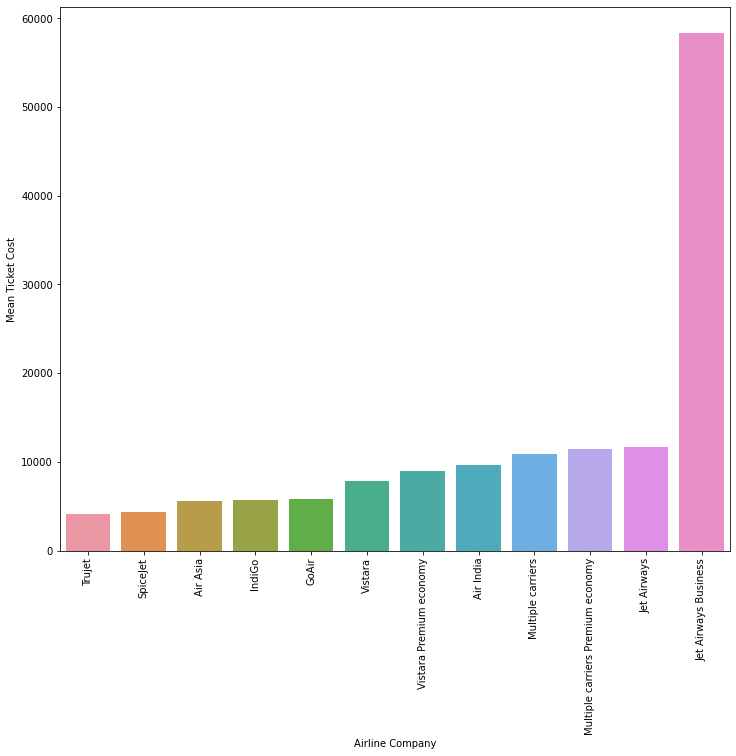

In [240]:
plt.figure(figsize=(12,10))
#sns.barplot(data=airprice.sort_values(ascending=True),x=airprice.index,y=airprice.values)
sns.barplot(x=airprice.index,y=airprice.values)
plt.xlabel('Airline Company')
plt.ylabel('Mean Ticket Cost',rotation=90)
plt.xticks(rotation=90)

plt.show()

In [241]:
# Mean Price vs stops

stop_price=airline.groupby(by=['Airline','stop'])['Price'].mean()

In [242]:
stp=pd.DataFrame(stop_price)

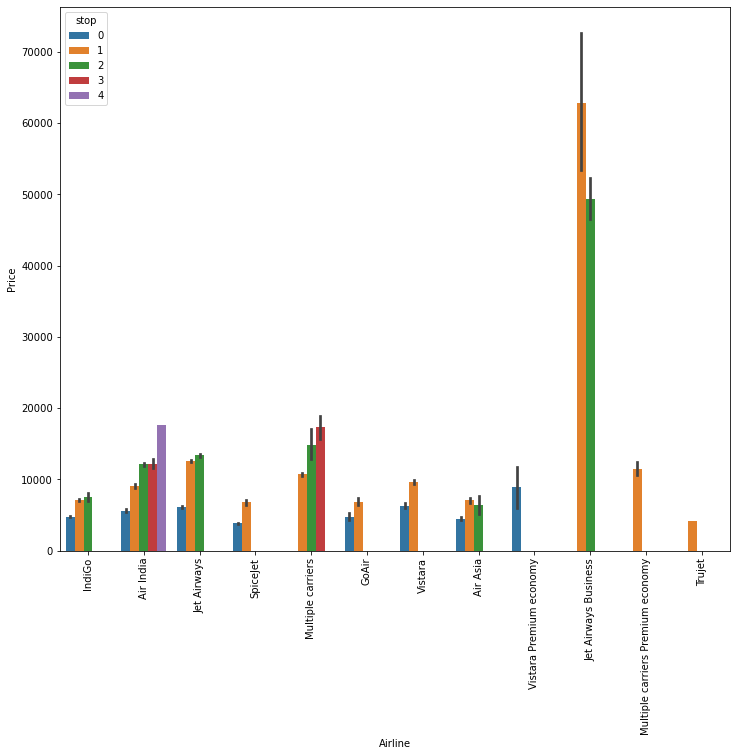

In [243]:
plt.figure(figsize=(12,10))

sns.barplot(data=airline.sort_values(by='Price'),x=airline['Airline'],y=airline['Price'],hue=airline['stop'])

plt.xticks(rotation=90)

plt.show()

<AxesSubplot:xlabel='Source', ylabel='Price'>

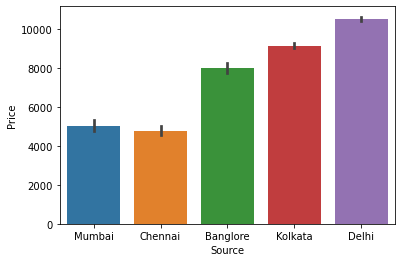

In [244]:
#Source vs Price 

sns.barplot(data=airline.sort_values(by='Price'),y='Price',x='Source')

<AxesSubplot:xlabel='Destination', ylabel='Price'>

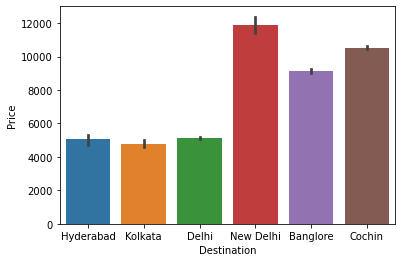

In [245]:
#Destination vs Price

sns.barplot(data=airline.sort_values(by='Price'),y='Price',x='Destination')

In [246]:
#since delhi and new delhi are same thing we, so replacing New delhi with delhi 

airline['Destination']=airline['Destination'].replace({'New Delhi':'Delhi'})

<AxesSubplot:xlabel='Destination', ylabel='Price'>

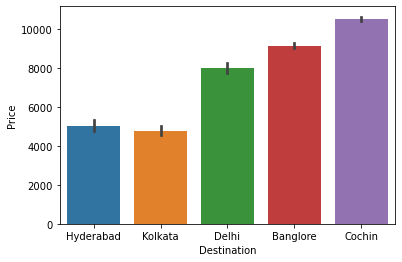

In [247]:
#Destination vs Price

sns.barplot(data=airline.sort_values(by='Price'),y='Price',x='Destination')

In [248]:
airline.head(1)

Airline    Source Destination      Route Additional_Info  Price  \
0  IndiGo  Banglore       Delhi  BLR → DEL         No info   3897   

   Day_of_Journey  Month_of_Journey  Year_of_Journey  Dep_hr  Dep_min  Arr_hr  \
0              24                 3             2019      22       20       1   

   Arr_min  dur_hr  dur_min  stop  
0       10       2       50     0

## Dealing with categorical Columns: 

In [249]:
air_dum=pd.get_dummies(airline['Airline'],prefix='',prefix_sep='',drop_first=True,dtype=int)

In [250]:
airline=pd.concat([airline,air_dum],axis=1)

In [252]:
src_dum=pd.get_dummies(airline['Source'],prefix='src',prefix_sep='_',drop_first=True,dtype=int)
airline=pd.concat([airline,src_dum],axis=1)

In [253]:
des_dum=pd.get_dummies(airline['Destination'],prefix='des',prefix_sep='_',drop_first=True,dtype=int)
airline=pd.concat([airline,des_dum],axis=1)

In [254]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Airline                            10681 non-null  object
 1   Source                             10681 non-null  object
 2   Destination                        10681 non-null  object
 3   Route                              10681 non-null  object
 4   Additional_Info                    10681 non-null  object
 5   Price                              10681 non-null  int64 
 6   Day_of_Journey                     10681 non-null  int64 
 7   Month_of_Journey                   10681 non-null  int64 
 8   Year_of_Journey                    10681 non-null  int64 
 9   Dep_hr                             10681 non-null  int64 
 10  Dep_min                            10681 non-null  int64 
 11  Arr_hr                             10681 non-null  int64 
 12  Arr_min  

In [255]:
airline.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [258]:
airline.drop(['Route','Additional_Info'],inplace=True,axis=1)

In [259]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Price                              10681 non-null  int64
 1   Day_of_Journey                     10681 non-null  int64
 2   Month_of_Journey                   10681 non-null  int64
 3   Year_of_Journey                    10681 non-null  int64
 4   Dep_hr                             10681 non-null  int64
 5   Dep_min                            10681 non-null  int64
 6   Arr_hr                             10681 non-null  int64
 7   Arr_min                            10681 non-null  int64
 8   dur_hr                             10681 non-null  int64
 9   dur_min                            10681 non-null  int64
 10  stop                               10681 non-null  int64
 11  Air India                          10681 non-null  int32
 12  GoAir                  

In [288]:
#Cleaning the test data

In [289]:
test.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [290]:
test[test['Duration']=='5m']

Airline Date_of_Journey  Source Destination                  Route  \
2660  Air India      12/03/2019  Mumbai   Hyderabad  BOM → GOI → PNQ → HYD   

     Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
2660    16:50        16:55       5m     2 stops         No info

In [291]:
test.drop([2660],axis=0,inplace=True)

In [292]:
test=test.reset_index()

In [293]:
test.head(1)

index      Airline Date_of_Journey Source Destination            Route  \
0      0  Jet Airways       6/06/2019  Delhi      Cochin  DEL → BOM → COK   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop         No info

In [294]:
test.drop(['index'],axis=1,inplace=True)

In [295]:
test['Date_of_Journey']=pd.to_datetime(test['Date_of_Journey'],format="%d/%m/%Y",yearfirst=False)

#Extracting day,month and year from Date of journey

test['Day_of_Journey']=test['Date_of_Journey'].apply(lambda x:x.day)
test['Month_of_Journey']=test['Date_of_Journey'].apply(lambda x:x.month)
test['Year_of_Journey']=test['Date_of_Journey'].apply(lambda x:x.year)

#Converting Dep time, Arrival time into date time format
test['Dep_Time']=pd.to_datetime(test['Dep_Time'],format="%H:%M")
test['Arrival_Time']=pd.to_datetime(test['Arrival_Time'],format="mixed")

#extracting hour and minutes 

test['Dep_hr']=test['Dep_Time'].apply(lambda x:x.hour)
test['Dep_min']=test['Dep_Time'].apply(lambda x:x.minute)

test['Arr_hr']=test['Arrival_Time'].apply(lambda x:x.hour)
test['Arr_min']=test['Arrival_Time'].apply(lambda x:x.minute)

#Extracting hours from duration
test['dur_hr']=test['Duration'].apply(lambda x: int(x.split('h')[0]) if 'h' in x else 0)

#Extracting hours froms duration
test['dur_min']=test['Duration'].apply(lambda x: int(x.split(' ')[1][:-1]) if 'm' in x else 0)

#Dropping the columns from which data has been extracted 

test.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)


In [296]:
test.isna().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Day_of_Journey      0
Month_of_Journey    0
Year_of_Journey     0
Dep_hr              0
Dep_min             0
Arr_hr              0
Arr_min             0
dur_hr              0
dur_min             0
dtype: int64

In [297]:
test['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [298]:
test.head()

Airline    Source Destination            Route Total_Stops  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR      1 stop   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   
4           Air Asia  Banglore       Delhi        BLR → DEL    non-stop   

               Additional_Info  Day_of_Journey  Month_of_Journey  \
0                      No info               6                 6   
1                      No info              12                 5   
2  In-flight meal not included              21                 5   
3                      No info              21                 5   
4                      No info              24                 6   

   Year_of_Journey  Dep_hr  Dep_min  Arr_hr  Arr_min  dur_hr  dur_min  
0             2019      17       30       4       25      10       55  
1             2019       6       20      10       20       4        0  
2             2019      19       15      19        0      23       45  
3             2019       8        0      21        0      13        0  
4             2019      23       55       2       45       2       50

In [299]:
#Extracting number of stops 

test['stop']=test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
test.drop(['Total_Stops'],axis=1,inplace=True)

In [300]:


#since delhi and new delhi are same thing we, so replacing New delhi with delhi 

test['Destination']=test['Destination'].replace({'New Delhi':'Delhi'})

#Dealing with categorical columns

air_dum=pd.get_dummies(test['Airline'],prefix='',prefix_sep='',drop_first=True,dtype=int)
test=pd.concat([test,air_dum],axis=1)


src_dum=pd.get_dummies(test['Source'],prefix='src',prefix_sep='_',drop_first=True,dtype=int)
test=pd.concat([test,src_dum],axis=1)

des_dum=pd.get_dummies(test['Destination'],prefix='des',prefix_sep='_',drop_first=True,dtype=int)
test=pd.concat([test,des_dum],axis=1)

test.drop(['Airline','Source','Destination'],inplace=True,axis=1)
test.drop(['Route','Additional_Info'],inplace=True,axis=1)


In [301]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2670 entries, 0 to 2669
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Day_of_Journey                     2670 non-null   int64
 1   Month_of_Journey                   2670 non-null   int64
 2   Year_of_Journey                    2670 non-null   int64
 3   Dep_hr                             2670 non-null   int64
 4   Dep_min                            2670 non-null   int64
 5   Arr_hr                             2670 non-null   int64
 6   Arr_min                            2670 non-null   int64
 7   dur_hr                             2670 non-null   int64
 8   dur_min                            2670 non-null   int64
 9   stop                               2670 non-null   int64
 10  Air India                          2670 non-null   int32
 11  GoAir                              2670 non-null   int32
 12  IndiGo              

In [302]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Price                              10681 non-null  int64
 1   Day_of_Journey                     10681 non-null  int64
 2   Month_of_Journey                   10681 non-null  int64
 3   Year_of_Journey                    10681 non-null  int64
 4   Dep_hr                             10681 non-null  int64
 5   Dep_min                            10681 non-null  int64
 6   Arr_hr                             10681 non-null  int64
 7   Arr_min                            10681 non-null  int64
 8   dur_hr                             10681 non-null  int64
 9   dur_min                            10681 non-null  int64
 10  stop                               10681 non-null  int64
 11  Air India                          10681 non-null  int32
 12  GoAir                  

In [303]:
#saving the processed dataframes

airline.to_csv('Airline_train_processed')
test.to_csv('Airline_test_processed')

In [304]:
airline.head()

Price  Day_of_Journey  Month_of_Journey  Year_of_Journey  Dep_hr  Dep_min  \
0   3897              24                 3             2019      22       20   
1   7662               1                 5             2019       5       50   
2  13882               9                 6             2019       9       25   
3   6218              12                 5             2019      18        5   
4  13302               1                 3             2019      16       50   

   Arr_hr  Arr_min  dur_hr  dur_min  ...  Vistara  Vistara Premium economy  \
0       1       10       2       50  ...        0                        0   
1      13       15       7       25  ...        0                        0   
2       4       25      19        0  ...        0                        0   
3      23       30       5       25  ...        0                        0   
4      21       35       4       45  ...        0                        0   

   src_Chennai  src_Delhi  src_Kolkata  src_Mumbai  des_Cochin  des_Delhi  \
0            0          0            0           0           0          1   
1            0          0            1           0           0          0   
2            0          1            0           0           1          0   
3            0          0            1           0           0          0   
4            0          0            0           0           0          1   

   des_Hyderabad  des_Kolkata  
0              0            0  
1              0            0  
2              0            0  
3              0            0  
4              0            0  

[5 rows x 30 columns]

## Building Model

In [368]:
X=airline.drop(['Price'],axis=1)
y=airline['Price']

In [369]:
X.head()

Day_of_Journey  Month_of_Journey  Year_of_Journey  Dep_hr  Dep_min  Arr_hr  \
0              24                 3             2019      22       20       1   
1               1                 5             2019       5       50      13   
2               9                 6             2019       9       25       4   
3              12                 5             2019      18        5      23   
4               1                 3             2019      16       50      21   

   Arr_min  dur_hr  dur_min  stop  ...  Vistara  Vistara Premium economy  \
0       10       2       50     0  ...        0                        0   
1       15       7       25     2  ...        0                        0   
2       25      19        0     2  ...        0                        0   
3       30       5       25     1  ...        0                        0   
4       35       4       45     1  ...        0                        0   

   src_Chennai  src_Delhi  src_Kolkata  src_Mumbai  des_Cochin  des_Delhi  \
0            0          0            0           0           0          1   
1            0          0            1           0           0          0   
2            0          1            0           0           1          0   
3            0          0            1           0           0          0   
4            0          0            0           0           0          1   

   des_Hyderabad  des_Kolkata  
0              0            0  
1              0            0  
2              0            0  
3              0            0  
4              0            0  

[5 rows x 29 columns]

In [313]:
!pip install catboost

In [314]:
!pip install lightgbm

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [374]:
type(y_test)

pandas.core.series.Series

In [338]:
result_df=pd.DataFrame(columns=['Model_name','R2_score_train','Best_params','R2_score_test'])
result_df.head()

Empty DataFrame
Columns: [Model_name, R2_score_train, Best_params, R2_score_test]
Index: []

In [344]:
models= {
    
    'cat_boost':{
        'model':CatBoostRegressor(),
        'params':{
            'model__iterations': [500, 1000, 1500],
            'model__depth': [6, 8, 10],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__loss_function': ['RMSE']
        }
        
    },    
    
    'XGB':{
        'model':xgb.XGBRegressor(),
        'params':{
            'model__n_estimators': [100, 200, 300,500], 
            'model__learning_rate': [0.01, 0.1, 0.3],
            'model__max_depth': [3, 4, 5],
            'model__min_child_weight': [1, 3, 5],
            'model__gamma': [0, 0.1, 0.2]
            
        }
    },    
    
    
    

    
    'Random_forest':{
        'model':RandomForestRegressor(),
        'params':{
            'model__n_estimators': [100, 200, 300], 
            'model__max_depth': [2, 10, 20, 30],  
            'model__min_samples_split': [2, 5, 10], 
            'model__min_samples_leaf': [1, 2, 4],  
            'model__max_features': ['sqrt', 'log2']          
        }
    },
    

    

    
    'svr':{
        'model':SVR(),
        'params':{
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__epsilon': [0.01, 0.1, 0.2, 0.5],
            'model__kernel': ['linear', 'rbf'],
            'model__gamma': [0.01, 0.1, 1]
        }
    },
    
    
    'Extra_tree':{
        'model':ExtraTreesRegressor(),
        'params':{
            'model__n_estimators': [100, 200, 300],  
            'model__max_depth': [None, 10, 20, 30],  
            'model__min_samples_split': [2, 5, 10],  
            'model__min_samples_leaf': [1, 2, 4],  
            'model__max_features': ['sqrt', 'log2']         
        }
        
    }
    
    
    
}

In [345]:
pipe=Pipeline([('model',None)])

In [346]:
best_model=None

In [347]:
for model_name,model_val in models.items() :
    print(F"Training with {model_name}")
    
    pipe.set_params(model=model_val['model'])
    
    grid=GridSearchCV(pipe,
                      param_grid=model_val['params'],
                      cv=2,
                      n_jobs=1,
                      verbose=3,
                      scoring='r2'
                     )
    
    grid.fit(X_train,y_train)
    
    prediction=grid.predict(X_test)
    
    r2_sc=r2_score(y_test,prediction)
    
    temp=pd.DataFrame({'Model_name': model_name ,'R2_score_train': grid.best_score_ ,'Best_params': grid.best_params_ ,'R2_score_test': r2_sc})
    
    result_df=pd.concat([result_df,temp],ignore_index=True)
    
    

Training with cat_boost
Fitting 2 folds for each of 27 candidates, totalling 54 fits
0:	learn: 4539.3647818	total: 143ms	remaining: 1m 11s
1:	learn: 4515.6445247	total: 148ms	remaining: 36.7s
2:	learn: 4492.6485368	total: 150ms	remaining: 24.9s
3:	learn: 4467.7004074	total: 153ms	remaining: 18.9s
4:	learn: 4445.3367314	total: 155ms	remaining: 15.3s
5:	learn: 4423.4112939	total: 157ms	remaining: 12.9s
6:	learn: 4402.5313626	total: 159ms	remaining: 11.2s
7:	learn: 4379.6737702	total: 161ms	remaining: 9.89s
8:	learn: 4356.4666498	total: 163ms	remaining: 8.9s
9:	learn: 4333.5813215	total: 165ms	remaining: 8.1s
10:	learn: 4313.9955654	total: 167ms	remaining: 7.43s
11:	learn: 4289.0207217	total: 171ms	remaining: 6.94s
12:	learn: 4269.0602142	total: 173ms	remaining: 6.48s
13:	learn: 4245.6979518	total: 175ms	remaining: 6.09s
14:	learn: 4225.5849356	total: 177ms	remaining: 5.73s
15:	learn: 4202.5476192	total: 181ms	remaining: 5.47s
16:	learn: 4180.1154596	total: 184ms	remaining: 5.23s
17:	lear

235:	learn: 2488.5729609	total: 648ms	remaining: 725ms
236:	learn: 2485.8470790	total: 650ms	remaining: 722ms
237:	learn: 2484.0844173	total: 652ms	remaining: 718ms
238:	learn: 2482.9280394	total: 654ms	remaining: 715ms
239:	learn: 2480.1808454	total: 656ms	remaining: 711ms
240:	learn: 2478.5408597	total: 658ms	remaining: 708ms
241:	learn: 2477.1962730	total: 660ms	remaining: 704ms
242:	learn: 2476.2527389	total: 663ms	remaining: 701ms
243:	learn: 2474.1769060	total: 665ms	remaining: 697ms
244:	learn: 2471.2553574	total: 667ms	remaining: 694ms
245:	learn: 2467.8376812	total: 669ms	remaining: 691ms
246:	learn: 2465.1933704	total: 671ms	remaining: 688ms
247:	learn: 2463.7952629	total: 674ms	remaining: 684ms
248:	learn: 2461.9580806	total: 676ms	remaining: 681ms
249:	learn: 2460.2871490	total: 678ms	remaining: 678ms
250:	learn: 2459.1664676	total: 680ms	remaining: 675ms
251:	learn: 2456.6771605	total: 682ms	remaining: 671ms
252:	learn: 2455.4044869	total: 684ms	remaining: 668ms
253:	learn

413:	learn: 2271.7372383	total: 980ms	remaining: 203ms
414:	learn: 2271.1206777	total: 982ms	remaining: 201ms
415:	learn: 2270.5497361	total: 984ms	remaining: 199ms
416:	learn: 2269.4531254	total: 986ms	remaining: 196ms
417:	learn: 2268.2862666	total: 988ms	remaining: 194ms
418:	learn: 2267.7654522	total: 990ms	remaining: 191ms
419:	learn: 2267.6059209	total: 991ms	remaining: 189ms
420:	learn: 2266.9458728	total: 993ms	remaining: 186ms
421:	learn: 2266.0816366	total: 996ms	remaining: 184ms
422:	learn: 2264.0061098	total: 999ms	remaining: 182ms
423:	learn: 2263.6657691	total: 1s	remaining: 180ms
424:	learn: 2263.1202697	total: 1s	remaining: 177ms
425:	learn: 2261.8951071	total: 1s	remaining: 175ms
426:	learn: 2261.1019586	total: 1.01s	remaining: 172ms
427:	learn: 2260.1446864	total: 1.01s	remaining: 170ms
428:	learn: 2259.3187355	total: 1.01s	remaining: 167ms
429:	learn: 2258.5875378	total: 1.01s	remaining: 165ms
430:	learn: 2257.8031235	total: 1.01s	remaining: 162ms
431:	learn: 2257.39

84:	learn: 3147.0828721	total: 167ms	remaining: 816ms
85:	learn: 3135.9819384	total: 169ms	remaining: 815ms
86:	learn: 3126.1996251	total: 171ms	remaining: 813ms
87:	learn: 3116.4259787	total: 173ms	remaining: 812ms
88:	learn: 3108.0361110	total: 176ms	remaining: 811ms
89:	learn: 3098.9220708	total: 178ms	remaining: 810ms
90:	learn: 3091.6285874	total: 180ms	remaining: 808ms
91:	learn: 3082.0370353	total: 182ms	remaining: 807ms
92:	learn: 3074.5313478	total: 185ms	remaining: 808ms
93:	learn: 3067.5568877	total: 187ms	remaining: 807ms
94:	learn: 3059.1741455	total: 189ms	remaining: 805ms
95:	learn: 3052.6140636	total: 191ms	remaining: 804ms
96:	learn: 3045.7428774	total: 193ms	remaining: 802ms
97:	learn: 3036.2885747	total: 195ms	remaining: 799ms
98:	learn: 3027.2629364	total: 197ms	remaining: 797ms
99:	learn: 3019.3991787	total: 199ms	remaining: 794ms
100:	learn: 3012.3964012	total: 200ms	remaining: 791ms
101:	learn: 3004.5135379	total: 202ms	remaining: 789ms
102:	learn: 2996.6799964	t

257:	learn: 2483.0400515	total: 502ms	remaining: 471ms
258:	learn: 2481.7125196	total: 504ms	remaining: 469ms
259:	learn: 2479.5987763	total: 506ms	remaining: 467ms
260:	learn: 2478.3482102	total: 508ms	remaining: 465ms
261:	learn: 2477.0164047	total: 510ms	remaining: 463ms
262:	learn: 2476.2954129	total: 512ms	remaining: 461ms
263:	learn: 2474.8057750	total: 514ms	remaining: 460ms
264:	learn: 2472.6938283	total: 516ms	remaining: 458ms
265:	learn: 2471.1278296	total: 519ms	remaining: 456ms
266:	learn: 2469.2675507	total: 521ms	remaining: 454ms
267:	learn: 2468.5472102	total: 523ms	remaining: 453ms
268:	learn: 2467.8647541	total: 525ms	remaining: 451ms
269:	learn: 2467.6143640	total: 526ms	remaining: 448ms
270:	learn: 2465.6036328	total: 528ms	remaining: 446ms
271:	learn: 2465.3588342	total: 529ms	remaining: 444ms
272:	learn: 2465.0899420	total: 531ms	remaining: 441ms
273:	learn: 2464.8464635	total: 532ms	remaining: 439ms
274:	learn: 2462.8724907	total: 535ms	remaining: 437ms
275:	learn

444:	learn: 2311.2055723	total: 837ms	remaining: 103ms
445:	learn: 2311.0914598	total: 838ms	remaining: 102ms
446:	learn: 2310.6389511	total: 841ms	remaining: 99.7ms
447:	learn: 2309.8124297	total: 843ms	remaining: 97.8ms
448:	learn: 2309.3526147	total: 846ms	remaining: 96ms
449:	learn: 2308.2972372	total: 848ms	remaining: 94.2ms
450:	learn: 2308.1909124	total: 849ms	remaining: 92.2ms
451:	learn: 2307.6669923	total: 850ms	remaining: 90.3ms
452:	learn: 2307.3154489	total: 852ms	remaining: 88.4ms
453:	learn: 2306.2939960	total: 854ms	remaining: 86.6ms
454:	learn: 2305.4152563	total: 856ms	remaining: 84.7ms
455:	learn: 2305.2397671	total: 858ms	remaining: 82.8ms
456:	learn: 2304.1567709	total: 860ms	remaining: 80.9ms
457:	learn: 2303.3362902	total: 864ms	remaining: 79.2ms
458:	learn: 2302.3603490	total: 866ms	remaining: 77.4ms
459:	learn: 2302.2552089	total: 868ms	remaining: 75.5ms
460:	learn: 2301.4764261	total: 870ms	remaining: 73.6ms
461:	learn: 2299.8680741	total: 872ms	remaining: 71.

144:	learn: 1796.9957909	total: 331ms	remaining: 810ms
145:	learn: 1794.7067855	total: 333ms	remaining: 807ms
146:	learn: 1793.3117129	total: 335ms	remaining: 804ms
147:	learn: 1790.6610017	total: 336ms	remaining: 800ms
148:	learn: 1790.1053518	total: 338ms	remaining: 797ms
149:	learn: 1786.5475861	total: 340ms	remaining: 793ms
150:	learn: 1783.4284507	total: 342ms	remaining: 791ms
151:	learn: 1782.7726619	total: 344ms	remaining: 788ms
152:	learn: 1780.3114124	total: 346ms	remaining: 785ms
153:	learn: 1777.3074022	total: 348ms	remaining: 782ms
154:	learn: 1776.9199755	total: 350ms	remaining: 779ms
155:	learn: 1776.5462367	total: 352ms	remaining: 776ms
156:	learn: 1770.9950507	total: 354ms	remaining: 773ms
157:	learn: 1770.6533700	total: 356ms	remaining: 771ms
158:	learn: 1767.4145634	total: 358ms	remaining: 768ms
159:	learn: 1764.0085090	total: 361ms	remaining: 767ms
160:	learn: 1761.0531791	total: 363ms	remaining: 764ms
161:	learn: 1754.6016144	total: 365ms	remaining: 762ms
162:	learn

316:	learn: 1485.4003768	total: 664ms	remaining: 383ms
317:	learn: 1484.3335491	total: 667ms	remaining: 382ms
318:	learn: 1483.3317787	total: 669ms	remaining: 380ms
319:	learn: 1481.8237558	total: 671ms	remaining: 377ms
320:	learn: 1478.2782904	total: 673ms	remaining: 375ms
321:	learn: 1476.5078325	total: 675ms	remaining: 373ms
322:	learn: 1475.5633828	total: 677ms	remaining: 371ms
323:	learn: 1474.9900267	total: 679ms	remaining: 369ms
324:	learn: 1473.3940800	total: 682ms	remaining: 367ms
325:	learn: 1473.1642223	total: 686ms	remaining: 366ms
326:	learn: 1473.0716587	total: 688ms	remaining: 364ms
327:	learn: 1471.7443234	total: 690ms	remaining: 362ms
328:	learn: 1470.8192607	total: 692ms	remaining: 360ms
329:	learn: 1470.7891257	total: 694ms	remaining: 357ms
330:	learn: 1470.1591877	total: 697ms	remaining: 356ms
331:	learn: 1468.9174706	total: 699ms	remaining: 354ms
332:	learn: 1468.1119575	total: 701ms	remaining: 352ms
333:	learn: 1466.8169420	total: 703ms	remaining: 349ms
334:	learn

465:	learn: 1326.9726138	total: 990ms	remaining: 72.2ms
466:	learn: 1326.0909597	total: 992ms	remaining: 70.1ms
467:	learn: 1325.4037765	total: 994ms	remaining: 67.9ms
468:	learn: 1325.3589862	total: 995ms	remaining: 65.8ms
469:	learn: 1325.1695666	total: 997ms	remaining: 63.6ms
470:	learn: 1324.2657961	total: 999ms	remaining: 61.5ms
471:	learn: 1323.3602814	total: 1s	remaining: 59.3ms
472:	learn: 1322.0216331	total: 1s	remaining: 57.2ms
473:	learn: 1321.6211714	total: 1s	remaining: 55.1ms
474:	learn: 1321.1828248	total: 1.01s	remaining: 53ms
475:	learn: 1320.4202176	total: 1.01s	remaining: 50.9ms
476:	learn: 1320.3046444	total: 1.01s	remaining: 48.7ms
477:	learn: 1319.8294197	total: 1.01s	remaining: 46.6ms
478:	learn: 1319.1664718	total: 1.01s	remaining: 44.5ms
479:	learn: 1318.3420640	total: 1.02s	remaining: 42.4ms
480:	learn: 1317.6632687	total: 1.02s	remaining: 40.3ms
481:	learn: 1316.7369606	total: 1.02s	remaining: 38.2ms
482:	learn: 1315.1533622	total: 1.02s	remaining: 36.1ms
483

192:	learn: 1709.1344364	total: 396ms	remaining: 629ms
193:	learn: 1705.8233881	total: 398ms	remaining: 627ms
194:	learn: 1702.5361655	total: 400ms	remaining: 625ms
195:	learn: 1699.7072323	total: 402ms	remaining: 623ms
196:	learn: 1697.2704270	total: 404ms	remaining: 621ms
197:	learn: 1696.4185755	total: 405ms	remaining: 618ms
198:	learn: 1694.5192813	total: 407ms	remaining: 616ms
199:	learn: 1692.9329507	total: 409ms	remaining: 613ms
200:	learn: 1692.8625444	total: 411ms	remaining: 611ms
201:	learn: 1688.9689904	total: 413ms	remaining: 609ms
202:	learn: 1687.2761618	total: 416ms	remaining: 608ms
203:	learn: 1685.5907126	total: 418ms	remaining: 606ms
204:	learn: 1683.6447723	total: 420ms	remaining: 604ms
205:	learn: 1683.4630263	total: 422ms	remaining: 602ms
206:	learn: 1681.9313253	total: 424ms	remaining: 600ms
207:	learn: 1678.9450483	total: 426ms	remaining: 598ms
208:	learn: 1674.8955064	total: 428ms	remaining: 596ms
209:	learn: 1671.2125682	total: 431ms	remaining: 595ms
210:	learn

341:	learn: 1465.6577517	total: 728ms	remaining: 336ms
342:	learn: 1463.9606285	total: 730ms	remaining: 334ms
343:	learn: 1462.2439046	total: 732ms	remaining: 332ms
344:	learn: 1459.9462595	total: 734ms	remaining: 330ms
345:	learn: 1458.4517129	total: 737ms	remaining: 328ms
346:	learn: 1456.9488800	total: 739ms	remaining: 326ms
347:	learn: 1455.3067012	total: 741ms	remaining: 324ms
348:	learn: 1454.1658104	total: 743ms	remaining: 322ms
349:	learn: 1452.5488218	total: 745ms	remaining: 319ms
350:	learn: 1450.3363765	total: 747ms	remaining: 317ms
351:	learn: 1449.0573151	total: 750ms	remaining: 315ms
352:	learn: 1447.5624606	total: 752ms	remaining: 313ms
353:	learn: 1446.2697974	total: 755ms	remaining: 311ms
354:	learn: 1443.8833194	total: 757ms	remaining: 309ms
355:	learn: 1442.0693424	total: 760ms	remaining: 307ms
356:	learn: 1440.4381957	total: 761ms	remaining: 305ms
357:	learn: 1438.5043783	total: 763ms	remaining: 303ms
358:	learn: 1437.4031275	total: 767ms	remaining: 301ms
359:	learn

1:	learn: 3695.0225202	total: 4.82ms	remaining: 1.2s
2:	learn: 3462.9546448	total: 6.88ms	remaining: 1.14s
3:	learn: 3196.8911939	total: 8.87ms	remaining: 1.1s
4:	learn: 2990.2483163	total: 11.1ms	remaining: 1.1s
5:	learn: 2873.1362154	total: 13.2ms	remaining: 1.08s
6:	learn: 2784.8428204	total: 15.2ms	remaining: 1.07s
7:	learn: 2694.7510046	total: 17.5ms	remaining: 1.08s
8:	learn: 2607.4830347	total: 19.6ms	remaining: 1.07s
9:	learn: 2548.4652141	total: 22.1ms	remaining: 1.08s
10:	learn: 2537.7824502	total: 23.6ms	remaining: 1.05s
11:	learn: 2507.5487044	total: 26.5ms	remaining: 1.08s
12:	learn: 2460.8522825	total: 28.2ms	remaining: 1.06s
13:	learn: 2442.1170441	total: 29.9ms	remaining: 1.04s
14:	learn: 2404.6166440	total: 31.7ms	remaining: 1.02s
15:	learn: 2355.3032242	total: 33.5ms	remaining: 1.01s
16:	learn: 2329.0165207	total: 35.3ms	remaining: 1s
17:	learn: 2311.8211846	total: 37.3ms	remaining: 998ms
18:	learn: 2283.6713365	total: 39ms	remaining: 988ms
19:	learn: 2263.9101199	tot

219:	learn: 1352.3211219	total: 500ms	remaining: 636ms
220:	learn: 1349.9364303	total: 502ms	remaining: 633ms
221:	learn: 1348.5436776	total: 505ms	remaining: 633ms
222:	learn: 1346.6988350	total: 509ms	remaining: 632ms
223:	learn: 1346.6404276	total: 511ms	remaining: 630ms
224:	learn: 1345.2969705	total: 513ms	remaining: 627ms
225:	learn: 1345.2450756	total: 515ms	remaining: 624ms
226:	learn: 1344.2989186	total: 517ms	remaining: 622ms
227:	learn: 1343.3343744	total: 519ms	remaining: 619ms
228:	learn: 1342.9309070	total: 521ms	remaining: 617ms
229:	learn: 1339.6749376	total: 524ms	remaining: 615ms
230:	learn: 1336.5831767	total: 526ms	remaining: 613ms
231:	learn: 1335.0919334	total: 529ms	remaining: 612ms
232:	learn: 1333.3488263	total: 534ms	remaining: 612ms
233:	learn: 1331.5839477	total: 537ms	remaining: 610ms
234:	learn: 1330.6492558	total: 538ms	remaining: 607ms
235:	learn: 1329.1916370	total: 540ms	remaining: 604ms
236:	learn: 1327.0257716	total: 542ms	remaining: 601ms
237:	learn

370:	learn: 1156.7831328	total: 839ms	remaining: 292ms
371:	learn: 1155.3939162	total: 842ms	remaining: 290ms
372:	learn: 1153.8631694	total: 844ms	remaining: 287ms
373:	learn: 1152.2678168	total: 846ms	remaining: 285ms
374:	learn: 1151.6175580	total: 848ms	remaining: 283ms
375:	learn: 1149.8551107	total: 850ms	remaining: 280ms
376:	learn: 1148.2604107	total: 852ms	remaining: 278ms
377:	learn: 1147.6815827	total: 854ms	remaining: 276ms
378:	learn: 1146.9394399	total: 857ms	remaining: 274ms
379:	learn: 1145.6069048	total: 859ms	remaining: 271ms
380:	learn: 1144.9094327	total: 862ms	remaining: 269ms
381:	learn: 1144.2309282	total: 863ms	remaining: 267ms
382:	learn: 1143.3557622	total: 865ms	remaining: 264ms
383:	learn: 1142.4544808	total: 867ms	remaining: 262ms
384:	learn: 1141.4128974	total: 869ms	remaining: 260ms
385:	learn: 1140.4098842	total: 871ms	remaining: 257ms
386:	learn: 1139.2817192	total: 872ms	remaining: 255ms
387:	learn: 1138.0705079	total: 874ms	remaining: 252ms
388:	learn

86:	learn: 1753.1225738	total: 190ms	remaining: 903ms
87:	learn: 1751.3582169	total: 192ms	remaining: 899ms
88:	learn: 1746.3192696	total: 194ms	remaining: 896ms
89:	learn: 1745.2661032	total: 196ms	remaining: 891ms
90:	learn: 1741.3917917	total: 197ms	remaining: 887ms
91:	learn: 1731.1255042	total: 199ms	remaining: 883ms
92:	learn: 1730.5867979	total: 203ms	remaining: 887ms
93:	learn: 1721.1922739	total: 205ms	remaining: 886ms
94:	learn: 1716.7712987	total: 207ms	remaining: 883ms
95:	learn: 1712.8479443	total: 209ms	remaining: 880ms
96:	learn: 1708.4017170	total: 211ms	remaining: 877ms
97:	learn: 1702.2908209	total: 213ms	remaining: 874ms
98:	learn: 1699.5478575	total: 215ms	remaining: 872ms
99:	learn: 1694.8283703	total: 217ms	remaining: 870ms
100:	learn: 1690.4819442	total: 220ms	remaining: 868ms
101:	learn: 1690.0079307	total: 222ms	remaining: 866ms
102:	learn: 1684.8176565	total: 224ms	remaining: 865ms
103:	learn: 1678.9977933	total: 227ms	remaining: 864ms
104:	learn: 1678.5541110

236:	learn: 1305.5495097	total: 523ms	remaining: 581ms
237:	learn: 1304.0720759	total: 525ms	remaining: 578ms
238:	learn: 1302.8074476	total: 531ms	remaining: 580ms
239:	learn: 1301.0376125	total: 534ms	remaining: 578ms
240:	learn: 1300.0325636	total: 536ms	remaining: 576ms
241:	learn: 1299.0707493	total: 538ms	remaining: 573ms
242:	learn: 1297.0996309	total: 540ms	remaining: 571ms
243:	learn: 1294.5438826	total: 544ms	remaining: 571ms
244:	learn: 1293.4573117	total: 578ms	remaining: 602ms
245:	learn: 1292.4639146	total: 585ms	remaining: 604ms
246:	learn: 1290.7187254	total: 588ms	remaining: 603ms
247:	learn: 1289.5982155	total: 593ms	remaining: 603ms
248:	learn: 1288.1651695	total: 596ms	remaining: 601ms
249:	learn: 1285.8984060	total: 599ms	remaining: 599ms
250:	learn: 1284.5713940	total: 602ms	remaining: 597ms
251:	learn: 1283.0948680	total: 604ms	remaining: 594ms
252:	learn: 1280.4726112	total: 607ms	remaining: 593ms
253:	learn: 1278.2758658	total: 610ms	remaining: 590ms
254:	learn

422:	learn: 1081.1628013	total: 1.02s	remaining: 186ms
423:	learn: 1080.0982810	total: 1.02s	remaining: 184ms
424:	learn: 1080.0402810	total: 1.03s	remaining: 181ms
425:	learn: 1079.8875568	total: 1.03s	remaining: 179ms
426:	learn: 1079.0734346	total: 1.03s	remaining: 176ms
427:	learn: 1078.5469168	total: 1.03s	remaining: 174ms
428:	learn: 1078.5236886	total: 1.03s	remaining: 171ms
429:	learn: 1077.8774091	total: 1.04s	remaining: 169ms
430:	learn: 1076.7238155	total: 1.04s	remaining: 167ms
431:	learn: 1076.4469550	total: 1.04s	remaining: 164ms
432:	learn: 1075.9084749	total: 1.04s	remaining: 162ms
433:	learn: 1075.8063016	total: 1.05s	remaining: 159ms
434:	learn: 1074.7674630	total: 1.05s	remaining: 157ms
435:	learn: 1074.7253216	total: 1.05s	remaining: 155ms
436:	learn: 1074.4440355	total: 1.05s	remaining: 152ms
437:	learn: 1073.9333283	total: 1.06s	remaining: 150ms
438:	learn: 1072.2473119	total: 1.06s	remaining: 147ms
439:	learn: 1071.3260837	total: 1.06s	remaining: 145ms
440:	learn

149:	learn: 2785.1569821	total: 291ms	remaining: 1.65s
150:	learn: 2779.3299620	total: 293ms	remaining: 1.65s
151:	learn: 2774.3225457	total: 295ms	remaining: 1.65s
152:	learn: 2770.9491640	total: 297ms	remaining: 1.64s
153:	learn: 2765.0461507	total: 299ms	remaining: 1.64s
154:	learn: 2759.8917695	total: 300ms	remaining: 1.64s
155:	learn: 2756.2801172	total: 302ms	remaining: 1.64s
156:	learn: 2753.1229558	total: 305ms	remaining: 1.64s
157:	learn: 2747.3195722	total: 307ms	remaining: 1.64s
158:	learn: 2741.8972351	total: 309ms	remaining: 1.63s
159:	learn: 2738.5857912	total: 311ms	remaining: 1.63s
160:	learn: 2735.1640099	total: 313ms	remaining: 1.63s
161:	learn: 2729.9698923	total: 315ms	remaining: 1.63s
162:	learn: 2726.7492346	total: 318ms	remaining: 1.63s
163:	learn: 2721.5326435	total: 320ms	remaining: 1.63s
164:	learn: 2716.6516340	total: 322ms	remaining: 1.63s
165:	learn: 2711.2834658	total: 324ms	remaining: 1.63s
166:	learn: 2706.3436254	total: 326ms	remaining: 1.63s
167:	learn

325:	learn: 2354.5997650	total: 626ms	remaining: 1.29s
326:	learn: 2353.7351154	total: 628ms	remaining: 1.29s
327:	learn: 2353.2173200	total: 630ms	remaining: 1.29s
328:	learn: 2352.4449160	total: 632ms	remaining: 1.29s
329:	learn: 2351.2647490	total: 634ms	remaining: 1.29s
330:	learn: 2350.5364751	total: 636ms	remaining: 1.28s
331:	learn: 2349.1018324	total: 638ms	remaining: 1.28s
332:	learn: 2348.6124386	total: 640ms	remaining: 1.28s
333:	learn: 2348.1763240	total: 642ms	remaining: 1.28s
334:	learn: 2347.2499335	total: 644ms	remaining: 1.28s
335:	learn: 2346.1815427	total: 647ms	remaining: 1.28s
336:	learn: 2345.8012344	total: 649ms	remaining: 1.28s
337:	learn: 2344.9767977	total: 651ms	remaining: 1.27s
338:	learn: 2344.3465796	total: 653ms	remaining: 1.27s
339:	learn: 2343.2253225	total: 654ms	remaining: 1.27s
340:	learn: 2342.4738828	total: 656ms	remaining: 1.27s
341:	learn: 2341.5992020	total: 658ms	remaining: 1.26s
342:	learn: 2340.9865680	total: 660ms	remaining: 1.26s
343:	learn

548:	learn: 2174.5844897	total: 1.12s	remaining: 921ms
549:	learn: 2174.1184547	total: 1.12s	remaining: 919ms
550:	learn: 2173.9761098	total: 1.13s	remaining: 917ms
551:	learn: 2173.3028441	total: 1.13s	remaining: 915ms
552:	learn: 2172.8496202	total: 1.13s	remaining: 913ms
553:	learn: 2171.6523193	total: 1.13s	remaining: 912ms
554:	learn: 2171.4219546	total: 1.13s	remaining: 910ms
555:	learn: 2170.6647203	total: 1.14s	remaining: 908ms
556:	learn: 2169.9443312	total: 1.14s	remaining: 907ms
557:	learn: 2169.5346986	total: 1.14s	remaining: 905ms
558:	learn: 2168.3948228	total: 1.15s	remaining: 904ms
559:	learn: 2168.3252426	total: 1.15s	remaining: 902ms
560:	learn: 2167.3411506	total: 1.15s	remaining: 900ms
561:	learn: 2166.8798524	total: 1.15s	remaining: 898ms
562:	learn: 2166.0640319	total: 1.15s	remaining: 896ms
563:	learn: 2165.2604785	total: 1.16s	remaining: 894ms
564:	learn: 2163.9101517	total: 1.16s	remaining: 893ms
565:	learn: 2163.4878319	total: 1.16s	remaining: 891ms
566:	learn

721:	learn: 2077.1375097	total: 1.46s	remaining: 561ms
722:	learn: 2076.1280779	total: 1.46s	remaining: 559ms
723:	learn: 2075.6440374	total: 1.46s	remaining: 557ms
724:	learn: 2075.5149909	total: 1.46s	remaining: 555ms
725:	learn: 2074.4526604	total: 1.47s	remaining: 553ms
726:	learn: 2074.4003498	total: 1.47s	remaining: 551ms
727:	learn: 2073.5268877	total: 1.47s	remaining: 549ms
728:	learn: 2073.0651185	total: 1.47s	remaining: 547ms
729:	learn: 2072.6161221	total: 1.47s	remaining: 545ms
730:	learn: 2071.7591489	total: 1.48s	remaining: 543ms
731:	learn: 2071.2074914	total: 1.48s	remaining: 541ms
732:	learn: 2070.6672965	total: 1.48s	remaining: 539ms
733:	learn: 2069.6449655	total: 1.48s	remaining: 537ms
734:	learn: 2068.7729524	total: 1.48s	remaining: 535ms
735:	learn: 2068.2552791	total: 1.49s	remaining: 533ms
736:	learn: 2067.2537259	total: 1.49s	remaining: 531ms
737:	learn: 2066.9905767	total: 1.49s	remaining: 529ms
738:	learn: 2066.6186233	total: 1.49s	remaining: 527ms
739:	learn

896:	learn: 1993.5545614	total: 1.79s	remaining: 206ms
897:	learn: 1993.2010881	total: 1.79s	remaining: 204ms
898:	learn: 1992.4285945	total: 1.79s	remaining: 202ms
899:	learn: 1991.3944496	total: 1.8s	remaining: 200ms
900:	learn: 1991.2396085	total: 1.8s	remaining: 198ms
901:	learn: 1990.7006161	total: 1.8s	remaining: 196ms
902:	learn: 1990.1827154	total: 1.8s	remaining: 194ms
903:	learn: 1990.0735599	total: 1.8s	remaining: 192ms
904:	learn: 1989.7849797	total: 1.81s	remaining: 190ms
905:	learn: 1989.0838218	total: 1.81s	remaining: 188ms
906:	learn: 1988.5470451	total: 1.81s	remaining: 186ms
907:	learn: 1988.1446182	total: 1.81s	remaining: 184ms
908:	learn: 1987.5857751	total: 1.82s	remaining: 182ms
909:	learn: 1987.2877292	total: 1.82s	remaining: 180ms
910:	learn: 1986.9454340	total: 1.82s	remaining: 178ms
911:	learn: 1986.6789594	total: 1.82s	remaining: 176ms
912:	learn: 1986.4913167	total: 1.82s	remaining: 174ms
913:	learn: 1986.4359801	total: 1.83s	remaining: 172ms
914:	learn: 198

44:	learn: 3634.5519802	total: 89.9ms	remaining: 1.91s
45:	learn: 3620.6396338	total: 92.1ms	remaining: 1.91s
46:	learn: 3607.4119460	total: 94.1ms	remaining: 1.91s
47:	learn: 3591.2166869	total: 96.3ms	remaining: 1.91s
48:	learn: 3575.2631247	total: 98.5ms	remaining: 1.91s
49:	learn: 3559.6519683	total: 101ms	remaining: 1.91s
50:	learn: 3543.9951389	total: 103ms	remaining: 1.91s
51:	learn: 3531.9094665	total: 105ms	remaining: 1.91s
52:	learn: 3518.2219639	total: 108ms	remaining: 1.92s
53:	learn: 3503.5786743	total: 110ms	remaining: 1.93s
54:	learn: 3488.8978460	total: 112ms	remaining: 1.93s
55:	learn: 3474.0088885	total: 114ms	remaining: 1.92s
56:	learn: 3459.4860526	total: 116ms	remaining: 1.91s
57:	learn: 3444.3747966	total: 118ms	remaining: 1.91s
58:	learn: 3430.2487285	total: 120ms	remaining: 1.91s
59:	learn: 3420.2876788	total: 122ms	remaining: 1.9s
60:	learn: 3409.5524101	total: 123ms	remaining: 1.9s
61:	learn: 3395.6705275	total: 125ms	remaining: 1.89s
62:	learn: 3384.2304923	t

215:	learn: 2537.8022504	total: 425ms	remaining: 1.54s
216:	learn: 2536.2779117	total: 427ms	remaining: 1.54s
217:	learn: 2533.4066215	total: 429ms	remaining: 1.54s
218:	learn: 2532.3949222	total: 431ms	remaining: 1.54s
219:	learn: 2530.3789313	total: 433ms	remaining: 1.53s
220:	learn: 2528.4051328	total: 435ms	remaining: 1.53s
221:	learn: 2526.6152434	total: 437ms	remaining: 1.53s
222:	learn: 2525.2219331	total: 439ms	remaining: 1.53s
223:	learn: 2522.6373478	total: 441ms	remaining: 1.53s
224:	learn: 2521.7437413	total: 443ms	remaining: 1.52s
225:	learn: 2521.4381302	total: 444ms	remaining: 1.52s
226:	learn: 2520.4935380	total: 446ms	remaining: 1.52s
227:	learn: 2518.8054119	total: 449ms	remaining: 1.52s
228:	learn: 2517.2479463	total: 451ms	remaining: 1.52s
229:	learn: 2515.8997486	total: 453ms	remaining: 1.52s
230:	learn: 2514.4520979	total: 455ms	remaining: 1.51s
231:	learn: 2514.1595152	total: 456ms	remaining: 1.51s
232:	learn: 2512.0341126	total: 458ms	remaining: 1.51s
233:	learn

401:	learn: 2347.6538034	total: 759ms	remaining: 1.13s
402:	learn: 2347.5208711	total: 760ms	remaining: 1.13s
403:	learn: 2346.0144212	total: 762ms	remaining: 1.12s
404:	learn: 2345.3075186	total: 764ms	remaining: 1.12s
405:	learn: 2344.1664731	total: 766ms	remaining: 1.12s
406:	learn: 2344.0332221	total: 767ms	remaining: 1.12s
407:	learn: 2342.7358477	total: 770ms	remaining: 1.12s
408:	learn: 2341.8999548	total: 772ms	remaining: 1.11s
409:	learn: 2341.7712737	total: 773ms	remaining: 1.11s
410:	learn: 2340.4350843	total: 775ms	remaining: 1.11s
411:	learn: 2340.2437097	total: 777ms	remaining: 1.11s
412:	learn: 2339.8075307	total: 780ms	remaining: 1.11s
413:	learn: 2338.5515549	total: 782ms	remaining: 1.11s
414:	learn: 2337.8415829	total: 784ms	remaining: 1.1s
415:	learn: 2336.8596298	total: 786ms	remaining: 1.1s
416:	learn: 2335.8053179	total: 788ms	remaining: 1.1s
417:	learn: 2334.5492095	total: 790ms	remaining: 1.1s
418:	learn: 2333.2893936	total: 791ms	remaining: 1.1s
419:	learn: 233

580:	learn: 2226.4586240	total: 1.09s	remaining: 789ms
581:	learn: 2225.7827520	total: 1.09s	remaining: 787ms
582:	learn: 2225.3780412	total: 1.1s	remaining: 786ms
583:	learn: 2224.7526858	total: 1.1s	remaining: 784ms
584:	learn: 2224.2674264	total: 1.1s	remaining: 782ms
585:	learn: 2223.6641827	total: 1.1s	remaining: 780ms
586:	learn: 2223.2033253	total: 1.11s	remaining: 779ms
587:	learn: 2222.3788535	total: 1.11s	remaining: 777ms
588:	learn: 2222.2329735	total: 1.11s	remaining: 775ms
589:	learn: 2221.3507073	total: 1.11s	remaining: 773ms
590:	learn: 2220.9421478	total: 1.11s	remaining: 772ms
591:	learn: 2220.1813297	total: 1.12s	remaining: 771ms
592:	learn: 2218.9451758	total: 1.12s	remaining: 769ms
593:	learn: 2218.5389324	total: 1.12s	remaining: 767ms
594:	learn: 2218.0460900	total: 1.12s	remaining: 765ms
595:	learn: 2217.6343969	total: 1.13s	remaining: 764ms
596:	learn: 2217.4489114	total: 1.13s	remaining: 762ms
597:	learn: 2216.8161911	total: 1.13s	remaining: 760ms
598:	learn: 22

754:	learn: 2124.9744401	total: 1.43s	remaining: 463ms
755:	learn: 2124.6428297	total: 1.43s	remaining: 461ms
756:	learn: 2124.2075543	total: 1.43s	remaining: 459ms
757:	learn: 2124.0769400	total: 1.43s	remaining: 457ms
758:	learn: 2124.0210540	total: 1.43s	remaining: 455ms
759:	learn: 2123.0336472	total: 1.43s	remaining: 453ms
760:	learn: 2122.5198282	total: 1.44s	remaining: 451ms
761:	learn: 2121.8227829	total: 1.44s	remaining: 449ms
762:	learn: 2121.2800650	total: 1.44s	remaining: 447ms
763:	learn: 2120.3962178	total: 1.44s	remaining: 445ms
764:	learn: 2120.0982315	total: 1.44s	remaining: 444ms
765:	learn: 2119.8492163	total: 1.45s	remaining: 442ms
766:	learn: 2119.6752742	total: 1.45s	remaining: 440ms
767:	learn: 2118.9687439	total: 1.45s	remaining: 438ms
768:	learn: 2118.8051898	total: 1.45s	remaining: 436ms
769:	learn: 2118.5039697	total: 1.46s	remaining: 435ms
770:	learn: 2117.9126614	total: 1.46s	remaining: 433ms
771:	learn: 2117.8810170	total: 1.46s	remaining: 431ms
772:	learn

941:	learn: 2040.7967593	total: 1.76s	remaining: 109ms
942:	learn: 2040.5621258	total: 1.76s	remaining: 107ms
943:	learn: 2040.0887732	total: 1.77s	remaining: 105ms
944:	learn: 2039.3986308	total: 1.77s	remaining: 103ms
945:	learn: 2038.9867601	total: 1.77s	remaining: 101ms
946:	learn: 2038.6292554	total: 1.77s	remaining: 99.3ms
947:	learn: 2038.2097671	total: 1.77s	remaining: 97.4ms
948:	learn: 2037.8507448	total: 1.78s	remaining: 95.5ms
949:	learn: 2037.6199857	total: 1.78s	remaining: 93.7ms
950:	learn: 2036.9478618	total: 1.78s	remaining: 91.8ms
951:	learn: 2036.6097876	total: 1.78s	remaining: 90ms
952:	learn: 2036.2666594	total: 1.79s	remaining: 88.1ms
953:	learn: 2036.0230243	total: 1.79s	remaining: 86.2ms
954:	learn: 2035.8312835	total: 1.79s	remaining: 84.3ms
955:	learn: 2035.0721279	total: 1.79s	remaining: 82.5ms
956:	learn: 2034.7595987	total: 1.79s	remaining: 80.6ms
957:	learn: 2034.4200598	total: 1.79s	remaining: 78.7ms
958:	learn: 2034.3360718	total: 1.8s	remaining: 76.8ms


101:	learn: 1946.0747478	total: 189ms	remaining: 1.66s
102:	learn: 1942.3932858	total: 191ms	remaining: 1.66s
103:	learn: 1939.8611434	total: 193ms	remaining: 1.66s
104:	learn: 1937.5476019	total: 195ms	remaining: 1.66s
105:	learn: 1934.3294504	total: 197ms	remaining: 1.66s
106:	learn: 1933.8504215	total: 199ms	remaining: 1.66s
107:	learn: 1927.4762437	total: 201ms	remaining: 1.66s
108:	learn: 1925.3123631	total: 203ms	remaining: 1.66s
109:	learn: 1919.7837339	total: 205ms	remaining: 1.66s
110:	learn: 1916.8105582	total: 208ms	remaining: 1.66s
111:	learn: 1915.5490774	total: 209ms	remaining: 1.66s
112:	learn: 1907.8539755	total: 211ms	remaining: 1.66s
113:	learn: 1907.2485115	total: 213ms	remaining: 1.66s
114:	learn: 1906.8430332	total: 215ms	remaining: 1.65s
115:	learn: 1900.7544034	total: 217ms	remaining: 1.65s
116:	learn: 1898.6840140	total: 218ms	remaining: 1.65s
117:	learn: 1894.0086613	total: 220ms	remaining: 1.65s
118:	learn: 1892.0445628	total: 222ms	remaining: 1.64s
119:	learn

285:	learn: 1522.6719370	total: 524ms	remaining: 1.31s
286:	learn: 1521.2398706	total: 527ms	remaining: 1.31s
287:	learn: 1521.1241709	total: 529ms	remaining: 1.31s
288:	learn: 1521.0752872	total: 530ms	remaining: 1.3s
289:	learn: 1518.9144454	total: 533ms	remaining: 1.3s
290:	learn: 1517.4006305	total: 535ms	remaining: 1.3s
291:	learn: 1516.3979712	total: 537ms	remaining: 1.3s
292:	learn: 1515.0151916	total: 539ms	remaining: 1.3s
293:	learn: 1513.5242429	total: 542ms	remaining: 1.3s
294:	learn: 1512.0257379	total: 544ms	remaining: 1.3s
295:	learn: 1509.8417124	total: 546ms	remaining: 1.3s
296:	learn: 1509.7084426	total: 548ms	remaining: 1.3s
297:	learn: 1509.5963351	total: 550ms	remaining: 1.29s
298:	learn: 1507.9405291	total: 551ms	remaining: 1.29s
299:	learn: 1507.0953190	total: 553ms	remaining: 1.29s
300:	learn: 1505.0338180	total: 555ms	remaining: 1.29s
301:	learn: 1504.1257039	total: 557ms	remaining: 1.29s
302:	learn: 1504.0845668	total: 559ms	remaining: 1.29s
303:	learn: 1503.22

468:	learn: 1325.3589862	total: 859ms	remaining: 972ms
469:	learn: 1325.1695666	total: 861ms	remaining: 971ms
470:	learn: 1324.2657961	total: 863ms	remaining: 969ms
471:	learn: 1323.3602814	total: 865ms	remaining: 967ms
472:	learn: 1322.0216331	total: 867ms	remaining: 966ms
473:	learn: 1321.6211714	total: 869ms	remaining: 964ms
474:	learn: 1321.1828248	total: 871ms	remaining: 963ms
475:	learn: 1320.4202176	total: 873ms	remaining: 961ms
476:	learn: 1320.3046444	total: 875ms	remaining: 960ms
477:	learn: 1319.8294197	total: 878ms	remaining: 959ms
478:	learn: 1319.1664718	total: 880ms	remaining: 957ms
479:	learn: 1318.3420640	total: 882ms	remaining: 956ms
480:	learn: 1317.6632687	total: 884ms	remaining: 954ms
481:	learn: 1316.7369606	total: 886ms	remaining: 952ms
482:	learn: 1315.1533622	total: 888ms	remaining: 950ms
483:	learn: 1314.2092276	total: 890ms	remaining: 948ms
484:	learn: 1312.9059328	total: 891ms	remaining: 947ms
485:	learn: 1312.1826179	total: 893ms	remaining: 945ms
486:	learn

652:	learn: 1200.1016287	total: 1.2s	remaining: 635ms
653:	learn: 1199.4424006	total: 1.2s	remaining: 634ms
654:	learn: 1198.6016216	total: 1.2s	remaining: 632ms
655:	learn: 1198.2510108	total: 1.2s	remaining: 630ms
656:	learn: 1197.5784664	total: 1.2s	remaining: 629ms
657:	learn: 1196.8459520	total: 1.21s	remaining: 627ms
658:	learn: 1195.5561690	total: 1.21s	remaining: 625ms
659:	learn: 1194.6719515	total: 1.21s	remaining: 624ms
660:	learn: 1194.6581768	total: 1.21s	remaining: 622ms
661:	learn: 1194.0154681	total: 1.22s	remaining: 621ms
662:	learn: 1193.2250150	total: 1.22s	remaining: 619ms
663:	learn: 1192.3666787	total: 1.22s	remaining: 617ms
664:	learn: 1191.5321636	total: 1.22s	remaining: 615ms
665:	learn: 1190.5931402	total: 1.22s	remaining: 613ms
666:	learn: 1189.7136364	total: 1.22s	remaining: 611ms
667:	learn: 1189.1746691	total: 1.23s	remaining: 609ms
668:	learn: 1188.1120656	total: 1.23s	remaining: 608ms
669:	learn: 1187.3691735	total: 1.23s	remaining: 606ms
670:	learn: 118

835:	learn: 1106.5870619	total: 1.53s	remaining: 300ms
836:	learn: 1106.4122628	total: 1.53s	remaining: 298ms
837:	learn: 1105.9042234	total: 1.53s	remaining: 297ms
838:	learn: 1105.4153904	total: 1.53s	remaining: 295ms
839:	learn: 1105.0299731	total: 1.54s	remaining: 293ms
840:	learn: 1104.8863819	total: 1.54s	remaining: 291ms
841:	learn: 1104.1745716	total: 1.54s	remaining: 289ms
842:	learn: 1103.6540940	total: 1.54s	remaining: 288ms
843:	learn: 1103.2324802	total: 1.55s	remaining: 286ms
844:	learn: 1103.2223448	total: 1.55s	remaining: 285ms
845:	learn: 1102.7874968	total: 1.56s	remaining: 284ms
846:	learn: 1102.5190024	total: 1.56s	remaining: 282ms
847:	learn: 1101.7841404	total: 1.56s	remaining: 280ms
848:	learn: 1101.1675388	total: 1.56s	remaining: 278ms
849:	learn: 1100.5556531	total: 1.57s	remaining: 277ms
850:	learn: 1100.5328378	total: 1.57s	remaining: 275ms
851:	learn: 1099.8362376	total: 1.57s	remaining: 273ms
852:	learn: 1099.2930262	total: 1.57s	remaining: 271ms
853:	learn

40:	learn: 2348.1888927	total: 77.5ms	remaining: 1.81s
41:	learn: 2340.5576194	total: 79.8ms	remaining: 1.82s
42:	learn: 2331.7418337	total: 82ms	remaining: 1.82s
43:	learn: 2327.4745496	total: 84.1ms	remaining: 1.83s
44:	learn: 2309.9641211	total: 86.1ms	remaining: 1.83s
45:	learn: 2304.8734801	total: 88.2ms	remaining: 1.83s
46:	learn: 2294.2036737	total: 90.6ms	remaining: 1.84s
47:	learn: 2291.8202228	total: 92.8ms	remaining: 1.84s
48:	learn: 2282.0923579	total: 94.8ms	remaining: 1.84s
49:	learn: 2274.6282375	total: 97.7ms	remaining: 1.85s
50:	learn: 2273.4339570	total: 99.7ms	remaining: 1.85s
51:	learn: 2261.5987073	total: 102ms	remaining: 1.85s
52:	learn: 2253.4089480	total: 103ms	remaining: 1.85s
53:	learn: 2244.3644111	total: 105ms	remaining: 1.85s
54:	learn: 2236.6762463	total: 110ms	remaining: 1.89s
55:	learn: 2232.0070784	total: 112ms	remaining: 1.88s
56:	learn: 2231.3583505	total: 113ms	remaining: 1.87s
57:	learn: 2223.7400633	total: 115ms	remaining: 1.87s
58:	learn: 2216.571

209:	learn: 1671.2125682	total: 413ms	remaining: 1.55s
210:	learn: 1670.7711889	total: 414ms	remaining: 1.55s
211:	learn: 1670.6064404	total: 416ms	remaining: 1.55s
212:	learn: 1670.2177944	total: 419ms	remaining: 1.55s
213:	learn: 1668.3978891	total: 421ms	remaining: 1.55s
214:	learn: 1667.0077806	total: 423ms	remaining: 1.55s
215:	learn: 1666.4411131	total: 425ms	remaining: 1.54s
216:	learn: 1665.0909017	total: 427ms	remaining: 1.54s
217:	learn: 1662.7234384	total: 430ms	remaining: 1.54s
218:	learn: 1661.9608364	total: 432ms	remaining: 1.54s
219:	learn: 1661.8267648	total: 436ms	remaining: 1.55s
220:	learn: 1659.3024770	total: 439ms	remaining: 1.55s
221:	learn: 1659.0378511	total: 441ms	remaining: 1.54s
222:	learn: 1657.0045011	total: 443ms	remaining: 1.54s
223:	learn: 1655.2776341	total: 445ms	remaining: 1.54s
224:	learn: 1653.2563575	total: 451ms	remaining: 1.55s
225:	learn: 1651.4244967	total: 454ms	remaining: 1.55s
226:	learn: 1646.4744636	total: 457ms	remaining: 1.55s
227:	learn

409:	learn: 1373.3865450	total: 908ms	remaining: 1.31s
410:	learn: 1372.5145285	total: 910ms	remaining: 1.3s
411:	learn: 1371.6836943	total: 911ms	remaining: 1.3s
412:	learn: 1370.3212016	total: 914ms	remaining: 1.3s
413:	learn: 1369.0047182	total: 916ms	remaining: 1.3s
414:	learn: 1367.9288311	total: 918ms	remaining: 1.29s
415:	learn: 1367.1303278	total: 920ms	remaining: 1.29s
416:	learn: 1366.0495081	total: 922ms	remaining: 1.29s
417:	learn: 1364.9090238	total: 925ms	remaining: 1.29s
418:	learn: 1363.7926797	total: 926ms	remaining: 1.28s
419:	learn: 1362.7598865	total: 929ms	remaining: 1.28s
420:	learn: 1362.1394527	total: 931ms	remaining: 1.28s
421:	learn: 1360.9920172	total: 933ms	remaining: 1.28s
422:	learn: 1360.3968132	total: 937ms	remaining: 1.28s
423:	learn: 1359.5604897	total: 939ms	remaining: 1.27s
424:	learn: 1358.2589091	total: 941ms	remaining: 1.27s
425:	learn: 1357.2146387	total: 944ms	remaining: 1.27s
426:	learn: 1356.0350398	total: 947ms	remaining: 1.27s
427:	learn: 13

585:	learn: 1223.2902825	total: 1.24s	remaining: 877ms
586:	learn: 1223.1106464	total: 1.24s	remaining: 875ms
587:	learn: 1221.9253608	total: 1.25s	remaining: 873ms
588:	learn: 1221.4293061	total: 1.25s	remaining: 871ms
589:	learn: 1220.7811085	total: 1.25s	remaining: 869ms
590:	learn: 1220.3206501	total: 1.25s	remaining: 866ms
591:	learn: 1219.8542483	total: 1.25s	remaining: 864ms
592:	learn: 1218.7676665	total: 1.26s	remaining: 863ms
593:	learn: 1218.0423776	total: 1.26s	remaining: 861ms
594:	learn: 1217.5677559	total: 1.26s	remaining: 858ms
595:	learn: 1216.6620290	total: 1.26s	remaining: 856ms
596:	learn: 1215.9883643	total: 1.27s	remaining: 855ms
597:	learn: 1215.5005024	total: 1.27s	remaining: 852ms
598:	learn: 1214.8120779	total: 1.27s	remaining: 850ms
599:	learn: 1214.3078291	total: 1.27s	remaining: 848ms
600:	learn: 1213.5887160	total: 1.27s	remaining: 846ms
601:	learn: 1213.0949441	total: 1.28s	remaining: 844ms
602:	learn: 1212.0439380	total: 1.28s	remaining: 842ms
603:	learn

758:	learn: 1126.9435391	total: 1.58s	remaining: 500ms
759:	learn: 1126.4025886	total: 1.58s	remaining: 498ms
760:	learn: 1124.8764784	total: 1.58s	remaining: 496ms
761:	learn: 1124.5633533	total: 1.58s	remaining: 494ms
762:	learn: 1124.2120285	total: 1.58s	remaining: 492ms
763:	learn: 1123.9641271	total: 1.58s	remaining: 490ms
764:	learn: 1123.9544570	total: 1.59s	remaining: 488ms
765:	learn: 1123.9396188	total: 1.59s	remaining: 485ms
766:	learn: 1123.3407440	total: 1.59s	remaining: 483ms
767:	learn: 1123.0306291	total: 1.59s	remaining: 481ms
768:	learn: 1122.8119782	total: 1.59s	remaining: 479ms
769:	learn: 1122.0542642	total: 1.6s	remaining: 477ms
770:	learn: 1121.8579815	total: 1.6s	remaining: 475ms
771:	learn: 1121.4992802	total: 1.6s	remaining: 473ms
772:	learn: 1120.9418051	total: 1.6s	remaining: 472ms
773:	learn: 1120.8120879	total: 1.61s	remaining: 469ms
774:	learn: 1120.5906253	total: 1.61s	remaining: 467ms
775:	learn: 1119.7760280	total: 1.61s	remaining: 465ms
776:	learn: 11

934:	learn: 1057.6085307	total: 1.91s	remaining: 133ms
935:	learn: 1057.3403787	total: 1.91s	remaining: 131ms
936:	learn: 1057.0611277	total: 1.91s	remaining: 129ms
937:	learn: 1056.8770589	total: 1.92s	remaining: 127ms
938:	learn: 1056.4528102	total: 1.92s	remaining: 125ms
939:	learn: 1056.1218646	total: 1.92s	remaining: 123ms
940:	learn: 1055.6817764	total: 1.92s	remaining: 121ms
941:	learn: 1055.4292263	total: 1.92s	remaining: 118ms
942:	learn: 1055.0998154	total: 1.93s	remaining: 116ms
943:	learn: 1054.8745488	total: 1.93s	remaining: 114ms
944:	learn: 1054.3214625	total: 1.93s	remaining: 112ms
945:	learn: 1053.9930485	total: 1.93s	remaining: 110ms
946:	learn: 1053.5571434	total: 1.94s	remaining: 108ms
947:	learn: 1053.4270238	total: 1.94s	remaining: 106ms
948:	learn: 1052.9777848	total: 1.94s	remaining: 104ms
949:	learn: 1052.3287751	total: 1.94s	remaining: 102ms
950:	learn: 1051.9389231	total: 1.94s	remaining: 100ms
951:	learn: 1051.6350260	total: 1.94s	remaining: 98.1ms
952:	lear

151:	learn: 1496.7716600	total: 337ms	remaining: 1.88s
152:	learn: 1493.3465014	total: 339ms	remaining: 1.88s
153:	learn: 1493.1333403	total: 342ms	remaining: 1.88s
154:	learn: 1488.9483712	total: 345ms	remaining: 1.88s
155:	learn: 1486.3217476	total: 347ms	remaining: 1.88s
156:	learn: 1481.8759187	total: 349ms	remaining: 1.87s
157:	learn: 1480.1264251	total: 351ms	remaining: 1.87s
158:	learn: 1475.9450805	total: 353ms	remaining: 1.87s
159:	learn: 1472.5228689	total: 356ms	remaining: 1.87s
160:	learn: 1471.2166611	total: 358ms	remaining: 1.87s
161:	learn: 1469.6951694	total: 360ms	remaining: 1.86s
162:	learn: 1469.6239990	total: 363ms	remaining: 1.86s
163:	learn: 1468.7029520	total: 367ms	remaining: 1.87s
164:	learn: 1467.4647731	total: 369ms	remaining: 1.87s
165:	learn: 1467.4050687	total: 372ms	remaining: 1.87s
166:	learn: 1466.7874470	total: 374ms	remaining: 1.87s
167:	learn: 1464.0847238	total: 376ms	remaining: 1.86s
168:	learn: 1459.9639650	total: 378ms	remaining: 1.86s
169:	learn

306:	learn: 1225.0886620	total: 671ms	remaining: 1.51s
307:	learn: 1223.4893912	total: 674ms	remaining: 1.51s
308:	learn: 1221.5919389	total: 677ms	remaining: 1.51s
309:	learn: 1219.4936181	total: 679ms	remaining: 1.51s
310:	learn: 1219.3623207	total: 680ms	remaining: 1.51s
311:	learn: 1217.7417942	total: 683ms	remaining: 1.5s
312:	learn: 1216.4606894	total: 685ms	remaining: 1.5s
313:	learn: 1214.7360927	total: 687ms	remaining: 1.5s
314:	learn: 1213.3723454	total: 689ms	remaining: 1.5s
315:	learn: 1212.0047533	total: 691ms	remaining: 1.5s
316:	learn: 1210.8146822	total: 694ms	remaining: 1.49s
317:	learn: 1210.1185496	total: 696ms	remaining: 1.49s
318:	learn: 1209.3149172	total: 698ms	remaining: 1.49s
319:	learn: 1207.4553587	total: 700ms	remaining: 1.49s
320:	learn: 1206.5383193	total: 703ms	remaining: 1.49s
321:	learn: 1205.4140714	total: 705ms	remaining: 1.48s
322:	learn: 1204.7601334	total: 707ms	remaining: 1.48s
323:	learn: 1204.0691570	total: 709ms	remaining: 1.48s
324:	learn: 120

460:	learn: 1073.2592076	total: 1s	remaining: 1.17s
461:	learn: 1072.8654255	total: 1.01s	remaining: 1.17s
462:	learn: 1071.9411307	total: 1.01s	remaining: 1.17s
463:	learn: 1071.0750666	total: 1.01s	remaining: 1.17s
464:	learn: 1070.4810883	total: 1.01s	remaining: 1.17s
465:	learn: 1070.0131820	total: 1.01s	remaining: 1.16s
466:	learn: 1069.4739561	total: 1.02s	remaining: 1.16s
467:	learn: 1068.7814344	total: 1.02s	remaining: 1.16s
468:	learn: 1067.9101985	total: 1.02s	remaining: 1.16s
469:	learn: 1067.2031968	total: 1.02s	remaining: 1.15s
470:	learn: 1066.5792665	total: 1.03s	remaining: 1.15s
471:	learn: 1065.5609047	total: 1.03s	remaining: 1.15s
472:	learn: 1065.5545724	total: 1.03s	remaining: 1.15s
473:	learn: 1065.2175461	total: 1.03s	remaining: 1.14s
474:	learn: 1064.4780157	total: 1.03s	remaining: 1.14s
475:	learn: 1063.6376839	total: 1.03s	remaining: 1.14s
476:	learn: 1062.9304107	total: 1.04s	remaining: 1.14s
477:	learn: 1062.2768327	total: 1.04s	remaining: 1.13s
478:	learn: 1

629:	learn: 969.6003982	total: 1.33s	remaining: 783ms
630:	learn: 969.5150923	total: 1.33s	remaining: 781ms
631:	learn: 969.1976304	total: 1.34s	remaining: 779ms
632:	learn: 968.8568573	total: 1.34s	remaining: 776ms
633:	learn: 968.1698910	total: 1.34s	remaining: 774ms
634:	learn: 967.4998625	total: 1.34s	remaining: 772ms
635:	learn: 967.0986468	total: 1.34s	remaining: 770ms
636:	learn: 966.7522627	total: 1.35s	remaining: 768ms
637:	learn: 966.0541238	total: 1.35s	remaining: 766ms
638:	learn: 965.9747965	total: 1.35s	remaining: 764ms
639:	learn: 965.4628023	total: 1.35s	remaining: 762ms
640:	learn: 965.0573853	total: 1.36s	remaining: 760ms
641:	learn: 964.7134363	total: 1.36s	remaining: 758ms
642:	learn: 964.1633005	total: 1.36s	remaining: 756ms
643:	learn: 963.5807195	total: 1.36s	remaining: 753ms
644:	learn: 962.6938336	total: 1.36s	remaining: 751ms
645:	learn: 962.3114635	total: 1.37s	remaining: 749ms
646:	learn: 961.4610182	total: 1.37s	remaining: 747ms
647:	learn: 961.0315375	tota

802:	learn: 893.1649739	total: 1.67s	remaining: 410ms
803:	learn: 892.8821544	total: 1.67s	remaining: 408ms
804:	learn: 892.6235440	total: 1.67s	remaining: 405ms
805:	learn: 892.5364797	total: 1.68s	remaining: 403ms
806:	learn: 892.0285781	total: 1.68s	remaining: 401ms
807:	learn: 892.0198643	total: 1.68s	remaining: 399ms
808:	learn: 891.7716381	total: 1.68s	remaining: 397ms
809:	learn: 891.5434830	total: 1.68s	remaining: 395ms
810:	learn: 891.1193298	total: 1.69s	remaining: 393ms
811:	learn: 890.5779327	total: 1.69s	remaining: 391ms
812:	learn: 890.2398846	total: 1.69s	remaining: 389ms
813:	learn: 890.0452324	total: 1.69s	remaining: 387ms
814:	learn: 889.5870695	total: 1.69s	remaining: 385ms
815:	learn: 889.3806445	total: 1.7s	remaining: 383ms
816:	learn: 888.7377474	total: 1.7s	remaining: 381ms
817:	learn: 888.4342569	total: 1.7s	remaining: 378ms
818:	learn: 888.3214700	total: 1.7s	remaining: 376ms
819:	learn: 888.2219489	total: 1.7s	remaining: 374ms
820:	learn: 887.6406288	total: 1.

985:	learn: 837.6015048	total: 2.01s	remaining: 28.5ms
986:	learn: 837.4280243	total: 2.01s	remaining: 26.5ms
987:	learn: 837.0143648	total: 2.01s	remaining: 24.5ms
988:	learn: 836.8023211	total: 2.02s	remaining: 22.4ms
989:	learn: 836.6375632	total: 2.02s	remaining: 20.4ms
990:	learn: 836.5436718	total: 2.02s	remaining: 18.4ms
991:	learn: 836.5435053	total: 2.02s	remaining: 16.3ms
992:	learn: 836.2713452	total: 2.02s	remaining: 14.3ms
993:	learn: 836.1967464	total: 2.03s	remaining: 12.2ms
994:	learn: 835.9971378	total: 2.03s	remaining: 10.2ms
995:	learn: 835.7541427	total: 2.03s	remaining: 8.15ms
996:	learn: 835.5371842	total: 2.03s	remaining: 6.11ms
997:	learn: 835.4236088	total: 2.04s	remaining: 4.08ms
998:	learn: 835.2162439	total: 2.04s	remaining: 2.04ms
999:	learn: 835.0407611	total: 2.04s	remaining: 0us
[CV 1/2] END model__depth=6, model__iterations=1000, model__learning_rate=0.2, model__loss_function=RMSE;, score=0.803 total time=   2.2s
0:	learn: 4113.4912836	total: 1.84ms	rem

141:	learn: 1538.9849052	total: 259ms	remaining: 1.56s
142:	learn: 1535.0289986	total: 261ms	remaining: 1.56s
143:	learn: 1531.7765355	total: 263ms	remaining: 1.56s
144:	learn: 1529.5306782	total: 265ms	remaining: 1.56s
145:	learn: 1524.9350059	total: 267ms	remaining: 1.56s
146:	learn: 1522.1673853	total: 269ms	remaining: 1.56s
147:	learn: 1517.9654834	total: 272ms	remaining: 1.56s
148:	learn: 1517.9153052	total: 273ms	remaining: 1.56s
149:	learn: 1512.6783427	total: 276ms	remaining: 1.56s
150:	learn: 1507.2255642	total: 278ms	remaining: 1.56s
151:	learn: 1505.3254106	total: 281ms	remaining: 1.57s
152:	learn: 1502.2226364	total: 283ms	remaining: 1.57s
153:	learn: 1497.9413675	total: 285ms	remaining: 1.56s
154:	learn: 1494.2457722	total: 287ms	remaining: 1.56s
155:	learn: 1489.9998681	total: 289ms	remaining: 1.56s
156:	learn: 1486.0182789	total: 291ms	remaining: 1.56s
157:	learn: 1481.2795817	total: 293ms	remaining: 1.56s
158:	learn: 1477.7160113	total: 295ms	remaining: 1.56s
159:	learn

308:	learn: 1203.5781425	total: 589ms	remaining: 1.32s
309:	learn: 1202.5848656	total: 591ms	remaining: 1.32s
310:	learn: 1201.1865249	total: 593ms	remaining: 1.31s
311:	learn: 1199.3976042	total: 595ms	remaining: 1.31s
312:	learn: 1198.5241453	total: 598ms	remaining: 1.31s
313:	learn: 1198.4727658	total: 600ms	remaining: 1.31s
314:	learn: 1197.3362164	total: 602ms	remaining: 1.31s
315:	learn: 1194.4077695	total: 604ms	remaining: 1.31s
316:	learn: 1193.4822006	total: 606ms	remaining: 1.3s
317:	learn: 1191.7632333	total: 609ms	remaining: 1.3s
318:	learn: 1191.7574282	total: 611ms	remaining: 1.3s
319:	learn: 1191.6948905	total: 613ms	remaining: 1.3s
320:	learn: 1191.2099317	total: 615ms	remaining: 1.3s
321:	learn: 1189.7569554	total: 617ms	remaining: 1.3s
322:	learn: 1188.4100807	total: 618ms	remaining: 1.29s
323:	learn: 1186.2422074	total: 620ms	remaining: 1.29s
324:	learn: 1184.9059400	total: 622ms	remaining: 1.29s
325:	learn: 1183.6609368	total: 624ms	remaining: 1.29s
326:	learn: 1182

489:	learn: 1038.4184548	total: 931ms	remaining: 969ms
490:	learn: 1036.5598313	total: 933ms	remaining: 967ms
491:	learn: 1035.4646681	total: 935ms	remaining: 965ms
492:	learn: 1034.8663464	total: 937ms	remaining: 964ms
493:	learn: 1034.0378880	total: 939ms	remaining: 962ms
494:	learn: 1033.7318822	total: 941ms	remaining: 960ms
495:	learn: 1031.9920507	total: 943ms	remaining: 958ms
496:	learn: 1031.1564395	total: 945ms	remaining: 957ms
497:	learn: 1030.5418599	total: 948ms	remaining: 955ms
498:	learn: 1029.8673041	total: 950ms	remaining: 953ms
499:	learn: 1029.3809940	total: 953ms	remaining: 953ms
500:	learn: 1027.9191243	total: 955ms	remaining: 951ms
501:	learn: 1027.1846034	total: 957ms	remaining: 949ms
502:	learn: 1025.6800475	total: 960ms	remaining: 948ms
503:	learn: 1024.7751053	total: 962ms	remaining: 946ms
504:	learn: 1023.7943116	total: 963ms	remaining: 944ms
505:	learn: 1023.4953385	total: 965ms	remaining: 942ms
506:	learn: 1023.0093189	total: 967ms	remaining: 940ms
507:	learn

654:	learn: 940.1701691	total: 1.26s	remaining: 665ms
655:	learn: 939.4261605	total: 1.26s	remaining: 663ms
656:	learn: 939.3487308	total: 1.27s	remaining: 661ms
657:	learn: 938.7727897	total: 1.27s	remaining: 660ms
658:	learn: 938.5473386	total: 1.27s	remaining: 658ms
659:	learn: 938.1683821	total: 1.27s	remaining: 657ms
660:	learn: 938.1582540	total: 1.28s	remaining: 655ms
661:	learn: 937.6615369	total: 1.28s	remaining: 653ms
662:	learn: 937.4183055	total: 1.28s	remaining: 651ms
663:	learn: 937.1858090	total: 1.28s	remaining: 649ms
664:	learn: 936.7106343	total: 1.28s	remaining: 647ms
665:	learn: 936.2400004	total: 1.29s	remaining: 646ms
666:	learn: 935.6090974	total: 1.29s	remaining: 644ms
667:	learn: 935.3447043	total: 1.29s	remaining: 642ms
668:	learn: 934.9389282	total: 1.29s	remaining: 641ms
669:	learn: 934.8768068	total: 1.3s	remaining: 639ms
670:	learn: 934.4623649	total: 1.3s	remaining: 637ms
671:	learn: 934.1240286	total: 1.3s	remaining: 636ms
672:	learn: 933.6601076	total: 

896:	learn: 851.2142919	total: 1.76s	remaining: 202ms
897:	learn: 850.8570046	total: 1.76s	remaining: 200ms
898:	learn: 850.7765911	total: 1.76s	remaining: 198ms
899:	learn: 850.7704694	total: 1.76s	remaining: 196ms
900:	learn: 850.5456596	total: 1.77s	remaining: 194ms
901:	learn: 850.2284111	total: 1.77s	remaining: 192ms
902:	learn: 849.9517270	total: 1.77s	remaining: 190ms
903:	learn: 849.8506384	total: 1.77s	remaining: 188ms
904:	learn: 849.6172075	total: 1.78s	remaining: 186ms
905:	learn: 849.5019468	total: 1.78s	remaining: 184ms
906:	learn: 849.4020307	total: 1.78s	remaining: 183ms
907:	learn: 849.2415954	total: 1.78s	remaining: 181ms
908:	learn: 848.9214184	total: 1.78s	remaining: 179ms
909:	learn: 848.6882027	total: 1.79s	remaining: 177ms
910:	learn: 848.2078669	total: 1.79s	remaining: 175ms
911:	learn: 847.9271252	total: 1.79s	remaining: 173ms
912:	learn: 847.7722474	total: 1.79s	remaining: 171ms
913:	learn: 847.7528416	total: 1.79s	remaining: 169ms
914:	learn: 847.1821556	tota

53:	learn: 3566.2607414	total: 97.4ms	remaining: 2.61s
54:	learn: 3552.1093175	total: 99.6ms	remaining: 2.62s
55:	learn: 3540.6479221	total: 102ms	remaining: 2.63s
56:	learn: 3527.5196156	total: 104ms	remaining: 2.63s
57:	learn: 3512.1915656	total: 106ms	remaining: 2.64s
58:	learn: 3496.8540665	total: 108ms	remaining: 2.64s
59:	learn: 3483.5357471	total: 110ms	remaining: 2.65s
60:	learn: 3469.0573113	total: 112ms	remaining: 2.65s
61:	learn: 3458.5475263	total: 116ms	remaining: 2.69s
62:	learn: 3444.7313345	total: 118ms	remaining: 2.69s
63:	learn: 3433.6463457	total: 120ms	remaining: 2.69s
64:	learn: 3420.2372776	total: 122ms	remaining: 2.69s
65:	learn: 3406.8209926	total: 124ms	remaining: 2.68s
66:	learn: 3395.8538117	total: 125ms	remaining: 2.68s
67:	learn: 3382.1841474	total: 127ms	remaining: 2.67s
68:	learn: 3372.8278585	total: 129ms	remaining: 2.67s
69:	learn: 3363.2711594	total: 131ms	remaining: 2.67s
70:	learn: 3352.9594655	total: 133ms	remaining: 2.68s
71:	learn: 3340.9474097	to

234:	learn: 2492.0884577	total: 433ms	remaining: 2.33s
235:	learn: 2488.5729609	total: 436ms	remaining: 2.33s
236:	learn: 2485.8470790	total: 438ms	remaining: 2.33s
237:	learn: 2484.0844173	total: 440ms	remaining: 2.33s
238:	learn: 2482.9280394	total: 442ms	remaining: 2.33s
239:	learn: 2480.1808454	total: 444ms	remaining: 2.33s
240:	learn: 2478.5408597	total: 446ms	remaining: 2.33s
241:	learn: 2477.1962730	total: 448ms	remaining: 2.33s
242:	learn: 2476.2527389	total: 450ms	remaining: 2.33s
243:	learn: 2474.1769060	total: 453ms	remaining: 2.33s
244:	learn: 2471.2553574	total: 455ms	remaining: 2.33s
245:	learn: 2467.8376812	total: 457ms	remaining: 2.33s
246:	learn: 2465.1933704	total: 459ms	remaining: 2.33s
247:	learn: 2463.7952629	total: 461ms	remaining: 2.33s
248:	learn: 2461.9580806	total: 463ms	remaining: 2.32s
249:	learn: 2460.2871490	total: 464ms	remaining: 2.32s
250:	learn: 2459.1664676	total: 466ms	remaining: 2.32s
251:	learn: 2456.6771605	total: 468ms	remaining: 2.32s
252:	learn

405:	learn: 2277.8023187	total: 772ms	remaining: 2.08s
406:	learn: 2277.2304277	total: 774ms	remaining: 2.08s
407:	learn: 2276.2215788	total: 776ms	remaining: 2.08s
408:	learn: 2275.5055040	total: 778ms	remaining: 2.07s
409:	learn: 2274.9200617	total: 780ms	remaining: 2.07s
410:	learn: 2274.0406739	total: 782ms	remaining: 2.07s
411:	learn: 2273.8105801	total: 784ms	remaining: 2.07s
412:	learn: 2272.4202015	total: 786ms	remaining: 2.07s
413:	learn: 2271.7372383	total: 788ms	remaining: 2.07s
414:	learn: 2271.1206777	total: 791ms	remaining: 2.07s
415:	learn: 2270.5497361	total: 793ms	remaining: 2.06s
416:	learn: 2269.4531254	total: 795ms	remaining: 2.06s
417:	learn: 2268.2862666	total: 796ms	remaining: 2.06s
418:	learn: 2267.7654522	total: 798ms	remaining: 2.06s
419:	learn: 2267.6059209	total: 799ms	remaining: 2.06s
420:	learn: 2266.9458728	total: 801ms	remaining: 2.05s
421:	learn: 2266.0816366	total: 803ms	remaining: 2.05s
422:	learn: 2264.0061098	total: 805ms	remaining: 2.05s
423:	learn

588:	learn: 2151.6540237	total: 1.11s	remaining: 1.71s
589:	learn: 2151.3440874	total: 1.11s	remaining: 1.71s
590:	learn: 2151.2686835	total: 1.11s	remaining: 1.71s
591:	learn: 2150.6853307	total: 1.11s	remaining: 1.7s
592:	learn: 2150.2729873	total: 1.11s	remaining: 1.7s
593:	learn: 2149.7575273	total: 1.11s	remaining: 1.7s
594:	learn: 2148.8609369	total: 1.12s	remaining: 1.7s
595:	learn: 2148.3218656	total: 1.12s	remaining: 1.7s
596:	learn: 2147.6295713	total: 1.12s	remaining: 1.7s
597:	learn: 2147.0890249	total: 1.12s	remaining: 1.7s
598:	learn: 2146.6626615	total: 1.13s	remaining: 1.69s
599:	learn: 2146.2396711	total: 1.13s	remaining: 1.69s
600:	learn: 2145.7765909	total: 1.13s	remaining: 1.69s
601:	learn: 2145.3206759	total: 1.13s	remaining: 1.69s
602:	learn: 2145.2479979	total: 1.13s	remaining: 1.69s
603:	learn: 2144.3854265	total: 1.14s	remaining: 1.68s
604:	learn: 2143.1894376	total: 1.14s	remaining: 1.68s
605:	learn: 2143.0723631	total: 1.14s	remaining: 1.68s
606:	learn: 2142.

772:	learn: 2046.9718737	total: 1.44s	remaining: 1.35s
773:	learn: 2046.2133838	total: 1.44s	remaining: 1.35s
774:	learn: 2045.8917718	total: 1.45s	remaining: 1.35s
775:	learn: 2045.5327121	total: 1.45s	remaining: 1.35s
776:	learn: 2044.9449871	total: 1.45s	remaining: 1.35s
777:	learn: 2044.1933659	total: 1.45s	remaining: 1.35s
778:	learn: 2043.7297578	total: 1.45s	remaining: 1.35s
779:	learn: 2043.2423245	total: 1.46s	remaining: 1.34s
780:	learn: 2042.5352597	total: 1.46s	remaining: 1.34s
781:	learn: 2041.6743203	total: 1.46s	remaining: 1.34s
782:	learn: 2041.1550478	total: 1.46s	remaining: 1.34s
783:	learn: 2040.6226012	total: 1.47s	remaining: 1.34s
784:	learn: 2039.7922324	total: 1.47s	remaining: 1.34s
785:	learn: 2038.9461746	total: 1.47s	remaining: 1.33s
786:	learn: 2037.9584302	total: 1.47s	remaining: 1.33s
787:	learn: 2037.5999995	total: 1.47s	remaining: 1.33s
788:	learn: 2037.1600766	total: 1.48s	remaining: 1.33s
789:	learn: 2036.7048122	total: 1.48s	remaining: 1.33s
790:	learn

958:	learn: 1968.5354732	total: 1.78s	remaining: 1s
959:	learn: 1968.3595140	total: 1.78s	remaining: 1s
960:	learn: 1968.2559422	total: 1.78s	remaining: 1s
961:	learn: 1967.9640738	total: 1.78s	remaining: 999ms
962:	learn: 1967.6720282	total: 1.79s	remaining: 997ms
963:	learn: 1967.6425375	total: 1.79s	remaining: 995ms
964:	learn: 1966.8961758	total: 1.79s	remaining: 993ms
965:	learn: 1966.7193232	total: 1.79s	remaining: 991ms
966:	learn: 1966.2285120	total: 1.79s	remaining: 990ms
967:	learn: 1965.9957253	total: 1.8s	remaining: 988ms
968:	learn: 1965.7942358	total: 1.8s	remaining: 986ms
969:	learn: 1965.4298865	total: 1.8s	remaining: 985ms
970:	learn: 1965.0863526	total: 1.8s	remaining: 983ms
971:	learn: 1964.2828165	total: 1.8s	remaining: 981ms
972:	learn: 1964.1304612	total: 1.81s	remaining: 979ms
973:	learn: 1963.9923389	total: 1.81s	remaining: 977ms
974:	learn: 1963.3047861	total: 1.81s	remaining: 975ms
975:	learn: 1962.6610834	total: 1.81s	remaining: 973ms
976:	learn: 1962.5342871

1140:	learn: 1904.7839626	total: 2.11s	remaining: 665ms
1141:	learn: 1904.6071946	total: 2.11s	remaining: 663ms
1142:	learn: 1904.5298535	total: 2.12s	remaining: 661ms
1143:	learn: 1904.2828134	total: 2.12s	remaining: 659ms
1144:	learn: 1903.7937200	total: 2.12s	remaining: 657ms
1145:	learn: 1903.1339661	total: 2.12s	remaining: 656ms
1146:	learn: 1902.6278618	total: 2.12s	remaining: 654ms
1147:	learn: 1902.5512427	total: 2.13s	remaining: 652ms
1148:	learn: 1902.4106392	total: 2.13s	remaining: 650ms
1149:	learn: 1902.3352746	total: 2.13s	remaining: 649ms
1150:	learn: 1902.0810065	total: 2.13s	remaining: 647ms
1151:	learn: 1901.6848192	total: 2.13s	remaining: 645ms
1152:	learn: 1901.3719550	total: 2.14s	remaining: 643ms
1153:	learn: 1900.7759271	total: 2.14s	remaining: 641ms
1154:	learn: 1900.6488078	total: 2.14s	remaining: 639ms
1155:	learn: 1900.2950136	total: 2.14s	remaining: 637ms
1156:	learn: 1899.8108042	total: 2.14s	remaining: 636ms
1157:	learn: 1899.6141061	total: 2.15s	remaining

1323:	learn: 1845.3383357	total: 2.45s	remaining: 325ms
1324:	learn: 1844.9643834	total: 2.45s	remaining: 324ms
1325:	learn: 1844.6290533	total: 2.45s	remaining: 322ms
1326:	learn: 1844.3144144	total: 2.45s	remaining: 320ms
1327:	learn: 1843.8729587	total: 2.46s	remaining: 318ms
1328:	learn: 1843.6726438	total: 2.46s	remaining: 316ms
1329:	learn: 1843.1989433	total: 2.46s	remaining: 314ms
1330:	learn: 1842.7565420	total: 2.46s	remaining: 313ms
1331:	learn: 1842.5969753	total: 2.46s	remaining: 311ms
1332:	learn: 1842.5442733	total: 2.46s	remaining: 309ms
1333:	learn: 1842.3647216	total: 2.47s	remaining: 307ms
1334:	learn: 1841.9871193	total: 2.47s	remaining: 305ms
1335:	learn: 1841.7489516	total: 2.47s	remaining: 303ms
1336:	learn: 1841.6562894	total: 2.47s	remaining: 302ms
1337:	learn: 1841.4795638	total: 2.48s	remaining: 300ms
1338:	learn: 1841.1607255	total: 2.48s	remaining: 298ms
1339:	learn: 1840.5841770	total: 2.48s	remaining: 296ms
1340:	learn: 1840.1581535	total: 2.48s	remaining

1477:	learn: 1798.2063963	total: 2.78s	remaining: 41.4ms
1478:	learn: 1798.0686129	total: 2.78s	remaining: 39.5ms
1479:	learn: 1797.6960759	total: 2.79s	remaining: 37.6ms
1480:	learn: 1797.3394346	total: 2.79s	remaining: 35.8ms
1481:	learn: 1796.9678105	total: 2.79s	remaining: 33.9ms
1482:	learn: 1796.4072955	total: 2.79s	remaining: 32ms
1483:	learn: 1796.1091864	total: 2.79s	remaining: 30.1ms
1484:	learn: 1795.8993433	total: 2.8s	remaining: 28.2ms
1485:	learn: 1795.6969269	total: 2.8s	remaining: 26.4ms
1486:	learn: 1795.6500800	total: 2.8s	remaining: 24.5ms
1487:	learn: 1795.3190872	total: 2.8s	remaining: 22.6ms
1488:	learn: 1794.7127021	total: 2.81s	remaining: 20.7ms
1489:	learn: 1794.2853140	total: 2.81s	remaining: 18.9ms
1490:	learn: 1794.0863278	total: 2.81s	remaining: 17ms
1491:	learn: 1794.0334704	total: 2.81s	remaining: 15.1ms
1492:	learn: 1793.9078989	total: 2.82s	remaining: 13.2ms
1493:	learn: 1793.6396876	total: 2.82s	remaining: 11.3ms
1494:	learn: 1793.2712017	total: 2.82s	

178:	learn: 2615.9438767	total: 383ms	remaining: 2.83s
179:	learn: 2614.2168624	total: 385ms	remaining: 2.82s
180:	learn: 2610.5481126	total: 387ms	remaining: 2.82s
181:	learn: 2607.2998256	total: 389ms	remaining: 2.82s
182:	learn: 2604.2346144	total: 391ms	remaining: 2.82s
183:	learn: 2602.0134548	total: 393ms	remaining: 2.81s
184:	learn: 2600.3567817	total: 396ms	remaining: 2.81s
185:	learn: 2598.1255315	total: 398ms	remaining: 2.81s
186:	learn: 2595.5618983	total: 400ms	remaining: 2.81s
187:	learn: 2592.4491480	total: 402ms	remaining: 2.8s
188:	learn: 2589.3019025	total: 404ms	remaining: 2.8s
189:	learn: 2587.4286686	total: 407ms	remaining: 2.81s
190:	learn: 2584.8161058	total: 409ms	remaining: 2.8s
191:	learn: 2582.5677414	total: 411ms	remaining: 2.8s
192:	learn: 2579.7145719	total: 413ms	remaining: 2.8s
193:	learn: 2578.3739969	total: 415ms	remaining: 2.79s
194:	learn: 2576.3826583	total: 418ms	remaining: 2.79s
195:	learn: 2574.6761331	total: 420ms	remaining: 2.79s
196:	learn: 257

364:	learn: 2380.4190734	total: 717ms	remaining: 2.23s
365:	learn: 2379.4033700	total: 719ms	remaining: 2.23s
366:	learn: 2378.1038380	total: 721ms	remaining: 2.23s
367:	learn: 2376.1674788	total: 723ms	remaining: 2.22s
368:	learn: 2375.7137609	total: 725ms	remaining: 2.22s
369:	learn: 2375.0871219	total: 727ms	remaining: 2.22s
370:	learn: 2374.5268760	total: 729ms	remaining: 2.22s
371:	learn: 2373.3564835	total: 731ms	remaining: 2.22s
372:	learn: 2371.7285393	total: 733ms	remaining: 2.21s
373:	learn: 2370.8203117	total: 735ms	remaining: 2.21s
374:	learn: 2368.9249286	total: 737ms	remaining: 2.21s
375:	learn: 2368.2635296	total: 740ms	remaining: 2.21s
376:	learn: 2367.8604699	total: 742ms	remaining: 2.21s
377:	learn: 2366.5563325	total: 744ms	remaining: 2.21s
378:	learn: 2365.0150542	total: 746ms	remaining: 2.21s
379:	learn: 2363.8471901	total: 748ms	remaining: 2.2s
380:	learn: 2362.8318145	total: 750ms	remaining: 2.2s
381:	learn: 2362.6796349	total: 752ms	remaining: 2.2s
382:	learn: 2

545:	learn: 2247.1453157	total: 1.05s	remaining: 1.83s
546:	learn: 2246.8092092	total: 1.05s	remaining: 1.83s
547:	learn: 2246.0001295	total: 1.05s	remaining: 1.83s
548:	learn: 2245.1564420	total: 1.05s	remaining: 1.83s
549:	learn: 2244.3604894	total: 1.06s	remaining: 1.82s
550:	learn: 2243.8922122	total: 1.06s	remaining: 1.82s
551:	learn: 2243.4351890	total: 1.06s	remaining: 1.82s
552:	learn: 2243.0883316	total: 1.06s	remaining: 1.82s
553:	learn: 2242.1843543	total: 1.06s	remaining: 1.82s
554:	learn: 2241.5683042	total: 1.07s	remaining: 1.81s
555:	learn: 2241.0641922	total: 1.07s	remaining: 1.81s
556:	learn: 2240.5403942	total: 1.07s	remaining: 1.81s
557:	learn: 2239.9902403	total: 1.07s	remaining: 1.81s
558:	learn: 2239.4921815	total: 1.07s	remaining: 1.81s
559:	learn: 2238.6839627	total: 1.08s	remaining: 1.81s
560:	learn: 2238.2058311	total: 1.08s	remaining: 1.81s
561:	learn: 2237.7062586	total: 1.08s	remaining: 1.8s
562:	learn: 2237.1808958	total: 1.08s	remaining: 1.8s
563:	learn: 

726:	learn: 2139.7612514	total: 1.38s	remaining: 1.47s
727:	learn: 2139.2211067	total: 1.39s	remaining: 1.47s
728:	learn: 2138.3480891	total: 1.39s	remaining: 1.47s
729:	learn: 2137.9365736	total: 1.39s	remaining: 1.47s
730:	learn: 2137.4511108	total: 1.39s	remaining: 1.46s
731:	learn: 2137.1456189	total: 1.39s	remaining: 1.46s
732:	learn: 2136.3603098	total: 1.4s	remaining: 1.46s
733:	learn: 2135.5237988	total: 1.4s	remaining: 1.46s
734:	learn: 2135.3786562	total: 1.4s	remaining: 1.46s
735:	learn: 2135.2126588	total: 1.4s	remaining: 1.46s
736:	learn: 2134.7975177	total: 1.4s	remaining: 1.45s
737:	learn: 2134.2102691	total: 1.41s	remaining: 1.45s
738:	learn: 2133.6905289	total: 1.41s	remaining: 1.45s
739:	learn: 2133.2405749	total: 1.41s	remaining: 1.45s
740:	learn: 2132.7842201	total: 1.41s	remaining: 1.45s
741:	learn: 2132.5139853	total: 1.42s	remaining: 1.45s
742:	learn: 2131.7480714	total: 1.42s	remaining: 1.44s
743:	learn: 2130.7578047	total: 1.42s	remaining: 1.44s
744:	learn: 212

910:	learn: 2051.5483617	total: 1.72s	remaining: 1.11s
911:	learn: 2051.3148007	total: 1.72s	remaining: 1.11s
912:	learn: 2050.9826339	total: 1.73s	remaining: 1.11s
913:	learn: 2050.7971598	total: 1.73s	remaining: 1.11s
914:	learn: 2050.3189842	total: 1.73s	remaining: 1.1s
915:	learn: 2050.2541437	total: 1.73s	remaining: 1.1s
916:	learn: 2049.9423054	total: 1.73s	remaining: 1.1s
917:	learn: 2049.5454363	total: 1.73s	remaining: 1.1s
918:	learn: 2049.3067967	total: 1.74s	remaining: 1.1s
919:	learn: 2048.9073890	total: 1.74s	remaining: 1.1s
920:	learn: 2048.8033841	total: 1.74s	remaining: 1.09s
921:	learn: 2048.6096649	total: 1.74s	remaining: 1.09s
922:	learn: 2048.3299028	total: 1.75s	remaining: 1.09s
923:	learn: 2047.6435582	total: 1.75s	remaining: 1.09s
924:	learn: 2047.5391294	total: 1.75s	remaining: 1.09s
925:	learn: 2047.3373542	total: 1.75s	remaining: 1.08s
926:	learn: 2046.7690175	total: 1.75s	remaining: 1.08s
927:	learn: 2046.2467889	total: 1.75s	remaining: 1.08s
928:	learn: 2046

1096:	learn: 1993.9673818	total: 2.05s	remaining: 754ms
1097:	learn: 1993.4413902	total: 2.06s	remaining: 753ms
1098:	learn: 1993.3924841	total: 2.06s	remaining: 751ms
1099:	learn: 1992.8841360	total: 2.06s	remaining: 749ms
1100:	learn: 1992.8617821	total: 2.06s	remaining: 747ms
1101:	learn: 1992.3311803	total: 2.06s	remaining: 745ms
1102:	learn: 1991.8487972	total: 2.06s	remaining: 743ms
1103:	learn: 1991.5153470	total: 2.07s	remaining: 742ms
1104:	learn: 1991.4688891	total: 2.07s	remaining: 740ms
1105:	learn: 1991.3810661	total: 2.07s	remaining: 738ms
1106:	learn: 1991.1148058	total: 2.07s	remaining: 736ms
1107:	learn: 1991.0543190	total: 2.07s	remaining: 734ms
1108:	learn: 1991.0295197	total: 2.08s	remaining: 732ms
1109:	learn: 1990.0488544	total: 2.08s	remaining: 731ms
1110:	learn: 1989.5962721	total: 2.08s	remaining: 729ms
1111:	learn: 1989.5560707	total: 2.08s	remaining: 727ms
1112:	learn: 1989.5348290	total: 2.08s	remaining: 725ms
1113:	learn: 1988.7479451	total: 2.09s	remaining

1283:	learn: 1921.2717210	total: 2.39s	remaining: 402ms
1284:	learn: 1920.4824580	total: 2.39s	remaining: 400ms
1285:	learn: 1920.0669584	total: 2.39s	remaining: 398ms
1286:	learn: 1920.0518501	total: 2.4s	remaining: 397ms
1287:	learn: 1919.3383375	total: 2.4s	remaining: 395ms
1288:	learn: 1918.8377764	total: 2.4s	remaining: 393ms
1289:	learn: 1918.3418898	total: 2.4s	remaining: 391ms
1290:	learn: 1917.8461191	total: 2.4s	remaining: 389ms
1291:	learn: 1917.4264343	total: 2.41s	remaining: 387ms
1292:	learn: 1917.0979951	total: 2.41s	remaining: 386ms
1293:	learn: 1916.5352653	total: 2.41s	remaining: 384ms
1294:	learn: 1916.0832603	total: 2.41s	remaining: 382ms
1295:	learn: 1915.6602803	total: 2.41s	remaining: 380ms
1296:	learn: 1914.8864430	total: 2.42s	remaining: 378ms
1297:	learn: 1914.3334446	total: 2.42s	remaining: 376ms
1298:	learn: 1913.7192747	total: 2.42s	remaining: 375ms
1299:	learn: 1913.1708665	total: 2.42s	remaining: 373ms
1300:	learn: 1912.8768058	total: 2.42s	remaining: 371

1460:	learn: 1848.7603806	total: 2.72s	remaining: 72.7ms
1461:	learn: 1848.4407462	total: 2.73s	remaining: 70.8ms
1462:	learn: 1848.0422700	total: 2.73s	remaining: 69ms
1463:	learn: 1848.0021038	total: 2.73s	remaining: 67.1ms
1464:	learn: 1847.5500682	total: 2.73s	remaining: 65.2ms
1465:	learn: 1847.3119823	total: 2.73s	remaining: 63.4ms
1466:	learn: 1847.2878149	total: 2.73s	remaining: 61.5ms
1467:	learn: 1846.9921780	total: 2.74s	remaining: 59.6ms
1468:	learn: 1846.5339568	total: 2.74s	remaining: 57.8ms
1469:	learn: 1846.0622260	total: 2.74s	remaining: 55.9ms
1470:	learn: 1846.0226505	total: 2.74s	remaining: 54.1ms
1471:	learn: 1845.6196339	total: 2.74s	remaining: 52.2ms
1472:	learn: 1845.0717366	total: 2.75s	remaining: 50.4ms
1473:	learn: 1845.0330476	total: 2.75s	remaining: 48.5ms
1474:	learn: 1844.5791793	total: 2.75s	remaining: 46.6ms
1475:	learn: 1844.1900727	total: 2.75s	remaining: 44.8ms
1476:	learn: 1843.6808845	total: 2.76s	remaining: 42.9ms
1477:	learn: 1843.3094493	total: 

196:	learn: 1666.2893353	total: 377ms	remaining: 2.49s
197:	learn: 1664.9723982	total: 379ms	remaining: 2.49s
198:	learn: 1662.8781109	total: 381ms	remaining: 2.49s
199:	learn: 1660.2807140	total: 383ms	remaining: 2.49s
200:	learn: 1658.2605252	total: 385ms	remaining: 2.49s
201:	learn: 1657.9026978	total: 387ms	remaining: 2.49s
202:	learn: 1654.1890182	total: 390ms	remaining: 2.49s
203:	learn: 1652.1660760	total: 392ms	remaining: 2.49s
204:	learn: 1650.2407505	total: 394ms	remaining: 2.49s
205:	learn: 1648.2968236	total: 396ms	remaining: 2.49s
206:	learn: 1647.0601761	total: 398ms	remaining: 2.49s
207:	learn: 1645.3770867	total: 400ms	remaining: 2.48s
208:	learn: 1644.1771360	total: 402ms	remaining: 2.48s
209:	learn: 1641.7227311	total: 405ms	remaining: 2.48s
210:	learn: 1640.5221212	total: 407ms	remaining: 2.48s
211:	learn: 1639.1917298	total: 409ms	remaining: 2.48s
212:	learn: 1636.8441858	total: 410ms	remaining: 2.48s
213:	learn: 1631.9479763	total: 412ms	remaining: 2.48s
214:	learn

404:	learn: 1387.6617349	total: 871ms	remaining: 2.35s
405:	learn: 1385.9402005	total: 873ms	remaining: 2.35s
406:	learn: 1384.7928849	total: 876ms	remaining: 2.35s
407:	learn: 1383.8706041	total: 879ms	remaining: 2.35s
408:	learn: 1382.6447285	total: 881ms	remaining: 2.35s
409:	learn: 1381.9364012	total: 884ms	remaining: 2.35s
410:	learn: 1381.2002889	total: 887ms	remaining: 2.35s
411:	learn: 1380.0482552	total: 890ms	remaining: 2.35s
412:	learn: 1378.7939552	total: 892ms	remaining: 2.35s
413:	learn: 1377.6748812	total: 894ms	remaining: 2.35s
414:	learn: 1377.3038915	total: 896ms	remaining: 2.34s
415:	learn: 1375.2977342	total: 899ms	remaining: 2.34s
416:	learn: 1374.3909775	total: 902ms	remaining: 2.34s
417:	learn: 1373.2397414	total: 910ms	remaining: 2.36s
418:	learn: 1372.4537244	total: 913ms	remaining: 2.35s
419:	learn: 1370.4305023	total: 916ms	remaining: 2.35s
420:	learn: 1369.6343799	total: 918ms	remaining: 2.35s
421:	learn: 1368.6235974	total: 921ms	remaining: 2.35s
422:	learn

574:	learn: 1243.6720935	total: 1.37s	remaining: 2.2s
575:	learn: 1242.8331085	total: 1.37s	remaining: 2.19s
576:	learn: 1241.8217919	total: 1.37s	remaining: 2.19s
577:	learn: 1241.1256666	total: 1.38s	remaining: 2.2s
578:	learn: 1240.6013397	total: 1.38s	remaining: 2.19s
579:	learn: 1239.6319816	total: 1.38s	remaining: 2.19s
580:	learn: 1238.9008652	total: 1.38s	remaining: 2.19s
581:	learn: 1238.6347111	total: 1.39s	remaining: 2.19s
582:	learn: 1238.3979384	total: 1.39s	remaining: 2.18s
583:	learn: 1237.9292529	total: 1.39s	remaining: 2.18s
584:	learn: 1236.6107041	total: 1.39s	remaining: 2.18s
585:	learn: 1236.3977099	total: 1.39s	remaining: 2.17s
586:	learn: 1236.0093353	total: 1.4s	remaining: 2.17s
587:	learn: 1235.1204995	total: 1.4s	remaining: 2.17s
588:	learn: 1234.2575569	total: 1.41s	remaining: 2.17s
589:	learn: 1233.5332089	total: 1.41s	remaining: 2.17s
590:	learn: 1232.8694183	total: 1.41s	remaining: 2.17s
591:	learn: 1232.3329899	total: 1.42s	remaining: 2.17s
592:	learn: 12

792:	learn: 1122.6355500	total: 1.87s	remaining: 1.67s
793:	learn: 1122.2866102	total: 1.87s	remaining: 1.66s
794:	learn: 1121.2919084	total: 1.87s	remaining: 1.66s
795:	learn: 1121.0601034	total: 1.87s	remaining: 1.66s
796:	learn: 1120.7031995	total: 1.88s	remaining: 1.66s
797:	learn: 1120.3864155	total: 1.88s	remaining: 1.65s
798:	learn: 1119.9056183	total: 1.88s	remaining: 1.65s
799:	learn: 1119.0315525	total: 1.88s	remaining: 1.65s
800:	learn: 1118.4537348	total: 1.89s	remaining: 1.65s
801:	learn: 1118.0531677	total: 1.89s	remaining: 1.64s
802:	learn: 1117.1321564	total: 1.89s	remaining: 1.64s
803:	learn: 1117.0789967	total: 1.89s	remaining: 1.64s
804:	learn: 1116.7263752	total: 1.89s	remaining: 1.64s
805:	learn: 1116.3668537	total: 1.9s	remaining: 1.63s
806:	learn: 1115.7338446	total: 1.9s	remaining: 1.63s
807:	learn: 1115.6563276	total: 1.9s	remaining: 1.63s
808:	learn: 1115.2278404	total: 1.91s	remaining: 1.63s
809:	learn: 1114.8300372	total: 1.91s	remaining: 1.63s
810:	learn: 1

1001:	learn: 1043.3288207	total: 2.36s	remaining: 1.17s
1002:	learn: 1043.0253905	total: 2.36s	remaining: 1.17s
1003:	learn: 1042.6248847	total: 2.36s	remaining: 1.17s
1004:	learn: 1042.2408875	total: 2.36s	remaining: 1.16s
1005:	learn: 1042.2022666	total: 2.37s	remaining: 1.16s
1006:	learn: 1041.7040431	total: 2.37s	remaining: 1.16s
1007:	learn: 1041.5051988	total: 2.37s	remaining: 1.16s
1008:	learn: 1041.0937266	total: 2.37s	remaining: 1.16s
1009:	learn: 1040.7059489	total: 2.38s	remaining: 1.15s
1010:	learn: 1040.4403205	total: 2.38s	remaining: 1.15s
1011:	learn: 1039.9418512	total: 2.38s	remaining: 1.15s
1012:	learn: 1039.7562136	total: 2.38s	remaining: 1.15s
1013:	learn: 1039.4595990	total: 2.38s	remaining: 1.14s
1014:	learn: 1039.3507345	total: 2.39s	remaining: 1.14s
1015:	learn: 1039.1863585	total: 2.39s	remaining: 1.14s
1016:	learn: 1038.8495748	total: 2.39s	remaining: 1.14s
1017:	learn: 1038.6454990	total: 2.39s	remaining: 1.13s
1018:	learn: 1038.3722530	total: 2.4s	remaining:

1159:	learn: 998.4666692	total: 2.69s	remaining: 789ms
1160:	learn: 998.3139747	total: 2.69s	remaining: 787ms
1161:	learn: 997.9844261	total: 2.69s	remaining: 784ms
1162:	learn: 997.5144355	total: 2.7s	remaining: 782ms
1163:	learn: 997.2329170	total: 2.7s	remaining: 779ms
1164:	learn: 996.9604275	total: 2.7s	remaining: 777ms
1165:	learn: 996.7150041	total: 2.7s	remaining: 775ms
1166:	learn: 996.3396834	total: 2.71s	remaining: 772ms
1167:	learn: 996.1732191	total: 2.71s	remaining: 770ms
1168:	learn: 995.8872970	total: 2.71s	remaining: 767ms
1169:	learn: 995.6143301	total: 2.71s	remaining: 765ms
1170:	learn: 995.2625073	total: 2.71s	remaining: 763ms
1171:	learn: 994.9145702	total: 2.72s	remaining: 761ms
1172:	learn: 994.6319931	total: 2.72s	remaining: 758ms
1173:	learn: 994.5209868	total: 2.72s	remaining: 756ms
1174:	learn: 994.2203264	total: 2.72s	remaining: 753ms
1175:	learn: 993.9845037	total: 2.73s	remaining: 751ms
1176:	learn: 993.7584040	total: 2.73s	remaining: 748ms
1177:	learn: 9

1334:	learn: 953.1709607	total: 3.02s	remaining: 374ms
1335:	learn: 952.7956056	total: 3.03s	remaining: 372ms
1336:	learn: 952.3397102	total: 3.03s	remaining: 370ms
1337:	learn: 952.2756875	total: 3.03s	remaining: 367ms
1338:	learn: 952.0411946	total: 3.04s	remaining: 365ms
1339:	learn: 951.8234754	total: 3.04s	remaining: 363ms
1340:	learn: 951.4272476	total: 3.04s	remaining: 361ms
1341:	learn: 951.2202727	total: 3.04s	remaining: 358ms
1342:	learn: 950.9637190	total: 3.04s	remaining: 356ms
1343:	learn: 950.7566376	total: 3.05s	remaining: 354ms
1344:	learn: 950.2591718	total: 3.05s	remaining: 352ms
1345:	learn: 949.8545761	total: 3.05s	remaining: 349ms
1346:	learn: 949.6026823	total: 3.06s	remaining: 347ms
1347:	learn: 949.3370046	total: 3.06s	remaining: 345ms
1348:	learn: 949.0668547	total: 3.06s	remaining: 342ms
1349:	learn: 948.7597720	total: 3.06s	remaining: 340ms
1350:	learn: 948.5385542	total: 3.06s	remaining: 338ms
1351:	learn: 948.2602895	total: 3.07s	remaining: 336ms
1352:	lear

36:	learn: 2379.3200612	total: 67.6ms	remaining: 2.67s
37:	learn: 2377.7250270	total: 69.2ms	remaining: 2.66s
38:	learn: 2364.1601706	total: 71.3ms	remaining: 2.67s
39:	learn: 2354.8611061	total: 73.1ms	remaining: 2.67s
40:	learn: 2348.1888927	total: 75.2ms	remaining: 2.67s
41:	learn: 2340.5576194	total: 77.3ms	remaining: 2.68s
42:	learn: 2331.7418337	total: 79.6ms	remaining: 2.7s
43:	learn: 2327.4745496	total: 81.7ms	remaining: 2.7s
44:	learn: 2309.9641211	total: 84.3ms	remaining: 2.73s
45:	learn: 2304.8734801	total: 86.3ms	remaining: 2.73s
46:	learn: 2294.2036737	total: 88.5ms	remaining: 2.73s
47:	learn: 2291.8202228	total: 90.4ms	remaining: 2.73s
48:	learn: 2282.0923579	total: 92.4ms	remaining: 2.73s
49:	learn: 2274.6282375	total: 95.4ms	remaining: 2.77s
50:	learn: 2273.4339570	total: 97.1ms	remaining: 2.76s
51:	learn: 2261.5987073	total: 98.9ms	remaining: 2.75s
52:	learn: 2253.4089480	total: 101ms	remaining: 2.75s
53:	learn: 2244.3644111	total: 103ms	remaining: 2.76s
54:	learn: 223

229:	learn: 1637.9753206	total: 568ms	remaining: 3.14s
230:	learn: 1635.7055779	total: 570ms	remaining: 3.13s
231:	learn: 1635.5777448	total: 572ms	remaining: 3.13s
232:	learn: 1635.4531256	total: 574ms	remaining: 3.12s
233:	learn: 1634.1061845	total: 576ms	remaining: 3.12s
234:	learn: 1632.6986020	total: 578ms	remaining: 3.11s
235:	learn: 1630.7937432	total: 580ms	remaining: 3.11s
236:	learn: 1630.5675677	total: 582ms	remaining: 3.1s
237:	learn: 1628.1960350	total: 584ms	remaining: 3.1s
238:	learn: 1626.0610142	total: 586ms	remaining: 3.09s
239:	learn: 1623.9419280	total: 588ms	remaining: 3.09s
240:	learn: 1619.6640825	total: 590ms	remaining: 3.08s
241:	learn: 1617.2307441	total: 592ms	remaining: 3.08s
242:	learn: 1617.1955864	total: 594ms	remaining: 3.07s
243:	learn: 1614.3568327	total: 597ms	remaining: 3.07s
244:	learn: 1614.3233437	total: 600ms	remaining: 3.07s
245:	learn: 1613.0923183	total: 603ms	remaining: 3.07s
246:	learn: 1611.1633786	total: 606ms	remaining: 3.07s
247:	learn: 

402:	learn: 1382.9760785	total: 904ms	remaining: 2.46s
403:	learn: 1382.0499273	total: 906ms	remaining: 2.46s
404:	learn: 1380.8978066	total: 908ms	remaining: 2.45s
405:	learn: 1379.7239139	total: 910ms	remaining: 2.45s
406:	learn: 1377.6983458	total: 912ms	remaining: 2.45s
407:	learn: 1375.9459288	total: 915ms	remaining: 2.45s
408:	learn: 1374.5684699	total: 917ms	remaining: 2.44s
409:	learn: 1373.3865450	total: 919ms	remaining: 2.44s
410:	learn: 1372.5145285	total: 921ms	remaining: 2.44s
411:	learn: 1371.6836943	total: 923ms	remaining: 2.44s
412:	learn: 1370.3212016	total: 925ms	remaining: 2.44s
413:	learn: 1369.0047182	total: 928ms	remaining: 2.44s
414:	learn: 1367.9288311	total: 931ms	remaining: 2.43s
415:	learn: 1367.1303278	total: 934ms	remaining: 2.43s
416:	learn: 1366.0495081	total: 936ms	remaining: 2.43s
417:	learn: 1364.9090238	total: 938ms	remaining: 2.43s
418:	learn: 1363.7926797	total: 941ms	remaining: 2.43s
419:	learn: 1362.7598865	total: 943ms	remaining: 2.42s
420:	learn

578:	learn: 1228.4040198	total: 1.24s	remaining: 1.97s
579:	learn: 1228.1001573	total: 1.24s	remaining: 1.97s
580:	learn: 1227.2077998	total: 1.25s	remaining: 1.97s
581:	learn: 1226.1979465	total: 1.25s	remaining: 1.97s
582:	learn: 1225.6839636	total: 1.25s	remaining: 1.97s
583:	learn: 1225.2662665	total: 1.25s	remaining: 1.96s
584:	learn: 1224.2924514	total: 1.25s	remaining: 1.96s
585:	learn: 1223.2902825	total: 1.25s	remaining: 1.96s
586:	learn: 1223.1106464	total: 1.26s	remaining: 1.96s
587:	learn: 1221.9253608	total: 1.26s	remaining: 1.95s
588:	learn: 1221.4293061	total: 1.26s	remaining: 1.95s
589:	learn: 1220.7811085	total: 1.26s	remaining: 1.95s
590:	learn: 1220.3206501	total: 1.27s	remaining: 1.95s
591:	learn: 1219.8542483	total: 1.27s	remaining: 1.95s
592:	learn: 1218.7676665	total: 1.27s	remaining: 1.94s
593:	learn: 1218.0423776	total: 1.27s	remaining: 1.94s
594:	learn: 1217.5677559	total: 1.27s	remaining: 1.94s
595:	learn: 1216.6620290	total: 1.28s	remaining: 1.94s
596:	learn

757:	learn: 1127.1918195	total: 1.58s	remaining: 1.54s
758:	learn: 1126.9435391	total: 1.58s	remaining: 1.54s
759:	learn: 1126.4025886	total: 1.58s	remaining: 1.54s
760:	learn: 1124.8764784	total: 1.58s	remaining: 1.54s
761:	learn: 1124.5633533	total: 1.58s	remaining: 1.53s
762:	learn: 1124.2120285	total: 1.59s	remaining: 1.53s
763:	learn: 1123.9641271	total: 1.59s	remaining: 1.53s
764:	learn: 1123.9544570	total: 1.59s	remaining: 1.53s
765:	learn: 1123.9396188	total: 1.59s	remaining: 1.53s
766:	learn: 1123.3407440	total: 1.59s	remaining: 1.52s
767:	learn: 1123.0306291	total: 1.6s	remaining: 1.52s
768:	learn: 1122.8119782	total: 1.6s	remaining: 1.52s
769:	learn: 1122.0542642	total: 1.6s	remaining: 1.52s
770:	learn: 1121.8579815	total: 1.6s	remaining: 1.52s
771:	learn: 1121.4992802	total: 1.61s	remaining: 1.51s
772:	learn: 1120.9418051	total: 1.61s	remaining: 1.51s
773:	learn: 1120.8120879	total: 1.61s	remaining: 1.51s
774:	learn: 1120.5906253	total: 1.61s	remaining: 1.51s
775:	learn: 11

915:	learn: 1063.7678141	total: 1.91s	remaining: 1.22s
916:	learn: 1063.1741557	total: 1.91s	remaining: 1.22s
917:	learn: 1062.8761077	total: 1.92s	remaining: 1.22s
918:	learn: 1062.6969352	total: 1.92s	remaining: 1.21s
919:	learn: 1062.5893081	total: 1.92s	remaining: 1.21s
920:	learn: 1062.4388470	total: 1.92s	remaining: 1.21s
921:	learn: 1062.3002687	total: 1.93s	remaining: 1.21s
922:	learn: 1062.0964054	total: 1.93s	remaining: 1.21s
923:	learn: 1061.8618559	total: 1.93s	remaining: 1.2s
924:	learn: 1061.6162880	total: 1.93s	remaining: 1.2s
925:	learn: 1061.2879191	total: 1.93s	remaining: 1.2s
926:	learn: 1060.9412457	total: 1.94s	remaining: 1.2s
927:	learn: 1060.7811395	total: 1.94s	remaining: 1.2s
928:	learn: 1060.3343693	total: 1.94s	remaining: 1.19s
929:	learn: 1059.7048621	total: 1.95s	remaining: 1.19s
930:	learn: 1059.0891989	total: 1.95s	remaining: 1.19s
931:	learn: 1058.7984727	total: 1.95s	remaining: 1.19s
932:	learn: 1058.1635226	total: 1.96s	remaining: 1.19s
933:	learn: 105

1132:	learn: 994.1682570	total: 2.41s	remaining: 781ms
1133:	learn: 993.9895700	total: 2.41s	remaining: 779ms
1134:	learn: 993.6801891	total: 2.42s	remaining: 777ms
1135:	learn: 993.4890149	total: 2.42s	remaining: 775ms
1136:	learn: 993.2168295	total: 2.42s	remaining: 773ms
1137:	learn: 992.9822106	total: 2.42s	remaining: 771ms
1138:	learn: 992.7302541	total: 2.43s	remaining: 769ms
1139:	learn: 992.5552599	total: 2.43s	remaining: 767ms
1140:	learn: 992.2348566	total: 2.43s	remaining: 765ms
1141:	learn: 991.8995676	total: 2.43s	remaining: 763ms
1142:	learn: 991.7178052	total: 2.43s	remaining: 760ms
1143:	learn: 991.4927416	total: 2.44s	remaining: 758ms
1144:	learn: 991.2500507	total: 2.44s	remaining: 756ms
1145:	learn: 990.8528440	total: 2.44s	remaining: 754ms
1146:	learn: 990.8383116	total: 2.45s	remaining: 754ms
1147:	learn: 990.5045055	total: 2.45s	remaining: 752ms
1148:	learn: 990.0408429	total: 2.46s	remaining: 750ms
1149:	learn: 989.8867845	total: 2.46s	remaining: 748ms
1150:	lear

1310:	learn: 948.8809570	total: 2.91s	remaining: 420ms
1311:	learn: 948.7185291	total: 2.92s	remaining: 418ms
1312:	learn: 948.3274852	total: 2.92s	remaining: 416ms
1313:	learn: 947.9989106	total: 2.92s	remaining: 414ms
1314:	learn: 947.6757920	total: 2.93s	remaining: 412ms
1315:	learn: 947.6325186	total: 2.93s	remaining: 409ms
1316:	learn: 947.4645663	total: 2.93s	remaining: 407ms
1317:	learn: 947.0775058	total: 2.93s	remaining: 405ms
1318:	learn: 946.8499549	total: 2.94s	remaining: 403ms
1319:	learn: 946.5859978	total: 2.94s	remaining: 401ms
1320:	learn: 946.3836529	total: 2.94s	remaining: 398ms
1321:	learn: 945.9902311	total: 2.94s	remaining: 396ms
1322:	learn: 945.6004856	total: 2.94s	remaining: 394ms
1323:	learn: 945.4688895	total: 2.95s	remaining: 392ms
1324:	learn: 944.7469559	total: 2.95s	remaining: 390ms
1325:	learn: 944.6067692	total: 2.96s	remaining: 388ms
1326:	learn: 944.2889128	total: 2.97s	remaining: 387ms
1327:	learn: 944.2629843	total: 2.97s	remaining: 385ms
1328:	lear

[CV 2/2] END model__depth=6, model__iterations=1500, model__learning_rate=0.1, model__loss_function=RMSE;, score=0.777 total time=   3.8s
0:	learn: 4051.7864700	total: 5.86ms	remaining: 8.78s
1:	learn: 3695.0225202	total: 10.7ms	remaining: 8.03s
2:	learn: 3462.9546448	total: 14.1ms	remaining: 7.02s
3:	learn: 3196.8911939	total: 17.9ms	remaining: 6.69s
4:	learn: 2990.2483163	total: 21.7ms	remaining: 6.5s
5:	learn: 2873.1362154	total: 25.4ms	remaining: 6.33s
6:	learn: 2784.8428204	total: 28.4ms	remaining: 6.05s
7:	learn: 2694.7510046	total: 30.4ms	remaining: 5.67s
8:	learn: 2607.4830347	total: 33.2ms	remaining: 5.5s
9:	learn: 2548.4652141	total: 36.5ms	remaining: 5.44s
10:	learn: 2537.7824502	total: 39.1ms	remaining: 5.29s
11:	learn: 2507.5487044	total: 41.4ms	remaining: 5.13s
12:	learn: 2460.8522825	total: 43.6ms	remaining: 4.99s
13:	learn: 2442.1170441	total: 45.4ms	remaining: 4.82s
14:	learn: 2404.6166440	total: 52ms	remaining: 5.15s
15:	learn: 2355.3032242	total: 55.5ms	remaining: 5.

165:	learn: 1467.4050687	total: 476ms	remaining: 3.82s
166:	learn: 1466.7874470	total: 478ms	remaining: 3.81s
167:	learn: 1464.0847238	total: 480ms	remaining: 3.81s
168:	learn: 1459.9639650	total: 482ms	remaining: 3.8s
169:	learn: 1455.6356413	total: 485ms	remaining: 3.79s
170:	learn: 1454.2460924	total: 487ms	remaining: 3.79s
171:	learn: 1451.9591310	total: 489ms	remaining: 3.78s
172:	learn: 1449.4060637	total: 491ms	remaining: 3.77s
173:	learn: 1447.7272379	total: 493ms	remaining: 3.76s
174:	learn: 1446.2376242	total: 495ms	remaining: 3.75s
175:	learn: 1443.7088256	total: 498ms	remaining: 3.74s
176:	learn: 1441.9235746	total: 500ms	remaining: 3.73s
177:	learn: 1436.6064784	total: 502ms	remaining: 3.73s
178:	learn: 1433.8096334	total: 504ms	remaining: 3.72s
179:	learn: 1431.1013944	total: 506ms	remaining: 3.71s
180:	learn: 1428.0127149	total: 509ms	remaining: 3.71s
181:	learn: 1422.5323578	total: 512ms	remaining: 3.71s
182:	learn: 1420.9056647	total: 514ms	remaining: 3.7s
183:	learn: 

344:	learn: 1183.9361069	total: 814ms	remaining: 2.73s
345:	learn: 1182.6835216	total: 816ms	remaining: 2.72s
346:	learn: 1182.2847973	total: 818ms	remaining: 2.72s
347:	learn: 1180.7709533	total: 820ms	remaining: 2.71s
348:	learn: 1179.0469566	total: 823ms	remaining: 2.71s
349:	learn: 1178.3869220	total: 825ms	remaining: 2.71s
350:	learn: 1177.4789948	total: 827ms	remaining: 2.71s
351:	learn: 1175.7685399	total: 829ms	remaining: 2.7s
352:	learn: 1174.3411772	total: 831ms	remaining: 2.7s
353:	learn: 1173.5351224	total: 833ms	remaining: 2.7s
354:	learn: 1172.6883815	total: 835ms	remaining: 2.69s
355:	learn: 1172.3919628	total: 837ms	remaining: 2.69s
356:	learn: 1171.1493248	total: 840ms	remaining: 2.69s
357:	learn: 1169.9838778	total: 842ms	remaining: 2.69s
358:	learn: 1169.0882864	total: 844ms	remaining: 2.68s
359:	learn: 1167.6175524	total: 846ms	remaining: 2.68s
360:	learn: 1165.9931605	total: 847ms	remaining: 2.67s
361:	learn: 1164.9655098	total: 849ms	remaining: 2.67s
362:	learn: 1

526:	learn: 1029.9766547	total: 1.15s	remaining: 2.12s
527:	learn: 1029.4806407	total: 1.15s	remaining: 2.12s
528:	learn: 1028.9119753	total: 1.16s	remaining: 2.12s
529:	learn: 1028.1754939	total: 1.16s	remaining: 2.12s
530:	learn: 1027.6371639	total: 1.16s	remaining: 2.12s
531:	learn: 1027.2780319	total: 1.16s	remaining: 2.11s
532:	learn: 1026.8132779	total: 1.16s	remaining: 2.11s
533:	learn: 1026.1513478	total: 1.17s	remaining: 2.11s
534:	learn: 1025.4351103	total: 1.17s	remaining: 2.11s
535:	learn: 1024.4071927	total: 1.17s	remaining: 2.1s
536:	learn: 1023.9194962	total: 1.17s	remaining: 2.1s
537:	learn: 1023.5212465	total: 1.17s	remaining: 2.1s
538:	learn: 1023.1203989	total: 1.18s	remaining: 2.1s
539:	learn: 1022.2586427	total: 1.18s	remaining: 2.1s
540:	learn: 1021.7526082	total: 1.18s	remaining: 2.09s
541:	learn: 1021.0970936	total: 1.18s	remaining: 2.09s
542:	learn: 1020.8480192	total: 1.18s	remaining: 2.09s
543:	learn: 1020.3441416	total: 1.19s	remaining: 2.08s
544:	learn: 101

704:	learn: 933.2427264	total: 1.48s	remaining: 1.67s
705:	learn: 933.0141385	total: 1.49s	remaining: 1.67s
706:	learn: 932.3783090	total: 1.49s	remaining: 1.67s
707:	learn: 931.9458076	total: 1.49s	remaining: 1.67s
708:	learn: 931.6062680	total: 1.49s	remaining: 1.67s
709:	learn: 931.0887416	total: 1.49s	remaining: 1.66s
710:	learn: 930.7027404	total: 1.5s	remaining: 1.66s
711:	learn: 930.3120186	total: 1.5s	remaining: 1.66s
712:	learn: 930.1321284	total: 1.5s	remaining: 1.66s
713:	learn: 929.5470094	total: 1.5s	remaining: 1.65s
714:	learn: 928.5310752	total: 1.5s	remaining: 1.65s
715:	learn: 927.9801531	total: 1.51s	remaining: 1.65s
716:	learn: 927.1968758	total: 1.51s	remaining: 1.65s
717:	learn: 926.4767963	total: 1.51s	remaining: 1.65s
718:	learn: 926.1736175	total: 1.51s	remaining: 1.64s
719:	learn: 925.7345225	total: 1.52s	remaining: 1.64s
720:	learn: 925.2331911	total: 1.52s	remaining: 1.64s
721:	learn: 924.6255153	total: 1.52s	remaining: 1.64s
722:	learn: 924.3225958	total: 1.

886:	learn: 866.4782893	total: 1.82s	remaining: 1.26s
887:	learn: 866.1014465	total: 1.82s	remaining: 1.25s
888:	learn: 865.6611992	total: 1.82s	remaining: 1.25s
889:	learn: 865.4410909	total: 1.82s	remaining: 1.25s
890:	learn: 865.1720681	total: 1.83s	remaining: 1.25s
891:	learn: 864.4848342	total: 1.83s	remaining: 1.25s
892:	learn: 863.9593541	total: 1.83s	remaining: 1.24s
893:	learn: 863.3972941	total: 1.83s	remaining: 1.24s
894:	learn: 862.9730180	total: 1.83s	remaining: 1.24s
895:	learn: 862.8175591	total: 1.84s	remaining: 1.24s
896:	learn: 862.5620553	total: 1.84s	remaining: 1.24s
897:	learn: 862.2677456	total: 1.84s	remaining: 1.23s
898:	learn: 861.9441025	total: 1.84s	remaining: 1.23s
899:	learn: 861.6991658	total: 1.85s	remaining: 1.23s
900:	learn: 861.6477521	total: 1.85s	remaining: 1.23s
901:	learn: 861.2227394	total: 1.85s	remaining: 1.23s
902:	learn: 860.7668777	total: 1.85s	remaining: 1.22s
903:	learn: 859.9887282	total: 1.85s	remaining: 1.22s
904:	learn: 859.5374308	tota

1065:	learn: 816.6524969	total: 2.15s	remaining: 877ms
1066:	learn: 816.6103453	total: 2.15s	remaining: 875ms
1067:	learn: 816.2931579	total: 2.16s	remaining: 873ms
1068:	learn: 816.1260275	total: 2.16s	remaining: 871ms
1069:	learn: 815.6950678	total: 2.16s	remaining: 869ms
1070:	learn: 815.4356093	total: 2.16s	remaining: 867ms
1071:	learn: 815.2055112	total: 2.17s	remaining: 865ms
1072:	learn: 814.6936828	total: 2.17s	remaining: 863ms
1073:	learn: 814.6166422	total: 2.17s	remaining: 861ms
1074:	learn: 814.3063860	total: 2.17s	remaining: 859ms
1075:	learn: 814.0120536	total: 2.17s	remaining: 857ms
1076:	learn: 813.7834040	total: 2.18s	remaining: 855ms
1077:	learn: 813.5649945	total: 2.18s	remaining: 853ms
1078:	learn: 813.5028034	total: 2.18s	remaining: 852ms
1079:	learn: 813.2121864	total: 2.18s	remaining: 850ms
1080:	learn: 813.0624167	total: 2.19s	remaining: 848ms
1081:	learn: 812.8959059	total: 2.19s	remaining: 846ms
1082:	learn: 812.3921503	total: 2.19s	remaining: 844ms
1083:	lear

1230:	learn: 781.8620964	total: 2.49s	remaining: 544ms
1231:	learn: 781.7609432	total: 2.49s	remaining: 542ms
1232:	learn: 781.6409038	total: 2.49s	remaining: 540ms
1233:	learn: 781.5379626	total: 2.49s	remaining: 538ms
1234:	learn: 781.5077484	total: 2.5s	remaining: 536ms
1235:	learn: 781.0941696	total: 2.5s	remaining: 534ms
1236:	learn: 780.9787614	total: 2.5s	remaining: 532ms
1237:	learn: 780.7030212	total: 2.5s	remaining: 530ms
1238:	learn: 780.5788978	total: 2.5s	remaining: 528ms
1239:	learn: 780.3124983	total: 2.51s	remaining: 526ms
1240:	learn: 780.0934651	total: 2.51s	remaining: 524ms
1241:	learn: 780.0026701	total: 2.51s	remaining: 522ms
1242:	learn: 779.5856290	total: 2.51s	remaining: 520ms
1243:	learn: 779.3229316	total: 2.52s	remaining: 518ms
1244:	learn: 779.2215907	total: 2.52s	remaining: 516ms
1245:	learn: 779.1052918	total: 2.52s	remaining: 514ms
1246:	learn: 778.9282228	total: 2.52s	remaining: 512ms
1247:	learn: 778.6989144	total: 2.52s	remaining: 510ms
1248:	learn: 77

1409:	learn: 751.2806788	total: 2.82s	remaining: 180ms
1410:	learn: 751.0549947	total: 2.83s	remaining: 178ms
1411:	learn: 750.9563469	total: 2.83s	remaining: 176ms
1412:	learn: 750.7218323	total: 2.83s	remaining: 174ms
1413:	learn: 750.6544982	total: 2.83s	remaining: 172ms
1414:	learn: 750.6194881	total: 2.83s	remaining: 170ms
1415:	learn: 750.5864496	total: 2.83s	remaining: 168ms
1416:	learn: 750.5679465	total: 2.84s	remaining: 166ms
1417:	learn: 750.4828084	total: 2.84s	remaining: 164ms
1418:	learn: 750.3745113	total: 2.84s	remaining: 162ms
1419:	learn: 750.1957870	total: 2.84s	remaining: 160ms
1420:	learn: 749.8973915	total: 2.85s	remaining: 158ms
1421:	learn: 749.8345698	total: 2.85s	remaining: 156ms
1422:	learn: 749.8259473	total: 2.85s	remaining: 154ms
1423:	learn: 749.7101604	total: 2.85s	remaining: 152ms
1424:	learn: 749.5712622	total: 2.85s	remaining: 150ms
1425:	learn: 749.4612349	total: 2.86s	remaining: 148ms
1426:	learn: 749.3195580	total: 2.86s	remaining: 146ms
1427:	lear

140:	learn: 1539.6411279	total: 264ms	remaining: 2.54s
141:	learn: 1538.9849052	total: 266ms	remaining: 2.54s
142:	learn: 1535.0289986	total: 268ms	remaining: 2.55s
143:	learn: 1531.7765355	total: 271ms	remaining: 2.55s
144:	learn: 1529.5306782	total: 273ms	remaining: 2.55s
145:	learn: 1524.9350059	total: 275ms	remaining: 2.55s
146:	learn: 1522.1673853	total: 277ms	remaining: 2.55s
147:	learn: 1517.9654834	total: 279ms	remaining: 2.55s
148:	learn: 1517.9153052	total: 281ms	remaining: 2.54s
149:	learn: 1512.6783427	total: 283ms	remaining: 2.54s
150:	learn: 1507.2255642	total: 285ms	remaining: 2.54s
151:	learn: 1505.3254106	total: 287ms	remaining: 2.54s
152:	learn: 1502.2226364	total: 289ms	remaining: 2.55s
153:	learn: 1497.9413675	total: 292ms	remaining: 2.55s
154:	learn: 1494.2457722	total: 294ms	remaining: 2.55s
155:	learn: 1489.9998681	total: 296ms	remaining: 2.55s
156:	learn: 1486.0182789	total: 298ms	remaining: 2.55s
157:	learn: 1481.2795817	total: 300ms	remaining: 2.55s
158:	learn

334:	learn: 1171.2309985	total: 765ms	remaining: 2.66s
335:	learn: 1169.2626284	total: 768ms	remaining: 2.66s
336:	learn: 1167.9262793	total: 770ms	remaining: 2.66s
337:	learn: 1166.9455159	total: 772ms	remaining: 2.65s
338:	learn: 1165.5432176	total: 774ms	remaining: 2.65s
339:	learn: 1163.9440037	total: 776ms	remaining: 2.65s
340:	learn: 1162.2978032	total: 778ms	remaining: 2.65s
341:	learn: 1161.5503623	total: 781ms	remaining: 2.64s
342:	learn: 1160.3244076	total: 783ms	remaining: 2.64s
343:	learn: 1159.8313769	total: 785ms	remaining: 2.64s
344:	learn: 1159.7950600	total: 786ms	remaining: 2.63s
345:	learn: 1158.4146823	total: 788ms	remaining: 2.63s
346:	learn: 1157.9782674	total: 790ms	remaining: 2.63s
347:	learn: 1156.7142702	total: 793ms	remaining: 2.63s
348:	learn: 1155.4777931	total: 796ms	remaining: 2.62s
349:	learn: 1154.8605566	total: 798ms	remaining: 2.62s
350:	learn: 1153.7752218	total: 801ms	remaining: 2.62s
351:	learn: 1152.5575445	total: 803ms	remaining: 2.62s
352:	learn

500:	learn: 1027.9191243	total: 1.1s	remaining: 2.2s
501:	learn: 1027.1846034	total: 1.11s	remaining: 2.2s
502:	learn: 1025.6800475	total: 1.11s	remaining: 2.2s
503:	learn: 1024.7751053	total: 1.11s	remaining: 2.2s
504:	learn: 1023.7943116	total: 1.11s	remaining: 2.2s
505:	learn: 1023.4953385	total: 1.12s	remaining: 2.19s
506:	learn: 1023.0093189	total: 1.12s	remaining: 2.19s
507:	learn: 1022.2093476	total: 1.12s	remaining: 2.19s
508:	learn: 1021.5719148	total: 1.12s	remaining: 2.19s
509:	learn: 1020.8979826	total: 1.13s	remaining: 2.19s
510:	learn: 1020.0843670	total: 1.13s	remaining: 2.19s
511:	learn: 1019.3120770	total: 1.13s	remaining: 2.19s
512:	learn: 1017.9640239	total: 1.13s	remaining: 2.18s
513:	learn: 1017.5414539	total: 1.14s	remaining: 2.18s
514:	learn: 1017.3059959	total: 1.14s	remaining: 2.18s
515:	learn: 1016.6540913	total: 1.14s	remaining: 2.17s
516:	learn: 1016.0787475	total: 1.14s	remaining: 2.17s
517:	learn: 1015.4537520	total: 1.14s	remaining: 2.17s
518:	learn: 1015

670:	learn: 934.4623649	total: 1.44s	remaining: 1.77s
671:	learn: 934.1240286	total: 1.44s	remaining: 1.77s
672:	learn: 933.6601076	total: 1.44s	remaining: 1.77s
673:	learn: 933.3018648	total: 1.44s	remaining: 1.77s
674:	learn: 932.8612359	total: 1.44s	remaining: 1.76s
675:	learn: 932.2481351	total: 1.45s	remaining: 1.76s
676:	learn: 931.1542271	total: 1.45s	remaining: 1.76s
677:	learn: 930.9429154	total: 1.45s	remaining: 1.76s
678:	learn: 929.9315677	total: 1.45s	remaining: 1.76s
679:	learn: 929.4624923	total: 1.46s	remaining: 1.75s
680:	learn: 929.1293199	total: 1.46s	remaining: 1.75s
681:	learn: 928.9052837	total: 1.46s	remaining: 1.75s
682:	learn: 928.0475383	total: 1.46s	remaining: 1.75s
683:	learn: 926.9432173	total: 1.47s	remaining: 1.75s
684:	learn: 926.3304960	total: 1.47s	remaining: 1.75s
685:	learn: 925.8906602	total: 1.47s	remaining: 1.74s
686:	learn: 925.5005827	total: 1.47s	remaining: 1.74s
687:	learn: 925.1141865	total: 1.47s	remaining: 1.74s
688:	learn: 925.0992929	tota

852:	learn: 864.2775185	total: 1.77s	remaining: 1.35s
853:	learn: 864.0230357	total: 1.78s	remaining: 1.34s
854:	learn: 863.4458879	total: 1.78s	remaining: 1.34s
855:	learn: 863.2789006	total: 1.78s	remaining: 1.34s
856:	learn: 863.0387752	total: 1.78s	remaining: 1.34s
857:	learn: 862.6971420	total: 1.79s	remaining: 1.34s
858:	learn: 862.6716705	total: 1.79s	remaining: 1.33s
859:	learn: 862.4440934	total: 1.79s	remaining: 1.33s
860:	learn: 862.2529931	total: 1.79s	remaining: 1.33s
861:	learn: 862.0119519	total: 1.79s	remaining: 1.33s
862:	learn: 861.7763861	total: 1.8s	remaining: 1.33s
863:	learn: 861.5175678	total: 1.8s	remaining: 1.32s
864:	learn: 861.1856259	total: 1.8s	remaining: 1.32s
865:	learn: 860.6400717	total: 1.8s	remaining: 1.32s
866:	learn: 860.1751784	total: 1.8s	remaining: 1.32s
867:	learn: 859.9291064	total: 1.81s	remaining: 1.31s
868:	learn: 859.4378010	total: 1.81s	remaining: 1.31s
869:	learn: 859.0745315	total: 1.81s	remaining: 1.31s
870:	learn: 858.5011768	total: 1.

1022:	learn: 817.9185519	total: 2.1s	remaining: 982ms
1023:	learn: 817.6813630	total: 2.11s	remaining: 980ms
1024:	learn: 817.5087148	total: 2.11s	remaining: 978ms
1025:	learn: 816.9584176	total: 2.11s	remaining: 975ms
1026:	learn: 816.5167893	total: 2.11s	remaining: 974ms
1027:	learn: 816.2045325	total: 2.12s	remaining: 972ms
1028:	learn: 815.6690826	total: 2.12s	remaining: 969ms
1029:	learn: 815.4148570	total: 2.12s	remaining: 967ms
1030:	learn: 815.3804500	total: 2.12s	remaining: 965ms
1031:	learn: 815.1977848	total: 2.12s	remaining: 963ms
1032:	learn: 814.8931009	total: 2.13s	remaining: 961ms
1033:	learn: 814.7252232	total: 2.13s	remaining: 959ms
1034:	learn: 814.4522173	total: 2.13s	remaining: 957ms
1035:	learn: 814.1495862	total: 2.13s	remaining: 955ms
1036:	learn: 813.9754783	total: 2.13s	remaining: 953ms
1037:	learn: 813.3127358	total: 2.14s	remaining: 951ms
1038:	learn: 812.9114666	total: 2.14s	remaining: 949ms
1039:	learn: 812.9027962	total: 2.14s	remaining: 947ms
1040:	learn

1201:	learn: 776.7651738	total: 2.44s	remaining: 605ms
1202:	learn: 776.7633860	total: 2.44s	remaining: 603ms
1203:	learn: 776.6229839	total: 2.44s	remaining: 601ms
1204:	learn: 776.3311763	total: 2.45s	remaining: 599ms
1205:	learn: 776.2306210	total: 2.45s	remaining: 597ms
1206:	learn: 776.1219349	total: 2.45s	remaining: 595ms
1207:	learn: 775.9933110	total: 2.45s	remaining: 593ms
1208:	learn: 775.7343056	total: 2.45s	remaining: 591ms
1209:	learn: 775.4023944	total: 2.46s	remaining: 589ms
1210:	learn: 775.3459005	total: 2.46s	remaining: 587ms
1211:	learn: 775.1288780	total: 2.46s	remaining: 585ms
1212:	learn: 775.0407167	total: 2.46s	remaining: 583ms
1213:	learn: 774.7602116	total: 2.46s	remaining: 581ms
1214:	learn: 774.7566928	total: 2.47s	remaining: 579ms
1215:	learn: 774.7522441	total: 2.47s	remaining: 577ms
1216:	learn: 774.4345280	total: 2.47s	remaining: 575ms
1217:	learn: 774.2895452	total: 2.47s	remaining: 573ms
1218:	learn: 774.1549509	total: 2.48s	remaining: 571ms
1219:	lear

1378:	learn: 747.8378973	total: 2.78s	remaining: 244ms
1379:	learn: 747.7290805	total: 2.78s	remaining: 242ms
1380:	learn: 747.3743680	total: 2.78s	remaining: 240ms
1381:	learn: 747.1016441	total: 2.79s	remaining: 238ms
1382:	learn: 746.9681828	total: 2.79s	remaining: 236ms
1383:	learn: 746.7138143	total: 2.79s	remaining: 234ms
1384:	learn: 746.5591561	total: 2.79s	remaining: 232ms
1385:	learn: 746.3049978	total: 2.79s	remaining: 230ms
1386:	learn: 746.2466249	total: 2.8s	remaining: 228ms
1387:	learn: 746.2115696	total: 2.8s	remaining: 226ms
1388:	learn: 746.0260006	total: 2.8s	remaining: 224ms
1389:	learn: 745.9548749	total: 2.81s	remaining: 222ms
1390:	learn: 745.7993798	total: 2.81s	remaining: 220ms
1391:	learn: 745.7950040	total: 2.81s	remaining: 218ms
1392:	learn: 745.6590081	total: 2.83s	remaining: 217ms
1393:	learn: 745.4967512	total: 2.83s	remaining: 215ms
1394:	learn: 745.4616536	total: 2.83s	remaining: 213ms
1395:	learn: 745.3304645	total: 2.84s	remaining: 211ms
1396:	learn: 

64:	learn: 3357.9427202	total: 184ms	remaining: 1.23s
65:	learn: 3344.4801140	total: 187ms	remaining: 1.23s
66:	learn: 3331.8662978	total: 190ms	remaining: 1.23s
67:	learn: 3322.0326681	total: 193ms	remaining: 1.23s
68:	learn: 3310.6388377	total: 197ms	remaining: 1.23s
69:	learn: 3297.5886517	total: 200ms	remaining: 1.23s
70:	learn: 3285.3235288	total: 204ms	remaining: 1.23s
71:	learn: 3272.4240759	total: 208ms	remaining: 1.24s
72:	learn: 3261.9093244	total: 211ms	remaining: 1.23s
73:	learn: 3251.4413500	total: 215ms	remaining: 1.24s
74:	learn: 3239.6746849	total: 219ms	remaining: 1.24s
75:	learn: 3228.0825484	total: 221ms	remaining: 1.23s
76:	learn: 3216.6167608	total: 224ms	remaining: 1.23s
77:	learn: 3205.3175767	total: 226ms	remaining: 1.22s
78:	learn: 3193.9631488	total: 230ms	remaining: 1.23s
79:	learn: 3184.0672985	total: 233ms	remaining: 1.22s
80:	learn: 3171.8548014	total: 236ms	remaining: 1.22s
81:	learn: 3159.5589317	total: 238ms	remaining: 1.21s
82:	learn: 3148.1898814	tota

229:	learn: 2371.3308553	total: 696ms	remaining: 817ms
230:	learn: 2368.6313751	total: 701ms	remaining: 817ms
231:	learn: 2366.5742079	total: 705ms	remaining: 814ms
232:	learn: 2363.9938828	total: 709ms	remaining: 813ms
233:	learn: 2360.3152215	total: 714ms	remaining: 812ms
234:	learn: 2358.0511044	total: 717ms	remaining: 808ms
235:	learn: 2354.6999056	total: 719ms	remaining: 805ms
236:	learn: 2352.8701762	total: 722ms	remaining: 801ms
237:	learn: 2350.6440203	total: 724ms	remaining: 798ms
238:	learn: 2348.0724179	total: 729ms	remaining: 796ms
239:	learn: 2346.5195746	total: 731ms	remaining: 792ms
240:	learn: 2344.1821394	total: 734ms	remaining: 789ms
241:	learn: 2341.2320117	total: 737ms	remaining: 786ms
242:	learn: 2338.7973916	total: 739ms	remaining: 782ms
243:	learn: 2336.2988910	total: 743ms	remaining: 780ms
244:	learn: 2335.3057109	total: 745ms	remaining: 776ms
245:	learn: 2333.1694890	total: 748ms	remaining: 772ms
246:	learn: 2331.3431167	total: 750ms	remaining: 769ms
247:	learn

431:	learn: 2098.9175980	total: 1.21s	remaining: 190ms
432:	learn: 2098.4982959	total: 1.21s	remaining: 187ms
433:	learn: 2097.9606317	total: 1.21s	remaining: 184ms
434:	learn: 2096.4426870	total: 1.21s	remaining: 181ms
435:	learn: 2095.7410935	total: 1.22s	remaining: 179ms
436:	learn: 2094.4029438	total: 1.22s	remaining: 176ms
437:	learn: 2093.7060959	total: 1.22s	remaining: 173ms
438:	learn: 2092.2701806	total: 1.22s	remaining: 170ms
439:	learn: 2091.2241259	total: 1.23s	remaining: 167ms
440:	learn: 2090.7912234	total: 1.23s	remaining: 164ms
441:	learn: 2089.8533813	total: 1.23s	remaining: 162ms
442:	learn: 2088.8181967	total: 1.24s	remaining: 159ms
443:	learn: 2087.6198483	total: 1.24s	remaining: 156ms
444:	learn: 2086.9510605	total: 1.24s	remaining: 153ms
445:	learn: 2085.9309749	total: 1.24s	remaining: 151ms
446:	learn: 2084.8524962	total: 1.25s	remaining: 148ms
447:	learn: 2083.0991123	total: 1.25s	remaining: 145ms
448:	learn: 2082.9443318	total: 1.25s	remaining: 142ms
449:	learn

82:	learn: 3096.4760538	total: 290ms	remaining: 1.46s
83:	learn: 3086.5484194	total: 294ms	remaining: 1.45s
84:	learn: 3074.9950944	total: 296ms	remaining: 1.45s
85:	learn: 3063.4755843	total: 299ms	remaining: 1.44s
86:	learn: 3052.9738606	total: 302ms	remaining: 1.43s
87:	learn: 3042.1565992	total: 305ms	remaining: 1.43s
88:	learn: 3031.7202997	total: 307ms	remaining: 1.42s
89:	learn: 3020.4495009	total: 310ms	remaining: 1.41s
90:	learn: 3011.1751615	total: 313ms	remaining: 1.4s
91:	learn: 3000.9705473	total: 315ms	remaining: 1.4s
92:	learn: 2990.9200335	total: 318ms	remaining: 1.39s
93:	learn: 2981.9783495	total: 320ms	remaining: 1.38s
94:	learn: 2971.7467774	total: 323ms	remaining: 1.38s
95:	learn: 2961.6135170	total: 326ms	remaining: 1.37s
96:	learn: 2951.9388457	total: 328ms	remaining: 1.36s
97:	learn: 2942.1227424	total: 331ms	remaining: 1.36s
98:	learn: 2934.3964028	total: 333ms	remaining: 1.35s
99:	learn: 2925.8353068	total: 336ms	remaining: 1.34s
100:	learn: 2918.4625140	total

266:	learn: 2301.8716410	total: 800ms	remaining: 698ms
267:	learn: 2300.8125666	total: 803ms	remaining: 696ms
268:	learn: 2298.6776300	total: 806ms	remaining: 692ms
269:	learn: 2297.1613537	total: 809ms	remaining: 689ms
270:	learn: 2295.5782118	total: 811ms	remaining: 686ms
271:	learn: 2295.3126453	total: 813ms	remaining: 681ms
272:	learn: 2295.0715415	total: 814ms	remaining: 677ms
273:	learn: 2294.8312541	total: 815ms	remaining: 672ms
274:	learn: 2292.6428353	total: 818ms	remaining: 669ms
275:	learn: 2292.4040389	total: 819ms	remaining: 665ms
276:	learn: 2292.1547850	total: 821ms	remaining: 661ms
277:	learn: 2290.6936315	total: 823ms	remaining: 657ms
278:	learn: 2289.7505154	total: 826ms	remaining: 654ms
279:	learn: 2288.6570624	total: 828ms	remaining: 651ms
280:	learn: 2287.3111566	total: 830ms	remaining: 647ms
281:	learn: 2286.3020371	total: 833ms	remaining: 644ms
282:	learn: 2284.9639832	total: 835ms	remaining: 640ms
283:	learn: 2282.9232575	total: 838ms	remaining: 637ms
284:	learn

460:	learn: 2118.8391802	total: 1.31s	remaining: 111ms
461:	learn: 2117.8532930	total: 1.31s	remaining: 108ms
462:	learn: 2117.1836205	total: 1.32s	remaining: 105ms
463:	learn: 2117.0662964	total: 1.32s	remaining: 102ms
464:	learn: 2116.3405609	total: 1.32s	remaining: 99.4ms
465:	learn: 2115.2061966	total: 1.32s	remaining: 96.5ms
466:	learn: 2114.3974209	total: 1.32s	remaining: 93.6ms
467:	learn: 2113.5897601	total: 1.33s	remaining: 90.8ms
468:	learn: 2112.4076140	total: 1.33s	remaining: 88ms
469:	learn: 2112.0649409	total: 1.33s	remaining: 85.1ms
470:	learn: 2110.8237201	total: 1.33s	remaining: 82.2ms
471:	learn: 2110.1260830	total: 1.34s	remaining: 79.4ms
472:	learn: 2109.0665073	total: 1.34s	remaining: 76.5ms
473:	learn: 2108.2673677	total: 1.34s	remaining: 73.7ms
474:	learn: 2107.4223951	total: 1.35s	remaining: 70.9ms
475:	learn: 2106.7827667	total: 1.35s	remaining: 68ms
476:	learn: 2105.9458456	total: 1.35s	remaining: 65.2ms
477:	learn: 2105.4054996	total: 1.35s	remaining: 62.3ms


135:	learn: 1616.1318472	total: 365ms	remaining: 978ms
136:	learn: 1610.4037644	total: 368ms	remaining: 976ms
137:	learn: 1604.7676705	total: 371ms	remaining: 973ms
138:	learn: 1604.1484796	total: 374ms	remaining: 971ms
139:	learn: 1599.0020172	total: 376ms	remaining: 968ms
140:	learn: 1598.4010801	total: 379ms	remaining: 965ms
141:	learn: 1597.7679447	total: 382ms	remaining: 962ms
142:	learn: 1592.7789301	total: 384ms	remaining: 959ms
143:	learn: 1588.0204386	total: 387ms	remaining: 956ms
144:	learn: 1581.4653193	total: 390ms	remaining: 955ms
145:	learn: 1577.2688100	total: 393ms	remaining: 952ms
146:	learn: 1573.2216847	total: 395ms	remaining: 949ms
147:	learn: 1569.4209571	total: 398ms	remaining: 946ms
148:	learn: 1562.8969339	total: 400ms	remaining: 943ms
149:	learn: 1558.7958546	total: 403ms	remaining: 940ms
150:	learn: 1553.8835656	total: 407ms	remaining: 941ms
151:	learn: 1550.5012617	total: 410ms	remaining: 938ms
152:	learn: 1545.4467320	total: 412ms	remaining: 935ms
153:	learn

324:	learn: 1182.1661213	total: 881ms	remaining: 475ms
325:	learn: 1180.3206687	total: 884ms	remaining: 472ms
326:	learn: 1178.9918482	total: 887ms	remaining: 469ms
327:	learn: 1177.4532412	total: 889ms	remaining: 466ms
328:	learn: 1175.6011169	total: 892ms	remaining: 464ms
329:	learn: 1173.6044433	total: 895ms	remaining: 461ms
330:	learn: 1171.8788667	total: 898ms	remaining: 458ms
331:	learn: 1170.7508642	total: 900ms	remaining: 456ms
332:	learn: 1170.0683948	total: 903ms	remaining: 453ms
333:	learn: 1168.3889239	total: 905ms	remaining: 450ms
334:	learn: 1168.1426173	total: 908ms	remaining: 447ms
335:	learn: 1166.8052530	total: 910ms	remaining: 444ms
336:	learn: 1164.9052282	total: 913ms	remaining: 442ms
337:	learn: 1163.1728769	total: 916ms	remaining: 439ms
338:	learn: 1162.0819118	total: 918ms	remaining: 436ms
339:	learn: 1160.9888350	total: 921ms	remaining: 433ms
340:	learn: 1158.9911041	total: 923ms	remaining: 431ms
341:	learn: 1157.7254624	total: 926ms	remaining: 428ms
342:	learn

1:	learn: 4106.3210394	total: 5.65ms	remaining: 1.41s
2:	learn: 3871.1490257	total: 8.6ms	remaining: 1.43s
3:	learn: 3689.2295040	total: 11.2ms	remaining: 1.39s
4:	learn: 3515.8435461	total: 13.8ms	remaining: 1.36s
5:	learn: 3378.8598528	total: 16.4ms	remaining: 1.35s
6:	learn: 3275.1749482	total: 19ms	remaining: 1.34s
7:	learn: 3150.7149139	total: 20.9ms	remaining: 1.28s
8:	learn: 3029.6461750	total: 23.3ms	remaining: 1.27s
9:	learn: 2931.8348503	total: 26.1ms	remaining: 1.28s
10:	learn: 2849.4764988	total: 28.5ms	remaining: 1.27s
11:	learn: 2768.4560232	total: 30.9ms	remaining: 1.26s
12:	learn: 2700.4510788	total: 34.1ms	remaining: 1.28s
13:	learn: 2635.7579835	total: 36.6ms	remaining: 1.27s
14:	learn: 2589.3462785	total: 39ms	remaining: 1.26s
15:	learn: 2551.5009223	total: 41.7ms	remaining: 1.26s
16:	learn: 2523.7782753	total: 43.6ms	remaining: 1.24s
17:	learn: 2480.0542224	total: 46.1ms	remaining: 1.23s
18:	learn: 2455.1033406	total: 48.9ms	remaining: 1.24s
19:	learn: 2436.8501238	

196:	learn: 1477.2516361	total: 519ms	remaining: 798ms
197:	learn: 1473.6070592	total: 522ms	remaining: 796ms
198:	learn: 1470.2421393	total: 525ms	remaining: 794ms
199:	learn: 1469.4768213	total: 527ms	remaining: 791ms
200:	learn: 1466.8560555	total: 530ms	remaining: 788ms
201:	learn: 1463.9086239	total: 532ms	remaining: 785ms
202:	learn: 1463.2396953	total: 535ms	remaining: 782ms
203:	learn: 1462.6226239	total: 538ms	remaining: 780ms
204:	learn: 1461.6428581	total: 540ms	remaining: 777ms
205:	learn: 1458.3399875	total: 542ms	remaining: 774ms
206:	learn: 1457.6386956	total: 545ms	remaining: 771ms
207:	learn: 1454.6802715	total: 548ms	remaining: 769ms
208:	learn: 1453.7846185	total: 550ms	remaining: 766ms
209:	learn: 1448.8142095	total: 553ms	remaining: 763ms
210:	learn: 1445.0358867	total: 556ms	remaining: 761ms
211:	learn: 1444.9294766	total: 558ms	remaining: 758ms
212:	learn: 1440.7531002	total: 560ms	remaining: 755ms
213:	learn: 1439.6370440	total: 563ms	remaining: 752ms
214:	learn

389:	learn: 1119.2250941	total: 1.03s	remaining: 290ms
390:	learn: 1118.0692731	total: 1.03s	remaining: 288ms
391:	learn: 1117.2171547	total: 1.03s	remaining: 285ms
392:	learn: 1116.3714185	total: 1.04s	remaining: 283ms
393:	learn: 1115.7314952	total: 1.04s	remaining: 280ms
394:	learn: 1114.2511893	total: 1.04s	remaining: 277ms
395:	learn: 1113.1815355	total: 1.04s	remaining: 275ms
396:	learn: 1112.7240331	total: 1.05s	remaining: 272ms
397:	learn: 1111.3427667	total: 1.05s	remaining: 270ms
398:	learn: 1110.1979734	total: 1.05s	remaining: 267ms
399:	learn: 1109.3580161	total: 1.06s	remaining: 264ms
400:	learn: 1107.4466419	total: 1.06s	remaining: 262ms
401:	learn: 1105.9678590	total: 1.06s	remaining: 259ms
402:	learn: 1104.6777217	total: 1.07s	remaining: 257ms
403:	learn: 1103.2311277	total: 1.07s	remaining: 254ms
404:	learn: 1101.6057307	total: 1.07s	remaining: 251ms
405:	learn: 1100.8132907	total: 1.07s	remaining: 249ms
406:	learn: 1100.0956512	total: 1.08s	remaining: 246ms
407:	learn

53:	learn: 1715.1862556	total: 168ms	remaining: 1.39s
54:	learn: 1711.6824786	total: 171ms	remaining: 1.39s
55:	learn: 1696.2067182	total: 174ms	remaining: 1.38s
56:	learn: 1691.6825412	total: 177ms	remaining: 1.38s
57:	learn: 1689.3558407	total: 180ms	remaining: 1.37s
58:	learn: 1681.0595267	total: 182ms	remaining: 1.36s
59:	learn: 1676.2186362	total: 185ms	remaining: 1.36s
60:	learn: 1667.3977145	total: 187ms	remaining: 1.35s
61:	learn: 1656.2442755	total: 190ms	remaining: 1.34s
62:	learn: 1646.7367189	total: 193ms	remaining: 1.34s
63:	learn: 1644.8606494	total: 196ms	remaining: 1.33s
64:	learn: 1643.4351473	total: 198ms	remaining: 1.33s
65:	learn: 1636.0708163	total: 201ms	remaining: 1.32s
66:	learn: 1627.3295529	total: 203ms	remaining: 1.31s
67:	learn: 1618.3838304	total: 206ms	remaining: 1.31s
68:	learn: 1610.6130757	total: 209ms	remaining: 1.3s
69:	learn: 1601.0516202	total: 212ms	remaining: 1.3s
70:	learn: 1591.4186594	total: 215ms	remaining: 1.3s
71:	learn: 1586.0538019	total: 

237:	learn: 1025.6305766	total: 681ms	remaining: 749ms
238:	learn: 1024.7938450	total: 683ms	remaining: 746ms
239:	learn: 1022.7426441	total: 686ms	remaining: 743ms
240:	learn: 1021.1869455	total: 689ms	remaining: 740ms
241:	learn: 1019.7017535	total: 691ms	remaining: 737ms
242:	learn: 1016.6687586	total: 694ms	remaining: 734ms
243:	learn: 1016.6385025	total: 695ms	remaining: 730ms
244:	learn: 1015.6478657	total: 698ms	remaining: 726ms
245:	learn: 1015.0463041	total: 700ms	remaining: 723ms
246:	learn: 1012.6483365	total: 703ms	remaining: 720ms
247:	learn: 1011.0790274	total: 705ms	remaining: 717ms
248:	learn: 1010.1348018	total: 708ms	remaining: 714ms
249:	learn: 1008.5141738	total: 711ms	remaining: 711ms
250:	learn: 1006.2091830	total: 713ms	remaining: 708ms
251:	learn: 1004.2369812	total: 716ms	remaining: 705ms
252:	learn: 1002.0253472	total: 718ms	remaining: 701ms
253:	learn: 1000.1728257	total: 721ms	remaining: 698ms
254:	learn: 998.0476758	total: 724ms	remaining: 696ms
255:	learn:

433:	learn: 815.4013044	total: 1.19s	remaining: 182ms
434:	learn: 814.7755315	total: 1.2s	remaining: 179ms
435:	learn: 814.1276075	total: 1.2s	remaining: 176ms
436:	learn: 813.1860888	total: 1.2s	remaining: 173ms
437:	learn: 812.2584389	total: 1.21s	remaining: 171ms
438:	learn: 811.2714655	total: 1.21s	remaining: 168ms
439:	learn: 811.1597101	total: 1.21s	remaining: 165ms
440:	learn: 810.7642452	total: 1.21s	remaining: 162ms
441:	learn: 810.2081542	total: 1.22s	remaining: 160ms
442:	learn: 809.5593306	total: 1.22s	remaining: 157ms
443:	learn: 808.8456498	total: 1.22s	remaining: 154ms
444:	learn: 808.1976747	total: 1.22s	remaining: 151ms
445:	learn: 806.9978186	total: 1.23s	remaining: 149ms
446:	learn: 806.5132193	total: 1.23s	remaining: 146ms
447:	learn: 805.5577670	total: 1.23s	remaining: 143ms
448:	learn: 804.4561832	total: 1.23s	remaining: 140ms
449:	learn: 803.1059704	total: 1.24s	remaining: 137ms
450:	learn: 802.3427799	total: 1.24s	remaining: 135ms
451:	learn: 801.9493322	total: 

107:	learn: 1378.4655061	total: 283ms	remaining: 1.03s
108:	learn: 1372.6422382	total: 286ms	remaining: 1.03s
109:	learn: 1366.6711752	total: 289ms	remaining: 1.02s
110:	learn: 1361.2879424	total: 292ms	remaining: 1.02s
111:	learn: 1355.8560378	total: 294ms	remaining: 1.02s
112:	learn: 1350.6597905	total: 297ms	remaining: 1.02s
113:	learn: 1346.1919219	total: 299ms	remaining: 1.01s
114:	learn: 1341.5096900	total: 302ms	remaining: 1.01s
115:	learn: 1340.6341419	total: 305ms	remaining: 1.01s
116:	learn: 1333.0814387	total: 308ms	remaining: 1.01s
117:	learn: 1332.8971255	total: 310ms	remaining: 1s
118:	learn: 1330.0471892	total: 313ms	remaining: 1s
119:	learn: 1328.2087150	total: 315ms	remaining: 998ms
120:	learn: 1327.7735839	total: 317ms	remaining: 994ms
121:	learn: 1324.8538601	total: 320ms	remaining: 992ms
122:	learn: 1322.0805290	total: 323ms	remaining: 990ms
123:	learn: 1318.4097991	total: 326ms	remaining: 987ms
124:	learn: 1316.1623558	total: 328ms	remaining: 984ms
125:	learn: 1311

302:	learn: 928.7658030	total: 798ms	remaining: 519ms
303:	learn: 927.5038757	total: 801ms	remaining: 516ms
304:	learn: 925.6103258	total: 803ms	remaining: 514ms
305:	learn: 924.8829737	total: 806ms	remaining: 511ms
306:	learn: 924.4482687	total: 809ms	remaining: 508ms
307:	learn: 923.6552985	total: 811ms	remaining: 506ms
308:	learn: 921.9860865	total: 814ms	remaining: 503ms
309:	learn: 921.7197327	total: 816ms	remaining: 500ms
310:	learn: 920.4721344	total: 819ms	remaining: 498ms
311:	learn: 919.4289167	total: 822ms	remaining: 495ms
312:	learn: 918.9844206	total: 824ms	remaining: 492ms
313:	learn: 917.2274266	total: 827ms	remaining: 490ms
314:	learn: 916.2775521	total: 829ms	remaining: 487ms
315:	learn: 916.2641697	total: 831ms	remaining: 484ms
316:	learn: 914.4762294	total: 833ms	remaining: 481ms
317:	learn: 913.5474020	total: 836ms	remaining: 479ms
318:	learn: 913.3829433	total: 839ms	remaining: 476ms
319:	learn: 912.6153458	total: 841ms	remaining: 473ms
320:	learn: 911.9651577	tota

494:	learn: 768.6997898	total: 1.31s	remaining: 13.3ms
495:	learn: 768.6856817	total: 1.31s	remaining: 10.6ms
496:	learn: 768.5534885	total: 1.32s	remaining: 7.95ms
497:	learn: 767.5917226	total: 1.32s	remaining: 5.3ms
498:	learn: 766.6504258	total: 1.32s	remaining: 2.65ms
499:	learn: 765.7136724	total: 1.33s	remaining: 0us
[CV 2/2] END model__depth=8, model__iterations=500, model__learning_rate=0.2, model__loss_function=RMSE;, score=0.786 total time=   1.4s
0:	learn: 4540.1184673	total: 2.61ms	remaining: 2.61s
1:	learn: 4517.8284887	total: 5.22ms	remaining: 2.6s
2:	learn: 4493.9476080	total: 8.3ms	remaining: 2.76s
3:	learn: 4466.6984773	total: 10.8ms	remaining: 2.69s
4:	learn: 4441.6142905	total: 13.5ms	remaining: 2.69s
5:	learn: 4414.7038388	total: 16ms	remaining: 2.65s
6:	learn: 4392.0142691	total: 18.5ms	remaining: 2.63s
7:	learn: 4367.1107132	total: 20.9ms	remaining: 2.6s
8:	learn: 4342.5472812	total: 23.7ms	remaining: 2.61s
9:	learn: 4319.1299209	total: 26.2ms	remaining: 2.59s
10

166:	learn: 2576.7032714	total: 448ms	remaining: 2.23s
167:	learn: 2571.5405341	total: 451ms	remaining: 2.23s
168:	learn: 2568.0439706	total: 454ms	remaining: 2.23s
169:	learn: 2562.7501191	total: 457ms	remaining: 2.23s
170:	learn: 2558.4740481	total: 459ms	remaining: 2.22s
171:	learn: 2554.7978980	total: 461ms	remaining: 2.22s
172:	learn: 2551.9743714	total: 465ms	remaining: 2.22s
173:	learn: 2548.3516392	total: 467ms	remaining: 2.22s
174:	learn: 2544.8945944	total: 470ms	remaining: 2.21s
175:	learn: 2541.0248217	total: 473ms	remaining: 2.21s
176:	learn: 2536.5410923	total: 475ms	remaining: 2.21s
177:	learn: 2532.5011792	total: 478ms	remaining: 2.21s
178:	learn: 2528.0355447	total: 481ms	remaining: 2.2s
179:	learn: 2525.5277188	total: 483ms	remaining: 2.2s
180:	learn: 2521.4865740	total: 486ms	remaining: 2.2s
181:	learn: 2516.8751149	total: 489ms	remaining: 2.19s
182:	learn: 2512.7863720	total: 491ms	remaining: 2.19s
183:	learn: 2509.9657172	total: 494ms	remaining: 2.19s
184:	learn: 2

348:	learn: 2176.0121022	total: 964ms	remaining: 1.8s
349:	learn: 2175.4424953	total: 968ms	remaining: 1.8s
350:	learn: 2174.8179978	total: 970ms	remaining: 1.79s
351:	learn: 2173.1996331	total: 973ms	remaining: 1.79s
352:	learn: 2171.6318976	total: 976ms	remaining: 1.79s
353:	learn: 2171.3811603	total: 977ms	remaining: 1.78s
354:	learn: 2170.0928597	total: 979ms	remaining: 1.78s
355:	learn: 2168.8129694	total: 982ms	remaining: 1.78s
356:	learn: 2168.3675974	total: 985ms	remaining: 1.77s
357:	learn: 2167.3425574	total: 987ms	remaining: 1.77s
358:	learn: 2166.0083762	total: 990ms	remaining: 1.77s
359:	learn: 2165.5326119	total: 992ms	remaining: 1.76s
360:	learn: 2163.8444641	total: 995ms	remaining: 1.76s
361:	learn: 2163.3351628	total: 998ms	remaining: 1.76s
362:	learn: 2163.0968141	total: 999ms	remaining: 1.75s
363:	learn: 2162.3123528	total: 1s	remaining: 1.75s
364:	learn: 2161.1813068	total: 1s	remaining: 1.75s
365:	learn: 2160.5474410	total: 1.01s	remaining: 1.74s
366:	learn: 2159.2

519:	learn: 2034.4163723	total: 1.47s	remaining: 1.36s
520:	learn: 2034.3146393	total: 1.48s	remaining: 1.36s
521:	learn: 2033.5210768	total: 1.48s	remaining: 1.35s
522:	learn: 2032.9808653	total: 1.48s	remaining: 1.35s
523:	learn: 2032.2558342	total: 1.48s	remaining: 1.35s
524:	learn: 2032.1561627	total: 1.49s	remaining: 1.34s
525:	learn: 2031.1200307	total: 1.49s	remaining: 1.34s
526:	learn: 2030.2040899	total: 1.49s	remaining: 1.34s
527:	learn: 2029.7031398	total: 1.49s	remaining: 1.33s
528:	learn: 2028.6010239	total: 1.5s	remaining: 1.33s
529:	learn: 2027.0524243	total: 1.5s	remaining: 1.33s
530:	learn: 2025.9142053	total: 1.5s	remaining: 1.33s
531:	learn: 2025.3558692	total: 1.5s	remaining: 1.32s
532:	learn: 2024.2922253	total: 1.51s	remaining: 1.32s
533:	learn: 2022.8577549	total: 1.51s	remaining: 1.32s
534:	learn: 2022.7564072	total: 1.51s	remaining: 1.31s
535:	learn: 2022.1703260	total: 1.51s	remaining: 1.31s
536:	learn: 2021.2700264	total: 1.52s	remaining: 1.31s
537:	learn: 20

708:	learn: 1900.7831771	total: 1.98s	remaining: 814ms
709:	learn: 1899.7833919	total: 1.99s	remaining: 811ms
710:	learn: 1898.9871889	total: 1.99s	remaining: 809ms
711:	learn: 1898.1663827	total: 2s	remaining: 807ms
712:	learn: 1897.3077799	total: 2s	remaining: 804ms
713:	learn: 1896.9988814	total: 2s	remaining: 801ms
714:	learn: 1896.5674404	total: 2s	remaining: 798ms
715:	learn: 1895.6384083	total: 2s	remaining: 795ms
716:	learn: 1894.5558212	total: 2.01s	remaining: 793ms
717:	learn: 1893.8199193	total: 2.01s	remaining: 790ms
718:	learn: 1893.0210267	total: 2.01s	remaining: 787ms
719:	learn: 1892.8302524	total: 2.02s	remaining: 784ms
720:	learn: 1891.9884749	total: 2.02s	remaining: 781ms
721:	learn: 1891.1221046	total: 2.02s	remaining: 778ms
722:	learn: 1890.7228746	total: 2.02s	remaining: 775ms
723:	learn: 1889.8341129	total: 2.03s	remaining: 773ms
724:	learn: 1889.1726321	total: 2.03s	remaining: 770ms
725:	learn: 1888.1204648	total: 2.03s	remaining: 767ms
726:	learn: 1887.2541856	

898:	learn: 1793.3713271	total: 2.5s	remaining: 280ms
899:	learn: 1792.8991672	total: 2.5s	remaining: 278ms
900:	learn: 1792.2019167	total: 2.5s	remaining: 275ms
901:	learn: 1791.5695440	total: 2.5s	remaining: 272ms
902:	learn: 1790.9106767	total: 2.51s	remaining: 269ms
903:	learn: 1790.3345683	total: 2.51s	remaining: 267ms
904:	learn: 1789.8533338	total: 2.51s	remaining: 264ms
905:	learn: 1788.8411562	total: 2.52s	remaining: 261ms
906:	learn: 1787.9888566	total: 2.52s	remaining: 258ms
907:	learn: 1787.4889573	total: 2.52s	remaining: 255ms
908:	learn: 1786.6964930	total: 2.52s	remaining: 253ms
909:	learn: 1785.7127581	total: 2.53s	remaining: 250ms
910:	learn: 1785.1769398	total: 2.53s	remaining: 247ms
911:	learn: 1784.7083178	total: 2.53s	remaining: 244ms
912:	learn: 1784.2530228	total: 2.53s	remaining: 241ms
913:	learn: 1783.4262908	total: 2.54s	remaining: 239ms
914:	learn: 1782.8122829	total: 2.54s	remaining: 236ms
915:	learn: 1781.9194203	total: 2.54s	remaining: 233ms
916:	learn: 17

77:	learn: 3152.3548370	total: 228ms	remaining: 2.7s
78:	learn: 3141.0062971	total: 231ms	remaining: 2.69s
79:	learn: 3129.4743607	total: 234ms	remaining: 2.69s
80:	learn: 3117.6558832	total: 236ms	remaining: 2.68s
81:	learn: 3108.0662808	total: 239ms	remaining: 2.67s
82:	learn: 3096.4760538	total: 242ms	remaining: 2.67s
83:	learn: 3086.5484194	total: 245ms	remaining: 2.67s
84:	learn: 3074.9950944	total: 247ms	remaining: 2.66s
85:	learn: 3063.4755843	total: 250ms	remaining: 2.66s
86:	learn: 3052.9738606	total: 253ms	remaining: 2.65s
87:	learn: 3042.1565992	total: 256ms	remaining: 2.65s
88:	learn: 3031.7202997	total: 258ms	remaining: 2.64s
89:	learn: 3020.4495009	total: 261ms	remaining: 2.64s
90:	learn: 3011.1751615	total: 264ms	remaining: 2.63s
91:	learn: 3000.9705473	total: 266ms	remaining: 2.63s
92:	learn: 2990.9200335	total: 269ms	remaining: 2.62s
93:	learn: 2981.9783495	total: 272ms	remaining: 2.62s
94:	learn: 2971.7467774	total: 274ms	remaining: 2.61s
95:	learn: 2961.6135170	total

270:	learn: 2295.5782118	total: 740ms	remaining: 1.99s
271:	learn: 2295.3126453	total: 742ms	remaining: 1.99s
272:	learn: 2295.0715415	total: 744ms	remaining: 1.98s
273:	learn: 2294.8312541	total: 745ms	remaining: 1.97s
274:	learn: 2292.6428353	total: 747ms	remaining: 1.97s
275:	learn: 2292.4040389	total: 749ms	remaining: 1.96s
276:	learn: 2292.1547850	total: 750ms	remaining: 1.96s
277:	learn: 2290.6936315	total: 753ms	remaining: 1.96s
278:	learn: 2289.7505154	total: 755ms	remaining: 1.95s
279:	learn: 2288.6570624	total: 758ms	remaining: 1.95s
280:	learn: 2287.3111566	total: 760ms	remaining: 1.95s
281:	learn: 2286.3020371	total: 763ms	remaining: 1.94s
282:	learn: 2284.9639832	total: 765ms	remaining: 1.94s
283:	learn: 2282.9232575	total: 768ms	remaining: 1.94s
284:	learn: 2282.4019044	total: 770ms	remaining: 1.93s
285:	learn: 2282.1663983	total: 772ms	remaining: 1.93s
286:	learn: 2280.3448344	total: 774ms	remaining: 1.92s
287:	learn: 2278.9620558	total: 777ms	remaining: 1.92s
288:	learn

472:	learn: 2109.0665073	total: 1.25s	remaining: 1.39s
473:	learn: 2108.2673677	total: 1.25s	remaining: 1.39s
474:	learn: 2107.4223951	total: 1.26s	remaining: 1.39s
475:	learn: 2106.7827667	total: 1.26s	remaining: 1.39s
476:	learn: 2105.9458456	total: 1.26s	remaining: 1.39s
477:	learn: 2105.4054996	total: 1.27s	remaining: 1.38s
478:	learn: 2103.8591200	total: 1.27s	remaining: 1.38s
479:	learn: 2103.2382888	total: 1.27s	remaining: 1.38s
480:	learn: 2102.2734029	total: 1.28s	remaining: 1.38s
481:	learn: 2102.1693004	total: 1.28s	remaining: 1.38s
482:	learn: 2101.5446019	total: 1.28s	remaining: 1.37s
483:	learn: 2100.7215751	total: 1.28s	remaining: 1.37s
484:	learn: 2100.6259341	total: 1.29s	remaining: 1.37s
485:	learn: 2099.8662920	total: 1.29s	remaining: 1.36s
486:	learn: 2099.7724991	total: 1.29s	remaining: 1.36s
487:	learn: 2098.9763511	total: 1.29s	remaining: 1.36s
488:	learn: 2097.8795760	total: 1.3s	remaining: 1.36s
489:	learn: 2096.9260045	total: 1.3s	remaining: 1.35s
490:	learn: 

634:	learn: 1991.6392773	total: 1.76s	remaining: 1.01s
635:	learn: 1991.3565484	total: 1.76s	remaining: 1.01s
636:	learn: 1990.6087464	total: 1.76s	remaining: 1s
637:	learn: 1990.1463937	total: 1.77s	remaining: 1s
638:	learn: 1990.0915887	total: 1.77s	remaining: 1s
639:	learn: 1989.8273012	total: 1.77s	remaining: 998ms
640:	learn: 1989.3046477	total: 1.78s	remaining: 995ms
641:	learn: 1988.6543838	total: 1.78s	remaining: 992ms
642:	learn: 1988.1463599	total: 1.78s	remaining: 989ms
643:	learn: 1987.6155475	total: 1.78s	remaining: 986ms
644:	learn: 1987.0106471	total: 1.79s	remaining: 983ms
645:	learn: 1985.9260775	total: 1.79s	remaining: 980ms
646:	learn: 1985.8823146	total: 1.79s	remaining: 976ms
647:	learn: 1985.2083674	total: 1.79s	remaining: 974ms
648:	learn: 1984.6253146	total: 1.79s	remaining: 971ms
649:	learn: 1984.5597610	total: 1.79s	remaining: 967ms
650:	learn: 1983.5714725	total: 1.8s	remaining: 964ms
651:	learn: 1982.5201775	total: 1.8s	remaining: 961ms
652:	learn: 1982.3351

822:	learn: 1876.7723249	total: 2.28s	remaining: 490ms
823:	learn: 1876.5241316	total: 2.28s	remaining: 487ms
824:	learn: 1876.1255516	total: 2.28s	remaining: 484ms
825:	learn: 1875.8432858	total: 2.28s	remaining: 481ms
826:	learn: 1875.2651584	total: 2.29s	remaining: 479ms
827:	learn: 1874.4228908	total: 2.29s	remaining: 476ms
828:	learn: 1873.7517187	total: 2.29s	remaining: 473ms
829:	learn: 1872.9561315	total: 2.3s	remaining: 471ms
830:	learn: 1872.2649621	total: 2.3s	remaining: 468ms
831:	learn: 1871.8622866	total: 2.31s	remaining: 466ms
832:	learn: 1871.1646820	total: 2.31s	remaining: 463ms
833:	learn: 1870.8662726	total: 2.31s	remaining: 460ms
834:	learn: 1870.1823437	total: 2.31s	remaining: 458ms
835:	learn: 1869.7328514	total: 2.32s	remaining: 455ms
836:	learn: 1869.4250937	total: 2.32s	remaining: 453ms
837:	learn: 1869.1987849	total: 2.33s	remaining: 450ms
838:	learn: 1868.3871044	total: 2.33s	remaining: 447ms
839:	learn: 1867.5971715	total: 2.33s	remaining: 445ms
840:	learn: 

992:	learn: 1800.8645637	total: 2.78s	remaining: 19.6ms
993:	learn: 1800.7288630	total: 2.79s	remaining: 16.8ms
994:	learn: 1800.6035031	total: 2.79s	remaining: 14ms
995:	learn: 1800.3685712	total: 2.79s	remaining: 11.2ms
996:	learn: 1800.0246217	total: 2.79s	remaining: 8.4ms
997:	learn: 1799.7721510	total: 2.79s	remaining: 5.6ms
998:	learn: 1799.4202410	total: 2.8s	remaining: 2.8ms
999:	learn: 1799.3285569	total: 2.8s	remaining: 0us
[CV 2/2] END model__depth=8, model__iterations=1000, model__learning_rate=0.01, model__loss_function=RMSE;, score=0.775 total time=   3.1s
0:	learn: 4310.4242818	total: 2.92ms	remaining: 2.92s
1:	learn: 4116.0753409	total: 5.46ms	remaining: 2.73s
2:	learn: 3921.9530449	total: 8.17ms	remaining: 2.71s
3:	learn: 3721.1558021	total: 10.7ms	remaining: 2.67s
4:	learn: 3559.3961136	total: 14.3ms	remaining: 2.84s
5:	learn: 3397.3133890	total: 16.9ms	remaining: 2.8s
6:	learn: 3279.1658689	total: 19.4ms	remaining: 2.76s
7:	learn: 3181.3001847	total: 21.9ms	remaining

152:	learn: 1545.4467320	total: 418ms	remaining: 2.31s
153:	learn: 1541.8183824	total: 422ms	remaining: 2.32s
154:	learn: 1537.6039461	total: 425ms	remaining: 2.32s
155:	learn: 1537.0592176	total: 427ms	remaining: 2.31s
156:	learn: 1533.3943295	total: 430ms	remaining: 2.31s
157:	learn: 1529.8310254	total: 432ms	remaining: 2.3s
158:	learn: 1529.4571289	total: 435ms	remaining: 2.3s
159:	learn: 1525.4725858	total: 439ms	remaining: 2.31s
160:	learn: 1520.6333272	total: 442ms	remaining: 2.3s
161:	learn: 1517.8712265	total: 445ms	remaining: 2.3s
162:	learn: 1515.3267741	total: 447ms	remaining: 2.3s
163:	learn: 1511.1248353	total: 450ms	remaining: 2.29s
164:	learn: 1510.0099270	total: 456ms	remaining: 2.31s
165:	learn: 1509.3271724	total: 459ms	remaining: 2.3s
166:	learn: 1507.0962720	total: 462ms	remaining: 2.3s
167:	learn: 1502.5225239	total: 464ms	remaining: 2.3s
168:	learn: 1499.0466854	total: 470ms	remaining: 2.31s
169:	learn: 1495.6126357	total: 476ms	remaining: 2.32s
170:	learn: 1495.3

312:	learn: 1200.0912452	total: 926ms	remaining: 2.03s
313:	learn: 1199.1040029	total: 929ms	remaining: 2.03s
314:	learn: 1196.8652349	total: 932ms	remaining: 2.03s
315:	learn: 1195.4629054	total: 937ms	remaining: 2.03s
316:	learn: 1193.6881998	total: 940ms	remaining: 2.02s
317:	learn: 1191.2529882	total: 942ms	remaining: 2.02s
318:	learn: 1190.1988230	total: 945ms	remaining: 2.02s
319:	learn: 1188.8034468	total: 951ms	remaining: 2.02s
320:	learn: 1187.5607181	total: 954ms	remaining: 2.02s
321:	learn: 1186.1306994	total: 956ms	remaining: 2.01s
322:	learn: 1184.7873186	total: 959ms	remaining: 2.01s
323:	learn: 1183.3154855	total: 965ms	remaining: 2.01s
324:	learn: 1182.1661213	total: 968ms	remaining: 2.01s
325:	learn: 1180.3206687	total: 970ms	remaining: 2s
326:	learn: 1178.9918482	total: 973ms	remaining: 2s
327:	learn: 1177.4532412	total: 976ms	remaining: 2s
328:	learn: 1175.6011169	total: 982ms	remaining: 2s
329:	learn: 1173.6044433	total: 984ms	remaining: 2s
330:	learn: 1171.8788667	

482:	learn: 1019.5577670	total: 1.44s	remaining: 1.54s
483:	learn: 1018.5091800	total: 1.44s	remaining: 1.53s
484:	learn: 1017.6075781	total: 1.44s	remaining: 1.53s
485:	learn: 1017.5314586	total: 1.45s	remaining: 1.53s
486:	learn: 1016.8061477	total: 1.45s	remaining: 1.53s
487:	learn: 1016.0434261	total: 1.45s	remaining: 1.52s
488:	learn: 1015.2886634	total: 1.46s	remaining: 1.52s
489:	learn: 1014.4365229	total: 1.46s	remaining: 1.52s
490:	learn: 1013.2638774	total: 1.47s	remaining: 1.52s
491:	learn: 1011.8274299	total: 1.47s	remaining: 1.51s
492:	learn: 1010.9507580	total: 1.47s	remaining: 1.51s
493:	learn: 1010.6477566	total: 1.47s	remaining: 1.51s
494:	learn: 1009.9760810	total: 1.48s	remaining: 1.51s
495:	learn: 1008.9151459	total: 1.48s	remaining: 1.51s
496:	learn: 1007.9853398	total: 1.49s	remaining: 1.5s
497:	learn: 1007.4019841	total: 1.49s	remaining: 1.5s
498:	learn: 1006.3976937	total: 1.49s	remaining: 1.5s
499:	learn: 1005.2776500	total: 1.5s	remaining: 1.5s
500:	learn: 100

675:	learn: 886.1972997	total: 2.12s	remaining: 1.02s
676:	learn: 885.8005129	total: 2.13s	remaining: 1.01s
677:	learn: 885.3750512	total: 2.13s	remaining: 1.01s
678:	learn: 884.9259699	total: 2.13s	remaining: 1.01s
679:	learn: 884.3122842	total: 2.14s	remaining: 1.01s
680:	learn: 883.8232575	total: 2.14s	remaining: 1s
681:	learn: 883.6675804	total: 2.14s	remaining: 999ms
682:	learn: 883.1653899	total: 2.15s	remaining: 997ms
683:	learn: 882.5975311	total: 2.15s	remaining: 994ms
684:	learn: 882.2040832	total: 2.15s	remaining: 991ms
685:	learn: 881.8037075	total: 2.16s	remaining: 987ms
686:	learn: 881.5765942	total: 2.16s	remaining: 984ms
687:	learn: 881.1444250	total: 2.17s	remaining: 982ms
688:	learn: 880.7607551	total: 2.17s	remaining: 979ms
689:	learn: 880.0244937	total: 2.17s	remaining: 976ms
690:	learn: 879.5127645	total: 2.17s	remaining: 972ms
691:	learn: 879.1537023	total: 2.18s	remaining: 971ms
692:	learn: 878.8051694	total: 2.18s	remaining: 967ms
693:	learn: 878.4119913	total: 

888:	learn: 802.1129273	total: 2.81s	remaining: 351ms
889:	learn: 801.7810240	total: 2.81s	remaining: 348ms
890:	learn: 801.3980996	total: 2.81s	remaining: 344ms
891:	learn: 801.1539369	total: 2.82s	remaining: 341ms
892:	learn: 800.7658666	total: 2.82s	remaining: 338ms
893:	learn: 800.5426666	total: 2.82s	remaining: 335ms
894:	learn: 800.3458334	total: 2.83s	remaining: 332ms
895:	learn: 800.2083703	total: 2.83s	remaining: 328ms
896:	learn: 799.8858335	total: 2.83s	remaining: 325ms
897:	learn: 799.2357584	total: 2.83s	remaining: 322ms
898:	learn: 798.9213365	total: 2.84s	remaining: 319ms
899:	learn: 798.5231439	total: 2.84s	remaining: 316ms
900:	learn: 798.4556250	total: 2.84s	remaining: 312ms
901:	learn: 798.0599227	total: 2.85s	remaining: 309ms
902:	learn: 797.7677899	total: 2.85s	remaining: 306ms
903:	learn: 797.5775788	total: 2.85s	remaining: 303ms
904:	learn: 797.2292869	total: 2.85s	remaining: 300ms
905:	learn: 797.0758713	total: 2.86s	remaining: 296ms
906:	learn: 796.7395437	tota

86:	learn: 1864.9790158	total: 246ms	remaining: 2.58s
87:	learn: 1862.3379105	total: 249ms	remaining: 2.58s
88:	learn: 1855.0499596	total: 252ms	remaining: 2.58s
89:	learn: 1846.3249972	total: 255ms	remaining: 2.57s
90:	learn: 1843.7370262	total: 257ms	remaining: 2.57s
91:	learn: 1839.2087457	total: 260ms	remaining: 2.56s
92:	learn: 1834.3812157	total: 262ms	remaining: 2.56s
93:	learn: 1830.9213918	total: 264ms	remaining: 2.55s
94:	learn: 1826.7892657	total: 267ms	remaining: 2.54s
95:	learn: 1822.9263437	total: 269ms	remaining: 2.54s
96:	learn: 1820.4183945	total: 272ms	remaining: 2.53s
97:	learn: 1818.6511259	total: 274ms	remaining: 2.52s
98:	learn: 1814.2600304	total: 277ms	remaining: 2.52s
99:	learn: 1809.0971352	total: 279ms	remaining: 2.51s
100:	learn: 1808.8175224	total: 282ms	remaining: 2.51s
101:	learn: 1806.8042655	total: 284ms	remaining: 2.5s
102:	learn: 1800.0400549	total: 287ms	remaining: 2.5s
103:	learn: 1798.5483825	total: 290ms	remaining: 2.5s
104:	learn: 1793.2062434	to

278:	learn: 1291.8188015	total: 760ms	remaining: 1.96s
279:	learn: 1289.1529525	total: 763ms	remaining: 1.96s
280:	learn: 1288.1023181	total: 766ms	remaining: 1.96s
281:	learn: 1287.9714947	total: 768ms	remaining: 1.96s
282:	learn: 1285.4951357	total: 771ms	remaining: 1.95s
283:	learn: 1282.6795138	total: 774ms	remaining: 1.95s
284:	learn: 1281.8811038	total: 777ms	remaining: 1.95s
285:	learn: 1279.4751181	total: 780ms	remaining: 1.95s
286:	learn: 1277.8272165	total: 782ms	remaining: 1.94s
287:	learn: 1276.4470086	total: 785ms	remaining: 1.94s
288:	learn: 1274.5142624	total: 788ms	remaining: 1.94s
289:	learn: 1274.2432153	total: 790ms	remaining: 1.93s
290:	learn: 1274.2371920	total: 792ms	remaining: 1.93s
291:	learn: 1271.5407839	total: 795ms	remaining: 1.93s
292:	learn: 1270.2529116	total: 797ms	remaining: 1.92s
293:	learn: 1267.4495370	total: 800ms	remaining: 1.92s
294:	learn: 1263.7499557	total: 803ms	remaining: 1.92s
295:	learn: 1261.6427451	total: 806ms	remaining: 1.92s
296:	learn

464:	learn: 1032.9757330	total: 1.27s	remaining: 1.47s
465:	learn: 1032.2729825	total: 1.28s	remaining: 1.46s
466:	learn: 1030.8525101	total: 1.28s	remaining: 1.46s
467:	learn: 1029.7792904	total: 1.28s	remaining: 1.46s
468:	learn: 1028.9238093	total: 1.28s	remaining: 1.45s
469:	learn: 1027.8807702	total: 1.29s	remaining: 1.45s
470:	learn: 1027.4571769	total: 1.29s	remaining: 1.45s
471:	learn: 1026.4636492	total: 1.29s	remaining: 1.45s
472:	learn: 1025.5600192	total: 1.3s	remaining: 1.45s
473:	learn: 1025.1557480	total: 1.3s	remaining: 1.44s
474:	learn: 1023.9910573	total: 1.3s	remaining: 1.44s
475:	learn: 1023.1651742	total: 1.31s	remaining: 1.44s
476:	learn: 1022.1042222	total: 1.31s	remaining: 1.43s
477:	learn: 1021.1461937	total: 1.31s	remaining: 1.43s
478:	learn: 1020.1841666	total: 1.31s	remaining: 1.43s
479:	learn: 1019.0729513	total: 1.32s	remaining: 1.43s
480:	learn: 1018.6843293	total: 1.32s	remaining: 1.43s
481:	learn: 1017.4097767	total: 1.32s	remaining: 1.42s
482:	learn: 1

638:	learn: 914.5354834	total: 1.95s	remaining: 1.1s
639:	learn: 914.1072143	total: 1.95s	remaining: 1.1s
640:	learn: 913.8048937	total: 1.95s	remaining: 1.09s
641:	learn: 913.7690839	total: 1.96s	remaining: 1.09s
642:	learn: 913.7320058	total: 1.96s	remaining: 1.09s
643:	learn: 913.3813936	total: 1.96s	remaining: 1.08s
644:	learn: 913.2599971	total: 1.96s	remaining: 1.08s
645:	learn: 913.2430161	total: 1.97s	remaining: 1.08s
646:	learn: 913.1730862	total: 1.97s	remaining: 1.07s
647:	learn: 912.6802376	total: 1.97s	remaining: 1.07s
648:	learn: 911.3573146	total: 1.97s	remaining: 1.07s
649:	learn: 911.2984880	total: 1.98s	remaining: 1.06s
650:	learn: 910.5924767	total: 1.98s	remaining: 1.06s
651:	learn: 910.0828321	total: 1.98s	remaining: 1.06s
652:	learn: 909.6447324	total: 1.99s	remaining: 1.05s
653:	learn: 909.6290205	total: 1.99s	remaining: 1.05s
654:	learn: 909.2706449	total: 1.99s	remaining: 1.05s
655:	learn: 908.8782379	total: 1.99s	remaining: 1.04s
656:	learn: 908.3485663	total:

826:	learn: 832.8875049	total: 2.46s	remaining: 514ms
827:	learn: 832.4509361	total: 2.46s	remaining: 512ms
828:	learn: 831.8270156	total: 2.46s	remaining: 509ms
829:	learn: 831.4672595	total: 2.47s	remaining: 505ms
830:	learn: 830.9910011	total: 2.47s	remaining: 502ms
831:	learn: 830.6122488	total: 2.47s	remaining: 499ms
832:	learn: 829.8788115	total: 2.48s	remaining: 496ms
833:	learn: 829.4420474	total: 2.48s	remaining: 493ms
834:	learn: 829.0082594	total: 2.48s	remaining: 491ms
835:	learn: 828.3480802	total: 2.49s	remaining: 488ms
836:	learn: 828.2636716	total: 2.49s	remaining: 485ms
837:	learn: 827.9385928	total: 2.49s	remaining: 482ms
838:	learn: 827.9138607	total: 2.49s	remaining: 479ms
839:	learn: 827.5255599	total: 2.5s	remaining: 476ms
840:	learn: 827.1934787	total: 2.5s	remaining: 473ms
841:	learn: 826.7597990	total: 2.5s	remaining: 470ms
842:	learn: 826.3886148	total: 2.5s	remaining: 467ms
843:	learn: 825.9812690	total: 2.51s	remaining: 464ms
844:	learn: 825.5075188	total: 2

996:	learn: 777.0547698	total: 2.97s	remaining: 8.95ms
997:	learn: 776.6128221	total: 2.98s	remaining: 5.97ms
998:	learn: 776.4562279	total: 2.98s	remaining: 2.98ms
999:	learn: 776.2021217	total: 2.98s	remaining: 0us
[CV 2/2] END model__depth=8, model__iterations=1000, model__learning_rate=0.1, model__loss_function=RMSE;, score=0.771 total time=   3.3s
0:	learn: 4064.9454748	total: 2.74ms	remaining: 2.74s
1:	learn: 3730.1835757	total: 5.32ms	remaining: 2.66s
2:	learn: 3410.9146908	total: 8.1ms	remaining: 2.69s
3:	learn: 3123.3397473	total: 10.6ms	remaining: 2.64s
4:	learn: 2938.2282292	total: 13.2ms	remaining: 2.63s
5:	learn: 2786.5206720	total: 16.3ms	remaining: 2.7s
6:	learn: 2678.8989405	total: 19.1ms	remaining: 2.71s
7:	learn: 2618.1651907	total: 20.7ms	remaining: 2.56s
8:	learn: 2511.8916476	total: 23.1ms	remaining: 2.54s
9:	learn: 2435.8945257	total: 26.1ms	remaining: 2.58s
10:	learn: 2404.2185089	total: 29ms	remaining: 2.6s
11:	learn: 2347.1675376	total: 32.5ms	remaining: 2.67s


150:	learn: 1213.9727201	total: 416ms	remaining: 2.34s
151:	learn: 1208.2428744	total: 419ms	remaining: 2.34s
152:	learn: 1204.7658780	total: 421ms	remaining: 2.33s
153:	learn: 1204.6102054	total: 424ms	remaining: 2.33s
154:	learn: 1199.4404156	total: 427ms	remaining: 2.33s
155:	learn: 1196.1108108	total: 430ms	remaining: 2.32s
156:	learn: 1194.7044949	total: 432ms	remaining: 2.32s
157:	learn: 1192.4513997	total: 434ms	remaining: 2.31s
158:	learn: 1186.9577000	total: 437ms	remaining: 2.31s
159:	learn: 1186.9323891	total: 439ms	remaining: 2.3s
160:	learn: 1183.2658898	total: 442ms	remaining: 2.3s
161:	learn: 1179.8091217	total: 444ms	remaining: 2.3s
162:	learn: 1178.8761597	total: 447ms	remaining: 2.3s
163:	learn: 1175.5167657	total: 450ms	remaining: 2.29s
164:	learn: 1172.1674011	total: 452ms	remaining: 2.29s
165:	learn: 1169.2538785	total: 455ms	remaining: 2.29s
166:	learn: 1166.1417705	total: 458ms	remaining: 2.28s
167:	learn: 1163.9334041	total: 460ms	remaining: 2.28s
168:	learn: 11

346:	learn: 886.7813672	total: 930ms	remaining: 1.75s
347:	learn: 885.5413110	total: 933ms	remaining: 1.75s
348:	learn: 884.5437860	total: 935ms	remaining: 1.74s
349:	learn: 882.9864874	total: 938ms	remaining: 1.74s
350:	learn: 881.7601620	total: 940ms	remaining: 1.74s
351:	learn: 880.7965711	total: 943ms	remaining: 1.74s
352:	learn: 879.1700273	total: 945ms	remaining: 1.73s
353:	learn: 877.9131514	total: 948ms	remaining: 1.73s
354:	learn: 876.7657738	total: 951ms	remaining: 1.73s
355:	learn: 876.0973851	total: 953ms	remaining: 1.72s
356:	learn: 874.8815537	total: 956ms	remaining: 1.72s
357:	learn: 873.7073205	total: 959ms	remaining: 1.72s
358:	learn: 873.1585684	total: 961ms	remaining: 1.72s
359:	learn: 872.3074796	total: 964ms	remaining: 1.71s
360:	learn: 871.3596661	total: 966ms	remaining: 1.71s
361:	learn: 869.9048936	total: 969ms	remaining: 1.71s
362:	learn: 869.1374943	total: 972ms	remaining: 1.71s
363:	learn: 868.5683762	total: 975ms	remaining: 1.7s
364:	learn: 867.5477196	total

531:	learn: 758.0655691	total: 1.44s	remaining: 1.27s
532:	learn: 757.2597113	total: 1.45s	remaining: 1.27s
533:	learn: 756.5004619	total: 1.45s	remaining: 1.26s
534:	learn: 756.2406957	total: 1.45s	remaining: 1.26s
535:	learn: 755.7494171	total: 1.45s	remaining: 1.26s
536:	learn: 755.2164959	total: 1.46s	remaining: 1.25s
537:	learn: 754.4550033	total: 1.46s	remaining: 1.25s
538:	learn: 754.0158208	total: 1.46s	remaining: 1.25s
539:	learn: 753.6312562	total: 1.46s	remaining: 1.25s
540:	learn: 752.9013115	total: 1.47s	remaining: 1.24s
541:	learn: 752.2384994	total: 1.47s	remaining: 1.24s
542:	learn: 751.5075178	total: 1.47s	remaining: 1.24s
543:	learn: 750.7302257	total: 1.48s	remaining: 1.24s
544:	learn: 749.9680062	total: 1.48s	remaining: 1.23s
545:	learn: 749.9491250	total: 1.48s	remaining: 1.23s
546:	learn: 749.4541800	total: 1.48s	remaining: 1.23s
547:	learn: 748.9622301	total: 1.49s	remaining: 1.22s
548:	learn: 748.4497991	total: 1.49s	remaining: 1.22s
549:	learn: 748.0783096	tota

722:	learn: 684.2075665	total: 1.95s	remaining: 748ms
723:	learn: 684.1426898	total: 1.95s	remaining: 745ms
724:	learn: 683.6412300	total: 1.96s	remaining: 742ms
725:	learn: 683.3195608	total: 1.96s	remaining: 740ms
726:	learn: 682.9476832	total: 1.96s	remaining: 737ms
727:	learn: 682.5675821	total: 1.97s	remaining: 734ms
728:	learn: 682.5620207	total: 1.97s	remaining: 731ms
729:	learn: 682.4190468	total: 1.97s	remaining: 729ms
730:	learn: 681.9813990	total: 1.97s	remaining: 726ms
731:	learn: 681.8374401	total: 1.98s	remaining: 723ms
732:	learn: 681.4729259	total: 1.98s	remaining: 721ms
733:	learn: 681.3468860	total: 1.98s	remaining: 718ms
734:	learn: 681.0552478	total: 1.98s	remaining: 715ms
735:	learn: 681.0435998	total: 1.99s	remaining: 712ms
736:	learn: 680.9650895	total: 1.99s	remaining: 710ms
737:	learn: 680.7929696	total: 1.99s	remaining: 707ms
738:	learn: 680.4557410	total: 1.99s	remaining: 704ms
739:	learn: 679.8841912	total: 2s	remaining: 702ms
740:	learn: 679.6457481	total: 

914:	learn: 639.9946157	total: 2.46s	remaining: 229ms
915:	learn: 639.9259997	total: 2.47s	remaining: 226ms
916:	learn: 639.8991173	total: 2.47s	remaining: 224ms
917:	learn: 639.5999033	total: 2.47s	remaining: 221ms
918:	learn: 639.4368732	total: 2.48s	remaining: 218ms
919:	learn: 639.1913973	total: 2.48s	remaining: 216ms
920:	learn: 639.1872990	total: 2.48s	remaining: 213ms
921:	learn: 638.8580571	total: 2.48s	remaining: 210ms
922:	learn: 638.7365300	total: 2.49s	remaining: 207ms
923:	learn: 638.5849884	total: 2.49s	remaining: 205ms
924:	learn: 638.3973941	total: 2.49s	remaining: 202ms
925:	learn: 638.3044641	total: 2.49s	remaining: 199ms
926:	learn: 638.0879290	total: 2.5s	remaining: 197ms
927:	learn: 637.9138176	total: 2.5s	remaining: 194ms
928:	learn: 637.7217048	total: 2.5s	remaining: 191ms
929:	learn: 637.5988569	total: 2.5s	remaining: 189ms
930:	learn: 637.4464168	total: 2.51s	remaining: 186ms
931:	learn: 637.2890516	total: 2.51s	remaining: 183ms
932:	learn: 637.1760028	total: 2

80:	learn: 1530.1570125	total: 209ms	remaining: 2.37s
81:	learn: 1516.0142218	total: 212ms	remaining: 2.37s
82:	learn: 1510.1333116	total: 215ms	remaining: 2.37s
83:	learn: 1502.2252914	total: 217ms	remaining: 2.37s
84:	learn: 1494.9662131	total: 220ms	remaining: 2.37s
85:	learn: 1489.9361251	total: 223ms	remaining: 2.37s
86:	learn: 1482.4387748	total: 225ms	remaining: 2.37s
87:	learn: 1476.9663230	total: 228ms	remaining: 2.36s
88:	learn: 1474.8750926	total: 230ms	remaining: 2.36s
89:	learn: 1464.5277247	total: 233ms	remaining: 2.36s
90:	learn: 1462.4776694	total: 235ms	remaining: 2.35s
91:	learn: 1456.5469868	total: 238ms	remaining: 2.35s
92:	learn: 1452.5168451	total: 240ms	remaining: 2.34s
93:	learn: 1446.8310729	total: 243ms	remaining: 2.34s
94:	learn: 1439.9711215	total: 246ms	remaining: 2.34s
95:	learn: 1433.6394242	total: 248ms	remaining: 2.34s
96:	learn: 1427.6029361	total: 251ms	remaining: 2.33s
97:	learn: 1422.2920131	total: 253ms	remaining: 2.33s
98:	learn: 1420.3037715	tota

273:	learn: 958.5684613	total: 722ms	remaining: 1.91s
274:	learn: 956.6160290	total: 725ms	remaining: 1.91s
275:	learn: 956.6126189	total: 727ms	remaining: 1.91s
276:	learn: 955.9687590	total: 729ms	remaining: 1.9s
277:	learn: 953.9321792	total: 732ms	remaining: 1.9s
278:	learn: 953.3219307	total: 734ms	remaining: 1.9s
279:	learn: 951.8027520	total: 737ms	remaining: 1.9s
280:	learn: 951.6584080	total: 740ms	remaining: 1.89s
281:	learn: 950.2090757	total: 742ms	remaining: 1.89s
282:	learn: 949.1740892	total: 745ms	remaining: 1.89s
283:	learn: 947.4595368	total: 747ms	remaining: 1.88s
284:	learn: 945.6206916	total: 750ms	remaining: 1.88s
285:	learn: 944.5838243	total: 753ms	remaining: 1.88s
286:	learn: 944.3405464	total: 756ms	remaining: 1.88s
287:	learn: 943.9094095	total: 758ms	remaining: 1.87s
288:	learn: 941.5418052	total: 761ms	remaining: 1.87s
289:	learn: 940.6584734	total: 763ms	remaining: 1.87s
290:	learn: 940.4176624	total: 765ms	remaining: 1.86s
291:	learn: 938.9398419	total: 7

467:	learn: 787.3988642	total: 1.23s	remaining: 1.4s
468:	learn: 786.7642034	total: 1.24s	remaining: 1.4s
469:	learn: 786.2763027	total: 1.24s	remaining: 1.4s
470:	learn: 785.3942932	total: 1.24s	remaining: 1.4s
471:	learn: 784.4060455	total: 1.25s	remaining: 1.39s
472:	learn: 782.7937482	total: 1.25s	remaining: 1.39s
473:	learn: 782.3961404	total: 1.25s	remaining: 1.39s
474:	learn: 781.7027630	total: 1.25s	remaining: 1.39s
475:	learn: 780.8317956	total: 1.26s	remaining: 1.38s
476:	learn: 780.3473760	total: 1.26s	remaining: 1.38s
477:	learn: 779.5578124	total: 1.27s	remaining: 1.39s
478:	learn: 779.4020782	total: 1.27s	remaining: 1.38s
479:	learn: 778.7310712	total: 1.27s	remaining: 1.38s
480:	learn: 777.6268154	total: 1.28s	remaining: 1.38s
481:	learn: 777.6255789	total: 1.28s	remaining: 1.38s
482:	learn: 776.7467605	total: 1.28s	remaining: 1.37s
483:	learn: 775.9234525	total: 1.28s	remaining: 1.37s
484:	learn: 775.0169630	total: 1.29s	remaining: 1.37s
485:	learn: 774.8318638	total: 1

652:	learn: 702.2007086	total: 1.75s	remaining: 928ms
653:	learn: 702.0450015	total: 1.75s	remaining: 926ms
654:	learn: 701.7507833	total: 1.75s	remaining: 923ms
655:	learn: 701.4078288	total: 1.75s	remaining: 921ms
656:	learn: 700.9756560	total: 1.76s	remaining: 918ms
657:	learn: 700.3412938	total: 1.76s	remaining: 915ms
658:	learn: 699.9054296	total: 1.76s	remaining: 912ms
659:	learn: 699.5970303	total: 1.76s	remaining: 910ms
660:	learn: 699.3385139	total: 1.77s	remaining: 907ms
661:	learn: 699.0559615	total: 1.77s	remaining: 904ms
662:	learn: 698.6923070	total: 1.77s	remaining: 902ms
663:	learn: 698.5389397	total: 1.78s	remaining: 899ms
664:	learn: 698.2517900	total: 1.78s	remaining: 896ms
665:	learn: 698.2513372	total: 1.78s	remaining: 893ms
666:	learn: 697.5032664	total: 1.78s	remaining: 891ms
667:	learn: 697.2630142	total: 1.79s	remaining: 888ms
668:	learn: 696.9732910	total: 1.79s	remaining: 885ms
669:	learn: 696.7714336	total: 1.79s	remaining: 883ms
670:	learn: 696.5496190	tota

844:	learn: 654.3670885	total: 2.26s	remaining: 415ms
845:	learn: 654.2280925	total: 2.27s	remaining: 412ms
846:	learn: 654.0926049	total: 2.27s	remaining: 410ms
847:	learn: 653.8141948	total: 2.27s	remaining: 407ms
848:	learn: 653.5469420	total: 2.27s	remaining: 404ms
849:	learn: 653.3852133	total: 2.27s	remaining: 402ms
850:	learn: 653.2540745	total: 2.28s	remaining: 399ms
851:	learn: 653.1216640	total: 2.28s	remaining: 396ms
852:	learn: 652.8861535	total: 2.28s	remaining: 394ms
853:	learn: 652.7064849	total: 2.29s	remaining: 391ms
854:	learn: 652.4919420	total: 2.29s	remaining: 388ms
855:	learn: 652.3505060	total: 2.29s	remaining: 386ms
856:	learn: 652.1567291	total: 2.29s	remaining: 383ms
857:	learn: 651.9370561	total: 2.3s	remaining: 380ms
858:	learn: 651.4792435	total: 2.3s	remaining: 377ms
859:	learn: 651.2968382	total: 2.3s	remaining: 375ms
860:	learn: 651.1137091	total: 2.31s	remaining: 372ms
861:	learn: 650.9459872	total: 2.31s	remaining: 369ms
862:	learn: 650.5966091	total: 

10:	learn: 4293.9665630	total: 30ms	remaining: 4.06s
11:	learn: 4268.6594685	total: 32.9ms	remaining: 4.08s
12:	learn: 4246.3639022	total: 35.6ms	remaining: 4.07s
13:	learn: 4226.7250458	total: 38ms	remaining: 4.03s
14:	learn: 4205.1386543	total: 41.2ms	remaining: 4.08s
15:	learn: 4182.5531781	total: 43.7ms	remaining: 4.05s
16:	learn: 4159.0234341	total: 46.3ms	remaining: 4.04s
17:	learn: 4135.6424515	total: 48.8ms	remaining: 4.01s
18:	learn: 4113.3344175	total: 51.2ms	remaining: 3.99s
19:	learn: 4094.5815300	total: 53.7ms	remaining: 3.98s
20:	learn: 4073.2150245	total: 57.1ms	remaining: 4.02s
21:	learn: 4051.6303730	total: 59.6ms	remaining: 4s
22:	learn: 4031.0548283	total: 62.1ms	remaining: 3.99s
23:	learn: 4009.5214079	total: 64.8ms	remaining: 3.98s
24:	learn: 3988.6536504	total: 67.4ms	remaining: 3.97s
25:	learn: 3968.8275143	total: 69.9ms	remaining: 3.96s
26:	learn: 3948.5412043	total: 72.8ms	remaining: 3.97s
27:	learn: 3929.1043032	total: 75.4ms	remaining: 3.96s
28:	learn: 3913.2

204:	learn: 2444.8344138	total: 541ms	remaining: 3.42s
205:	learn: 2441.3912060	total: 544ms	remaining: 3.42s
206:	learn: 2438.2047459	total: 547ms	remaining: 3.42s
207:	learn: 2434.4672052	total: 549ms	remaining: 3.41s
208:	learn: 2430.2263324	total: 552ms	remaining: 3.41s
209:	learn: 2426.8040270	total: 555ms	remaining: 3.41s
210:	learn: 2422.7328977	total: 558ms	remaining: 3.41s
211:	learn: 2419.3419464	total: 561ms	remaining: 3.41s
212:	learn: 2417.0074386	total: 563ms	remaining: 3.4s
213:	learn: 2414.5697088	total: 566ms	remaining: 3.4s
214:	learn: 2412.4264706	total: 569ms	remaining: 3.4s
215:	learn: 2410.3193722	total: 571ms	remaining: 3.39s
216:	learn: 2408.0380426	total: 574ms	remaining: 3.4s
217:	learn: 2404.6562266	total: 577ms	remaining: 3.39s
218:	learn: 2401.4768006	total: 579ms	remaining: 3.39s
219:	learn: 2399.1799388	total: 582ms	remaining: 3.39s
220:	learn: 2397.2592802	total: 584ms	remaining: 3.38s
221:	learn: 2394.6585011	total: 587ms	remaining: 3.38s
222:	learn: 23

404:	learn: 2122.2941961	total: 1.05s	remaining: 2.85s
405:	learn: 2121.4679519	total: 1.05s	remaining: 2.85s
406:	learn: 2120.9583013	total: 1.06s	remaining: 2.84s
407:	learn: 2120.3078540	total: 1.06s	remaining: 2.84s
408:	learn: 2119.3067184	total: 1.06s	remaining: 2.84s
409:	learn: 2118.6284041	total: 1.07s	remaining: 2.83s
410:	learn: 2117.1277218	total: 1.07s	remaining: 2.83s
411:	learn: 2116.3657134	total: 1.07s	remaining: 2.83s
412:	learn: 2115.3098164	total: 1.07s	remaining: 2.83s
413:	learn: 2114.0771869	total: 1.08s	remaining: 2.82s
414:	learn: 2113.3221817	total: 1.08s	remaining: 2.82s
415:	learn: 2112.1885301	total: 1.08s	remaining: 2.82s
416:	learn: 2111.0617649	total: 1.08s	remaining: 2.82s
417:	learn: 2110.8831254	total: 1.09s	remaining: 2.82s
418:	learn: 2109.5390073	total: 1.09s	remaining: 2.81s
419:	learn: 2108.9430763	total: 1.09s	remaining: 2.81s
420:	learn: 2108.2714182	total: 1.09s	remaining: 2.81s
421:	learn: 2106.9172958	total: 1.1s	remaining: 2.8s
422:	learn: 

609:	learn: 1970.4757392	total: 1.57s	remaining: 2.29s
610:	learn: 1969.8240198	total: 1.57s	remaining: 2.29s
611:	learn: 1969.1095296	total: 1.57s	remaining: 2.28s
612:	learn: 1968.6507806	total: 1.58s	remaining: 2.28s
613:	learn: 1967.7021480	total: 1.58s	remaining: 2.28s
614:	learn: 1967.2496740	total: 1.58s	remaining: 2.27s
615:	learn: 1966.7020066	total: 1.58s	remaining: 2.27s
616:	learn: 1965.6858516	total: 1.59s	remaining: 2.27s
617:	learn: 1965.3789835	total: 1.59s	remaining: 2.27s
618:	learn: 1964.9505160	total: 1.59s	remaining: 2.27s
619:	learn: 1964.2838922	total: 1.59s	remaining: 2.26s
620:	learn: 1963.5146417	total: 1.6s	remaining: 2.26s
621:	learn: 1962.7347607	total: 1.6s	remaining: 2.26s
622:	learn: 1961.6726456	total: 1.6s	remaining: 2.26s
623:	learn: 1961.1077254	total: 1.6s	remaining: 2.25s
624:	learn: 1960.7288951	total: 1.61s	remaining: 2.25s
625:	learn: 1960.2483631	total: 1.61s	remaining: 2.25s
626:	learn: 1959.6153981	total: 1.61s	remaining: 2.25s
627:	learn: 19

807:	learn: 1841.6462907	total: 2.08s	remaining: 1.78s
808:	learn: 1841.1002711	total: 2.08s	remaining: 1.78s
809:	learn: 1840.4174162	total: 2.08s	remaining: 1.78s
810:	learn: 1839.8164338	total: 2.09s	remaining: 1.77s
811:	learn: 1839.0529228	total: 2.09s	remaining: 1.77s
812:	learn: 1838.7810434	total: 2.09s	remaining: 1.77s
813:	learn: 1837.8708466	total: 2.1s	remaining: 1.77s
814:	learn: 1837.0515412	total: 2.1s	remaining: 1.76s
815:	learn: 1836.5204934	total: 2.1s	remaining: 1.76s
816:	learn: 1835.4535661	total: 2.1s	remaining: 1.76s
817:	learn: 1834.9991737	total: 2.11s	remaining: 1.76s
818:	learn: 1834.4251379	total: 2.11s	remaining: 1.75s
819:	learn: 1834.1993686	total: 2.11s	remaining: 1.75s
820:	learn: 1833.4668246	total: 2.12s	remaining: 1.75s
821:	learn: 1832.4797347	total: 2.12s	remaining: 1.75s
822:	learn: 1831.6433136	total: 2.12s	remaining: 1.74s
823:	learn: 1831.6129205	total: 2.12s	remaining: 1.74s
824:	learn: 1831.0219402	total: 2.12s	remaining: 1.74s
825:	learn: 18

986:	learn: 1749.9925367	total: 2.59s	remaining: 1.35s
987:	learn: 1749.7873932	total: 2.6s	remaining: 1.34s
988:	learn: 1749.3285972	total: 2.6s	remaining: 1.34s
989:	learn: 1748.8204750	total: 2.6s	remaining: 1.34s
990:	learn: 1748.0510119	total: 2.6s	remaining: 1.34s
991:	learn: 1747.4049901	total: 2.61s	remaining: 1.33s
992:	learn: 1747.2744984	total: 2.61s	remaining: 1.33s
993:	learn: 1747.0036328	total: 2.61s	remaining: 1.33s
994:	learn: 1746.3670563	total: 2.62s	remaining: 1.33s
995:	learn: 1745.9756324	total: 2.62s	remaining: 1.33s
996:	learn: 1745.6627209	total: 2.62s	remaining: 1.32s
997:	learn: 1745.5123213	total: 2.63s	remaining: 1.32s
998:	learn: 1744.9840791	total: 2.63s	remaining: 1.32s
999:	learn: 1744.6903044	total: 2.63s	remaining: 1.32s
1000:	learn: 1744.5421126	total: 2.64s	remaining: 1.31s
1001:	learn: 1744.2362661	total: 2.64s	remaining: 1.31s
1002:	learn: 1743.7211229	total: 2.64s	remaining: 1.31s
1003:	learn: 1743.4516957	total: 2.65s	remaining: 1.31s
1004:	lear

1157:	learn: 1683.8615262	total: 3.1s	remaining: 917ms
1158:	learn: 1683.5429623	total: 3.11s	remaining: 914ms
1159:	learn: 1683.1297594	total: 3.11s	remaining: 911ms
1160:	learn: 1682.9662173	total: 3.11s	remaining: 909ms
1161:	learn: 1682.1497489	total: 3.11s	remaining: 906ms
1162:	learn: 1681.9880491	total: 3.12s	remaining: 903ms
1163:	learn: 1681.4002678	total: 3.12s	remaining: 901ms
1164:	learn: 1680.8024107	total: 3.12s	remaining: 898ms
1165:	learn: 1680.1921138	total: 3.13s	remaining: 896ms
1166:	learn: 1680.0713531	total: 3.13s	remaining: 893ms
1167:	learn: 1679.6931172	total: 3.13s	remaining: 890ms
1168:	learn: 1679.1849163	total: 3.13s	remaining: 888ms
1169:	learn: 1679.0681771	total: 3.14s	remaining: 885ms
1170:	learn: 1678.6812747	total: 3.14s	remaining: 882ms
1171:	learn: 1678.5186496	total: 3.14s	remaining: 880ms
1172:	learn: 1677.7065505	total: 3.15s	remaining: 877ms
1173:	learn: 1676.9970976	total: 3.15s	remaining: 874ms
1174:	learn: 1676.9009939	total: 3.15s	remaining:

1340:	learn: 1614.2154416	total: 3.61s	remaining: 428ms
1341:	learn: 1613.5702173	total: 3.62s	remaining: 426ms
1342:	learn: 1612.9776022	total: 3.62s	remaining: 423ms
1343:	learn: 1612.9046488	total: 3.62s	remaining: 420ms
1344:	learn: 1612.8227879	total: 3.62s	remaining: 418ms
1345:	learn: 1612.2993961	total: 3.63s	remaining: 415ms
1346:	learn: 1612.2203050	total: 3.63s	remaining: 412ms
1347:	learn: 1611.7060648	total: 3.63s	remaining: 410ms
1348:	learn: 1611.6339944	total: 3.63s	remaining: 407ms
1349:	learn: 1611.0863800	total: 3.64s	remaining: 404ms
1350:	learn: 1610.5797531	total: 3.64s	remaining: 402ms
1351:	learn: 1610.5105773	total: 3.64s	remaining: 399ms
1352:	learn: 1609.9962720	total: 3.65s	remaining: 396ms
1353:	learn: 1609.4721495	total: 3.65s	remaining: 394ms
1354:	learn: 1609.4033654	total: 3.65s	remaining: 391ms
1355:	learn: 1608.9056249	total: 3.66s	remaining: 388ms
1356:	learn: 1608.8378562	total: 3.66s	remaining: 386ms
1357:	learn: 1608.4069458	total: 3.66s	remaining

0:	learn: 4547.2390790	total: 2.87ms	remaining: 4.3s
1:	learn: 4521.6418576	total: 5.54ms	remaining: 4.15s
2:	learn: 4496.9634697	total: 8.1ms	remaining: 4.04s
3:	learn: 4471.3651814	total: 11ms	remaining: 4.13s
4:	learn: 4443.4177892	total: 13.6ms	remaining: 4.08s
5:	learn: 4416.9871195	total: 16.1ms	remaining: 4.01s
6:	learn: 4396.2776534	total: 18ms	remaining: 3.83s
7:	learn: 4369.3495754	total: 20.6ms	remaining: 3.84s
8:	learn: 4341.1994898	total: 23.1ms	remaining: 3.82s
9:	learn: 4315.9354252	total: 25.6ms	remaining: 3.81s
10:	learn: 4289.9399011	total: 28.2ms	remaining: 3.81s
11:	learn: 4265.9214082	total: 30.8ms	remaining: 3.82s
12:	learn: 4242.3467247	total: 33.4ms	remaining: 3.81s
13:	learn: 4223.4010655	total: 35.9ms	remaining: 3.81s
14:	learn: 4198.2496449	total: 38.9ms	remaining: 3.85s
15:	learn: 4175.9285746	total: 41.7ms	remaining: 3.87s
16:	learn: 4152.9142858	total: 44.4ms	remaining: 3.88s
17:	learn: 4129.1512817	total: 47.1ms	remaining: 3.87s
18:	learn: 4106.4520717	to

190:	learn: 2439.4253359	total: 518ms	remaining: 3.55s
191:	learn: 2435.9806533	total: 521ms	remaining: 3.55s
192:	learn: 2433.6602060	total: 523ms	remaining: 3.54s
193:	learn: 2431.0179761	total: 526ms	remaining: 3.54s
194:	learn: 2427.5041755	total: 529ms	remaining: 3.54s
195:	learn: 2424.4617346	total: 532ms	remaining: 3.54s
196:	learn: 2421.1811172	total: 534ms	remaining: 3.54s
197:	learn: 2418.5617925	total: 537ms	remaining: 3.53s
198:	learn: 2414.6105428	total: 540ms	remaining: 3.53s
199:	learn: 2411.3106895	total: 542ms	remaining: 3.52s
200:	learn: 2409.1178635	total: 545ms	remaining: 3.52s
201:	learn: 2406.7887554	total: 548ms	remaining: 3.52s
202:	learn: 2404.1315290	total: 550ms	remaining: 3.52s
203:	learn: 2401.6076339	total: 553ms	remaining: 3.51s
204:	learn: 2401.2797180	total: 554ms	remaining: 3.5s
205:	learn: 2398.7958188	total: 557ms	remaining: 3.5s
206:	learn: 2396.0963814	total: 560ms	remaining: 3.5s
207:	learn: 2393.7354429	total: 563ms	remaining: 3.5s
208:	learn: 23

398:	learn: 2172.8503313	total: 1.02s	remaining: 2.83s
399:	learn: 2171.3444574	total: 1.03s	remaining: 2.83s
400:	learn: 2171.2101723	total: 1.03s	remaining: 2.82s
401:	learn: 2169.6184845	total: 1.03s	remaining: 2.82s
402:	learn: 2168.5625587	total: 1.03s	remaining: 2.82s
403:	learn: 2167.6645239	total: 1.04s	remaining: 2.81s
404:	learn: 2165.7700858	total: 1.04s	remaining: 2.81s
405:	learn: 2165.3543893	total: 1.04s	remaining: 2.81s
406:	learn: 2164.2936246	total: 1.05s	remaining: 2.81s
407:	learn: 2164.1305729	total: 1.05s	remaining: 2.81s
408:	learn: 2162.9430619	total: 1.05s	remaining: 2.8s
409:	learn: 2161.5599740	total: 1.05s	remaining: 2.8s
410:	learn: 2161.4255074	total: 1.05s	remaining: 2.8s
411:	learn: 2160.6818112	total: 1.06s	remaining: 2.79s
412:	learn: 2159.5459526	total: 1.06s	remaining: 2.79s
413:	learn: 2157.9442057	total: 1.06s	remaining: 2.79s
414:	learn: 2157.0411808	total: 1.07s	remaining: 2.79s
415:	learn: 2156.9078895	total: 1.07s	remaining: 2.78s
416:	learn: 2

602:	learn: 2013.9970278	total: 1.54s	remaining: 2.29s
603:	learn: 2013.1588338	total: 1.54s	remaining: 2.29s
604:	learn: 2012.4013569	total: 1.54s	remaining: 2.29s
605:	learn: 2011.8147188	total: 1.55s	remaining: 2.28s
606:	learn: 2011.3993336	total: 1.55s	remaining: 2.28s
607:	learn: 2010.9848180	total: 1.55s	remaining: 2.28s
608:	learn: 2010.9281129	total: 1.55s	remaining: 2.27s
609:	learn: 2010.1753468	total: 1.56s	remaining: 2.27s
610:	learn: 2009.7023298	total: 1.56s	remaining: 2.27s
611:	learn: 2008.9766156	total: 1.56s	remaining: 2.27s
612:	learn: 2008.1565863	total: 1.56s	remaining: 2.27s
613:	learn: 2007.1175958	total: 1.57s	remaining: 2.26s
614:	learn: 2006.5759234	total: 1.57s	remaining: 2.26s
615:	learn: 2005.7723148	total: 1.57s	remaining: 2.26s
616:	learn: 2004.6296901	total: 1.57s	remaining: 2.25s
617:	learn: 2003.5128708	total: 1.58s	remaining: 2.25s
618:	learn: 2003.2395995	total: 1.58s	remaining: 2.25s
619:	learn: 2002.5633941	total: 1.58s	remaining: 2.25s
620:	learn

801:	learn: 1887.8705254	total: 2.05s	remaining: 1.78s
802:	learn: 1887.0100318	total: 2.05s	remaining: 1.78s
803:	learn: 1886.6630976	total: 2.06s	remaining: 1.78s
804:	learn: 1886.4031886	total: 2.06s	remaining: 1.78s
805:	learn: 1885.6913733	total: 2.06s	remaining: 1.77s
806:	learn: 1885.5842254	total: 2.06s	remaining: 1.77s
807:	learn: 1884.7233071	total: 2.07s	remaining: 1.77s
808:	learn: 1884.2654387	total: 2.07s	remaining: 1.77s
809:	learn: 1883.2908249	total: 2.08s	remaining: 1.77s
810:	learn: 1882.7710487	total: 2.08s	remaining: 1.76s
811:	learn: 1882.3271151	total: 2.08s	remaining: 1.76s
812:	learn: 1881.7668183	total: 2.08s	remaining: 1.76s
813:	learn: 1881.3632512	total: 2.08s	remaining: 1.76s
814:	learn: 1881.3417633	total: 2.09s	remaining: 1.75s
815:	learn: 1880.8210210	total: 2.09s	remaining: 1.75s
816:	learn: 1880.7959004	total: 2.09s	remaining: 1.75s
817:	learn: 1879.9594063	total: 2.09s	remaining: 1.75s
818:	learn: 1879.4147534	total: 2.1s	remaining: 1.74s
819:	learn:

984:	learn: 1803.6333268	total: 2.56s	remaining: 1.34s
985:	learn: 1803.4892226	total: 2.56s	remaining: 1.34s
986:	learn: 1803.0034084	total: 2.57s	remaining: 1.33s
987:	learn: 1802.7633446	total: 2.57s	remaining: 1.33s
988:	learn: 1802.3873667	total: 2.57s	remaining: 1.33s
989:	learn: 1802.1373976	total: 2.58s	remaining: 1.33s
990:	learn: 1801.7920876	total: 2.58s	remaining: 1.32s
991:	learn: 1801.3939954	total: 2.58s	remaining: 1.32s
992:	learn: 1800.8645637	total: 2.59s	remaining: 1.32s
993:	learn: 1800.7288630	total: 2.59s	remaining: 1.32s
994:	learn: 1800.6035031	total: 2.59s	remaining: 1.31s
995:	learn: 1800.3685712	total: 2.59s	remaining: 1.31s
996:	learn: 1800.0246217	total: 2.6s	remaining: 1.31s
997:	learn: 1799.7721510	total: 2.6s	remaining: 1.31s
998:	learn: 1799.4202410	total: 2.6s	remaining: 1.3s
999:	learn: 1799.3285569	total: 2.6s	remaining: 1.3s
1000:	learn: 1799.2324492	total: 2.61s	remaining: 1.3s
1001:	learn: 1798.8932838	total: 2.61s	remaining: 1.3s
1002:	learn: 179

1163:	learn: 1748.5643122	total: 3.09s	remaining: 892ms
1164:	learn: 1748.4870531	total: 3.09s	remaining: 889ms
1165:	learn: 1747.8413366	total: 3.1s	remaining: 887ms
1166:	learn: 1747.7488326	total: 3.1s	remaining: 884ms
1167:	learn: 1746.6396566	total: 3.1s	remaining: 882ms
1168:	learn: 1746.2305358	total: 3.1s	remaining: 879ms
1169:	learn: 1745.9611907	total: 3.11s	remaining: 877ms
1170:	learn: 1745.2219978	total: 3.11s	remaining: 874ms
1171:	learn: 1745.1304179	total: 3.11s	remaining: 872ms
1172:	learn: 1745.0514645	total: 3.12s	remaining: 869ms
1173:	learn: 1744.9951270	total: 3.12s	remaining: 867ms
1174:	learn: 1744.8876308	total: 3.12s	remaining: 864ms
1175:	learn: 1744.1824240	total: 3.13s	remaining: 862ms
1176:	learn: 1744.1016924	total: 3.13s	remaining: 859ms
1177:	learn: 1743.8315640	total: 3.13s	remaining: 857ms
1178:	learn: 1743.0255529	total: 3.14s	remaining: 854ms
1179:	learn: 1742.0650728	total: 3.14s	remaining: 851ms
1180:	learn: 1741.5229611	total: 3.14s	remaining: 84

1325:	learn: 1668.1551824	total: 3.63s	remaining: 477ms
1326:	learn: 1667.4299360	total: 3.63s	remaining: 474ms
1327:	learn: 1666.6331141	total: 3.64s	remaining: 471ms
1328:	learn: 1666.2265014	total: 3.64s	remaining: 469ms
1329:	learn: 1665.8394365	total: 3.65s	remaining: 466ms
1330:	learn: 1665.2544515	total: 3.65s	remaining: 463ms
1331:	learn: 1664.8098730	total: 3.65s	remaining: 461ms
1332:	learn: 1664.3939579	total: 3.66s	remaining: 458ms
1333:	learn: 1663.9438096	total: 3.66s	remaining: 455ms
1334:	learn: 1663.3769348	total: 3.66s	remaining: 453ms
1335:	learn: 1662.6666848	total: 3.67s	remaining: 450ms
1336:	learn: 1662.2059896	total: 3.67s	remaining: 448ms
1337:	learn: 1661.7748393	total: 3.67s	remaining: 445ms
1338:	learn: 1661.1492286	total: 3.68s	remaining: 442ms
1339:	learn: 1660.4224686	total: 3.68s	remaining: 439ms
1340:	learn: 1659.9067132	total: 3.68s	remaining: 437ms
1341:	learn: 1659.2725493	total: 3.69s	remaining: 434ms
1342:	learn: 1658.6910403	total: 3.69s	remaining

1483:	learn: 1589.5107004	total: 4.15s	remaining: 44.8ms
1484:	learn: 1589.0348781	total: 4.16s	remaining: 42ms
1485:	learn: 1588.6179557	total: 4.17s	remaining: 39.3ms
1486:	learn: 1588.0395173	total: 4.17s	remaining: 36.5ms
1487:	learn: 1587.6564928	total: 4.18s	remaining: 33.7ms
1488:	learn: 1587.0830753	total: 4.18s	remaining: 30.9ms
1489:	learn: 1586.6690405	total: 4.18s	remaining: 28.1ms
1490:	learn: 1586.1397270	total: 4.19s	remaining: 25.3ms
1491:	learn: 1585.5799152	total: 4.19s	remaining: 22.5ms
1492:	learn: 1585.0191314	total: 4.2s	remaining: 19.7ms
1493:	learn: 1585.0035179	total: 4.2s	remaining: 16.9ms
1494:	learn: 1584.9143466	total: 4.2s	remaining: 14ms
1495:	learn: 1584.8370696	total: 4.21s	remaining: 11.2ms
1496:	learn: 1584.2518588	total: 4.21s	remaining: 8.43ms
1497:	learn: 1583.7529902	total: 4.21s	remaining: 5.62ms
1498:	learn: 1583.2873164	total: 4.21s	remaining: 2.81ms
1499:	learn: 1582.7343046	total: 4.22s	remaining: 0us
[CV 2/2] END model__depth=8, model__itera

133:	learn: 1621.8532936	total: 349ms	remaining: 3.56s
134:	learn: 1616.8132811	total: 352ms	remaining: 3.56s
135:	learn: 1616.1318472	total: 354ms	remaining: 3.55s
136:	learn: 1610.4037644	total: 357ms	remaining: 3.55s
137:	learn: 1604.7676705	total: 359ms	remaining: 3.54s
138:	learn: 1604.1484796	total: 362ms	remaining: 3.55s
139:	learn: 1599.0020172	total: 365ms	remaining: 3.54s
140:	learn: 1598.4010801	total: 367ms	remaining: 3.54s
141:	learn: 1597.7679447	total: 369ms	remaining: 3.53s
142:	learn: 1592.7789301	total: 372ms	remaining: 3.53s
143:	learn: 1588.0204386	total: 374ms	remaining: 3.52s
144:	learn: 1581.4653193	total: 377ms	remaining: 3.53s
145:	learn: 1577.2688100	total: 380ms	remaining: 3.52s
146:	learn: 1573.2216847	total: 383ms	remaining: 3.52s
147:	learn: 1569.4209571	total: 385ms	remaining: 3.52s
148:	learn: 1562.8969339	total: 388ms	remaining: 3.51s
149:	learn: 1558.7958546	total: 390ms	remaining: 3.51s
150:	learn: 1553.8835656	total: 393ms	remaining: 3.51s
151:	learn

328:	learn: 1175.6011169	total: 862ms	remaining: 3.07s
329:	learn: 1173.6044433	total: 865ms	remaining: 3.07s
330:	learn: 1171.8788667	total: 868ms	remaining: 3.06s
331:	learn: 1170.7508642	total: 871ms	remaining: 3.06s
332:	learn: 1170.0683948	total: 873ms	remaining: 3.06s
333:	learn: 1168.3889239	total: 876ms	remaining: 3.06s
334:	learn: 1168.1426173	total: 879ms	remaining: 3.06s
335:	learn: 1166.8052530	total: 881ms	remaining: 3.05s
336:	learn: 1164.9052282	total: 884ms	remaining: 3.05s
337:	learn: 1163.1728769	total: 886ms	remaining: 3.05s
338:	learn: 1162.0819118	total: 889ms	remaining: 3.04s
339:	learn: 1160.9888350	total: 891ms	remaining: 3.04s
340:	learn: 1158.9911041	total: 894ms	remaining: 3.04s
341:	learn: 1157.7254624	total: 897ms	remaining: 3.04s
342:	learn: 1156.2020629	total: 900ms	remaining: 3.04s
343:	learn: 1156.1531403	total: 903ms	remaining: 3.03s
344:	learn: 1156.0694232	total: 905ms	remaining: 3.03s
345:	learn: 1154.5227063	total: 907ms	remaining: 3.03s
346:	learn

517:	learn: 991.0474372	total: 1.37s	remaining: 2.59s
518:	learn: 989.8497433	total: 1.37s	remaining: 2.59s
519:	learn: 988.9022245	total: 1.37s	remaining: 2.59s
520:	learn: 988.1309996	total: 1.38s	remaining: 2.59s
521:	learn: 987.2998669	total: 1.38s	remaining: 2.58s
522:	learn: 985.8879750	total: 1.38s	remaining: 2.58s
523:	learn: 985.2552780	total: 1.38s	remaining: 2.58s
524:	learn: 984.4770326	total: 1.39s	remaining: 2.58s
525:	learn: 984.3105928	total: 1.39s	remaining: 2.58s
526:	learn: 984.1153355	total: 1.39s	remaining: 2.57s
527:	learn: 982.9550105	total: 1.4s	remaining: 2.57s
528:	learn: 981.9857388	total: 1.4s	remaining: 2.57s
529:	learn: 980.4921947	total: 1.4s	remaining: 2.56s
530:	learn: 980.1589606	total: 1.4s	remaining: 2.56s
531:	learn: 979.0218506	total: 1.41s	remaining: 2.56s
532:	learn: 978.5348618	total: 1.41s	remaining: 2.56s
533:	learn: 977.6098594	total: 1.41s	remaining: 2.55s
534:	learn: 977.1730646	total: 1.41s	remaining: 2.55s
535:	learn: 976.4171465	total: 1

702:	learn: 873.4850076	total: 1.88s	remaining: 2.13s
703:	learn: 873.1952524	total: 1.88s	remaining: 2.13s
704:	learn: 872.5519147	total: 1.89s	remaining: 2.13s
705:	learn: 872.0425807	total: 1.89s	remaining: 2.12s
706:	learn: 871.7215098	total: 1.89s	remaining: 2.12s
707:	learn: 871.6479449	total: 1.89s	remaining: 2.12s
708:	learn: 870.9210584	total: 1.9s	remaining: 2.12s
709:	learn: 870.1941488	total: 1.9s	remaining: 2.11s
710:	learn: 869.9440780	total: 1.9s	remaining: 2.11s
711:	learn: 869.4087753	total: 1.9s	remaining: 2.11s
712:	learn: 868.9713056	total: 1.91s	remaining: 2.1s
713:	learn: 868.9693251	total: 1.91s	remaining: 2.1s
714:	learn: 868.5444596	total: 1.91s	remaining: 2.1s
715:	learn: 868.3737370	total: 1.91s	remaining: 2.1s
716:	learn: 867.7036529	total: 1.92s	remaining: 2.09s
717:	learn: 867.2508656	total: 1.92s	remaining: 2.09s
718:	learn: 866.6665368	total: 1.92s	remaining: 2.09s
719:	learn: 866.2570570	total: 1.92s	remaining: 2.08s
720:	learn: 865.8864189	total: 1.93s

896:	learn: 799.8858335	total: 2.4s	remaining: 1.61s
897:	learn: 799.2357584	total: 2.4s	remaining: 1.61s
898:	learn: 798.9213365	total: 2.4s	remaining: 1.6s
899:	learn: 798.5231439	total: 2.4s	remaining: 1.6s
900:	learn: 798.4556250	total: 2.4s	remaining: 1.6s
901:	learn: 798.0599227	total: 2.41s	remaining: 1.6s
902:	learn: 797.7677899	total: 2.41s	remaining: 1.59s
903:	learn: 797.5775788	total: 2.41s	remaining: 1.59s
904:	learn: 797.2292869	total: 2.42s	remaining: 1.59s
905:	learn: 797.0758713	total: 2.42s	remaining: 1.58s
906:	learn: 796.7395437	total: 2.42s	remaining: 1.58s
907:	learn: 796.2929942	total: 2.42s	remaining: 1.58s
908:	learn: 796.1326775	total: 2.43s	remaining: 1.58s
909:	learn: 795.6562312	total: 2.43s	remaining: 1.57s
910:	learn: 795.1250987	total: 2.43s	remaining: 1.57s
911:	learn: 794.7276764	total: 2.43s	remaining: 1.57s
912:	learn: 794.4959725	total: 2.44s	remaining: 1.57s
913:	learn: 794.4362736	total: 2.44s	remaining: 1.56s
914:	learn: 794.2617376	total: 2.44s	

1089:	learn: 743.8086702	total: 2.91s	remaining: 1.09s
1090:	learn: 743.5481354	total: 2.91s	remaining: 1.09s
1091:	learn: 743.3598697	total: 2.92s	remaining: 1.09s
1092:	learn: 743.0495663	total: 2.92s	remaining: 1.09s
1093:	learn: 742.8781636	total: 2.92s	remaining: 1.08s
1094:	learn: 742.5003436	total: 2.92s	remaining: 1.08s
1095:	learn: 742.1610293	total: 2.93s	remaining: 1.08s
1096:	learn: 742.0166084	total: 2.93s	remaining: 1.07s
1097:	learn: 741.5997442	total: 2.93s	remaining: 1.07s
1098:	learn: 741.2908056	total: 2.93s	remaining: 1.07s
1099:	learn: 741.0116558	total: 2.94s	remaining: 1.07s
1100:	learn: 740.6029299	total: 2.94s	remaining: 1.06s
1101:	learn: 740.3511619	total: 2.94s	remaining: 1.06s
1102:	learn: 740.1550759	total: 2.94s	remaining: 1.06s
1103:	learn: 739.9631882	total: 2.95s	remaining: 1.06s
1104:	learn: 739.8035403	total: 2.95s	remaining: 1.05s
1105:	learn: 739.5823602	total: 2.95s	remaining: 1.05s
1106:	learn: 739.3595782	total: 2.96s	remaining: 1.05s
1107:	lear

1261:	learn: 709.0454209	total: 3.42s	remaining: 646ms
1262:	learn: 708.8498231	total: 3.43s	remaining: 644ms
1263:	learn: 708.6211947	total: 3.43s	remaining: 641ms
1264:	learn: 708.4991036	total: 3.43s	remaining: 638ms
1265:	learn: 708.3618226	total: 3.44s	remaining: 635ms
1266:	learn: 708.0798291	total: 3.44s	remaining: 633ms
1267:	learn: 707.8628170	total: 3.44s	remaining: 630ms
1268:	learn: 707.5415322	total: 3.45s	remaining: 628ms
1269:	learn: 707.2610209	total: 3.45s	remaining: 625ms
1270:	learn: 707.1650052	total: 3.45s	remaining: 622ms
1271:	learn: 707.1082745	total: 3.46s	remaining: 620ms
1272:	learn: 706.8967282	total: 3.46s	remaining: 617ms
1273:	learn: 706.6768920	total: 3.46s	remaining: 614ms
1274:	learn: 706.5467578	total: 3.46s	remaining: 612ms
1275:	learn: 706.2551886	total: 3.47s	remaining: 609ms
1276:	learn: 705.8808531	total: 3.47s	remaining: 607ms
1277:	learn: 705.6773456	total: 3.48s	remaining: 604ms
1278:	learn: 705.5445795	total: 3.48s	remaining: 601ms
1279:	lear

1413:	learn: 686.3113352	total: 3.93s	remaining: 239ms
1414:	learn: 686.1033882	total: 3.93s	remaining: 236ms
1415:	learn: 685.9595666	total: 3.94s	remaining: 234ms
1416:	learn: 685.8536310	total: 3.94s	remaining: 231ms
1417:	learn: 685.6876032	total: 3.94s	remaining: 228ms
1418:	learn: 685.5772402	total: 3.95s	remaining: 225ms
1419:	learn: 685.3026400	total: 3.95s	remaining: 222ms
1420:	learn: 685.2955504	total: 3.95s	remaining: 220ms
1421:	learn: 685.1326025	total: 3.95s	remaining: 217ms
1422:	learn: 685.0220262	total: 3.96s	remaining: 214ms
1423:	learn: 684.8995300	total: 3.96s	remaining: 211ms
1424:	learn: 684.7296327	total: 3.96s	remaining: 209ms
1425:	learn: 684.5816373	total: 3.96s	remaining: 206ms
1426:	learn: 684.3841661	total: 3.97s	remaining: 203ms
1427:	learn: 684.2212706	total: 3.97s	remaining: 200ms
1428:	learn: 684.1294587	total: 3.97s	remaining: 197ms
1429:	learn: 684.0789742	total: 3.98s	remaining: 195ms
1430:	learn: 683.9437783	total: 3.98s	remaining: 192ms
1431:	lear

61:	learn: 2015.4019215	total: 173ms	remaining: 4.01s
62:	learn: 2009.4235264	total: 176ms	remaining: 4.01s
63:	learn: 2005.6849563	total: 179ms	remaining: 4s
64:	learn: 1994.6181687	total: 181ms	remaining: 4s
65:	learn: 1990.7473336	total: 184ms	remaining: 4s
66:	learn: 1985.7391657	total: 187ms	remaining: 3.99s
67:	learn: 1976.7476384	total: 189ms	remaining: 3.99s
68:	learn: 1971.9063726	total: 192ms	remaining: 3.98s
69:	learn: 1964.1163997	total: 194ms	remaining: 3.97s
70:	learn: 1956.5382914	total: 197ms	remaining: 3.96s
71:	learn: 1955.6006590	total: 200ms	remaining: 3.96s
72:	learn: 1952.2592716	total: 202ms	remaining: 3.95s
73:	learn: 1938.5256203	total: 205ms	remaining: 3.94s
74:	learn: 1930.0842495	total: 207ms	remaining: 3.93s
75:	learn: 1929.8257339	total: 208ms	remaining: 3.9s
76:	learn: 1919.5065972	total: 211ms	remaining: 3.89s
77:	learn: 1914.4414023	total: 213ms	remaining: 3.89s
78:	learn: 1905.5984479	total: 216ms	remaining: 3.89s
79:	learn: 1893.4031146	total: 219ms	r

248:	learn: 1351.0091854	total: 689ms	remaining: 3.46s
249:	learn: 1347.7061847	total: 692ms	remaining: 3.46s
250:	learn: 1344.3451663	total: 694ms	remaining: 3.45s
251:	learn: 1344.3325528	total: 696ms	remaining: 3.44s
252:	learn: 1342.2657865	total: 698ms	remaining: 3.44s
253:	learn: 1339.8545990	total: 701ms	remaining: 3.44s
254:	learn: 1339.5307224	total: 705ms	remaining: 3.44s
255:	learn: 1337.7694461	total: 708ms	remaining: 3.44s
256:	learn: 1335.1938835	total: 711ms	remaining: 3.44s
257:	learn: 1334.8770056	total: 713ms	remaining: 3.43s
258:	learn: 1331.6579070	total: 716ms	remaining: 3.43s
259:	learn: 1328.2329540	total: 721ms	remaining: 3.44s
260:	learn: 1325.7603424	total: 723ms	remaining: 3.43s
261:	learn: 1322.1899803	total: 726ms	remaining: 3.43s
262:	learn: 1321.3168323	total: 728ms	remaining: 3.42s
263:	learn: 1318.9522229	total: 732ms	remaining: 3.43s
264:	learn: 1317.2619102	total: 735ms	remaining: 3.43s
265:	learn: 1315.6358899	total: 738ms	remaining: 3.42s
266:	learn

410:	learn: 1095.0975141	total: 1.2s	remaining: 3.17s
411:	learn: 1093.7739726	total: 1.2s	remaining: 3.17s
412:	learn: 1093.2753957	total: 1.2s	remaining: 3.17s
413:	learn: 1091.6098972	total: 1.21s	remaining: 3.17s
414:	learn: 1090.2450372	total: 1.21s	remaining: 3.16s
415:	learn: 1087.7306554	total: 1.21s	remaining: 3.16s
416:	learn: 1086.3288404	total: 1.22s	remaining: 3.16s
417:	learn: 1085.7674390	total: 1.22s	remaining: 3.16s
418:	learn: 1084.5590154	total: 1.22s	remaining: 3.15s
419:	learn: 1083.1103892	total: 1.22s	remaining: 3.15s
420:	learn: 1081.7697343	total: 1.23s	remaining: 3.15s
421:	learn: 1080.1084734	total: 1.23s	remaining: 3.15s
422:	learn: 1078.6289616	total: 1.23s	remaining: 3.14s
423:	learn: 1077.6694625	total: 1.24s	remaining: 3.14s
424:	learn: 1076.4110184	total: 1.24s	remaining: 3.13s
425:	learn: 1074.8322768	total: 1.24s	remaining: 3.13s
426:	learn: 1073.9265254	total: 1.25s	remaining: 3.13s
427:	learn: 1072.6969449	total: 1.25s	remaining: 3.13s
428:	learn: 1

579:	learn: 944.4298335	total: 1.71s	remaining: 2.72s
580:	learn: 943.8373315	total: 1.72s	remaining: 2.72s
581:	learn: 943.5062915	total: 1.72s	remaining: 2.72s
582:	learn: 943.0354722	total: 1.73s	remaining: 2.71s
583:	learn: 942.7522031	total: 1.73s	remaining: 2.71s
584:	learn: 942.0703940	total: 1.73s	remaining: 2.71s
585:	learn: 941.3746834	total: 1.73s	remaining: 2.7s
586:	learn: 940.4253632	total: 1.74s	remaining: 2.7s
587:	learn: 939.7819333	total: 1.74s	remaining: 2.7s
588:	learn: 939.2936074	total: 1.74s	remaining: 2.7s
589:	learn: 939.2920197	total: 1.74s	remaining: 2.69s
590:	learn: 939.2905247	total: 1.75s	remaining: 2.69s
591:	learn: 938.3801258	total: 1.75s	remaining: 2.68s
592:	learn: 938.0458238	total: 1.75s	remaining: 2.68s
593:	learn: 937.4846628	total: 1.76s	remaining: 2.68s
594:	learn: 937.1353703	total: 1.76s	remaining: 2.67s
595:	learn: 936.5744067	total: 1.76s	remaining: 2.67s
596:	learn: 936.3889027	total: 1.76s	remaining: 2.67s
597:	learn: 936.0031917	total: 1

752:	learn: 865.1718655	total: 2.23s	remaining: 2.21s
753:	learn: 864.8764013	total: 2.23s	remaining: 2.21s
754:	learn: 864.0851604	total: 2.24s	remaining: 2.21s
755:	learn: 863.7238118	total: 2.24s	remaining: 2.21s
756:	learn: 863.5640892	total: 2.24s	remaining: 2.2s
757:	learn: 862.9005212	total: 2.25s	remaining: 2.2s
758:	learn: 862.2682161	total: 2.25s	remaining: 2.19s
759:	learn: 862.0354006	total: 2.25s	remaining: 2.19s
760:	learn: 861.2372823	total: 2.25s	remaining: 2.19s
761:	learn: 860.9701182	total: 2.26s	remaining: 2.19s
762:	learn: 860.7512868	total: 2.26s	remaining: 2.18s
763:	learn: 860.1785064	total: 2.26s	remaining: 2.18s
764:	learn: 859.9117551	total: 2.27s	remaining: 2.18s
765:	learn: 859.4204835	total: 2.27s	remaining: 2.17s
766:	learn: 859.0361813	total: 2.27s	remaining: 2.17s
767:	learn: 858.7487511	total: 2.27s	remaining: 2.17s
768:	learn: 858.2135626	total: 2.28s	remaining: 2.17s
769:	learn: 857.9604273	total: 2.28s	remaining: 2.16s
770:	learn: 857.4200474	total:

921:	learn: 800.3221462	total: 2.75s	remaining: 1.72s
922:	learn: 800.0353264	total: 2.75s	remaining: 1.72s
923:	learn: 799.5448957	total: 2.75s	remaining: 1.71s
924:	learn: 799.3172738	total: 2.75s	remaining: 1.71s
925:	learn: 799.0280961	total: 2.76s	remaining: 1.71s
926:	learn: 798.5306567	total: 2.76s	remaining: 1.71s
927:	learn: 797.8888433	total: 2.76s	remaining: 1.7s
928:	learn: 797.8884521	total: 2.77s	remaining: 1.7s
929:	learn: 797.5402116	total: 2.77s	remaining: 1.7s
930:	learn: 796.8919567	total: 2.77s	remaining: 1.7s
931:	learn: 796.5762728	total: 2.78s	remaining: 1.69s
932:	learn: 796.2899708	total: 2.78s	remaining: 1.69s
933:	learn: 796.0219448	total: 2.78s	remaining: 1.69s
934:	learn: 795.8039037	total: 2.79s	remaining: 1.68s
935:	learn: 795.4766497	total: 2.79s	remaining: 1.68s
936:	learn: 795.1333224	total: 2.79s	remaining: 1.68s
937:	learn: 794.6952502	total: 2.79s	remaining: 1.67s
938:	learn: 794.5185707	total: 2.8s	remaining: 1.67s
939:	learn: 793.9125204	total: 2.

1131:	learn: 742.5977271	total: 3.43s	remaining: 1.11s
1132:	learn: 742.4308822	total: 3.43s	remaining: 1.11s
1133:	learn: 742.1568419	total: 3.44s	remaining: 1.11s
1134:	learn: 741.9106456	total: 3.44s	remaining: 1.11s
1135:	learn: 741.8423145	total: 3.44s	remaining: 1.1s
1136:	learn: 741.5579283	total: 3.45s	remaining: 1.1s
1137:	learn: 741.4094355	total: 3.45s	remaining: 1.1s
1138:	learn: 741.2578393	total: 3.45s	remaining: 1.09s
1139:	learn: 741.0610314	total: 3.45s	remaining: 1.09s
1140:	learn: 740.9693403	total: 3.46s	remaining: 1.09s
1141:	learn: 740.8802408	total: 3.46s	remaining: 1.08s
1142:	learn: 740.8530293	total: 3.46s	remaining: 1.08s
1143:	learn: 740.6694014	total: 3.46s	remaining: 1.08s
1144:	learn: 740.1290113	total: 3.47s	remaining: 1.07s
1145:	learn: 740.0625923	total: 3.47s	remaining: 1.07s
1146:	learn: 739.6868782	total: 3.47s	remaining: 1.07s
1147:	learn: 739.5212801	total: 3.48s	remaining: 1.07s
1148:	learn: 739.2103180	total: 3.48s	remaining: 1.06s
1149:	learn: 

1314:	learn: 707.2008642	total: 3.94s	remaining: 555ms
1315:	learn: 707.0685635	total: 3.95s	remaining: 552ms
1316:	learn: 706.8712305	total: 3.95s	remaining: 549ms
1317:	learn: 706.7335117	total: 3.95s	remaining: 546ms
1318:	learn: 706.5746371	total: 3.96s	remaining: 543ms
1319:	learn: 706.5412179	total: 3.96s	remaining: 540ms
1320:	learn: 706.2977439	total: 3.96s	remaining: 537ms
1321:	learn: 706.0890707	total: 3.96s	remaining: 534ms
1322:	learn: 705.9276682	total: 3.96s	remaining: 531ms
1323:	learn: 705.8507291	total: 3.97s	remaining: 527ms
1324:	learn: 705.8007181	total: 3.97s	remaining: 524ms
1325:	learn: 705.7109086	total: 3.97s	remaining: 521ms
1326:	learn: 705.4648376	total: 3.98s	remaining: 518ms
1327:	learn: 705.2576532	total: 3.98s	remaining: 515ms
1328:	learn: 705.1872171	total: 3.98s	remaining: 512ms
1329:	learn: 705.0340433	total: 3.98s	remaining: 509ms
1330:	learn: 704.8225373	total: 3.99s	remaining: 506ms
1331:	learn: 704.7966528	total: 3.99s	remaining: 503ms
1332:	lear

[CV 2/2] END model__depth=8, model__iterations=1500, model__learning_rate=0.1, model__loss_function=RMSE;, score=0.764 total time=   4.9s
0:	learn: 4064.9454748	total: 2.67ms	remaining: 4s
1:	learn: 3730.1835757	total: 5.3ms	remaining: 3.97s
2:	learn: 3410.9146908	total: 7.87ms	remaining: 3.93s
3:	learn: 3123.3397473	total: 10.3ms	remaining: 3.83s
4:	learn: 2938.2282292	total: 13ms	remaining: 3.89s
5:	learn: 2786.5206720	total: 15.4ms	remaining: 3.83s
6:	learn: 2678.8989405	total: 18.3ms	remaining: 3.89s
7:	learn: 2618.1651907	total: 19.7ms	remaining: 3.68s
8:	learn: 2511.8916476	total: 22.1ms	remaining: 3.66s
9:	learn: 2435.8945257	total: 24.7ms	remaining: 3.69s
10:	learn: 2404.2185089	total: 27.8ms	remaining: 3.77s
11:	learn: 2347.1675376	total: 30.6ms	remaining: 3.79s
12:	learn: 2300.9453638	total: 33ms	remaining: 3.78s
13:	learn: 2264.2154352	total: 35.5ms	remaining: 3.77s
14:	learn: 2232.6260638	total: 38ms	remaining: 3.77s
15:	learn: 2209.3818021	total: 40.4ms	remaining: 3.75s
16

166:	learn: 1166.1417705	total: 493ms	remaining: 3.93s
167:	learn: 1163.9334041	total: 495ms	remaining: 3.93s
168:	learn: 1161.4342388	total: 498ms	remaining: 3.92s
169:	learn: 1158.0916960	total: 501ms	remaining: 3.92s
170:	learn: 1156.1525663	total: 505ms	remaining: 3.93s
171:	learn: 1154.5190594	total: 508ms	remaining: 3.92s
172:	learn: 1153.5604464	total: 510ms	remaining: 3.92s
173:	learn: 1151.9472449	total: 513ms	remaining: 3.91s
174:	learn: 1148.4531710	total: 516ms	remaining: 3.9s
175:	learn: 1148.1386295	total: 520ms	remaining: 3.91s
176:	learn: 1144.8326025	total: 523ms	remaining: 3.91s
177:	learn: 1141.4483584	total: 525ms	remaining: 3.9s
178:	learn: 1139.6278461	total: 528ms	remaining: 3.9s
179:	learn: 1136.4610285	total: 531ms	remaining: 3.9s
180:	learn: 1132.9267148	total: 535ms	remaining: 3.9s
181:	learn: 1132.8607042	total: 537ms	remaining: 3.89s
182:	learn: 1131.3068295	total: 540ms	remaining: 3.88s
183:	learn: 1128.5689892	total: 542ms	remaining: 3.88s
184:	learn: 112

347:	learn: 885.5413110	total: 1.02s	remaining: 3.37s
348:	learn: 884.5437860	total: 1.02s	remaining: 3.36s
349:	learn: 882.9864874	total: 1.02s	remaining: 3.36s
350:	learn: 881.7601620	total: 1.02s	remaining: 3.35s
351:	learn: 880.7965711	total: 1.03s	remaining: 3.35s
352:	learn: 879.1700273	total: 1.03s	remaining: 3.35s
353:	learn: 877.9131514	total: 1.03s	remaining: 3.35s
354:	learn: 876.7657738	total: 1.03s	remaining: 3.34s
355:	learn: 876.0973851	total: 1.04s	remaining: 3.34s
356:	learn: 874.8815537	total: 1.04s	remaining: 3.33s
357:	learn: 873.7073205	total: 1.04s	remaining: 3.33s
358:	learn: 873.1585684	total: 1.05s	remaining: 3.33s
359:	learn: 872.3074796	total: 1.05s	remaining: 3.32s
360:	learn: 871.3596661	total: 1.05s	remaining: 3.32s
361:	learn: 869.9048936	total: 1.05s	remaining: 3.31s
362:	learn: 869.1374943	total: 1.06s	remaining: 3.31s
363:	learn: 868.5683762	total: 1.06s	remaining: 3.31s
364:	learn: 867.5477196	total: 1.06s	remaining: 3.3s
365:	learn: 867.2149289	total

536:	learn: 755.2164959	total: 1.53s	remaining: 2.75s
537:	learn: 754.4550033	total: 1.53s	remaining: 2.75s
538:	learn: 754.0158208	total: 1.54s	remaining: 2.74s
539:	learn: 753.6312562	total: 1.54s	remaining: 2.74s
540:	learn: 752.9013115	total: 1.54s	remaining: 2.73s
541:	learn: 752.2384994	total: 1.54s	remaining: 2.73s
542:	learn: 751.5075178	total: 1.55s	remaining: 2.73s
543:	learn: 750.7302257	total: 1.55s	remaining: 2.73s
544:	learn: 749.9680062	total: 1.55s	remaining: 2.72s
545:	learn: 749.9491250	total: 1.56s	remaining: 2.72s
546:	learn: 749.4541800	total: 1.56s	remaining: 2.72s
547:	learn: 748.9622301	total: 1.56s	remaining: 2.71s
548:	learn: 748.4497991	total: 1.56s	remaining: 2.71s
549:	learn: 748.0783096	total: 1.57s	remaining: 2.71s
550:	learn: 747.5206289	total: 1.57s	remaining: 2.71s
551:	learn: 747.2982836	total: 1.57s	remaining: 2.7s
552:	learn: 746.8300272	total: 1.58s	remaining: 2.7s
553:	learn: 746.0325606	total: 1.58s	remaining: 2.7s
554:	learn: 745.4417303	total: 

727:	learn: 682.5675821	total: 2.04s	remaining: 2.17s
728:	learn: 682.5620207	total: 2.05s	remaining: 2.17s
729:	learn: 682.4190468	total: 2.05s	remaining: 2.16s
730:	learn: 681.9813990	total: 2.05s	remaining: 2.16s
731:	learn: 681.8374401	total: 2.06s	remaining: 2.16s
732:	learn: 681.4729259	total: 2.06s	remaining: 2.15s
733:	learn: 681.3468860	total: 2.06s	remaining: 2.15s
734:	learn: 681.0552478	total: 2.06s	remaining: 2.15s
735:	learn: 681.0435998	total: 2.07s	remaining: 2.15s
736:	learn: 680.9650895	total: 2.07s	remaining: 2.14s
737:	learn: 680.7929696	total: 2.07s	remaining: 2.14s
738:	learn: 680.4557410	total: 2.07s	remaining: 2.14s
739:	learn: 679.8841912	total: 2.08s	remaining: 2.13s
740:	learn: 679.6457481	total: 2.08s	remaining: 2.13s
741:	learn: 679.3185815	total: 2.08s	remaining: 2.13s
742:	learn: 678.9209153	total: 2.08s	remaining: 2.13s
743:	learn: 678.8088304	total: 2.09s	remaining: 2.12s
744:	learn: 678.4688919	total: 2.09s	remaining: 2.12s
745:	learn: 678.1623228	tota

913:	learn: 640.0878916	total: 2.56s	remaining: 1.64s
914:	learn: 639.9946157	total: 2.56s	remaining: 1.64s
915:	learn: 639.9259997	total: 2.57s	remaining: 1.64s
916:	learn: 639.8991173	total: 2.57s	remaining: 1.63s
917:	learn: 639.5999033	total: 2.57s	remaining: 1.63s
918:	learn: 639.4368732	total: 2.57s	remaining: 1.63s
919:	learn: 639.1913973	total: 2.58s	remaining: 1.62s
920:	learn: 639.1872990	total: 2.58s	remaining: 1.62s
921:	learn: 638.8580571	total: 2.58s	remaining: 1.62s
922:	learn: 638.7365300	total: 2.58s	remaining: 1.61s
923:	learn: 638.5849884	total: 2.59s	remaining: 1.61s
924:	learn: 638.3973941	total: 2.59s	remaining: 1.61s
925:	learn: 638.3044641	total: 2.59s	remaining: 1.61s
926:	learn: 638.0879290	total: 2.6s	remaining: 1.6s
927:	learn: 637.9138176	total: 2.6s	remaining: 1.6s
928:	learn: 637.7217048	total: 2.6s	remaining: 1.6s
929:	learn: 637.5988569	total: 2.6s	remaining: 1.59s
930:	learn: 637.4464168	total: 2.61s	remaining: 1.59s
931:	learn: 637.2890516	total: 2.61

1105:	learn: 615.9153518	total: 3.07s	remaining: 1.09s
1106:	learn: 615.7880868	total: 3.08s	remaining: 1.09s
1107:	learn: 615.7151372	total: 3.08s	remaining: 1.09s
1108:	learn: 615.4531218	total: 3.08s	remaining: 1.09s
1109:	learn: 615.3522808	total: 3.08s	remaining: 1.08s
1110:	learn: 615.2182238	total: 3.09s	remaining: 1.08s
1111:	learn: 615.1028389	total: 3.09s	remaining: 1.08s
1112:	learn: 615.0351224	total: 3.09s	remaining: 1.07s
1113:	learn: 614.9933810	total: 3.1s	remaining: 1.07s
1114:	learn: 614.9339835	total: 3.1s	remaining: 1.07s
1115:	learn: 614.6877665	total: 3.1s	remaining: 1.07s
1116:	learn: 614.5549181	total: 3.1s	remaining: 1.06s
1117:	learn: 614.4607585	total: 3.11s	remaining: 1.06s
1118:	learn: 614.3501517	total: 3.11s	remaining: 1.06s
1119:	learn: 614.2658438	total: 3.11s	remaining: 1.05s
1120:	learn: 614.2443636	total: 3.11s	remaining: 1.05s
1121:	learn: 614.1780815	total: 3.12s	remaining: 1.05s
1122:	learn: 614.0952885	total: 3.12s	remaining: 1.05s
1123:	learn: 6

1297:	learn: 600.2054543	total: 3.58s	remaining: 558ms
1298:	learn: 600.0562241	total: 3.59s	remaining: 555ms
1299:	learn: 599.8687075	total: 3.59s	remaining: 553ms
1300:	learn: 599.7960877	total: 3.59s	remaining: 550ms
1301:	learn: 599.7750288	total: 3.6s	remaining: 547ms
1302:	learn: 599.7311179	total: 3.6s	remaining: 544ms
1303:	learn: 599.6467241	total: 3.6s	remaining: 541ms
1304:	learn: 599.6055558	total: 3.6s	remaining: 539ms
1305:	learn: 599.5422326	total: 3.61s	remaining: 536ms
1306:	learn: 599.4259025	total: 3.61s	remaining: 533ms
1307:	learn: 599.3875846	total: 3.61s	remaining: 530ms
1308:	learn: 599.2248907	total: 3.61s	remaining: 527ms
1309:	learn: 599.1739357	total: 3.62s	remaining: 525ms
1310:	learn: 599.1103214	total: 3.62s	remaining: 522ms
1311:	learn: 598.9670654	total: 3.62s	remaining: 519ms
1312:	learn: 598.8994391	total: 3.63s	remaining: 516ms
1313:	learn: 598.8134393	total: 3.63s	remaining: 513ms
1314:	learn: 598.7707180	total: 3.63s	remaining: 511ms
1315:	learn: 5

1487:	learn: 589.3658161	total: 4.1s	remaining: 33.1ms
1488:	learn: 589.3006984	total: 4.1s	remaining: 30.3ms
1489:	learn: 589.1890344	total: 4.11s	remaining: 27.6ms
1490:	learn: 589.1497658	total: 4.11s	remaining: 24.8ms
1491:	learn: 589.1161901	total: 4.11s	remaining: 22ms
1492:	learn: 589.0893906	total: 4.11s	remaining: 19.3ms
1493:	learn: 589.0509489	total: 4.12s	remaining: 16.5ms
1494:	learn: 588.9990051	total: 4.12s	remaining: 13.8ms
1495:	learn: 588.9710136	total: 4.12s	remaining: 11ms
1496:	learn: 588.9588466	total: 4.12s	remaining: 8.26ms
1497:	learn: 588.9204965	total: 4.13s	remaining: 5.51ms
1498:	learn: 588.8997250	total: 4.13s	remaining: 2.75ms
1499:	learn: 588.8516619	total: 4.13s	remaining: 0us
[CV 1/2] END model__depth=8, model__iterations=1500, model__learning_rate=0.2, model__loss_function=RMSE;, score=0.783 total time=   4.5s
0:	learn: 4072.1942912	total: 3.2ms	remaining: 4.8s
1:	learn: 3714.8324569	total: 5.08ms	remaining: 3.81s
2:	learn: 3344.2576609	total: 8.34ms	

195:	learn: 1086.5837158	total: 551ms	remaining: 3.67s
196:	learn: 1082.7337618	total: 554ms	remaining: 3.66s
197:	learn: 1081.0994246	total: 557ms	remaining: 3.66s
198:	learn: 1079.1513601	total: 559ms	remaining: 3.65s
199:	learn: 1075.6903086	total: 562ms	remaining: 3.65s
200:	learn: 1073.1398670	total: 564ms	remaining: 3.65s
201:	learn: 1071.3108755	total: 567ms	remaining: 3.64s
202:	learn: 1069.6370497	total: 570ms	remaining: 3.64s
203:	learn: 1068.3873855	total: 572ms	remaining: 3.64s
204:	learn: 1067.1155096	total: 575ms	remaining: 3.63s
205:	learn: 1063.9024325	total: 577ms	remaining: 3.63s
206:	learn: 1061.1841663	total: 580ms	remaining: 3.62s
207:	learn: 1057.8205694	total: 582ms	remaining: 3.62s
208:	learn: 1056.0531824	total: 586ms	remaining: 3.62s
209:	learn: 1054.6814266	total: 588ms	remaining: 3.61s
210:	learn: 1052.4122409	total: 591ms	remaining: 3.61s
211:	learn: 1050.8117200	total: 593ms	remaining: 3.6s
212:	learn: 1048.6781064	total: 596ms	remaining: 3.6s
213:	learn: 

390:	learn: 843.0208864	total: 1.06s	remaining: 3.02s
391:	learn: 842.0729145	total: 1.07s	remaining: 3.02s
392:	learn: 841.5868182	total: 1.07s	remaining: 3.01s
393:	learn: 841.0148740	total: 1.07s	remaining: 3.01s
394:	learn: 839.8811844	total: 1.07s	remaining: 3.01s
395:	learn: 839.0691073	total: 1.08s	remaining: 3s
396:	learn: 838.1192176	total: 1.08s	remaining: 3s
397:	learn: 837.5405955	total: 1.08s	remaining: 3s
398:	learn: 836.6382229	total: 1.09s	remaining: 3s
399:	learn: 835.9657237	total: 1.09s	remaining: 3s
400:	learn: 835.2391172	total: 1.09s	remaining: 2.99s
401:	learn: 834.1291271	total: 1.09s	remaining: 2.99s
402:	learn: 833.7164474	total: 1.1s	remaining: 2.98s
403:	learn: 833.0807617	total: 1.1s	remaining: 2.98s
404:	learn: 832.6766200	total: 1.1s	remaining: 2.98s
405:	learn: 831.6004092	total: 1.1s	remaining: 2.98s
406:	learn: 830.8310947	total: 1.11s	remaining: 2.98s
407:	learn: 830.0793244	total: 1.11s	remaining: 2.97s
408:	learn: 829.0797109	total: 1.11s	remaining:

581:	learn: 726.9115145	total: 1.58s	remaining: 2.49s
582:	learn: 726.4762227	total: 1.58s	remaining: 2.49s
583:	learn: 725.7942481	total: 1.58s	remaining: 2.48s
584:	learn: 725.1771926	total: 1.59s	remaining: 2.48s
585:	learn: 724.8048652	total: 1.59s	remaining: 2.48s
586:	learn: 724.2710390	total: 1.59s	remaining: 2.48s
587:	learn: 723.3659190	total: 1.6s	remaining: 2.48s
588:	learn: 722.8740161	total: 1.6s	remaining: 2.47s
589:	learn: 722.4988755	total: 1.6s	remaining: 2.47s
590:	learn: 722.3273880	total: 1.6s	remaining: 2.47s
591:	learn: 722.0618647	total: 1.61s	remaining: 2.46s
592:	learn: 721.7559977	total: 1.61s	remaining: 2.46s
593:	learn: 721.4994945	total: 1.61s	remaining: 2.46s
594:	learn: 721.0575114	total: 1.61s	remaining: 2.46s
595:	learn: 721.0315781	total: 1.62s	remaining: 2.45s
596:	learn: 720.7420885	total: 1.62s	remaining: 2.45s
597:	learn: 720.1330187	total: 1.62s	remaining: 2.45s
598:	learn: 719.7331594	total: 1.63s	remaining: 2.44s
599:	learn: 719.4694635	total: 1

771:	learn: 670.8550907	total: 2.09s	remaining: 1.97s
772:	learn: 670.7589658	total: 2.09s	remaining: 1.97s
773:	learn: 670.6010621	total: 2.1s	remaining: 1.97s
774:	learn: 670.3773953	total: 2.1s	remaining: 1.96s
775:	learn: 670.3234226	total: 2.1s	remaining: 1.96s
776:	learn: 670.1206448	total: 2.1s	remaining: 1.96s
777:	learn: 669.8702580	total: 2.11s	remaining: 1.96s
778:	learn: 669.7710465	total: 2.11s	remaining: 1.95s
779:	learn: 669.5219463	total: 2.11s	remaining: 1.95s
780:	learn: 669.2967992	total: 2.12s	remaining: 1.95s
781:	learn: 669.0092607	total: 2.12s	remaining: 1.95s
782:	learn: 668.6129571	total: 2.12s	remaining: 1.94s
783:	learn: 668.3699864	total: 2.12s	remaining: 1.94s
784:	learn: 668.2714795	total: 2.13s	remaining: 1.94s
785:	learn: 668.2305770	total: 2.13s	remaining: 1.93s
786:	learn: 667.8140089	total: 2.13s	remaining: 1.93s
787:	learn: 667.6316982	total: 2.13s	remaining: 1.93s
788:	learn: 667.2767397	total: 2.14s	remaining: 1.93s
789:	learn: 666.9216074	total: 2

955:	learn: 634.7277305	total: 2.6s	remaining: 1.48s
956:	learn: 634.4014325	total: 2.6s	remaining: 1.48s
957:	learn: 634.2933905	total: 2.6s	remaining: 1.47s
958:	learn: 634.1584190	total: 2.61s	remaining: 1.47s
959:	learn: 633.8565421	total: 2.61s	remaining: 1.47s
960:	learn: 633.7652541	total: 2.61s	remaining: 1.47s
961:	learn: 633.5969807	total: 2.62s	remaining: 1.46s
962:	learn: 633.4374557	total: 2.62s	remaining: 1.46s
963:	learn: 633.3664591	total: 2.62s	remaining: 1.46s
964:	learn: 633.1750283	total: 2.62s	remaining: 1.45s
965:	learn: 633.0579087	total: 2.63s	remaining: 1.45s
966:	learn: 632.9951453	total: 2.63s	remaining: 1.45s
967:	learn: 632.7905073	total: 2.63s	remaining: 1.45s
968:	learn: 632.6494416	total: 2.63s	remaining: 1.44s
969:	learn: 632.5886839	total: 2.64s	remaining: 1.44s
970:	learn: 632.5526178	total: 2.64s	remaining: 1.44s
971:	learn: 632.3242935	total: 2.64s	remaining: 1.44s
972:	learn: 632.2228250	total: 2.64s	remaining: 1.43s
973:	learn: 632.0486699	total: 

1142:	learn: 611.7412616	total: 3.11s	remaining: 972ms
1143:	learn: 611.6894510	total: 3.12s	remaining: 970ms
1144:	learn: 611.6393576	total: 3.12s	remaining: 967ms
1145:	learn: 611.5253274	total: 3.12s	remaining: 964ms
1146:	learn: 611.1728790	total: 3.12s	remaining: 962ms
1147:	learn: 611.0504672	total: 3.13s	remaining: 959ms
1148:	learn: 610.9046376	total: 3.13s	remaining: 956ms
1149:	learn: 610.7725097	total: 3.13s	remaining: 953ms
1150:	learn: 610.6644392	total: 3.13s	remaining: 951ms
1151:	learn: 610.6381997	total: 3.14s	remaining: 948ms
1152:	learn: 610.5182779	total: 3.14s	remaining: 945ms
1153:	learn: 610.4511684	total: 3.14s	remaining: 942ms
1154:	learn: 610.2817302	total: 3.15s	remaining: 940ms
1155:	learn: 610.2289296	total: 3.15s	remaining: 937ms
1156:	learn: 610.1338760	total: 3.15s	remaining: 934ms
1157:	learn: 610.0747085	total: 3.15s	remaining: 932ms
1158:	learn: 609.9615999	total: 3.16s	remaining: 929ms
1159:	learn: 609.8541139	total: 3.16s	remaining: 926ms
1160:	lear

1334:	learn: 595.3818425	total: 3.63s	remaining: 448ms
1335:	learn: 595.3075775	total: 3.63s	remaining: 446ms
1336:	learn: 595.1810493	total: 3.63s	remaining: 443ms
1337:	learn: 595.1393082	total: 3.64s	remaining: 440ms
1338:	learn: 595.0980718	total: 3.64s	remaining: 438ms
1339:	learn: 595.0012398	total: 3.64s	remaining: 435ms
1340:	learn: 594.9862916	total: 3.64s	remaining: 432ms
1341:	learn: 594.9676645	total: 3.65s	remaining: 429ms
1342:	learn: 594.9282253	total: 3.65s	remaining: 427ms
1343:	learn: 594.8686734	total: 3.65s	remaining: 424ms
1344:	learn: 594.7775379	total: 3.65s	remaining: 421ms
1345:	learn: 594.7242955	total: 3.66s	remaining: 418ms
1346:	learn: 594.6472692	total: 3.66s	remaining: 416ms
1347:	learn: 594.5437059	total: 3.66s	remaining: 413ms
1348:	learn: 594.4743705	total: 3.66s	remaining: 410ms
1349:	learn: 594.4171346	total: 3.67s	remaining: 408ms
1350:	learn: 594.3377532	total: 3.67s	remaining: 405ms
1351:	learn: 594.2784762	total: 3.67s	remaining: 402ms
1352:	lear

[CV 2/2] END model__depth=8, model__iterations=1500, model__learning_rate=0.2, model__loss_function=RMSE;, score=0.769 total time=   4.5s
0:	learn: 4540.6512102	total: 4.13ms	remaining: 2.06s
1:	learn: 4513.3458166	total: 8.37ms	remaining: 2.08s
2:	learn: 4487.6283003	total: 13.2ms	remaining: 2.18s
3:	learn: 4462.9873459	total: 17.2ms	remaining: 2.13s
4:	learn: 4436.7121267	total: 21.6ms	remaining: 2.14s
5:	learn: 4413.2965082	total: 25.9ms	remaining: 2.14s
6:	learn: 4386.6933924	total: 30.3ms	remaining: 2.13s
7:	learn: 4362.5996900	total: 34.5ms	remaining: 2.12s
8:	learn: 4337.0602137	total: 38.6ms	remaining: 2.11s
9:	learn: 4311.8495199	total: 43.8ms	remaining: 2.14s
10:	learn: 4287.2182434	total: 47.9ms	remaining: 2.13s
11:	learn: 4262.2954358	total: 52ms	remaining: 2.11s
12:	learn: 4238.1360251	total: 55.9ms	remaining: 2.1s
13:	learn: 4215.5802206	total: 60.8ms	remaining: 2.11s
14:	learn: 4192.0443879	total: 65ms	remaining: 2.1s
15:	learn: 4169.9837897	total: 69.5ms	remaining: 2.1s

153:	learn: 2557.9787119	total: 691ms	remaining: 1.55s
154:	learn: 2555.0501066	total: 693ms	remaining: 1.54s
155:	learn: 2551.0288611	total: 697ms	remaining: 1.54s
156:	learn: 2547.8740160	total: 700ms	remaining: 1.53s
157:	learn: 2541.9660011	total: 705ms	remaining: 1.52s
158:	learn: 2536.3415549	total: 709ms	remaining: 1.52s
159:	learn: 2531.5157300	total: 714ms	remaining: 1.52s
160:	learn: 2526.2284055	total: 719ms	remaining: 1.51s
161:	learn: 2520.9226315	total: 725ms	remaining: 1.51s
162:	learn: 2515.1865335	total: 729ms	remaining: 1.51s
163:	learn: 2510.0185735	total: 735ms	remaining: 1.5s
164:	learn: 2505.0734652	total: 739ms	remaining: 1.5s
165:	learn: 2498.8990036	total: 743ms	remaining: 1.5s
166:	learn: 2494.6126443	total: 748ms	remaining: 1.49s
167:	learn: 2490.2971701	total: 753ms	remaining: 1.49s
168:	learn: 2486.7190778	total: 757ms	remaining: 1.48s
169:	learn: 2482.7450004	total: 761ms	remaining: 1.48s
170:	learn: 2478.4655256	total: 768ms	remaining: 1.48s
171:	learn: 2

314:	learn: 2087.3114276	total: 1.4s	remaining: 820ms
315:	learn: 2085.3476302	total: 1.4s	remaining: 815ms
316:	learn: 2083.3863053	total: 1.4s	remaining: 811ms
317:	learn: 2083.0368601	total: 1.41s	remaining: 805ms
318:	learn: 2081.2416043	total: 1.41s	remaining: 801ms
319:	learn: 2079.1424244	total: 1.42s	remaining: 796ms
320:	learn: 2077.4406643	total: 1.42s	remaining: 792ms
321:	learn: 2077.0740872	total: 1.42s	remaining: 786ms
322:	learn: 2076.4237907	total: 1.43s	remaining: 781ms
323:	learn: 2074.2587185	total: 1.43s	remaining: 777ms
324:	learn: 2073.6452097	total: 1.43s	remaining: 771ms
325:	learn: 2073.3116145	total: 1.43s	remaining: 765ms
326:	learn: 2071.0298926	total: 1.44s	remaining: 761ms
327:	learn: 2068.7623731	total: 1.44s	remaining: 757ms
328:	learn: 2067.1872119	total: 1.45s	remaining: 752ms
329:	learn: 2066.8249854	total: 1.45s	remaining: 747ms
330:	learn: 2064.2892701	total: 1.45s	remaining: 743ms
331:	learn: 2063.3569961	total: 1.46s	remaining: 738ms
332:	learn: 2

490:	learn: 1884.2537641	total: 2.1s	remaining: 38.5ms
491:	learn: 1883.2843017	total: 2.1s	remaining: 34.2ms
492:	learn: 1883.1258720	total: 2.1s	remaining: 29.9ms
493:	learn: 1881.9825773	total: 2.11s	remaining: 25.6ms
494:	learn: 1881.7251949	total: 2.11s	remaining: 21.3ms
495:	learn: 1881.5804484	total: 2.11s	remaining: 17ms
496:	learn: 1879.7765536	total: 2.12s	remaining: 12.8ms
497:	learn: 1879.1808984	total: 2.12s	remaining: 8.52ms
498:	learn: 1879.0522612	total: 2.12s	remaining: 4.25ms
499:	learn: 1877.8306281	total: 2.13s	remaining: 0us
[CV 1/2] END model__depth=10, model__iterations=500, model__learning_rate=0.01, model__loss_function=RMSE;, score=0.769 total time=   2.3s
0:	learn: 4546.7843896	total: 4.19ms	remaining: 2.09s
1:	learn: 4519.5686080	total: 8.53ms	remaining: 2.12s
2:	learn: 4490.7228818	total: 13.1ms	remaining: 2.17s
3:	learn: 4465.7992671	total: 17.6ms	remaining: 2.18s
4:	learn: 4438.7211563	total: 22.9ms	remaining: 2.27s
5:	learn: 4409.8588712	total: 27.5ms	re

156:	learn: 2481.7237422	total: 733ms	remaining: 1.6s
157:	learn: 2475.8163187	total: 739ms	remaining: 1.6s
158:	learn: 2470.9332883	total: 743ms	remaining: 1.59s
159:	learn: 2465.6816069	total: 748ms	remaining: 1.59s
160:	learn: 2461.4715681	total: 753ms	remaining: 1.58s
161:	learn: 2456.3400699	total: 757ms	remaining: 1.58s
162:	learn: 2451.2027960	total: 762ms	remaining: 1.57s
163:	learn: 2445.8001703	total: 766ms	remaining: 1.57s
164:	learn: 2440.7446078	total: 771ms	remaining: 1.56s
165:	learn: 2437.6351130	total: 774ms	remaining: 1.56s
166:	learn: 2432.6023553	total: 778ms	remaining: 1.55s
167:	learn: 2429.7731769	total: 781ms	remaining: 1.54s
168:	learn: 2425.2894488	total: 786ms	remaining: 1.54s
169:	learn: 2420.5336110	total: 790ms	remaining: 1.53s
170:	learn: 2416.4313709	total: 795ms	remaining: 1.53s
171:	learn: 2411.3337615	total: 800ms	remaining: 1.52s
172:	learn: 2406.4954206	total: 804ms	remaining: 1.52s
173:	learn: 2401.8236139	total: 809ms	remaining: 1.51s
174:	learn: 

324:	learn: 2072.7281468	total: 1.43s	remaining: 772ms
325:	learn: 2071.5123395	total: 1.44s	remaining: 768ms
326:	learn: 2070.1718606	total: 1.45s	remaining: 765ms
327:	learn: 2068.4244155	total: 1.45s	remaining: 762ms
328:	learn: 2066.4296962	total: 1.46s	remaining: 759ms
329:	learn: 2065.6983473	total: 1.47s	remaining: 755ms
330:	learn: 2064.6125234	total: 1.47s	remaining: 751ms
331:	learn: 2063.3752081	total: 1.48s	remaining: 748ms
332:	learn: 2061.8381839	total: 1.48s	remaining: 744ms
333:	learn: 2060.5181705	total: 1.49s	remaining: 741ms
334:	learn: 2058.7787703	total: 1.5s	remaining: 737ms
335:	learn: 2058.5808456	total: 1.5s	remaining: 732ms
336:	learn: 2057.2436647	total: 1.51s	remaining: 729ms
337:	learn: 2055.5322823	total: 1.51s	remaining: 725ms
338:	learn: 2054.0180363	total: 1.52s	remaining: 721ms
339:	learn: 2053.3435470	total: 1.52s	remaining: 717ms
340:	learn: 2052.8669834	total: 1.53s	remaining: 713ms
341:	learn: 2051.7115882	total: 1.53s	remaining: 708ms
342:	learn: 

498:	learn: 1908.4080577	total: 2.14s	remaining: 4.28ms
499:	learn: 1908.3184245	total: 2.14s	remaining: 0us
[CV 2/2] END model__depth=10, model__iterations=500, model__learning_rate=0.01, model__loss_function=RMSE;, score=0.740 total time=   2.3s
0:	learn: 4315.4869235	total: 4.32ms	remaining: 2.15s
1:	learn: 4071.4957068	total: 9.42ms	remaining: 2.35s
2:	learn: 3862.9968345	total: 13.7ms	remaining: 2.28s
3:	learn: 3684.9237006	total: 18.4ms	remaining: 2.28s
4:	learn: 3508.2504174	total: 23ms	remaining: 2.28s
5:	learn: 3369.4320159	total: 27.3ms	remaining: 2.25s
6:	learn: 3229.8642528	total: 32.1ms	remaining: 2.26s
7:	learn: 3115.5933646	total: 36.9ms	remaining: 2.27s
8:	learn: 3007.6733456	total: 41.9ms	remaining: 2.29s
9:	learn: 2904.5300489	total: 46.2ms	remaining: 2.26s
10:	learn: 2814.1900263	total: 50.7ms	remaining: 2.25s
11:	learn: 2738.6799413	total: 55.3ms	remaining: 2.25s
12:	learn: 2675.6973335	total: 59.7ms	remaining: 2.23s
13:	learn: 2608.6876502	total: 64.1ms	remaining: 

172:	learn: 1268.6262663	total: 780ms	remaining: 1.47s
173:	learn: 1268.2240837	total: 785ms	remaining: 1.47s
174:	learn: 1264.5627771	total: 789ms	remaining: 1.46s
175:	learn: 1261.4630757	total: 793ms	remaining: 1.46s
176:	learn: 1258.7810067	total: 798ms	remaining: 1.46s
177:	learn: 1254.6481825	total: 802ms	remaining: 1.45s
178:	learn: 1250.6817285	total: 806ms	remaining: 1.45s
179:	learn: 1245.7338682	total: 811ms	remaining: 1.44s
180:	learn: 1242.4262618	total: 816ms	remaining: 1.44s
181:	learn: 1238.4274446	total: 820ms	remaining: 1.43s
182:	learn: 1235.0454988	total: 824ms	remaining: 1.43s
183:	learn: 1232.2655744	total: 829ms	remaining: 1.42s
184:	learn: 1226.8361843	total: 833ms	remaining: 1.42s
185:	learn: 1221.8867020	total: 837ms	remaining: 1.41s
186:	learn: 1218.0832340	total: 843ms	remaining: 1.41s
187:	learn: 1215.1889031	total: 847ms	remaining: 1.41s
188:	learn: 1211.1864225	total: 851ms	remaining: 1.4s
189:	learn: 1207.9442704	total: 856ms	remaining: 1.4s
190:	learn: 

334:	learn: 931.0441108	total: 1.49s	remaining: 733ms
335:	learn: 929.7950670	total: 1.49s	remaining: 729ms
336:	learn: 928.5754801	total: 1.5s	remaining: 724ms
337:	learn: 928.1458078	total: 1.5s	remaining: 720ms
338:	learn: 926.0270834	total: 1.51s	remaining: 716ms
339:	learn: 924.6459585	total: 1.51s	remaining: 711ms
340:	learn: 922.5449380	total: 1.52s	remaining: 707ms
341:	learn: 921.1145657	total: 1.52s	remaining: 702ms
342:	learn: 920.3363842	total: 1.52s	remaining: 698ms
343:	learn: 919.0731999	total: 1.53s	remaining: 693ms
344:	learn: 917.7218329	total: 1.53s	remaining: 689ms
345:	learn: 916.3572758	total: 1.54s	remaining: 685ms
346:	learn: 914.5228389	total: 1.54s	remaining: 680ms
347:	learn: 913.1814185	total: 1.55s	remaining: 676ms
348:	learn: 911.8782738	total: 1.55s	remaining: 672ms
349:	learn: 910.7479565	total: 1.56s	remaining: 667ms
350:	learn: 909.2155434	total: 1.56s	remaining: 663ms
351:	learn: 909.2085365	total: 1.56s	remaining: 658ms
352:	learn: 908.4190825	total:

490:	learn: 778.1410801	total: 2.19s	remaining: 40.2ms
491:	learn: 777.5609934	total: 2.2s	remaining: 35.7ms
492:	learn: 776.4591092	total: 2.2s	remaining: 31.3ms
493:	learn: 775.6668914	total: 2.21s	remaining: 26.8ms
494:	learn: 775.2080878	total: 2.21s	remaining: 22.3ms
495:	learn: 774.2743428	total: 2.22s	remaining: 17.9ms
496:	learn: 773.1366887	total: 2.22s	remaining: 13.4ms
497:	learn: 772.2108233	total: 2.23s	remaining: 8.94ms
498:	learn: 771.2267289	total: 2.23s	remaining: 4.47ms
499:	learn: 770.6905527	total: 2.23s	remaining: 0us
[CV 1/2] END model__depth=10, model__iterations=500, model__learning_rate=0.1, model__loss_function=RMSE;, score=0.800 total time=   2.4s
0:	learn: 4311.5846700	total: 4.17ms	remaining: 2.08s
1:	learn: 4067.6216192	total: 9.97ms	remaining: 2.48s
2:	learn: 3831.8925970	total: 15.2ms	remaining: 2.51s
3:	learn: 3635.5611787	total: 19.8ms	remaining: 2.45s
4:	learn: 3447.5331415	total: 24ms	remaining: 2.37s
5:	learn: 3287.2325435	total: 28ms	remaining: 2.3

160:	learn: 1325.3784842	total: 708ms	remaining: 1.49s
161:	learn: 1321.1627086	total: 713ms	remaining: 1.49s
162:	learn: 1320.0260890	total: 717ms	remaining: 1.48s
163:	learn: 1315.6112239	total: 723ms	remaining: 1.48s
164:	learn: 1310.3365441	total: 727ms	remaining: 1.48s
165:	learn: 1305.6101225	total: 731ms	remaining: 1.47s
166:	learn: 1301.7777836	total: 737ms	remaining: 1.47s
167:	learn: 1296.0672124	total: 741ms	remaining: 1.46s
168:	learn: 1293.3884274	total: 745ms	remaining: 1.46s
169:	learn: 1290.0993497	total: 749ms	remaining: 1.45s
170:	learn: 1286.4969486	total: 754ms	remaining: 1.45s
171:	learn: 1283.4856446	total: 759ms	remaining: 1.45s
172:	learn: 1282.4769781	total: 763ms	remaining: 1.44s
173:	learn: 1281.7447099	total: 768ms	remaining: 1.44s
174:	learn: 1281.4555080	total: 773ms	remaining: 1.43s
175:	learn: 1277.4240062	total: 777ms	remaining: 1.43s
176:	learn: 1277.1655696	total: 782ms	remaining: 1.43s
177:	learn: 1273.5111612	total: 786ms	remaining: 1.42s
178:	learn

317:	learn: 963.9211859	total: 1.42s	remaining: 813ms
318:	learn: 962.0557862	total: 1.42s	remaining: 808ms
319:	learn: 959.7631368	total: 1.43s	remaining: 804ms
320:	learn: 958.8601505	total: 1.43s	remaining: 799ms
321:	learn: 956.8467410	total: 1.44s	remaining: 795ms
322:	learn: 955.1614370	total: 1.44s	remaining: 791ms
323:	learn: 953.4908939	total: 1.45s	remaining: 786ms
324:	learn: 952.2240917	total: 1.45s	remaining: 782ms
325:	learn: 951.0998132	total: 1.46s	remaining: 777ms
326:	learn: 949.9453669	total: 1.46s	remaining: 773ms
327:	learn: 949.1081280	total: 1.46s	remaining: 768ms
328:	learn: 947.3909799	total: 1.47s	remaining: 763ms
329:	learn: 946.2110040	total: 1.47s	remaining: 759ms
330:	learn: 944.9967893	total: 1.48s	remaining: 755ms
331:	learn: 943.1114004	total: 1.48s	remaining: 750ms
332:	learn: 941.4553750	total: 1.49s	remaining: 745ms
333:	learn: 940.4321417	total: 1.49s	remaining: 741ms
334:	learn: 940.4109943	total: 1.49s	remaining: 735ms
335:	learn: 939.0220926	tota

[CV 2/2] END model__depth=10, model__iterations=500, model__learning_rate=0.1, model__loss_function=RMSE;, score=0.778 total time=   2.4s
0:	learn: 4074.3908661	total: 4.46ms	remaining: 2.22s
1:	learn: 3650.9629596	total: 8.65ms	remaining: 2.15s
2:	learn: 3332.1768815	total: 13.1ms	remaining: 2.17s
3:	learn: 3106.9071904	total: 18.2ms	remaining: 2.26s
4:	learn: 2885.6375695	total: 22.7ms	remaining: 2.24s
5:	learn: 2725.0480364	total: 26.9ms	remaining: 2.21s
6:	learn: 2592.8735870	total: 32.2ms	remaining: 2.27s
7:	learn: 2494.4217265	total: 36.5ms	remaining: 2.24s
8:	learn: 2391.6884039	total: 40.8ms	remaining: 2.23s
9:	learn: 2317.7766660	total: 45.3ms	remaining: 2.22s
10:	learn: 2246.4994548	total: 50ms	remaining: 2.22s
11:	learn: 2179.8840804	total: 54.1ms	remaining: 2.2s
12:	learn: 2141.3394127	total: 58.3ms	remaining: 2.18s
13:	learn: 2094.2042711	total: 63.1ms	remaining: 2.19s
14:	learn: 2064.8409409	total: 67.1ms	remaining: 2.17s
15:	learn: 2046.3478498	total: 71.3ms	remaining: 2

149:	learn: 979.1721180	total: 683ms	remaining: 1.59s
150:	learn: 976.5651782	total: 688ms	remaining: 1.59s
151:	learn: 971.3343020	total: 692ms	remaining: 1.58s
152:	learn: 970.3468256	total: 696ms	remaining: 1.58s
153:	learn: 970.3042301	total: 699ms	remaining: 1.57s
154:	learn: 970.2119138	total: 702ms	remaining: 1.56s
155:	learn: 970.1305028	total: 706ms	remaining: 1.56s
156:	learn: 967.6933989	total: 710ms	remaining: 1.55s
157:	learn: 964.4504238	total: 715ms	remaining: 1.55s
158:	learn: 961.2430194	total: 719ms	remaining: 1.54s
159:	learn: 959.1032317	total: 724ms	remaining: 1.54s
160:	learn: 954.4912340	total: 728ms	remaining: 1.53s
161:	learn: 951.5733913	total: 732ms	remaining: 1.53s
162:	learn: 951.5579947	total: 734ms	remaining: 1.52s
163:	learn: 951.4888809	total: 737ms	remaining: 1.51s
164:	learn: 950.8207372	total: 741ms	remaining: 1.5s
165:	learn: 946.5354137	total: 745ms	remaining: 1.5s
166:	learn: 943.2541824	total: 749ms	remaining: 1.49s
167:	learn: 941.0021449	total:

304:	learn: 717.2733341	total: 1.39s	remaining: 889ms
305:	learn: 716.3477847	total: 1.39s	remaining: 884ms
306:	learn: 715.5371860	total: 1.4s	remaining: 880ms
307:	learn: 714.9601514	total: 1.4s	remaining: 875ms
308:	learn: 714.6765528	total: 1.41s	remaining: 870ms
309:	learn: 713.6007171	total: 1.41s	remaining: 866ms
310:	learn: 712.7865195	total: 1.42s	remaining: 862ms
311:	learn: 711.6408058	total: 1.42s	remaining: 857ms
312:	learn: 710.5832923	total: 1.43s	remaining: 853ms
313:	learn: 709.5726241	total: 1.43s	remaining: 849ms
314:	learn: 708.5919503	total: 1.44s	remaining: 844ms
315:	learn: 707.7272639	total: 1.44s	remaining: 840ms
316:	learn: 707.1568104	total: 1.45s	remaining: 835ms
317:	learn: 706.3004829	total: 1.45s	remaining: 830ms
318:	learn: 705.5378291	total: 1.45s	remaining: 826ms
319:	learn: 705.0392290	total: 1.46s	remaining: 821ms
320:	learn: 703.8540354	total: 1.46s	remaining: 817ms
321:	learn: 703.0767134	total: 1.47s	remaining: 812ms
322:	learn: 701.7462929	total:

470:	learn: 627.0204030	total: 2.29s	remaining: 141ms
471:	learn: 626.8409221	total: 2.3s	remaining: 136ms
472:	learn: 626.6125067	total: 2.3s	remaining: 132ms
473:	learn: 626.4381505	total: 2.31s	remaining: 127ms
474:	learn: 626.1480231	total: 2.31s	remaining: 122ms
475:	learn: 626.0098906	total: 2.32s	remaining: 117ms
476:	learn: 625.9195161	total: 2.32s	remaining: 112ms
477:	learn: 625.7517737	total: 2.33s	remaining: 107ms
478:	learn: 625.5035185	total: 2.33s	remaining: 102ms
479:	learn: 625.1332441	total: 2.33s	remaining: 97.3ms
480:	learn: 624.9444113	total: 2.34s	remaining: 92.4ms
481:	learn: 624.7618665	total: 2.34s	remaining: 87.6ms
482:	learn: 624.5762072	total: 2.35s	remaining: 82.7ms
483:	learn: 624.2864239	total: 2.35s	remaining: 77.8ms
484:	learn: 624.1220735	total: 2.36s	remaining: 73ms
485:	learn: 623.7671586	total: 2.36s	remaining: 68.1ms
486:	learn: 623.4402095	total: 2.37s	remaining: 63.2ms
487:	learn: 623.0810243	total: 2.37s	remaining: 58.3ms
488:	learn: 622.7448211

157:	learn: 980.8953982	total: 694ms	remaining: 1.5s
158:	learn: 976.9982566	total: 700ms	remaining: 1.5s
159:	learn: 972.9244520	total: 704ms	remaining: 1.5s
160:	learn: 970.4554151	total: 708ms	remaining: 1.49s
161:	learn: 966.3562736	total: 713ms	remaining: 1.49s
162:	learn: 962.9272698	total: 718ms	remaining: 1.48s
163:	learn: 962.3917269	total: 722ms	remaining: 1.48s
164:	learn: 959.5751200	total: 726ms	remaining: 1.47s
165:	learn: 956.3009515	total: 731ms	remaining: 1.47s
166:	learn: 952.9994645	total: 735ms	remaining: 1.47s
167:	learn: 951.5244692	total: 739ms	remaining: 1.46s
168:	learn: 948.3093729	total: 745ms	remaining: 1.46s
169:	learn: 946.2786895	total: 749ms	remaining: 1.45s
170:	learn: 944.0309981	total: 753ms	remaining: 1.45s
171:	learn: 943.1141585	total: 758ms	remaining: 1.44s
172:	learn: 939.5980571	total: 763ms	remaining: 1.44s
173:	learn: 937.2386906	total: 767ms	remaining: 1.44s
174:	learn: 932.6224021	total: 771ms	remaining: 1.43s
175:	learn: 930.5607278	total: 

312:	learn: 715.7295201	total: 1.4s	remaining: 836ms
313:	learn: 715.0160381	total: 1.4s	remaining: 832ms
314:	learn: 714.2732202	total: 1.41s	remaining: 828ms
315:	learn: 714.1030538	total: 1.41s	remaining: 823ms
316:	learn: 713.2659762	total: 1.42s	remaining: 818ms
317:	learn: 712.5236311	total: 1.42s	remaining: 814ms
318:	learn: 710.8677482	total: 1.43s	remaining: 810ms
319:	learn: 710.1797198	total: 1.43s	remaining: 805ms
320:	learn: 709.0664413	total: 1.44s	remaining: 801ms
321:	learn: 708.4193830	total: 1.44s	remaining: 796ms
322:	learn: 707.6731122	total: 1.44s	remaining: 792ms
323:	learn: 706.4922037	total: 1.45s	remaining: 787ms
324:	learn: 705.6520987	total: 1.46s	remaining: 785ms
325:	learn: 704.9624611	total: 1.46s	remaining: 780ms
326:	learn: 703.4828585	total: 1.47s	remaining: 775ms
327:	learn: 702.7690067	total: 1.47s	remaining: 772ms
328:	learn: 701.8274160	total: 1.48s	remaining: 768ms
329:	learn: 701.0780108	total: 1.48s	remaining: 763ms
330:	learn: 700.0820002	total:

[CV 2/2] END model__depth=10, model__iterations=500, model__learning_rate=0.2, model__loss_function=RMSE;, score=0.755 total time=   2.4s
0:	learn: 4540.6512102	total: 4.61ms	remaining: 4.61s
1:	learn: 4513.3458166	total: 8.95ms	remaining: 4.46s
2:	learn: 4487.6283003	total: 13.6ms	remaining: 4.51s
3:	learn: 4462.9873459	total: 18.5ms	remaining: 4.59s
4:	learn: 4436.7121267	total: 22.9ms	remaining: 4.55s
5:	learn: 4413.2965082	total: 27.1ms	remaining: 4.49s
6:	learn: 4386.6933924	total: 31.7ms	remaining: 4.49s
7:	learn: 4362.5996900	total: 36.5ms	remaining: 4.53s
8:	learn: 4337.0602137	total: 40.9ms	remaining: 4.5s
9:	learn: 4311.8495199	total: 46.4ms	remaining: 4.59s
10:	learn: 4287.2182434	total: 52.7ms	remaining: 4.74s
11:	learn: 4262.2954358	total: 56.9ms	remaining: 4.69s
12:	learn: 4238.1360251	total: 61.2ms	remaining: 4.65s
13:	learn: 4215.5802206	total: 66.7ms	remaining: 4.7s
14:	learn: 4192.0443879	total: 71ms	remaining: 4.66s
15:	learn: 4169.9837897	total: 75.2ms	remaining: 4.

151:	learn: 2568.4152556	total: 684ms	remaining: 3.81s
152:	learn: 2562.7834446	total: 689ms	remaining: 3.82s
153:	learn: 2557.9787119	total: 695ms	remaining: 3.81s
154:	learn: 2555.0501066	total: 696ms	remaining: 3.8s
155:	learn: 2551.0288611	total: 702ms	remaining: 3.8s
156:	learn: 2547.8740160	total: 705ms	remaining: 3.79s
157:	learn: 2541.9660011	total: 712ms	remaining: 3.79s
158:	learn: 2536.3415549	total: 717ms	remaining: 3.79s
159:	learn: 2531.5157300	total: 723ms	remaining: 3.8s
160:	learn: 2526.2284055	total: 729ms	remaining: 3.8s
161:	learn: 2520.9226315	total: 736ms	remaining: 3.81s
162:	learn: 2515.1865335	total: 741ms	remaining: 3.8s
163:	learn: 2510.0185735	total: 746ms	remaining: 3.81s
164:	learn: 2505.0734652	total: 753ms	remaining: 3.81s
165:	learn: 2498.8990036	total: 758ms	remaining: 3.81s
166:	learn: 2494.6126443	total: 763ms	remaining: 3.81s
167:	learn: 2490.2971701	total: 769ms	remaining: 3.81s
168:	learn: 2486.7190778	total: 775ms	remaining: 3.81s
169:	learn: 248

303:	learn: 2109.6119729	total: 1.39s	remaining: 3.18s
304:	learn: 2107.1039182	total: 1.4s	remaining: 3.18s
305:	learn: 2106.7178428	total: 1.4s	remaining: 3.17s
306:	learn: 2104.5614993	total: 1.4s	remaining: 3.17s
307:	learn: 2102.1690922	total: 1.41s	remaining: 3.16s
308:	learn: 2099.7571625	total: 1.41s	remaining: 3.16s
309:	learn: 2097.1106452	total: 1.42s	remaining: 3.16s
310:	learn: 2094.7261344	total: 1.42s	remaining: 3.15s
311:	learn: 2092.4349011	total: 1.43s	remaining: 3.15s
312:	learn: 2091.4123313	total: 1.43s	remaining: 3.15s
313:	learn: 2089.3482161	total: 1.44s	remaining: 3.14s
314:	learn: 2087.3114276	total: 1.44s	remaining: 3.14s
315:	learn: 2085.3476302	total: 1.45s	remaining: 3.14s
316:	learn: 2083.3863053	total: 1.45s	remaining: 3.13s
317:	learn: 2083.0368601	total: 1.46s	remaining: 3.12s
318:	learn: 2081.2416043	total: 1.46s	remaining: 3.12s
319:	learn: 2079.1424244	total: 1.47s	remaining: 3.12s
320:	learn: 2077.4406643	total: 1.47s	remaining: 3.12s
321:	learn: 2

497:	learn: 1879.1808984	total: 2.27s	remaining: 2.29s
498:	learn: 1879.0522612	total: 2.27s	remaining: 2.28s
499:	learn: 1877.8306281	total: 2.28s	remaining: 2.28s
500:	learn: 1877.7062828	total: 2.28s	remaining: 2.27s
501:	learn: 1876.4980658	total: 2.29s	remaining: 2.27s
502:	learn: 1875.2459392	total: 2.29s	remaining: 2.26s
503:	learn: 1873.8520520	total: 2.29s	remaining: 2.26s
504:	learn: 1872.6983342	total: 2.3s	remaining: 2.25s
505:	learn: 1872.2027352	total: 2.3s	remaining: 2.25s
506:	learn: 1871.5154127	total: 2.31s	remaining: 2.25s
507:	learn: 1870.6809921	total: 2.31s	remaining: 2.24s
508:	learn: 1869.9420260	total: 2.32s	remaining: 2.24s
509:	learn: 1868.5742005	total: 2.32s	remaining: 2.23s
510:	learn: 1867.8843908	total: 2.33s	remaining: 2.23s
511:	learn: 1866.5797553	total: 2.33s	remaining: 2.22s
512:	learn: 1866.4640681	total: 2.33s	remaining: 2.21s
513:	learn: 1865.6107177	total: 2.34s	remaining: 2.21s
514:	learn: 1864.9333296	total: 2.34s	remaining: 2.21s
515:	learn: 

659:	learn: 1751.2592429	total: 2.97s	remaining: 1.53s
660:	learn: 1750.4521974	total: 2.98s	remaining: 1.53s
661:	learn: 1750.0100794	total: 2.98s	remaining: 1.52s
662:	learn: 1749.0814686	total: 2.99s	remaining: 1.52s
663:	learn: 1748.1223896	total: 2.99s	remaining: 1.51s
664:	learn: 1747.2186593	total: 3s	remaining: 1.51s
665:	learn: 1746.4095447	total: 3s	remaining: 1.5s
666:	learn: 1745.2610775	total: 3s	remaining: 1.5s
667:	learn: 1744.5011836	total: 3.01s	remaining: 1.5s
668:	learn: 1743.7176690	total: 3.01s	remaining: 1.49s
669:	learn: 1743.2400754	total: 3.02s	remaining: 1.49s
670:	learn: 1743.1091912	total: 3.02s	remaining: 1.48s
671:	learn: 1742.3110407	total: 3.02s	remaining: 1.48s
672:	learn: 1742.2537060	total: 3.03s	remaining: 1.47s
673:	learn: 1741.8001489	total: 3.03s	remaining: 1.47s
674:	learn: 1741.1003385	total: 3.04s	remaining: 1.46s
675:	learn: 1741.0420013	total: 3.04s	remaining: 1.46s
676:	learn: 1740.9916555	total: 3.04s	remaining: 1.45s
677:	learn: 1740.10589

822:	learn: 1640.1601454	total: 3.68s	remaining: 792ms
823:	learn: 1639.5380992	total: 3.69s	remaining: 787ms
824:	learn: 1638.7149527	total: 3.69s	remaining: 783ms
825:	learn: 1638.0729194	total: 3.69s	remaining: 778ms
826:	learn: 1637.5488912	total: 3.7s	remaining: 774ms
827:	learn: 1636.5835387	total: 3.7s	remaining: 769ms
828:	learn: 1635.9964013	total: 3.71s	remaining: 765ms
829:	learn: 1635.5055866	total: 3.71s	remaining: 761ms
830:	learn: 1634.7689886	total: 3.72s	remaining: 757ms
831:	learn: 1633.8269368	total: 3.73s	remaining: 752ms
832:	learn: 1633.2685713	total: 3.73s	remaining: 748ms
833:	learn: 1632.5979201	total: 3.74s	remaining: 744ms
834:	learn: 1632.5720449	total: 3.74s	remaining: 739ms
835:	learn: 1632.0593369	total: 3.75s	remaining: 735ms
836:	learn: 1631.5744150	total: 3.75s	remaining: 731ms
837:	learn: 1631.4528049	total: 3.76s	remaining: 726ms
838:	learn: 1631.0787726	total: 3.76s	remaining: 722ms
839:	learn: 1630.1367359	total: 3.77s	remaining: 718ms
840:	learn: 

976:	learn: 1554.8830973	total: 4.39s	remaining: 103ms
977:	learn: 1554.4687884	total: 4.39s	remaining: 98.9ms
978:	learn: 1553.8250621	total: 4.4s	remaining: 94.4ms
979:	learn: 1553.2165823	total: 4.4s	remaining: 89.9ms
980:	learn: 1552.3312379	total: 4.41s	remaining: 85.4ms
981:	learn: 1551.7261350	total: 4.41s	remaining: 80.9ms
982:	learn: 1551.3647323	total: 4.42s	remaining: 76.4ms
983:	learn: 1551.0471324	total: 4.42s	remaining: 71.9ms
984:	learn: 1550.9194727	total: 4.43s	remaining: 67.4ms
985:	learn: 1550.4080821	total: 4.43s	remaining: 62.9ms
986:	learn: 1550.0421320	total: 4.43s	remaining: 58.4ms
987:	learn: 1549.5738242	total: 4.44s	remaining: 53.9ms
988:	learn: 1549.4130216	total: 4.45s	remaining: 49.4ms
989:	learn: 1548.6522143	total: 4.45s	remaining: 45ms
990:	learn: 1548.2136540	total: 4.45s	remaining: 40.5ms
991:	learn: 1547.5914513	total: 4.46s	remaining: 36ms
992:	learn: 1547.0877521	total: 4.46s	remaining: 31.5ms
993:	learn: 1546.6675712	total: 4.47s	remaining: 27ms
9

148:	learn: 2522.4879369	total: 695ms	remaining: 3.97s
149:	learn: 2516.2688654	total: 701ms	remaining: 3.97s
150:	learn: 2510.0416312	total: 705ms	remaining: 3.96s
151:	learn: 2507.2888263	total: 707ms	remaining: 3.94s
152:	learn: 2501.2071238	total: 712ms	remaining: 3.94s
153:	learn: 2495.1188643	total: 717ms	remaining: 3.94s
154:	learn: 2491.1568720	total: 721ms	remaining: 3.93s
155:	learn: 2485.9720340	total: 726ms	remaining: 3.93s
156:	learn: 2481.7237422	total: 730ms	remaining: 3.92s
157:	learn: 2475.8163187	total: 735ms	remaining: 3.92s
158:	learn: 2470.9332883	total: 739ms	remaining: 3.91s
159:	learn: 2465.6816069	total: 744ms	remaining: 3.91s
160:	learn: 2461.4715681	total: 749ms	remaining: 3.9s
161:	learn: 2456.3400699	total: 753ms	remaining: 3.9s
162:	learn: 2451.2027960	total: 758ms	remaining: 3.89s
163:	learn: 2445.8001703	total: 764ms	remaining: 3.9s
164:	learn: 2440.7446078	total: 770ms	remaining: 3.9s
165:	learn: 2437.6351130	total: 774ms	remaining: 3.89s
166:	learn: 24

326:	learn: 2070.1718606	total: 1.59s	remaining: 3.28s
327:	learn: 2068.4244155	total: 1.6s	remaining: 3.28s
328:	learn: 2066.4296962	total: 1.61s	remaining: 3.28s
329:	learn: 2065.6983473	total: 1.61s	remaining: 3.27s
330:	learn: 2064.6125234	total: 1.62s	remaining: 3.27s
331:	learn: 2063.3752081	total: 1.62s	remaining: 3.27s
332:	learn: 2061.8381839	total: 1.63s	remaining: 3.26s
333:	learn: 2060.5181705	total: 1.63s	remaining: 3.26s
334:	learn: 2058.7787703	total: 1.64s	remaining: 3.25s
335:	learn: 2058.5808456	total: 1.64s	remaining: 3.24s
336:	learn: 2057.2436647	total: 1.65s	remaining: 3.24s
337:	learn: 2055.5322823	total: 1.65s	remaining: 3.23s
338:	learn: 2054.0180363	total: 1.66s	remaining: 3.23s
339:	learn: 2053.3435470	total: 1.66s	remaining: 3.22s
340:	learn: 2052.8669834	total: 1.67s	remaining: 3.22s
341:	learn: 2051.7115882	total: 1.67s	remaining: 3.22s
342:	learn: 2050.5664049	total: 1.68s	remaining: 3.21s
343:	learn: 2048.6802856	total: 1.68s	remaining: 3.21s
344:	learn:

486:	learn: 1916.9842650	total: 2.29s	remaining: 2.42s
487:	learn: 1916.1323049	total: 2.3s	remaining: 2.41s
488:	learn: 1915.5240403	total: 2.3s	remaining: 2.41s
489:	learn: 1914.0273971	total: 2.31s	remaining: 2.4s
490:	learn: 1912.8614730	total: 2.31s	remaining: 2.4s
491:	learn: 1911.9140990	total: 2.32s	remaining: 2.4s
492:	learn: 1911.0329716	total: 2.33s	remaining: 2.39s
493:	learn: 1909.8251865	total: 2.33s	remaining: 2.39s
494:	learn: 1909.5872819	total: 2.34s	remaining: 2.39s
495:	learn: 1909.4988100	total: 2.34s	remaining: 2.38s
496:	learn: 1909.4097818	total: 2.34s	remaining: 2.37s
497:	learn: 1908.4977001	total: 2.35s	remaining: 2.37s
498:	learn: 1908.4080577	total: 2.35s	remaining: 2.36s
499:	learn: 1908.3184245	total: 2.36s	remaining: 2.36s
500:	learn: 1907.3872155	total: 2.36s	remaining: 2.35s
501:	learn: 1906.3728017	total: 2.37s	remaining: 2.35s
502:	learn: 1905.1839869	total: 2.37s	remaining: 2.35s
503:	learn: 1904.4747647	total: 2.38s	remaining: 2.34s
504:	learn: 190

640:	learn: 1798.5879771	total: 3s	remaining: 1.68s
641:	learn: 1798.1712255	total: 3s	remaining: 1.67s
642:	learn: 1798.1221825	total: 3s	remaining: 1.67s
643:	learn: 1797.6055630	total: 3.01s	remaining: 1.66s
644:	learn: 1796.6019311	total: 3.01s	remaining: 1.66s
645:	learn: 1795.6319755	total: 3.02s	remaining: 1.65s
646:	learn: 1794.3154734	total: 3.02s	remaining: 1.65s
647:	learn: 1794.2655175	total: 3.02s	remaining: 1.64s
648:	learn: 1793.4130957	total: 3.03s	remaining: 1.64s
649:	learn: 1792.2586472	total: 3.03s	remaining: 1.63s
650:	learn: 1791.5074707	total: 3.04s	remaining: 1.63s
651:	learn: 1791.4640607	total: 3.04s	remaining: 1.62s
652:	learn: 1790.4801088	total: 3.04s	remaining: 1.62s
653:	learn: 1790.4362626	total: 3.05s	remaining: 1.61s
654:	learn: 1789.9659315	total: 3.05s	remaining: 1.61s
655:	learn: 1789.9233273	total: 3.05s	remaining: 1.6s
656:	learn: 1789.8778073	total: 3.05s	remaining: 1.59s
657:	learn: 1789.2389338	total: 3.06s	remaining: 1.59s
658:	learn: 1788.312

794:	learn: 1688.7456551	total: 4.16s	remaining: 1.07s
795:	learn: 1687.8507587	total: 4.17s	remaining: 1.07s
796:	learn: 1687.5846051	total: 4.17s	remaining: 1.06s
797:	learn: 1686.7103739	total: 4.18s	remaining: 1.06s
798:	learn: 1686.1619506	total: 4.2s	remaining: 1.06s
799:	learn: 1685.7762155	total: 4.23s	remaining: 1.06s
800:	learn: 1685.0958893	total: 4.24s	remaining: 1.05s
801:	learn: 1684.5518272	total: 4.25s	remaining: 1.05s
802:	learn: 1683.8590564	total: 4.25s	remaining: 1.04s
803:	learn: 1683.8369565	total: 4.25s	remaining: 1.04s
804:	learn: 1683.3600053	total: 4.26s	remaining: 1.03s
805:	learn: 1682.2012421	total: 4.27s	remaining: 1.03s
806:	learn: 1681.5512574	total: 4.28s	remaining: 1.02s
807:	learn: 1680.3907418	total: 4.28s	remaining: 1.02s
808:	learn: 1679.4945462	total: 4.29s	remaining: 1.01s
809:	learn: 1678.4424535	total: 4.29s	remaining: 1.01s
810:	learn: 1678.1491946	total: 4.3s	remaining: 1s
811:	learn: 1677.6214329	total: 4.31s	remaining: 998ms
812:	learn: 167

956:	learn: 1594.2151776	total: 5.05s	remaining: 227ms
957:	learn: 1593.4756066	total: 5.06s	remaining: 222ms
958:	learn: 1592.7751800	total: 5.06s	remaining: 216ms
959:	learn: 1592.3504089	total: 5.07s	remaining: 211ms
960:	learn: 1591.8094742	total: 5.07s	remaining: 206ms
961:	learn: 1591.4602561	total: 5.08s	remaining: 201ms
962:	learn: 1591.0881893	total: 5.08s	remaining: 195ms
963:	learn: 1590.8825460	total: 5.09s	remaining: 190ms
964:	learn: 1590.1369671	total: 5.09s	remaining: 185ms
965:	learn: 1589.6493121	total: 5.1s	remaining: 179ms
966:	learn: 1589.4089196	total: 5.1s	remaining: 174ms
967:	learn: 1588.9265864	total: 5.11s	remaining: 169ms
968:	learn: 1588.5713781	total: 5.11s	remaining: 163ms
969:	learn: 1587.6060057	total: 5.12s	remaining: 158ms
970:	learn: 1587.2824516	total: 5.12s	remaining: 153ms
971:	learn: 1586.6236677	total: 5.12s	remaining: 148ms
972:	learn: 1586.0190202	total: 5.13s	remaining: 142ms
973:	learn: 1585.5727567	total: 5.13s	remaining: 137ms
974:	learn: 

128:	learn: 1427.0922215	total: 676ms	remaining: 4.57s
129:	learn: 1421.7312286	total: 682ms	remaining: 4.56s
130:	learn: 1420.0260302	total: 687ms	remaining: 4.56s
131:	learn: 1415.4958463	total: 693ms	remaining: 4.56s
132:	learn: 1414.3591064	total: 699ms	remaining: 4.55s
133:	learn: 1408.5617720	total: 704ms	remaining: 4.55s
134:	learn: 1405.1253615	total: 710ms	remaining: 4.55s
135:	learn: 1398.4685352	total: 715ms	remaining: 4.54s
136:	learn: 1393.5038171	total: 720ms	remaining: 4.53s
137:	learn: 1389.2592896	total: 726ms	remaining: 4.54s
138:	learn: 1384.9499782	total: 731ms	remaining: 4.53s
139:	learn: 1378.7040476	total: 736ms	remaining: 4.52s
140:	learn: 1372.7316723	total: 742ms	remaining: 4.52s
141:	learn: 1371.0747971	total: 747ms	remaining: 4.51s
142:	learn: 1367.7446548	total: 752ms	remaining: 4.51s
143:	learn: 1362.5433751	total: 758ms	remaining: 4.5s
144:	learn: 1358.1177807	total: 763ms	remaining: 4.5s
145:	learn: 1354.4472510	total: 768ms	remaining: 4.49s
146:	learn: 

302:	learn: 978.9055154	total: 1.57s	remaining: 3.63s
303:	learn: 977.0196686	total: 1.58s	remaining: 3.62s
304:	learn: 975.4674419	total: 1.58s	remaining: 3.61s
305:	learn: 973.4869311	total: 1.59s	remaining: 3.61s
306:	learn: 971.2806129	total: 1.59s	remaining: 3.6s
307:	learn: 968.9307498	total: 1.6s	remaining: 3.59s
308:	learn: 966.8247978	total: 1.6s	remaining: 3.59s
309:	learn: 964.1640979	total: 1.61s	remaining: 3.58s
310:	learn: 962.7217268	total: 1.61s	remaining: 3.57s
311:	learn: 961.4347773	total: 1.62s	remaining: 3.57s
312:	learn: 959.5425240	total: 1.62s	remaining: 3.56s
313:	learn: 957.4972949	total: 1.63s	remaining: 3.56s
314:	learn: 956.7177802	total: 1.63s	remaining: 3.55s
315:	learn: 955.1395193	total: 1.64s	remaining: 3.55s
316:	learn: 953.8278235	total: 1.65s	remaining: 3.54s
317:	learn: 952.7210647	total: 1.65s	remaining: 3.54s
318:	learn: 950.7479813	total: 1.65s	remaining: 3.53s
319:	learn: 949.5695873	total: 1.66s	remaining: 3.52s
320:	learn: 948.7765262	total: 

473:	learn: 788.5813065	total: 2.45s	remaining: 2.72s
474:	learn: 788.0077895	total: 2.46s	remaining: 2.71s
475:	learn: 786.9273929	total: 2.46s	remaining: 2.71s
476:	learn: 786.1512818	total: 2.46s	remaining: 2.7s
477:	learn: 785.3713019	total: 2.47s	remaining: 2.7s
478:	learn: 784.8305997	total: 2.47s	remaining: 2.69s
479:	learn: 784.3626378	total: 2.48s	remaining: 2.69s
480:	learn: 784.0363465	total: 2.48s	remaining: 2.68s
481:	learn: 783.8761196	total: 2.49s	remaining: 2.67s
482:	learn: 783.3122225	total: 2.49s	remaining: 2.67s
483:	learn: 782.5156435	total: 2.5s	remaining: 2.66s
484:	learn: 781.5630583	total: 2.5s	remaining: 2.66s
485:	learn: 780.7703778	total: 2.52s	remaining: 2.66s
486:	learn: 780.3841034	total: 2.52s	remaining: 2.65s
487:	learn: 780.0656694	total: 2.52s	remaining: 2.65s
488:	learn: 779.5788830	total: 2.53s	remaining: 2.64s
489:	learn: 778.9564002	total: 2.53s	remaining: 2.64s
490:	learn: 778.1410801	total: 2.54s	remaining: 2.63s
491:	learn: 777.5609934	total: 2

657:	learn: 688.5853619	total: 3.34s	remaining: 1.73s
658:	learn: 688.2937733	total: 3.34s	remaining: 1.73s
659:	learn: 687.9116702	total: 3.35s	remaining: 1.72s
660:	learn: 687.3300262	total: 3.35s	remaining: 1.72s
661:	learn: 687.2425180	total: 3.36s	remaining: 1.71s
662:	learn: 686.8954913	total: 3.36s	remaining: 1.71s
663:	learn: 686.3436122	total: 3.36s	remaining: 1.7s
664:	learn: 685.8903624	total: 3.37s	remaining: 1.7s
665:	learn: 685.6351556	total: 3.37s	remaining: 1.69s
666:	learn: 685.3346562	total: 3.38s	remaining: 1.69s
667:	learn: 685.0469332	total: 3.38s	remaining: 1.68s
668:	learn: 684.6487606	total: 3.39s	remaining: 1.68s
669:	learn: 684.6014333	total: 3.39s	remaining: 1.67s
670:	learn: 684.1671085	total: 3.4s	remaining: 1.67s
671:	learn: 683.9278748	total: 3.4s	remaining: 1.66s
672:	learn: 683.2750411	total: 3.4s	remaining: 1.65s
673:	learn: 682.8483197	total: 3.41s	remaining: 1.65s
674:	learn: 682.3655518	total: 3.41s	remaining: 1.64s
675:	learn: 682.0366040	total: 3.

839:	learn: 639.6508556	total: 4.22s	remaining: 805ms
840:	learn: 639.4925589	total: 4.23s	remaining: 799ms
841:	learn: 639.2264933	total: 4.23s	remaining: 794ms
842:	learn: 639.0031822	total: 4.24s	remaining: 789ms
843:	learn: 638.9570143	total: 4.24s	remaining: 784ms
844:	learn: 638.7277046	total: 4.25s	remaining: 779ms
845:	learn: 638.5276912	total: 4.25s	remaining: 774ms
846:	learn: 638.3355788	total: 4.25s	remaining: 769ms
847:	learn: 638.2200214	total: 4.26s	remaining: 764ms
848:	learn: 638.1148755	total: 4.26s	remaining: 758ms
849:	learn: 637.8350433	total: 4.27s	remaining: 754ms
850:	learn: 637.7890297	total: 4.28s	remaining: 749ms
851:	learn: 637.7145164	total: 4.28s	remaining: 743ms
852:	learn: 637.5218957	total: 4.29s	remaining: 738ms
853:	learn: 637.3189069	total: 4.29s	remaining: 733ms
854:	learn: 637.2414179	total: 4.29s	remaining: 728ms
855:	learn: 637.1728701	total: 4.3s	remaining: 723ms
856:	learn: 636.9959469	total: 4.3s	remaining: 718ms
857:	learn: 636.8356750	total:

996:	learn: 616.3760932	total: 4.93s	remaining: 14.8ms
997:	learn: 616.2134532	total: 4.93s	remaining: 9.89ms
998:	learn: 616.1121149	total: 4.94s	remaining: 4.94ms
999:	learn: 615.9903681	total: 4.94s	remaining: 0us
[CV 1/2] END model__depth=10, model__iterations=1000, model__learning_rate=0.1, model__loss_function=RMSE;, score=0.788 total time=   5.8s
0:	learn: 4311.5846700	total: 6.01ms	remaining: 6.01s
1:	learn: 4067.6216192	total: 10.6ms	remaining: 5.3s
2:	learn: 3831.8925970	total: 14.9ms	remaining: 4.96s
3:	learn: 3635.5611787	total: 21.3ms	remaining: 5.32s
4:	learn: 3447.5331415	total: 25.6ms	remaining: 5.08s
5:	learn: 3287.2325435	total: 30ms	remaining: 4.96s
6:	learn: 3154.1222151	total: 34.9ms	remaining: 4.95s
7:	learn: 3027.0665007	total: 39.2ms	remaining: 4.86s
8:	learn: 2915.4812722	total: 43.3ms	remaining: 4.77s
9:	learn: 2814.9196498	total: 47.8ms	remaining: 4.73s
10:	learn: 2733.7085387	total: 53.8ms	remaining: 4.84s
11:	learn: 2656.8141569	total: 58ms	remaining: 4.78s

169:	learn: 1290.0993497	total: 726ms	remaining: 3.55s
170:	learn: 1286.4969486	total: 731ms	remaining: 3.54s
171:	learn: 1283.4856446	total: 735ms	remaining: 3.54s
172:	learn: 1282.4769781	total: 740ms	remaining: 3.54s
173:	learn: 1281.7447099	total: 744ms	remaining: 3.53s
174:	learn: 1281.4555080	total: 748ms	remaining: 3.53s
175:	learn: 1277.4240062	total: 753ms	remaining: 3.53s
176:	learn: 1277.1655696	total: 758ms	remaining: 3.52s
177:	learn: 1273.5111612	total: 763ms	remaining: 3.52s
178:	learn: 1269.8353169	total: 767ms	remaining: 3.52s
179:	learn: 1265.8392865	total: 773ms	remaining: 3.52s
180:	learn: 1262.3143102	total: 777ms	remaining: 3.51s
181:	learn: 1259.0636143	total: 781ms	remaining: 3.51s
182:	learn: 1255.9692321	total: 786ms	remaining: 3.51s
183:	learn: 1249.9554182	total: 791ms	remaining: 3.5s
184:	learn: 1246.2934285	total: 795ms	remaining: 3.5s
185:	learn: 1245.5471178	total: 799ms	remaining: 3.5s
186:	learn: 1245.5251874	total: 802ms	remaining: 3.48s
187:	learn: 1

355:	learn: 914.9356846	total: 1.61s	remaining: 2.92s
356:	learn: 914.0508488	total: 1.62s	remaining: 2.91s
357:	learn: 913.0879141	total: 1.62s	remaining: 2.91s
358:	learn: 911.9517542	total: 1.63s	remaining: 2.91s
359:	learn: 910.5152149	total: 1.63s	remaining: 2.9s
360:	learn: 908.9263328	total: 1.64s	remaining: 2.9s
361:	learn: 908.1824957	total: 1.65s	remaining: 2.9s
362:	learn: 907.0976840	total: 1.65s	remaining: 2.9s
363:	learn: 905.9948349	total: 1.66s	remaining: 2.89s
364:	learn: 904.5627163	total: 1.66s	remaining: 2.89s
365:	learn: 902.9640062	total: 1.66s	remaining: 2.88s
366:	learn: 902.0453688	total: 1.67s	remaining: 2.88s
367:	learn: 901.3909833	total: 1.67s	remaining: 2.87s
368:	learn: 899.8676233	total: 1.68s	remaining: 2.87s
369:	learn: 899.2492536	total: 1.68s	remaining: 2.87s
370:	learn: 898.6109438	total: 1.69s	remaining: 2.86s
371:	learn: 897.9730873	total: 1.69s	remaining: 2.86s
372:	learn: 897.2595152	total: 1.7s	remaining: 2.85s
373:	learn: 896.8801291	total: 1.

525:	learn: 765.9664274	total: 2.5s	remaining: 2.25s
526:	learn: 765.5836839	total: 2.51s	remaining: 2.25s
527:	learn: 764.8974390	total: 2.52s	remaining: 2.25s
528:	learn: 764.3320757	total: 2.52s	remaining: 2.25s
529:	learn: 764.0849742	total: 2.53s	remaining: 2.25s
530:	learn: 763.7300850	total: 2.54s	remaining: 2.24s
531:	learn: 763.4004208	total: 2.54s	remaining: 2.24s
532:	learn: 762.8054572	total: 2.55s	remaining: 2.23s
533:	learn: 762.7920169	total: 2.56s	remaining: 2.23s
534:	learn: 761.9426013	total: 2.56s	remaining: 2.23s
535:	learn: 761.7459232	total: 2.57s	remaining: 2.22s
536:	learn: 761.2867798	total: 2.57s	remaining: 2.22s
537:	learn: 761.1063334	total: 2.58s	remaining: 2.21s
538:	learn: 760.5249951	total: 2.58s	remaining: 2.21s
539:	learn: 759.9172262	total: 2.59s	remaining: 2.2s
540:	learn: 759.2255209	total: 2.59s	remaining: 2.2s
541:	learn: 758.5764178	total: 2.6s	remaining: 2.19s
542:	learn: 757.5186183	total: 2.6s	remaining: 2.19s
543:	learn: 756.4097921	total: 2.

705:	learn: 684.1224639	total: 3.8s	remaining: 1.58s
706:	learn: 683.8397104	total: 3.81s	remaining: 1.58s
707:	learn: 683.4814980	total: 3.81s	remaining: 1.57s
708:	learn: 683.1324973	total: 3.82s	remaining: 1.57s
709:	learn: 682.7020703	total: 3.83s	remaining: 1.56s
710:	learn: 682.2859884	total: 3.83s	remaining: 1.56s
711:	learn: 681.9916183	total: 3.84s	remaining: 1.55s
712:	learn: 681.6367055	total: 3.84s	remaining: 1.55s
713:	learn: 681.5026284	total: 3.85s	remaining: 1.54s
714:	learn: 681.2615740	total: 3.85s	remaining: 1.53s
715:	learn: 680.8523207	total: 3.86s	remaining: 1.53s
716:	learn: 680.6682661	total: 3.86s	remaining: 1.52s
717:	learn: 680.3090590	total: 3.87s	remaining: 1.52s
718:	learn: 680.1387761	total: 3.87s	remaining: 1.51s
719:	learn: 679.8611079	total: 3.88s	remaining: 1.51s
720:	learn: 679.6299186	total: 3.88s	remaining: 1.5s
721:	learn: 679.4612780	total: 3.88s	remaining: 1.5s
722:	learn: 679.0691812	total: 3.89s	remaining: 1.49s
723:	learn: 678.7727774	total: 

896:	learn: 636.4842145	total: 4.68s	remaining: 537ms
897:	learn: 636.1679044	total: 4.68s	remaining: 532ms
898:	learn: 635.9308689	total: 4.69s	remaining: 527ms
899:	learn: 635.7379706	total: 4.69s	remaining: 522ms
900:	learn: 635.5813921	total: 4.7s	remaining: 516ms
901:	learn: 635.4118085	total: 4.7s	remaining: 511ms
902:	learn: 635.1845679	total: 4.71s	remaining: 506ms
903:	learn: 634.9630413	total: 4.71s	remaining: 500ms
904:	learn: 634.7508150	total: 4.71s	remaining: 495ms
905:	learn: 634.5527134	total: 4.72s	remaining: 490ms
906:	learn: 634.2779464	total: 4.72s	remaining: 484ms
907:	learn: 634.0349788	total: 4.73s	remaining: 479ms
908:	learn: 633.8701991	total: 4.73s	remaining: 474ms
909:	learn: 633.6252848	total: 4.74s	remaining: 469ms
910:	learn: 633.5805732	total: 4.74s	remaining: 463ms
911:	learn: 633.3814668	total: 4.75s	remaining: 458ms
912:	learn: 633.1709438	total: 4.75s	remaining: 453ms
913:	learn: 633.0769238	total: 4.76s	remaining: 448ms
914:	learn: 632.9459482	total:

82:	learn: 1260.2427712	total: 387ms	remaining: 4.28s
83:	learn: 1253.0528154	total: 391ms	remaining: 4.27s
84:	learn: 1251.4220043	total: 396ms	remaining: 4.26s
85:	learn: 1241.1350109	total: 400ms	remaining: 4.25s
86:	learn: 1236.8770548	total: 405ms	remaining: 4.25s
87:	learn: 1236.8226023	total: 406ms	remaining: 4.21s
88:	learn: 1223.7550501	total: 411ms	remaining: 4.2s
89:	learn: 1223.7056529	total: 412ms	remaining: 4.17s
90:	learn: 1216.5698720	total: 417ms	remaining: 4.17s
91:	learn: 1209.4011679	total: 422ms	remaining: 4.16s
92:	learn: 1209.2999558	total: 423ms	remaining: 4.13s
93:	learn: 1201.1579327	total: 428ms	remaining: 4.12s
94:	learn: 1200.5702695	total: 432ms	remaining: 4.12s
95:	learn: 1195.4509625	total: 437ms	remaining: 4.11s
96:	learn: 1193.0798964	total: 441ms	remaining: 4.11s
97:	learn: 1189.4897202	total: 446ms	remaining: 4.1s
98:	learn: 1183.6316725	total: 450ms	remaining: 4.1s
99:	learn: 1173.0063358	total: 455ms	remaining: 4.09s
100:	learn: 1172.9324728	total:

246:	learn: 779.8570172	total: 1.09s	remaining: 3.32s
247:	learn: 779.2767433	total: 1.09s	remaining: 3.31s
248:	learn: 778.4926422	total: 1.1s	remaining: 3.31s
249:	learn: 777.3105125	total: 1.1s	remaining: 3.31s
250:	learn: 775.9683589	total: 1.11s	remaining: 3.3s
251:	learn: 774.7039459	total: 1.11s	remaining: 3.3s
252:	learn: 774.2244279	total: 1.11s	remaining: 3.29s
253:	learn: 774.0319622	total: 1.12s	remaining: 3.29s
254:	learn: 771.5803135	total: 1.12s	remaining: 3.29s
255:	learn: 770.6398408	total: 1.13s	remaining: 3.28s
256:	learn: 769.4872848	total: 1.13s	remaining: 3.27s
257:	learn: 769.0272947	total: 1.14s	remaining: 3.27s
258:	learn: 767.2315831	total: 1.14s	remaining: 3.27s
259:	learn: 765.9451820	total: 1.15s	remaining: 3.26s
260:	learn: 764.8235955	total: 1.15s	remaining: 3.26s
261:	learn: 763.7825985	total: 1.16s	remaining: 3.26s
262:	learn: 762.7560623	total: 1.16s	remaining: 3.26s
263:	learn: 761.5629211	total: 1.17s	remaining: 3.25s
264:	learn: 760.2822568	total: 1

400:	learn: 654.0522157	total: 1.8s	remaining: 2.69s
401:	learn: 653.5180077	total: 1.8s	remaining: 2.68s
402:	learn: 653.2377180	total: 1.81s	remaining: 2.68s
403:	learn: 652.8098243	total: 1.81s	remaining: 2.67s
404:	learn: 652.5319700	total: 1.82s	remaining: 2.67s
405:	learn: 652.1494029	total: 1.82s	remaining: 2.67s
406:	learn: 651.5132232	total: 1.83s	remaining: 2.66s
407:	learn: 650.7467257	total: 1.83s	remaining: 2.66s
408:	learn: 650.3118201	total: 1.84s	remaining: 2.65s
409:	learn: 649.7297620	total: 1.84s	remaining: 2.65s
410:	learn: 649.2769940	total: 1.85s	remaining: 2.65s
411:	learn: 648.8384574	total: 1.85s	remaining: 2.64s
412:	learn: 648.3819582	total: 1.85s	remaining: 2.64s
413:	learn: 647.9192757	total: 1.86s	remaining: 2.63s
414:	learn: 647.4648203	total: 1.86s	remaining: 2.63s
415:	learn: 647.3033312	total: 1.87s	remaining: 2.62s
416:	learn: 646.8869342	total: 1.87s	remaining: 2.62s
417:	learn: 646.3659872	total: 1.88s	remaining: 2.61s
418:	learn: 646.0008925	total:

554:	learn: 606.9102729	total: 2.5s	remaining: 2.01s
555:	learn: 606.7105706	total: 2.51s	remaining: 2s
556:	learn: 606.5444131	total: 2.51s	remaining: 2s
557:	learn: 606.3984848	total: 2.52s	remaining: 1.99s
558:	learn: 606.3031699	total: 2.52s	remaining: 1.99s
559:	learn: 606.1921453	total: 2.53s	remaining: 1.98s
560:	learn: 605.9129455	total: 2.53s	remaining: 1.98s
561:	learn: 605.6905821	total: 2.54s	remaining: 1.98s
562:	learn: 605.6679586	total: 2.54s	remaining: 1.97s
563:	learn: 605.3963737	total: 2.54s	remaining: 1.97s
564:	learn: 605.2126898	total: 2.55s	remaining: 1.96s
565:	learn: 605.0305438	total: 2.55s	remaining: 1.96s
566:	learn: 604.8604672	total: 2.56s	remaining: 1.95s
567:	learn: 604.8164279	total: 2.56s	remaining: 1.95s
568:	learn: 604.6770404	total: 2.57s	remaining: 1.94s
569:	learn: 604.3539271	total: 2.57s	remaining: 1.94s
570:	learn: 604.1116921	total: 2.57s	remaining: 1.93s
571:	learn: 603.6979287	total: 2.58s	remaining: 1.93s
572:	learn: 603.4392901	total: 2.58

712:	learn: 585.5372378	total: 3.21s	remaining: 1.29s
713:	learn: 585.4207685	total: 3.22s	remaining: 1.29s
714:	learn: 585.3149811	total: 3.22s	remaining: 1.28s
715:	learn: 585.2262282	total: 3.22s	remaining: 1.28s
716:	learn: 585.1398389	total: 3.23s	remaining: 1.27s
717:	learn: 585.0443113	total: 3.23s	remaining: 1.27s
718:	learn: 585.0054556	total: 3.24s	remaining: 1.26s
719:	learn: 584.9234253	total: 3.24s	remaining: 1.26s
720:	learn: 584.7849581	total: 3.25s	remaining: 1.26s
721:	learn: 584.6875146	total: 3.25s	remaining: 1.25s
722:	learn: 584.6402525	total: 3.26s	remaining: 1.25s
723:	learn: 584.5682481	total: 3.26s	remaining: 1.24s
724:	learn: 584.4806410	total: 3.26s	remaining: 1.24s
725:	learn: 584.4105551	total: 3.27s	remaining: 1.23s
726:	learn: 584.3219607	total: 3.27s	remaining: 1.23s
727:	learn: 584.2685110	total: 3.28s	remaining: 1.23s
728:	learn: 584.2009127	total: 3.28s	remaining: 1.22s
729:	learn: 584.0708064	total: 3.29s	remaining: 1.22s
730:	learn: 583.9702801	tota

899:	learn: 574.9605925	total: 4.1s	remaining: 455ms
900:	learn: 574.9074942	total: 4.1s	remaining: 451ms
901:	learn: 574.8713887	total: 4.11s	remaining: 446ms
902:	learn: 574.8370273	total: 4.11s	remaining: 441ms
903:	learn: 574.8229864	total: 4.11s	remaining: 437ms
904:	learn: 574.7770488	total: 4.12s	remaining: 432ms
905:	learn: 574.7695364	total: 4.12s	remaining: 428ms
906:	learn: 574.7348806	total: 4.13s	remaining: 423ms
907:	learn: 574.7060341	total: 4.13s	remaining: 419ms
908:	learn: 574.6548022	total: 4.14s	remaining: 414ms
909:	learn: 574.6213961	total: 4.14s	remaining: 410ms
910:	learn: 574.5845589	total: 4.15s	remaining: 405ms
911:	learn: 574.5374296	total: 4.15s	remaining: 401ms
912:	learn: 574.4971326	total: 4.16s	remaining: 396ms
913:	learn: 574.4707126	total: 4.16s	remaining: 391ms
914:	learn: 574.4289104	total: 4.16s	remaining: 387ms
915:	learn: 574.4061450	total: 4.17s	remaining: 382ms
916:	learn: 574.3589860	total: 4.17s	remaining: 378ms
917:	learn: 574.3386958	total:

80:	learn: 1332.3421481	total: 357ms	remaining: 4.05s
81:	learn: 1324.4204664	total: 362ms	remaining: 4.05s
82:	learn: 1316.1920221	total: 366ms	remaining: 4.04s
83:	learn: 1308.1446827	total: 371ms	remaining: 4.05s
84:	learn: 1301.5664666	total: 376ms	remaining: 4.04s
85:	learn: 1292.8171927	total: 380ms	remaining: 4.04s
86:	learn: 1285.7866597	total: 386ms	remaining: 4.05s
87:	learn: 1284.1295663	total: 392ms	remaining: 4.06s
88:	learn: 1283.5875571	total: 396ms	remaining: 4.05s
89:	learn: 1275.8625598	total: 400ms	remaining: 4.04s
90:	learn: 1269.5462474	total: 404ms	remaining: 4.03s
91:	learn: 1262.9390955	total: 409ms	remaining: 4.04s
92:	learn: 1259.3611581	total: 413ms	remaining: 4.03s
93:	learn: 1248.1835162	total: 419ms	remaining: 4.04s
94:	learn: 1241.5087192	total: 424ms	remaining: 4.04s
95:	learn: 1235.2211008	total: 428ms	remaining: 4.03s
96:	learn: 1229.5184309	total: 433ms	remaining: 4.03s
97:	learn: 1225.4631026	total: 438ms	remaining: 4.03s
98:	learn: 1217.8459126	tota

253:	learn: 778.1964949	total: 1.14s	remaining: 3.35s
254:	learn: 776.7332028	total: 1.14s	remaining: 3.34s
255:	learn: 775.6620794	total: 1.15s	remaining: 3.34s
256:	learn: 774.4256981	total: 1.15s	remaining: 3.33s
257:	learn: 773.7216527	total: 1.16s	remaining: 3.33s
258:	learn: 772.8974220	total: 1.16s	remaining: 3.33s
259:	learn: 771.9314553	total: 1.17s	remaining: 3.32s
260:	learn: 771.0200139	total: 1.17s	remaining: 3.32s
261:	learn: 769.2728057	total: 1.18s	remaining: 3.32s
262:	learn: 768.1617801	total: 1.18s	remaining: 3.31s
263:	learn: 767.7964785	total: 1.19s	remaining: 3.31s
264:	learn: 766.9557665	total: 1.19s	remaining: 3.31s
265:	learn: 766.2229643	total: 1.2s	remaining: 3.3s
266:	learn: 765.2259139	total: 1.2s	remaining: 3.3s
267:	learn: 765.0439320	total: 1.21s	remaining: 3.29s
268:	learn: 764.2789631	total: 1.21s	remaining: 3.29s
269:	learn: 763.0266813	total: 1.22s	remaining: 3.29s
270:	learn: 760.9639738	total: 1.22s	remaining: 3.28s
271:	learn: 760.7102048	total: 1

432:	learn: 641.7801727	total: 2.02s	remaining: 2.65s
433:	learn: 641.6712643	total: 2.03s	remaining: 2.65s
434:	learn: 641.3288446	total: 2.03s	remaining: 2.64s
435:	learn: 640.8662223	total: 2.04s	remaining: 2.64s
436:	learn: 640.4772581	total: 2.04s	remaining: 2.63s
437:	learn: 640.1180614	total: 2.05s	remaining: 2.63s
438:	learn: 639.5738203	total: 2.05s	remaining: 2.62s
439:	learn: 639.0293112	total: 2.06s	remaining: 2.62s
440:	learn: 638.6996085	total: 2.06s	remaining: 2.62s
441:	learn: 638.4453900	total: 2.07s	remaining: 2.61s
442:	learn: 637.9713618	total: 2.07s	remaining: 2.6s
443:	learn: 637.6456433	total: 2.08s	remaining: 2.6s
444:	learn: 636.9112804	total: 2.08s	remaining: 2.6s
445:	learn: 636.6580917	total: 2.08s	remaining: 2.59s
446:	learn: 636.3929320	total: 2.09s	remaining: 2.59s
447:	learn: 636.1921567	total: 2.09s	remaining: 2.58s
448:	learn: 635.9066609	total: 2.1s	remaining: 2.58s
449:	learn: 635.5645123	total: 2.1s	remaining: 2.57s
450:	learn: 634.9038863	total: 2.

609:	learn: 597.0047586	total: 2.91s	remaining: 1.86s
610:	learn: 596.9113071	total: 2.92s	remaining: 1.86s
611:	learn: 596.8413705	total: 2.92s	remaining: 1.85s
612:	learn: 596.5330805	total: 2.92s	remaining: 1.85s
613:	learn: 596.2719825	total: 2.93s	remaining: 1.84s
614:	learn: 596.1375412	total: 2.93s	remaining: 1.84s
615:	learn: 595.9661905	total: 2.94s	remaining: 1.83s
616:	learn: 595.8337609	total: 2.94s	remaining: 1.83s
617:	learn: 595.7955351	total: 2.95s	remaining: 1.82s
618:	learn: 595.6629869	total: 2.95s	remaining: 1.82s
619:	learn: 595.4352499	total: 2.96s	remaining: 1.81s
620:	learn: 595.2017488	total: 2.96s	remaining: 1.81s
621:	learn: 594.9502574	total: 2.96s	remaining: 1.8s
622:	learn: 594.7006012	total: 2.97s	remaining: 1.8s
623:	learn: 594.3560947	total: 2.98s	remaining: 1.79s
624:	learn: 593.9348822	total: 2.98s	remaining: 1.79s
625:	learn: 593.8951271	total: 2.98s	remaining: 1.78s
626:	learn: 593.7314566	total: 2.99s	remaining: 1.78s
627:	learn: 593.6312484	total:

796:	learn: 576.3644520	total: 3.8s	remaining: 967ms
797:	learn: 576.3438841	total: 3.8s	remaining: 962ms
798:	learn: 576.2922035	total: 3.81s	remaining: 958ms
799:	learn: 576.1678483	total: 3.81s	remaining: 953ms
800:	learn: 576.0733947	total: 3.81s	remaining: 948ms
801:	learn: 575.9832920	total: 3.82s	remaining: 943ms
802:	learn: 575.9082981	total: 3.82s	remaining: 938ms
803:	learn: 575.8343372	total: 3.83s	remaining: 933ms
804:	learn: 575.7961747	total: 3.83s	remaining: 929ms
805:	learn: 575.7479735	total: 3.84s	remaining: 924ms
806:	learn: 575.5965808	total: 3.84s	remaining: 919ms
807:	learn: 575.5541202	total: 3.85s	remaining: 914ms
808:	learn: 575.5119864	total: 3.85s	remaining: 910ms
809:	learn: 575.4303413	total: 3.86s	remaining: 905ms
810:	learn: 575.3927285	total: 3.86s	remaining: 900ms
811:	learn: 575.3587141	total: 3.87s	remaining: 896ms
812:	learn: 575.3090307	total: 3.88s	remaining: 892ms
813:	learn: 575.1991700	total: 3.88s	remaining: 887ms
814:	learn: 575.1194203	total:

973:	learn: 567.4545747	total: 4.68s	remaining: 125ms
974:	learn: 567.4225313	total: 4.69s	remaining: 120ms
975:	learn: 567.3832083	total: 4.69s	remaining: 115ms
976:	learn: 567.3621693	total: 4.7s	remaining: 111ms
977:	learn: 567.3348118	total: 4.71s	remaining: 106ms
978:	learn: 567.2975852	total: 4.71s	remaining: 101ms
979:	learn: 567.2894817	total: 4.72s	remaining: 96.4ms
980:	learn: 567.2669401	total: 4.73s	remaining: 91.5ms
981:	learn: 567.2249935	total: 4.73s	remaining: 86.8ms
982:	learn: 567.2084891	total: 4.74s	remaining: 81.9ms
983:	learn: 567.1756937	total: 4.74s	remaining: 77.1ms
984:	learn: 567.1475080	total: 4.75s	remaining: 72.4ms
985:	learn: 567.1139406	total: 4.76s	remaining: 67.5ms
986:	learn: 567.0842113	total: 4.76s	remaining: 62.8ms
987:	learn: 567.0441529	total: 4.77s	remaining: 57.9ms
988:	learn: 567.0033836	total: 4.78s	remaining: 53.1ms
989:	learn: 566.9729388	total: 4.79s	remaining: 48.3ms
990:	learn: 566.9196115	total: 4.79s	remaining: 43.5ms
991:	learn: 566.8

149:	learn: 2579.3691692	total: 683ms	remaining: 6.15s
150:	learn: 2574.4320833	total: 688ms	remaining: 6.14s
151:	learn: 2568.4152556	total: 692ms	remaining: 6.14s
152:	learn: 2562.7834446	total: 697ms	remaining: 6.13s
153:	learn: 2557.9787119	total: 703ms	remaining: 6.14s
154:	learn: 2555.0501066	total: 705ms	remaining: 6.12s
155:	learn: 2551.0288611	total: 709ms	remaining: 6.11s
156:	learn: 2547.8740160	total: 711ms	remaining: 6.08s
157:	learn: 2541.9660011	total: 719ms	remaining: 6.11s
158:	learn: 2536.3415549	total: 724ms	remaining: 6.1s
159:	learn: 2531.5157300	total: 728ms	remaining: 6.09s
160:	learn: 2526.2284055	total: 732ms	remaining: 6.09s
161:	learn: 2520.9226315	total: 736ms	remaining: 6.08s
162:	learn: 2515.1865335	total: 741ms	remaining: 6.08s
163:	learn: 2510.0185735	total: 746ms	remaining: 6.08s
164:	learn: 2505.0734652	total: 751ms	remaining: 6.08s
165:	learn: 2498.8990036	total: 755ms	remaining: 6.07s
166:	learn: 2494.6126443	total: 760ms	remaining: 6.07s
167:	learn:

308:	learn: 2099.7571625	total: 1.39s	remaining: 5.37s
309:	learn: 2097.1106452	total: 1.4s	remaining: 5.36s
310:	learn: 2094.7261344	total: 1.4s	remaining: 5.36s
311:	learn: 2092.4349011	total: 1.41s	remaining: 5.36s
312:	learn: 2091.4123313	total: 1.41s	remaining: 5.35s
313:	learn: 2089.3482161	total: 1.42s	remaining: 5.35s
314:	learn: 2087.3114276	total: 1.42s	remaining: 5.34s
315:	learn: 2085.3476302	total: 1.43s	remaining: 5.34s
316:	learn: 2083.3863053	total: 1.43s	remaining: 5.34s
317:	learn: 2083.0368601	total: 1.43s	remaining: 5.33s
318:	learn: 2081.2416043	total: 1.44s	remaining: 5.33s
319:	learn: 2079.1424244	total: 1.44s	remaining: 5.32s
320:	learn: 2077.4406643	total: 1.45s	remaining: 5.32s
321:	learn: 2077.0740872	total: 1.45s	remaining: 5.31s
322:	learn: 2076.4237907	total: 1.46s	remaining: 5.31s
323:	learn: 2074.2587185	total: 1.46s	remaining: 5.32s
324:	learn: 2073.6452097	total: 1.47s	remaining: 5.3s
325:	learn: 2073.3116145	total: 1.47s	remaining: 5.29s
326:	learn: 2

475:	learn: 1898.1654817	total: 2.1s	remaining: 4.51s
476:	learn: 1897.4812766	total: 2.1s	remaining: 4.51s
477:	learn: 1897.3270775	total: 2.1s	remaining: 4.5s
478:	learn: 1896.2998961	total: 2.11s	remaining: 4.5s
479:	learn: 1895.2601964	total: 2.11s	remaining: 4.49s
480:	learn: 1894.2001182	total: 2.12s	remaining: 4.49s
481:	learn: 1892.8723965	total: 2.12s	remaining: 4.49s
482:	learn: 1891.5406782	total: 2.13s	remaining: 4.48s
483:	learn: 1890.0444844	total: 2.13s	remaining: 4.48s
484:	learn: 1889.5242001	total: 2.14s	remaining: 4.48s
485:	learn: 1888.4583226	total: 2.15s	remaining: 4.48s
486:	learn: 1887.2339968	total: 2.15s	remaining: 4.47s
487:	learn: 1886.3040436	total: 2.16s	remaining: 4.47s
488:	learn: 1885.7346129	total: 2.16s	remaining: 4.47s
489:	learn: 1885.2283675	total: 2.17s	remaining: 4.47s
490:	learn: 1884.2537641	total: 2.17s	remaining: 4.46s
491:	learn: 1883.2843017	total: 2.17s	remaining: 4.46s
492:	learn: 1883.1258720	total: 2.18s	remaining: 4.45s
493:	learn: 188

641:	learn: 1764.3328109	total: 2.8s	remaining: 3.74s
642:	learn: 1763.2576476	total: 2.81s	remaining: 3.74s
643:	learn: 1762.4664260	total: 2.81s	remaining: 3.73s
644:	learn: 1761.9812013	total: 2.81s	remaining: 3.73s
645:	learn: 1761.1430040	total: 2.82s	remaining: 3.73s
646:	learn: 1760.3796546	total: 2.82s	remaining: 3.72s
647:	learn: 1760.3207156	total: 2.82s	remaining: 3.71s
648:	learn: 1759.7225352	total: 2.83s	remaining: 3.71s
649:	learn: 1758.5578284	total: 2.83s	remaining: 3.71s
650:	learn: 1757.1749438	total: 2.84s	remaining: 3.7s
651:	learn: 1756.1992439	total: 2.84s	remaining: 3.7s
652:	learn: 1755.5745804	total: 2.85s	remaining: 3.69s
653:	learn: 1754.9838406	total: 2.85s	remaining: 3.69s
654:	learn: 1754.0656954	total: 2.86s	remaining: 3.69s
655:	learn: 1753.2962294	total: 2.86s	remaining: 3.68s
656:	learn: 1752.7881915	total: 2.87s	remaining: 3.68s
657:	learn: 1752.3024142	total: 2.87s	remaining: 3.67s
658:	learn: 1751.7155028	total: 2.88s	remaining: 3.67s
659:	learn: 1

800:	learn: 1655.8401162	total: 3.51s	remaining: 3.07s
801:	learn: 1655.3539275	total: 3.52s	remaining: 3.06s
802:	learn: 1654.7355961	total: 3.52s	remaining: 3.06s
803:	learn: 1653.9041161	total: 3.53s	remaining: 3.05s
804:	learn: 1653.3451752	total: 3.53s	remaining: 3.05s
805:	learn: 1652.5316866	total: 3.54s	remaining: 3.05s
806:	learn: 1652.0060441	total: 3.54s	remaining: 3.04s
807:	learn: 1651.1596518	total: 3.55s	remaining: 3.04s
808:	learn: 1650.3135686	total: 3.55s	remaining: 3.03s
809:	learn: 1649.0741367	total: 3.56s	remaining: 3.03s
810:	learn: 1648.1598145	total: 3.56s	remaining: 3.02s
811:	learn: 1647.0040787	total: 3.56s	remaining: 3.02s
812:	learn: 1646.4663294	total: 3.57s	remaining: 3.02s
813:	learn: 1645.7270867	total: 3.57s	remaining: 3.01s
814:	learn: 1645.2447953	total: 3.58s	remaining: 3.01s
815:	learn: 1644.8386268	total: 3.58s	remaining: 3s
816:	learn: 1643.9616448	total: 3.59s	remaining: 3s
817:	learn: 1643.5189775	total: 3.59s	remaining: 3s
818:	learn: 1642.85

953:	learn: 1564.9393322	total: 4.22s	remaining: 2.41s
954:	learn: 1564.9244278	total: 4.22s	remaining: 2.41s
955:	learn: 1564.6186582	total: 4.22s	remaining: 2.4s
956:	learn: 1564.1337434	total: 4.23s	remaining: 2.4s
957:	learn: 1563.0149032	total: 4.23s	remaining: 2.4s
958:	learn: 1562.4021314	total: 4.24s	remaining: 2.39s
959:	learn: 1561.9248189	total: 4.24s	remaining: 2.39s
960:	learn: 1561.4917952	total: 4.25s	remaining: 2.38s
961:	learn: 1560.7166047	total: 4.25s	remaining: 2.38s
962:	learn: 1560.0829260	total: 4.26s	remaining: 2.37s
963:	learn: 1559.6382984	total: 4.26s	remaining: 2.37s
964:	learn: 1559.6137616	total: 4.26s	remaining: 2.36s
965:	learn: 1559.2378334	total: 4.27s	remaining: 2.36s
966:	learn: 1558.7717915	total: 4.27s	remaining: 2.35s
967:	learn: 1558.0829022	total: 4.28s	remaining: 2.35s
968:	learn: 1557.7621269	total: 4.28s	remaining: 2.35s
969:	learn: 1557.4164792	total: 4.29s	remaining: 2.34s
970:	learn: 1556.9149339	total: 4.29s	remaining: 2.34s
971:	learn: 1

1110:	learn: 1499.9392697	total: 4.92s	remaining: 1.72s
1111:	learn: 1499.3115636	total: 4.93s	remaining: 1.72s
1112:	learn: 1498.9931194	total: 4.93s	remaining: 1.72s
1113:	learn: 1498.8835842	total: 4.94s	remaining: 1.71s
1114:	learn: 1498.3424462	total: 4.94s	remaining: 1.71s
1115:	learn: 1497.7339846	total: 4.95s	remaining: 1.7s
1116:	learn: 1497.2001692	total: 4.95s	remaining: 1.7s
1117:	learn: 1497.0556758	total: 4.96s	remaining: 1.69s
1118:	learn: 1496.9798760	total: 4.96s	remaining: 1.69s
1119:	learn: 1496.6810548	total: 4.96s	remaining: 1.68s
1120:	learn: 1496.1300383	total: 4.97s	remaining: 1.68s
1121:	learn: 1495.8388078	total: 4.97s	remaining: 1.68s
1122:	learn: 1495.1046810	total: 4.98s	remaining: 1.67s
1123:	learn: 1494.3018814	total: 4.99s	remaining: 1.67s
1124:	learn: 1494.2240305	total: 4.99s	remaining: 1.66s
1125:	learn: 1493.4886656	total: 5s	remaining: 1.66s
1126:	learn: 1492.9628384	total: 5s	remaining: 1.66s
1127:	learn: 1492.3416789	total: 5s	remaining: 1.65s
112

1288:	learn: 1418.6667670	total: 5.81s	remaining: 951ms
1289:	learn: 1418.4119042	total: 5.82s	remaining: 947ms
1290:	learn: 1418.2697401	total: 5.82s	remaining: 943ms
1291:	learn: 1417.8239593	total: 5.83s	remaining: 938ms
1292:	learn: 1417.2984520	total: 5.83s	remaining: 934ms
1293:	learn: 1417.2218437	total: 5.84s	remaining: 929ms
1294:	learn: 1416.9750727	total: 5.84s	remaining: 925ms
1295:	learn: 1416.3487204	total: 5.84s	remaining: 920ms
1296:	learn: 1416.0253873	total: 5.85s	remaining: 916ms
1297:	learn: 1415.5132539	total: 5.85s	remaining: 911ms
1298:	learn: 1415.2809141	total: 5.86s	remaining: 907ms
1299:	learn: 1414.7474777	total: 5.88s	remaining: 904ms
1300:	learn: 1414.1956849	total: 5.89s	remaining: 901ms
1301:	learn: 1414.1090115	total: 5.9s	remaining: 897ms
1302:	learn: 1413.9584844	total: 5.91s	remaining: 893ms
1303:	learn: 1413.2678867	total: 5.92s	remaining: 889ms
1304:	learn: 1413.0747579	total: 5.92s	remaining: 885ms
1305:	learn: 1412.4571216	total: 5.93s	remaining:

1466:	learn: 1338.3433946	total: 6.7s	remaining: 151ms
1467:	learn: 1337.9808857	total: 6.7s	remaining: 146ms
1468:	learn: 1337.6516108	total: 6.7s	remaining: 141ms
1469:	learn: 1337.1331104	total: 6.71s	remaining: 137ms
1470:	learn: 1336.5350169	total: 6.71s	remaining: 132ms
1471:	learn: 1336.2852304	total: 6.72s	remaining: 128ms
1472:	learn: 1335.8240094	total: 6.72s	remaining: 123ms
1473:	learn: 1335.2372906	total: 6.73s	remaining: 119ms
1474:	learn: 1334.7324534	total: 6.73s	remaining: 114ms
1475:	learn: 1334.3104003	total: 6.74s	remaining: 110ms
1476:	learn: 1334.0955571	total: 6.74s	remaining: 105ms
1477:	learn: 1333.7060605	total: 6.75s	remaining: 100ms
1478:	learn: 1333.6569925	total: 6.75s	remaining: 95.9ms
1479:	learn: 1333.2255924	total: 6.76s	remaining: 91.3ms
1480:	learn: 1332.8093640	total: 6.76s	remaining: 86.7ms
1481:	learn: 1332.4260839	total: 6.76s	remaining: 82.2ms
1482:	learn: 1332.3556853	total: 6.77s	remaining: 77.6ms
1483:	learn: 1332.0730775	total: 6.77s	remaini

142:	learn: 2558.3459951	total: 690ms	remaining: 6.55s
143:	learn: 2551.8810959	total: 696ms	remaining: 6.55s
144:	learn: 2546.5796423	total: 700ms	remaining: 6.54s
145:	learn: 2540.8285802	total: 707ms	remaining: 6.55s
146:	learn: 2534.9887129	total: 713ms	remaining: 6.56s
147:	learn: 2528.5264005	total: 721ms	remaining: 6.59s
148:	learn: 2522.4879369	total: 726ms	remaining: 6.58s
149:	learn: 2516.2688654	total: 733ms	remaining: 6.6s
150:	learn: 2510.0416312	total: 739ms	remaining: 6.6s
151:	learn: 2507.2888263	total: 740ms	remaining: 6.57s
152:	learn: 2501.2071238	total: 745ms	remaining: 6.56s
153:	learn: 2495.1188643	total: 750ms	remaining: 6.55s
154:	learn: 2491.1568720	total: 754ms	remaining: 6.54s
155:	learn: 2485.9720340	total: 759ms	remaining: 6.54s
156:	learn: 2481.7237422	total: 764ms	remaining: 6.54s
157:	learn: 2475.8163187	total: 768ms	remaining: 6.53s
158:	learn: 2470.9332883	total: 773ms	remaining: 6.52s
159:	learn: 2465.6816069	total: 777ms	remaining: 6.51s
160:	learn: 

305:	learn: 2100.1265421	total: 1.39s	remaining: 5.42s
306:	learn: 2099.8439616	total: 1.39s	remaining: 5.41s
307:	learn: 2098.0042647	total: 1.4s	remaining: 5.41s
308:	learn: 2096.1729780	total: 1.4s	remaining: 5.4s
309:	learn: 2094.5636920	total: 1.41s	remaining: 5.4s
310:	learn: 2092.7870490	total: 1.41s	remaining: 5.4s
311:	learn: 2092.5837593	total: 1.41s	remaining: 5.38s
312:	learn: 2091.4403652	total: 1.42s	remaining: 5.37s
313:	learn: 2089.2194470	total: 1.42s	remaining: 5.37s
314:	learn: 2088.0827158	total: 1.43s	remaining: 5.37s
315:	learn: 2085.5926445	total: 1.43s	remaining: 5.36s
316:	learn: 2083.6009367	total: 1.44s	remaining: 5.36s
317:	learn: 2082.4724336	total: 1.44s	remaining: 5.35s
318:	learn: 2082.2183746	total: 1.44s	remaining: 5.34s
319:	learn: 2079.9589924	total: 1.45s	remaining: 5.33s
320:	learn: 2078.1033734	total: 1.45s	remaining: 5.33s
321:	learn: 2076.0832332	total: 1.46s	remaining: 5.33s
322:	learn: 2074.2325318	total: 1.46s	remaining: 5.32s
323:	learn: 207

480:	learn: 1920.6648329	total: 2.1s	remaining: 4.44s
481:	learn: 1920.5698088	total: 2.1s	remaining: 4.43s
482:	learn: 1920.4596174	total: 2.1s	remaining: 4.42s
483:	learn: 1919.4751935	total: 2.1s	remaining: 4.42s
484:	learn: 1919.3821917	total: 2.11s	remaining: 4.41s
485:	learn: 1918.2054193	total: 2.11s	remaining: 4.4s
486:	learn: 1916.9842650	total: 2.12s	remaining: 4.4s
487:	learn: 1916.1323049	total: 2.12s	remaining: 4.4s
488:	learn: 1915.5240403	total: 2.12s	remaining: 4.39s
489:	learn: 1914.0273971	total: 2.13s	remaining: 4.39s
490:	learn: 1912.8614730	total: 2.13s	remaining: 4.38s
491:	learn: 1911.9140990	total: 2.14s	remaining: 4.38s
492:	learn: 1911.0329716	total: 2.14s	remaining: 4.38s
493:	learn: 1909.8251865	total: 2.15s	remaining: 4.37s
494:	learn: 1909.5872819	total: 2.15s	remaining: 4.37s
495:	learn: 1909.4988100	total: 2.15s	remaining: 4.36s
496:	learn: 1909.4097818	total: 2.15s	remaining: 4.35s
497:	learn: 1908.4977001	total: 2.16s	remaining: 4.34s
498:	learn: 1908.

650:	learn: 1791.5074707	total: 2.81s	remaining: 3.67s
651:	learn: 1791.4640607	total: 2.82s	remaining: 3.66s
652:	learn: 1790.4801088	total: 2.82s	remaining: 3.66s
653:	learn: 1790.4362626	total: 2.82s	remaining: 3.65s
654:	learn: 1789.9659315	total: 2.83s	remaining: 3.65s
655:	learn: 1789.9233273	total: 2.83s	remaining: 3.64s
656:	learn: 1789.8778073	total: 2.83s	remaining: 3.63s
657:	learn: 1789.2389338	total: 2.83s	remaining: 3.63s
658:	learn: 1788.3125532	total: 2.84s	remaining: 3.62s
659:	learn: 1787.4370201	total: 2.84s	remaining: 3.62s
660:	learn: 1786.9547145	total: 2.85s	remaining: 3.61s
661:	learn: 1786.9128177	total: 2.85s	remaining: 3.61s
662:	learn: 1786.4785615	total: 2.85s	remaining: 3.6s
663:	learn: 1785.4724788	total: 2.86s	remaining: 3.6s
664:	learn: 1784.7100387	total: 2.86s	remaining: 3.6s
665:	learn: 1783.9528804	total: 2.87s	remaining: 3.59s
666:	learn: 1783.3578648	total: 2.87s	remaining: 3.59s
667:	learn: 1783.2882933	total: 2.87s	remaining: 3.58s
668:	learn: 1

819:	learn: 1673.2468307	total: 3.52s	remaining: 2.92s
820:	learn: 1672.6101113	total: 3.53s	remaining: 2.92s
821:	learn: 1672.2723726	total: 3.53s	remaining: 2.91s
822:	learn: 1671.8306057	total: 3.54s	remaining: 2.91s
823:	learn: 1671.4646748	total: 3.54s	remaining: 2.9s
824:	learn: 1670.7418067	total: 3.54s	remaining: 2.9s
825:	learn: 1669.6478623	total: 3.55s	remaining: 2.9s
826:	learn: 1668.9973457	total: 3.55s	remaining: 2.89s
827:	learn: 1668.4253947	total: 3.56s	remaining: 2.89s
828:	learn: 1668.3903108	total: 3.56s	remaining: 2.88s
829:	learn: 1667.4621250	total: 3.56s	remaining: 2.88s
830:	learn: 1666.8868611	total: 3.57s	remaining: 2.87s
831:	learn: 1665.8076008	total: 3.57s	remaining: 2.87s
832:	learn: 1665.1475521	total: 3.58s	remaining: 2.87s
833:	learn: 1664.2388045	total: 3.58s	remaining: 2.86s
834:	learn: 1663.5359112	total: 3.59s	remaining: 2.86s
835:	learn: 1662.9483936	total: 3.59s	remaining: 2.85s
836:	learn: 1662.6873947	total: 3.6s	remaining: 2.85s
837:	learn: 16

981:	learn: 1582.2376944	total: 4.23s	remaining: 2.23s
982:	learn: 1581.6335588	total: 4.23s	remaining: 2.23s
983:	learn: 1581.0833700	total: 4.24s	remaining: 2.22s
984:	learn: 1580.5640083	total: 4.24s	remaining: 2.22s
985:	learn: 1580.5440396	total: 4.25s	remaining: 2.21s
986:	learn: 1580.2393022	total: 4.25s	remaining: 2.21s
987:	learn: 1579.7082287	total: 4.25s	remaining: 2.2s
988:	learn: 1579.2733556	total: 4.26s	remaining: 2.2s
989:	learn: 1578.7707779	total: 4.26s	remaining: 2.2s
990:	learn: 1578.5133833	total: 4.27s	remaining: 2.19s
991:	learn: 1578.1893757	total: 4.27s	remaining: 2.19s
992:	learn: 1578.0295909	total: 4.28s	remaining: 2.18s
993:	learn: 1577.6029095	total: 4.28s	remaining: 2.18s
994:	learn: 1577.5912298	total: 4.28s	remaining: 2.17s
995:	learn: 1577.0970236	total: 4.29s	remaining: 2.17s
996:	learn: 1576.7106836	total: 4.29s	remaining: 2.16s
997:	learn: 1576.6335586	total: 4.29s	remaining: 2.16s
998:	learn: 1576.1499149	total: 4.3s	remaining: 2.16s
999:	learn: 15

1136:	learn: 1537.3021487	total: 4.93s	remaining: 1.57s
1137:	learn: 1537.1204842	total: 4.94s	remaining: 1.57s
1138:	learn: 1536.7831615	total: 4.94s	remaining: 1.57s
1139:	learn: 1536.1824029	total: 4.95s	remaining: 1.56s
1140:	learn: 1536.0017261	total: 4.95s	remaining: 1.56s
1141:	learn: 1535.4660291	total: 4.96s	remaining: 1.55s
1142:	learn: 1534.8356378	total: 4.96s	remaining: 1.55s
1143:	learn: 1534.5660817	total: 4.96s	remaining: 1.54s
1144:	learn: 1534.3909743	total: 4.97s	remaining: 1.54s
1145:	learn: 1534.1777892	total: 4.97s	remaining: 1.54s
1146:	learn: 1534.0519500	total: 4.98s	remaining: 1.53s
1147:	learn: 1533.8375718	total: 4.98s	remaining: 1.53s
1148:	learn: 1533.7650857	total: 4.99s	remaining: 1.52s
1149:	learn: 1533.5858875	total: 4.99s	remaining: 1.52s
1150:	learn: 1533.5360623	total: 5s	remaining: 1.51s
1151:	learn: 1532.9324833	total: 5s	remaining: 1.51s
1152:	learn: 1532.2432980	total: 5.01s	remaining: 1.51s
1153:	learn: 1531.7490442	total: 5.01s	remaining: 1.5s

1292:	learn: 1484.7763850	total: 5.65s	remaining: 904ms
1293:	learn: 1484.7071852	total: 5.65s	remaining: 900ms
1294:	learn: 1484.1570423	total: 5.66s	remaining: 895ms
1295:	learn: 1484.0600413	total: 5.66s	remaining: 891ms
1296:	learn: 1483.5126838	total: 5.66s	remaining: 887ms
1297:	learn: 1483.4169131	total: 5.67s	remaining: 882ms
1298:	learn: 1482.7231000	total: 5.67s	remaining: 878ms
1299:	learn: 1481.9306505	total: 5.68s	remaining: 874ms
1300:	learn: 1481.0457020	total: 5.68s	remaining: 869ms
1301:	learn: 1480.9423884	total: 5.69s	remaining: 865ms
1302:	learn: 1480.6135368	total: 5.69s	remaining: 860ms
1303:	learn: 1480.2207384	total: 5.7s	remaining: 856ms
1304:	learn: 1479.3614644	total: 5.7s	remaining: 852ms
1305:	learn: 1479.3226172	total: 5.71s	remaining: 847ms
1306:	learn: 1478.6228319	total: 5.71s	remaining: 843ms
1307:	learn: 1478.0037371	total: 5.71s	remaining: 839ms
1308:	learn: 1477.7258031	total: 5.72s	remaining: 834ms
1309:	learn: 1477.3528758	total: 5.72s	remaining: 

1445:	learn: 1407.2616172	total: 6.35s	remaining: 237ms
1446:	learn: 1406.6798778	total: 6.36s	remaining: 233ms
1447:	learn: 1406.2284063	total: 6.36s	remaining: 229ms
1448:	learn: 1405.4476569	total: 6.37s	remaining: 224ms
1449:	learn: 1405.2727769	total: 6.37s	remaining: 220ms
1450:	learn: 1404.7257393	total: 6.38s	remaining: 215ms
1451:	learn: 1404.0974776	total: 6.38s	remaining: 211ms
1452:	learn: 1403.8803168	total: 6.38s	remaining: 207ms
1453:	learn: 1403.4576483	total: 6.39s	remaining: 202ms
1454:	learn: 1403.2259108	total: 6.39s	remaining: 198ms
1455:	learn: 1402.6068723	total: 6.4s	remaining: 193ms
1456:	learn: 1402.1967378	total: 6.4s	remaining: 189ms
1457:	learn: 1401.5448171	total: 6.41s	remaining: 185ms
1458:	learn: 1400.8774196	total: 6.41s	remaining: 180ms
1459:	learn: 1400.0900356	total: 6.42s	remaining: 176ms
1460:	learn: 1399.8822893	total: 6.42s	remaining: 171ms
1461:	learn: 1399.2811465	total: 6.43s	remaining: 167ms
1462:	learn: 1398.6298133	total: 6.43s	remaining: 

116:	learn: 1493.7899734	total: 506ms	remaining: 5.98s
117:	learn: 1486.7604714	total: 513ms	remaining: 6.01s
118:	learn: 1480.8935664	total: 518ms	remaining: 6.01s
119:	learn: 1471.9592313	total: 522ms	remaining: 6s
120:	learn: 1466.8000930	total: 527ms	remaining: 6s
121:	learn: 1464.1150776	total: 531ms	remaining: 6s
122:	learn: 1456.5836193	total: 535ms	remaining: 5.99s
123:	learn: 1451.2596314	total: 540ms	remaining: 5.99s
124:	learn: 1446.4248930	total: 544ms	remaining: 5.98s
125:	learn: 1439.0186214	total: 548ms	remaining: 5.98s
126:	learn: 1435.0027042	total: 552ms	remaining: 5.97s
127:	learn: 1432.2999630	total: 557ms	remaining: 5.97s
128:	learn: 1427.0922215	total: 564ms	remaining: 5.99s
129:	learn: 1421.7312286	total: 568ms	remaining: 5.98s
130:	learn: 1420.0260302	total: 573ms	remaining: 5.99s
131:	learn: 1415.4958463	total: 577ms	remaining: 5.98s
132:	learn: 1414.3591064	total: 582ms	remaining: 5.98s
133:	learn: 1408.5617720	total: 586ms	remaining: 5.97s
134:	learn: 1405.12

275:	learn: 1016.8262775	total: 1.21s	remaining: 5.35s
276:	learn: 1015.2140411	total: 1.21s	remaining: 5.35s
277:	learn: 1011.9672568	total: 1.22s	remaining: 5.35s
278:	learn: 1010.2613692	total: 1.22s	remaining: 5.34s
279:	learn: 1010.1511794	total: 1.22s	remaining: 5.33s
280:	learn: 1008.6813690	total: 1.23s	remaining: 5.32s
281:	learn: 1008.6655477	total: 1.23s	remaining: 5.31s
282:	learn: 1007.1503847	total: 1.23s	remaining: 5.31s
283:	learn: 1006.2153701	total: 1.24s	remaining: 5.3s
284:	learn: 1004.1289966	total: 1.24s	remaining: 5.3s
285:	learn: 1002.3880579	total: 1.25s	remaining: 5.3s
286:	learn: 1001.3280685	total: 1.25s	remaining: 5.29s
287:	learn: 999.3800250	total: 1.26s	remaining: 5.29s
288:	learn: 998.6371599	total: 1.26s	remaining: 5.28s
289:	learn: 997.6749930	total: 1.26s	remaining: 5.28s
290:	learn: 996.9990428	total: 1.27s	remaining: 5.28s
291:	learn: 995.0381101	total: 1.27s	remaining: 5.27s
292:	learn: 995.0161885	total: 1.28s	remaining: 5.26s
293:	learn: 993.054

465:	learn: 794.1269642	total: 2.09s	remaining: 4.65s
466:	learn: 793.3529611	total: 2.1s	remaining: 4.64s
467:	learn: 792.2936283	total: 2.1s	remaining: 4.64s
468:	learn: 791.8619347	total: 2.11s	remaining: 4.63s
469:	learn: 791.2034124	total: 2.11s	remaining: 4.63s
470:	learn: 790.7891540	total: 2.12s	remaining: 4.62s
471:	learn: 790.1207804	total: 2.12s	remaining: 4.62s
472:	learn: 789.2883248	total: 2.13s	remaining: 4.62s
473:	learn: 788.5813065	total: 2.13s	remaining: 4.61s
474:	learn: 788.0077895	total: 2.13s	remaining: 4.61s
475:	learn: 786.9273929	total: 2.14s	remaining: 4.6s
476:	learn: 786.1512818	total: 2.14s	remaining: 4.6s
477:	learn: 785.3713019	total: 2.15s	remaining: 4.59s
478:	learn: 784.8305997	total: 2.15s	remaining: 4.59s
479:	learn: 784.3626378	total: 2.16s	remaining: 4.59s
480:	learn: 784.0363465	total: 2.16s	remaining: 4.58s
481:	learn: 783.8761196	total: 2.17s	remaining: 4.58s
482:	learn: 783.3122225	total: 2.17s	remaining: 4.57s
483:	learn: 782.5156435	total: 2

618:	learn: 705.6145413	total: 2.8s	remaining: 3.99s
619:	learn: 705.1751516	total: 2.81s	remaining: 3.98s
620:	learn: 704.7662212	total: 2.81s	remaining: 3.98s
621:	learn: 704.6148692	total: 2.82s	remaining: 3.98s
622:	learn: 704.1460661	total: 2.82s	remaining: 3.97s
623:	learn: 703.8195735	total: 2.83s	remaining: 3.97s
624:	learn: 703.3994463	total: 2.83s	remaining: 3.96s
625:	learn: 702.9362293	total: 2.84s	remaining: 3.96s
626:	learn: 702.2591829	total: 2.84s	remaining: 3.96s
627:	learn: 701.8204250	total: 2.85s	remaining: 3.95s
628:	learn: 701.3942002	total: 2.85s	remaining: 3.95s
629:	learn: 700.9599831	total: 2.85s	remaining: 3.94s
630:	learn: 700.4546335	total: 2.86s	remaining: 3.94s
631:	learn: 700.1616842	total: 2.86s	remaining: 3.93s
632:	learn: 699.6822829	total: 2.87s	remaining: 3.93s
633:	learn: 699.0306982	total: 2.87s	remaining: 3.92s
634:	learn: 698.6965503	total: 2.88s	remaining: 3.92s
635:	learn: 698.1683327	total: 2.88s	remaining: 3.92s
636:	learn: 698.1160361	total

808:	learn: 645.5361823	total: 3.69s	remaining: 3.15s
809:	learn: 645.2063045	total: 3.69s	remaining: 3.15s
810:	learn: 645.0076204	total: 3.7s	remaining: 3.15s
811:	learn: 644.6816038	total: 3.71s	remaining: 3.14s
812:	learn: 644.5715360	total: 3.71s	remaining: 3.14s
813:	learn: 644.4622096	total: 3.72s	remaining: 3.13s
814:	learn: 644.2383746	total: 3.72s	remaining: 3.13s
815:	learn: 644.0437061	total: 3.73s	remaining: 3.13s
816:	learn: 643.9287894	total: 3.73s	remaining: 3.12s
817:	learn: 643.7977228	total: 3.74s	remaining: 3.12s
818:	learn: 643.6453603	total: 3.74s	remaining: 3.11s
819:	learn: 643.4015953	total: 3.75s	remaining: 3.11s
820:	learn: 643.3264848	total: 3.75s	remaining: 3.1s
821:	learn: 643.1770056	total: 3.76s	remaining: 3.1s
822:	learn: 643.1074552	total: 3.76s	remaining: 3.09s
823:	learn: 642.6338074	total: 3.77s	remaining: 3.09s
824:	learn: 642.4399033	total: 3.77s	remaining: 3.08s
825:	learn: 642.1757843	total: 3.77s	remaining: 3.08s
826:	learn: 641.9216092	total: 

990:	learn: 616.9335605	total: 4.58s	remaining: 2.35s
991:	learn: 616.7565647	total: 4.58s	remaining: 2.35s
992:	learn: 616.6188934	total: 4.59s	remaining: 2.34s
993:	learn: 616.6159180	total: 4.59s	remaining: 2.34s
994:	learn: 616.5292711	total: 4.59s	remaining: 2.33s
995:	learn: 616.4582032	total: 4.6s	remaining: 2.33s
996:	learn: 616.3760932	total: 4.6s	remaining: 2.32s
997:	learn: 616.2134532	total: 4.61s	remaining: 2.32s
998:	learn: 616.1121149	total: 4.61s	remaining: 2.31s
999:	learn: 615.9903681	total: 4.62s	remaining: 2.31s
1000:	learn: 615.9613812	total: 4.62s	remaining: 2.3s
1001:	learn: 615.8576685	total: 4.62s	remaining: 2.3s
1002:	learn: 615.7718766	total: 4.63s	remaining: 2.29s
1003:	learn: 615.6781582	total: 4.63s	remaining: 2.29s
1004:	learn: 615.5060091	total: 4.64s	remaining: 2.28s
1005:	learn: 615.4086294	total: 4.64s	remaining: 2.28s
1006:	learn: 615.2672863	total: 4.65s	remaining: 2.27s
1007:	learn: 615.1130866	total: 4.65s	remaining: 2.27s
1008:	learn: 614.9839484

1144:	learn: 601.2643510	total: 5.28s	remaining: 1.64s
1145:	learn: 601.1761604	total: 5.29s	remaining: 1.63s
1146:	learn: 601.1222790	total: 5.29s	remaining: 1.63s
1147:	learn: 601.0180413	total: 5.3s	remaining: 1.62s
1148:	learn: 600.9075819	total: 5.3s	remaining: 1.62s
1149:	learn: 600.8210324	total: 5.31s	remaining: 1.61s
1150:	learn: 600.7437461	total: 5.31s	remaining: 1.61s
1151:	learn: 600.7043476	total: 5.32s	remaining: 1.6s
1152:	learn: 600.5084591	total: 5.32s	remaining: 1.6s
1153:	learn: 600.4299729	total: 5.32s	remaining: 1.6s
1154:	learn: 600.3277779	total: 5.33s	remaining: 1.59s
1155:	learn: 600.2952324	total: 5.33s	remaining: 1.59s
1156:	learn: 600.2359120	total: 5.34s	remaining: 1.58s
1157:	learn: 600.1784932	total: 5.34s	remaining: 1.58s
1158:	learn: 600.1210641	total: 5.35s	remaining: 1.57s
1159:	learn: 600.0383009	total: 5.35s	remaining: 1.57s
1160:	learn: 600.0020586	total: 5.36s	remaining: 1.56s
1161:	learn: 599.8913304	total: 5.36s	remaining: 1.56s
1162:	learn: 59

1301:	learn: 591.0031498	total: 5.99s	remaining: 911ms
1302:	learn: 590.9614637	total: 6s	remaining: 907ms
1303:	learn: 590.9289753	total: 6s	remaining: 902ms
1304:	learn: 590.8890871	total: 6s	remaining: 897ms
1305:	learn: 590.8460047	total: 6.01s	remaining: 893ms
1306:	learn: 590.7870123	total: 6.01s	remaining: 888ms
1307:	learn: 590.7163069	total: 6.02s	remaining: 884ms
1308:	learn: 590.6352341	total: 6.02s	remaining: 879ms
1309:	learn: 590.5715937	total: 6.03s	remaining: 874ms
1310:	learn: 590.5483623	total: 6.03s	remaining: 870ms
1311:	learn: 590.5094676	total: 6.04s	remaining: 865ms
1312:	learn: 590.4164059	total: 6.04s	remaining: 860ms
1313:	learn: 590.4098468	total: 6.04s	remaining: 856ms
1314:	learn: 590.3766416	total: 6.05s	remaining: 851ms
1315:	learn: 590.3278385	total: 6.05s	remaining: 846ms
1316:	learn: 590.2975742	total: 6.06s	remaining: 842ms
1317:	learn: 590.2199596	total: 6.06s	remaining: 837ms
1318:	learn: 590.2047488	total: 6.07s	remaining: 833ms
1319:	learn: 590.17

1457:	learn: 583.7081508	total: 6.7s	remaining: 193ms
1458:	learn: 583.7021827	total: 6.71s	remaining: 188ms
1459:	learn: 583.6761847	total: 6.71s	remaining: 184ms
1460:	learn: 583.6439260	total: 6.71s	remaining: 179ms
1461:	learn: 583.6308214	total: 6.72s	remaining: 175ms
1462:	learn: 583.5963702	total: 6.72s	remaining: 170ms
1463:	learn: 583.5660028	total: 6.73s	remaining: 165ms
1464:	learn: 583.5280509	total: 6.73s	remaining: 161ms
1465:	learn: 583.5004692	total: 6.74s	remaining: 156ms
1466:	learn: 583.4666395	total: 6.74s	remaining: 152ms
1467:	learn: 583.4274668	total: 6.75s	remaining: 147ms
1468:	learn: 583.4016684	total: 6.75s	remaining: 143ms
1469:	learn: 583.3693446	total: 6.76s	remaining: 138ms
1470:	learn: 583.3107513	total: 6.76s	remaining: 133ms
1471:	learn: 583.2408124	total: 6.77s	remaining: 129ms
1472:	learn: 583.1972010	total: 6.77s	remaining: 124ms
1473:	learn: 583.1817600	total: 6.78s	remaining: 120ms
1474:	learn: 583.1492834	total: 6.78s	remaining: 115ms
1475:	learn

122:	learn: 1508.1841982	total: 513ms	remaining: 5.74s
123:	learn: 1499.6515565	total: 517ms	remaining: 5.74s
124:	learn: 1493.0016911	total: 521ms	remaining: 5.74s
125:	learn: 1490.9805710	total: 527ms	remaining: 5.75s
126:	learn: 1490.4978857	total: 531ms	remaining: 5.74s
127:	learn: 1487.2101732	total: 536ms	remaining: 5.74s
128:	learn: 1484.2522282	total: 540ms	remaining: 5.74s
129:	learn: 1482.1622007	total: 545ms	remaining: 5.74s
130:	learn: 1475.5465083	total: 549ms	remaining: 5.74s
131:	learn: 1467.6520473	total: 553ms	remaining: 5.74s
132:	learn: 1462.8571405	total: 558ms	remaining: 5.74s
133:	learn: 1457.0011253	total: 563ms	remaining: 5.74s
134:	learn: 1455.7300718	total: 568ms	remaining: 5.74s
135:	learn: 1450.9479233	total: 573ms	remaining: 5.75s
136:	learn: 1446.8399746	total: 577ms	remaining: 5.74s
137:	learn: 1439.2057515	total: 582ms	remaining: 5.74s
138:	learn: 1434.8736770	total: 586ms	remaining: 5.74s
139:	learn: 1427.4296853	total: 591ms	remaining: 5.74s
140:	learn

276:	learn: 1029.8098588	total: 1.23s	remaining: 5.42s
277:	learn: 1028.0998001	total: 1.23s	remaining: 5.42s
278:	learn: 1026.3229476	total: 1.24s	remaining: 5.43s
279:	learn: 1024.9892908	total: 1.25s	remaining: 5.43s
280:	learn: 1024.0575067	total: 1.25s	remaining: 5.44s
281:	learn: 1021.6473343	total: 1.26s	remaining: 5.43s
282:	learn: 1020.0824686	total: 1.26s	remaining: 5.43s
283:	learn: 1018.9953361	total: 1.27s	remaining: 5.44s
284:	learn: 1017.2017306	total: 1.27s	remaining: 5.43s
285:	learn: 1014.8208566	total: 1.28s	remaining: 5.42s
286:	learn: 1012.9902697	total: 1.28s	remaining: 5.43s
287:	learn: 1011.0264741	total: 1.29s	remaining: 5.43s
288:	learn: 1010.2529775	total: 1.29s	remaining: 5.42s
289:	learn: 1008.6232165	total: 1.3s	remaining: 5.43s
290:	learn: 1007.5172234	total: 1.31s	remaining: 5.43s
291:	learn: 1005.9021635	total: 1.32s	remaining: 5.47s
292:	learn: 1004.2343687	total: 1.34s	remaining: 5.5s
293:	learn: 1002.7007004	total: 1.34s	remaining: 5.51s
294:	learn: 

455:	learn: 815.0751542	total: 2.11s	remaining: 4.83s
456:	learn: 813.5509424	total: 2.12s	remaining: 4.83s
457:	learn: 812.9900300	total: 2.12s	remaining: 4.83s
458:	learn: 812.3328552	total: 2.13s	remaining: 4.82s
459:	learn: 811.6817055	total: 2.13s	remaining: 4.82s
460:	learn: 810.8470720	total: 2.13s	remaining: 4.81s
461:	learn: 809.8547941	total: 2.14s	remaining: 4.81s
462:	learn: 809.2989172	total: 2.14s	remaining: 4.8s
463:	learn: 808.5034011	total: 2.15s	remaining: 4.8s
464:	learn: 807.4845141	total: 2.15s	remaining: 4.79s
465:	learn: 806.4142019	total: 2.16s	remaining: 4.79s
466:	learn: 805.6751976	total: 2.16s	remaining: 4.78s
467:	learn: 805.5721177	total: 2.17s	remaining: 4.78s
468:	learn: 804.8158711	total: 2.17s	remaining: 4.77s
469:	learn: 804.2359347	total: 2.17s	remaining: 4.77s
470:	learn: 803.1092654	total: 2.18s	remaining: 4.76s
471:	learn: 802.3461060	total: 2.18s	remaining: 4.76s
472:	learn: 801.5444669	total: 2.19s	remaining: 4.75s
473:	learn: 800.3877750	total:

646:	learn: 707.1364410	total: 3s	remaining: 3.95s
647:	learn: 706.8331812	total: 3s	remaining: 3.95s
648:	learn: 706.3697427	total: 3.01s	remaining: 3.94s
649:	learn: 705.8270260	total: 3.01s	remaining: 3.94s
650:	learn: 705.6897075	total: 3.02s	remaining: 3.93s
651:	learn: 705.4002275	total: 3.02s	remaining: 3.93s
652:	learn: 705.2894278	total: 3.02s	remaining: 3.92s
653:	learn: 704.7886133	total: 3.03s	remaining: 3.92s
654:	learn: 704.4468952	total: 3.03s	remaining: 3.92s
655:	learn: 704.2455327	total: 3.04s	remaining: 3.91s
656:	learn: 703.7351464	total: 3.04s	remaining: 3.91s
657:	learn: 703.1946822	total: 3.05s	remaining: 3.9s
658:	learn: 702.5115723	total: 3.05s	remaining: 3.9s
659:	learn: 702.1290196	total: 3.06s	remaining: 3.89s
660:	learn: 701.6161358	total: 3.06s	remaining: 3.89s
661:	learn: 701.0411887	total: 3.07s	remaining: 3.88s
662:	learn: 700.4851301	total: 3.07s	remaining: 3.88s
663:	learn: 700.0164860	total: 3.08s	remaining: 3.87s
664:	learn: 699.4629046	total: 3.08s

812:	learn: 655.0629017	total: 3.89s	remaining: 3.29s
813:	learn: 654.7713552	total: 3.89s	remaining: 3.28s
814:	learn: 654.5803667	total: 3.9s	remaining: 3.28s
815:	learn: 654.3185730	total: 3.9s	remaining: 3.27s
816:	learn: 654.0030584	total: 3.91s	remaining: 3.27s
817:	learn: 653.7555059	total: 3.91s	remaining: 3.26s
818:	learn: 653.5626537	total: 3.92s	remaining: 3.26s
819:	learn: 653.3367476	total: 3.92s	remaining: 3.25s
820:	learn: 653.0063368	total: 3.93s	remaining: 3.25s
821:	learn: 652.7127883	total: 3.93s	remaining: 3.24s
822:	learn: 652.4592593	total: 3.94s	remaining: 3.24s
823:	learn: 652.3532560	total: 3.94s	remaining: 3.23s
824:	learn: 652.1398794	total: 3.95s	remaining: 3.23s
825:	learn: 651.9775315	total: 3.95s	remaining: 3.22s
826:	learn: 651.7791859	total: 3.96s	remaining: 3.22s
827:	learn: 651.6007723	total: 3.96s	remaining: 3.21s
828:	learn: 651.3740704	total: 3.96s	remaining: 3.21s
829:	learn: 651.1796099	total: 3.97s	remaining: 3.2s
830:	learn: 650.8115211	total: 

1000:	learn: 619.9044882	total: 4.77s	remaining: 2.38s
1001:	learn: 619.7736291	total: 4.78s	remaining: 2.38s
1002:	learn: 619.6560579	total: 4.79s	remaining: 2.37s
1003:	learn: 619.4565527	total: 4.79s	remaining: 2.37s
1004:	learn: 619.2132329	total: 4.79s	remaining: 2.36s
1005:	learn: 619.0582196	total: 4.8s	remaining: 2.36s
1006:	learn: 618.8322229	total: 4.8s	remaining: 2.35s
1007:	learn: 618.7283875	total: 4.81s	remaining: 2.35s
1008:	learn: 618.6215981	total: 4.81s	remaining: 2.34s
1009:	learn: 618.4407045	total: 4.82s	remaining: 2.34s
1010:	learn: 618.3381069	total: 4.82s	remaining: 2.33s
1011:	learn: 618.1725201	total: 4.82s	remaining: 2.33s
1012:	learn: 618.1718465	total: 4.83s	remaining: 2.32s
1013:	learn: 617.9961372	total: 4.83s	remaining: 2.31s
1014:	learn: 617.9954866	total: 4.83s	remaining: 2.31s
1015:	learn: 617.9188247	total: 4.84s	remaining: 2.3s
1016:	learn: 617.8733359	total: 4.84s	remaining: 2.3s
1017:	learn: 617.7342997	total: 4.84s	remaining: 2.29s
1018:	learn: 6

1156:	learn: 604.4918137	total: 5.48s	remaining: 1.62s
1157:	learn: 604.4306541	total: 5.48s	remaining: 1.62s
1158:	learn: 604.3530264	total: 5.49s	remaining: 1.61s
1159:	learn: 604.2659351	total: 5.49s	remaining: 1.61s
1160:	learn: 604.2337428	total: 5.5s	remaining: 1.6s
1161:	learn: 604.1036279	total: 5.5s	remaining: 1.6s
1162:	learn: 604.0485462	total: 5.51s	remaining: 1.6s
1163:	learn: 603.9375755	total: 5.51s	remaining: 1.59s
1164:	learn: 603.8752643	total: 5.52s	remaining: 1.59s
1165:	learn: 603.8254066	total: 5.52s	remaining: 1.58s
1166:	learn: 603.6994448	total: 5.53s	remaining: 1.58s
1167:	learn: 603.6420562	total: 5.53s	remaining: 1.57s
1168:	learn: 603.5950989	total: 5.53s	remaining: 1.57s
1169:	learn: 603.5144571	total: 5.54s	remaining: 1.56s
1170:	learn: 603.4867344	total: 5.54s	remaining: 1.56s
1171:	learn: 603.4214460	total: 5.55s	remaining: 1.55s
1172:	learn: 603.3926696	total: 5.55s	remaining: 1.55s
1173:	learn: 603.3093776	total: 5.56s	remaining: 1.54s
1174:	learn: 60

1310:	learn: 592.3728245	total: 6.19s	remaining: 893ms
1311:	learn: 592.3272881	total: 6.2s	remaining: 888ms
1312:	learn: 592.2886285	total: 6.2s	remaining: 883ms
1313:	learn: 592.2548882	total: 6.21s	remaining: 878ms
1314:	learn: 592.2061320	total: 6.21s	remaining: 874ms
1315:	learn: 592.1528111	total: 6.21s	remaining: 869ms
1316:	learn: 592.0123743	total: 6.22s	remaining: 864ms
1317:	learn: 591.9531131	total: 6.22s	remaining: 859ms
1318:	learn: 591.8971580	total: 6.23s	remaining: 855ms
1319:	learn: 591.8786751	total: 6.23s	remaining: 850ms
1320:	learn: 591.7765171	total: 6.24s	remaining: 845ms
1321:	learn: 591.7348301	total: 6.24s	remaining: 840ms
1322:	learn: 591.5951459	total: 6.25s	remaining: 836ms
1323:	learn: 591.5440861	total: 6.25s	remaining: 831ms
1324:	learn: 591.5024282	total: 6.25s	remaining: 826ms
1325:	learn: 591.3947766	total: 6.26s	remaining: 822ms
1326:	learn: 591.3801313	total: 6.26s	remaining: 817ms
1327:	learn: 591.2785481	total: 6.27s	remaining: 812ms
1328:	learn:

1463:	learn: 583.6954339	total: 6.9s	remaining: 170ms
1464:	learn: 583.6324960	total: 6.9s	remaining: 165ms
1465:	learn: 583.6041483	total: 6.91s	remaining: 160ms
1466:	learn: 583.5805508	total: 6.91s	remaining: 155ms
1467:	learn: 583.5450584	total: 6.92s	remaining: 151ms
1468:	learn: 583.4890926	total: 6.92s	remaining: 146ms
1469:	learn: 583.4435529	total: 6.93s	remaining: 141ms
1470:	learn: 583.3956980	total: 6.93s	remaining: 137ms
1471:	learn: 583.3626019	total: 6.93s	remaining: 132ms
1472:	learn: 583.3159541	total: 6.94s	remaining: 127ms
1473:	learn: 583.2632632	total: 6.94s	remaining: 122ms
1474:	learn: 583.1789228	total: 6.95s	remaining: 118ms
1475:	learn: 583.1502751	total: 6.95s	remaining: 113ms
1476:	learn: 583.1088099	total: 6.96s	remaining: 108ms
1477:	learn: 583.0773793	total: 6.96s	remaining: 104ms
1478:	learn: 583.0255171	total: 6.96s	remaining: 98.9ms
1479:	learn: 582.9984454	total: 6.97s	remaining: 94.2ms
1480:	learn: 582.9696890	total: 6.97s	remaining: 89.5ms
1481:	lea

147:	learn: 985.5185721	total: 674ms	remaining: 6.15s
148:	learn: 981.2054260	total: 679ms	remaining: 6.16s
149:	learn: 979.1721180	total: 684ms	remaining: 6.15s
150:	learn: 976.5651782	total: 688ms	remaining: 6.15s
151:	learn: 971.3343020	total: 692ms	remaining: 6.14s
152:	learn: 970.3468256	total: 697ms	remaining: 6.14s
153:	learn: 970.3042301	total: 699ms	remaining: 6.11s
154:	learn: 970.2119138	total: 703ms	remaining: 6.1s
155:	learn: 970.1305028	total: 706ms	remaining: 6.08s
156:	learn: 967.6933989	total: 712ms	remaining: 6.09s
157:	learn: 964.4504238	total: 717ms	remaining: 6.09s
158:	learn: 961.2430194	total: 721ms	remaining: 6.08s
159:	learn: 959.1032317	total: 726ms	remaining: 6.08s
160:	learn: 954.4912340	total: 731ms	remaining: 6.08s
161:	learn: 951.5733913	total: 736ms	remaining: 6.08s
162:	learn: 951.5579947	total: 738ms	remaining: 6.05s
163:	learn: 951.4888809	total: 740ms	remaining: 6.03s
164:	learn: 950.8207372	total: 743ms	remaining: 6.01s
165:	learn: 946.5354137	total

304:	learn: 717.2733341	total: 1.38s	remaining: 5.41s
305:	learn: 716.3477847	total: 1.39s	remaining: 5.42s
306:	learn: 715.5371860	total: 1.39s	remaining: 5.42s
307:	learn: 714.9601514	total: 1.4s	remaining: 5.42s
308:	learn: 714.6765528	total: 1.41s	remaining: 5.42s
309:	learn: 713.6007171	total: 1.41s	remaining: 5.42s
310:	learn: 712.7865195	total: 1.42s	remaining: 5.42s
311:	learn: 711.6408058	total: 1.43s	remaining: 5.43s
312:	learn: 710.5832923	total: 1.43s	remaining: 5.43s
313:	learn: 709.5726241	total: 1.44s	remaining: 5.43s
314:	learn: 708.5919503	total: 1.44s	remaining: 5.43s
315:	learn: 707.7272639	total: 1.45s	remaining: 5.43s
316:	learn: 707.1568104	total: 1.46s	remaining: 5.43s
317:	learn: 706.3004829	total: 1.46s	remaining: 5.43s
318:	learn: 705.5378291	total: 1.47s	remaining: 5.43s
319:	learn: 705.0392290	total: 1.47s	remaining: 5.43s
320:	learn: 703.8540354	total: 1.48s	remaining: 5.42s
321:	learn: 703.0767134	total: 1.48s	remaining: 5.42s
322:	learn: 701.7462929	total

491:	learn: 621.7933834	total: 2.26s	remaining: 4.64s
492:	learn: 621.6160073	total: 2.27s	remaining: 4.63s
493:	learn: 621.4952195	total: 2.27s	remaining: 4.63s
494:	learn: 621.0943446	total: 2.28s	remaining: 4.62s
495:	learn: 621.0254948	total: 2.28s	remaining: 4.62s
496:	learn: 620.8277936	total: 2.29s	remaining: 4.61s
497:	learn: 620.4839414	total: 2.29s	remaining: 4.61s
498:	learn: 620.3120861	total: 2.29s	remaining: 4.6s
499:	learn: 620.0799370	total: 2.3s	remaining: 4.6s
500:	learn: 619.7787149	total: 2.3s	remaining: 4.59s
501:	learn: 619.6212971	total: 2.31s	remaining: 4.59s
502:	learn: 619.3173595	total: 2.31s	remaining: 4.58s
503:	learn: 619.0238552	total: 2.32s	remaining: 4.58s
504:	learn: 618.7375725	total: 2.32s	remaining: 4.57s
505:	learn: 618.1906753	total: 2.33s	remaining: 4.57s
506:	learn: 618.0285597	total: 2.33s	remaining: 4.56s
507:	learn: 617.6819100	total: 2.33s	remaining: 4.56s
508:	learn: 617.3980734	total: 2.34s	remaining: 4.55s
509:	learn: 617.1838452	total: 2

647:	learn: 591.9868674	total: 2.98s	remaining: 3.91s
648:	learn: 591.9168518	total: 2.98s	remaining: 3.91s
649:	learn: 591.7858365	total: 2.98s	remaining: 3.9s
650:	learn: 591.6459572	total: 2.99s	remaining: 3.9s
651:	learn: 591.5215515	total: 2.99s	remaining: 3.89s
652:	learn: 591.3664919	total: 3s	remaining: 3.89s
653:	learn: 591.3163313	total: 3s	remaining: 3.88s
654:	learn: 591.2302920	total: 3.01s	remaining: 3.88s
655:	learn: 591.0876930	total: 3.01s	remaining: 3.88s
656:	learn: 590.9826035	total: 3.02s	remaining: 3.87s
657:	learn: 590.9261583	total: 3.02s	remaining: 3.87s
658:	learn: 590.8389823	total: 3.03s	remaining: 3.86s
659:	learn: 590.7397972	total: 3.03s	remaining: 3.86s
660:	learn: 590.6564572	total: 3.04s	remaining: 3.85s
661:	learn: 590.5215049	total: 3.04s	remaining: 3.85s
662:	learn: 590.3215477	total: 3.04s	remaining: 3.84s
663:	learn: 590.2256877	total: 3.05s	remaining: 3.84s
664:	learn: 590.1010582	total: 3.05s	remaining: 3.83s
665:	learn: 589.9865904	total: 3.06s

800:	learn: 579.0850529	total: 3.68s	remaining: 3.21s
801:	learn: 579.0443514	total: 3.68s	remaining: 3.2s
802:	learn: 578.9855857	total: 3.69s	remaining: 3.2s
803:	learn: 578.9440527	total: 3.69s	remaining: 3.19s
804:	learn: 578.9046570	total: 3.69s	remaining: 3.19s
805:	learn: 578.8709855	total: 3.7s	remaining: 3.18s
806:	learn: 578.8272255	total: 3.7s	remaining: 3.18s
807:	learn: 578.7657061	total: 3.71s	remaining: 3.17s
808:	learn: 578.7214968	total: 3.71s	remaining: 3.17s
809:	learn: 578.6414485	total: 3.72s	remaining: 3.17s
810:	learn: 578.6092579	total: 3.72s	remaining: 3.16s
811:	learn: 578.5616564	total: 3.73s	remaining: 3.16s
812:	learn: 578.5513970	total: 3.73s	remaining: 3.15s
813:	learn: 578.5056795	total: 3.73s	remaining: 3.15s
814:	learn: 578.4704489	total: 3.74s	remaining: 3.14s
815:	learn: 578.4412974	total: 3.74s	remaining: 3.14s
816:	learn: 578.4180411	total: 3.75s	remaining: 3.13s
817:	learn: 578.3800987	total: 3.75s	remaining: 3.13s
818:	learn: 578.3380836	total: 3

965:	learn: 572.8793038	total: 4.56s	remaining: 2.52s
966:	learn: 572.8602989	total: 4.57s	remaining: 2.52s
967:	learn: 572.8451228	total: 4.57s	remaining: 2.51s
968:	learn: 572.8164258	total: 4.58s	remaining: 2.51s
969:	learn: 572.7986126	total: 4.58s	remaining: 2.5s
970:	learn: 572.7757461	total: 4.59s	remaining: 2.5s
971:	learn: 572.7614128	total: 4.6s	remaining: 2.5s
972:	learn: 572.7326532	total: 4.6s	remaining: 2.49s
973:	learn: 572.7103296	total: 4.61s	remaining: 2.49s
974:	learn: 572.7034722	total: 4.61s	remaining: 2.48s
975:	learn: 572.6705372	total: 4.62s	remaining: 2.48s
976:	learn: 572.6461755	total: 4.63s	remaining: 2.48s
977:	learn: 572.6327769	total: 4.63s	remaining: 2.47s
978:	learn: 572.6044772	total: 4.64s	remaining: 2.47s
979:	learn: 572.5724711	total: 4.64s	remaining: 2.46s
980:	learn: 572.5405547	total: 4.65s	remaining: 2.46s
981:	learn: 572.5193751	total: 4.65s	remaining: 2.46s
982:	learn: 572.5075295	total: 4.66s	remaining: 2.45s
983:	learn: 572.4738644	total: 4.

1144:	learn: 569.3799094	total: 5.46s	remaining: 1.69s
1145:	learn: 569.3669998	total: 5.46s	remaining: 1.69s
1146:	learn: 569.3473004	total: 5.47s	remaining: 1.68s
1147:	learn: 569.3322649	total: 5.47s	remaining: 1.68s
1148:	learn: 569.3190971	total: 5.48s	remaining: 1.67s
1149:	learn: 569.2979475	total: 5.49s	remaining: 1.67s
1150:	learn: 569.2883327	total: 5.49s	remaining: 1.66s
1151:	learn: 569.2718731	total: 5.5s	remaining: 1.66s
1152:	learn: 569.2545045	total: 5.5s	remaining: 1.66s
1153:	learn: 569.2347471	total: 5.51s	remaining: 1.65s
1154:	learn: 569.2041729	total: 5.52s	remaining: 1.65s
1155:	learn: 569.1909363	total: 5.53s	remaining: 1.64s
1156:	learn: 569.1816617	total: 5.53s	remaining: 1.64s
1157:	learn: 569.1625773	total: 5.54s	remaining: 1.64s
1158:	learn: 569.1483883	total: 5.54s	remaining: 1.63s
1159:	learn: 569.1371303	total: 5.55s	remaining: 1.63s
1160:	learn: 569.1194969	total: 5.55s	remaining: 1.62s
1161:	learn: 569.1017405	total: 5.56s	remaining: 1.62s
1162:	learn:

1321:	learn: 567.5138106	total: 6.34s	remaining: 854ms
1322:	learn: 567.5089542	total: 6.34s	remaining: 849ms
1323:	learn: 567.5033320	total: 6.35s	remaining: 844ms
1324:	learn: 567.5010252	total: 6.35s	remaining: 839ms
1325:	learn: 567.4906864	total: 6.36s	remaining: 834ms
1326:	learn: 567.4835526	total: 6.36s	remaining: 829ms
1327:	learn: 567.4778662	total: 6.37s	remaining: 824ms
1328:	learn: 567.4727698	total: 6.37s	remaining: 820ms
1329:	learn: 567.4648494	total: 6.38s	remaining: 815ms
1330:	learn: 567.4624965	total: 6.38s	remaining: 810ms
1331:	learn: 567.4561810	total: 6.38s	remaining: 805ms
1332:	learn: 567.4527364	total: 6.39s	remaining: 801ms
1333:	learn: 567.4486587	total: 6.39s	remaining: 796ms
1334:	learn: 567.4383980	total: 6.4s	remaining: 791ms
1335:	learn: 567.4319133	total: 6.4s	remaining: 786ms
1336:	learn: 567.4310484	total: 6.41s	remaining: 781ms
1337:	learn: 567.4243047	total: 6.41s	remaining: 776ms
1338:	learn: 567.4181303	total: 6.42s	remaining: 772ms
1339:	learn:

1473:	learn: 566.6640852	total: 7.05s	remaining: 124ms
1474:	learn: 566.6619294	total: 7.05s	remaining: 120ms
1475:	learn: 566.6579657	total: 7.05s	remaining: 115ms
1476:	learn: 566.6545914	total: 7.06s	remaining: 110ms
1477:	learn: 566.6504097	total: 7.07s	remaining: 105ms
1478:	learn: 566.6492505	total: 7.07s	remaining: 100ms
1479:	learn: 566.6471186	total: 7.07s	remaining: 95.6ms
1480:	learn: 566.6415309	total: 7.08s	remaining: 90.8ms
1481:	learn: 566.6375497	total: 7.08s	remaining: 86ms
1482:	learn: 566.6355676	total: 7.09s	remaining: 81.2ms
1483:	learn: 566.6308866	total: 7.09s	remaining: 76.5ms
1484:	learn: 566.6246555	total: 7.1s	remaining: 71.7ms
1485:	learn: 566.6200526	total: 7.1s	remaining: 66.9ms
1486:	learn: 566.6191583	total: 7.11s	remaining: 62.1ms
1487:	learn: 566.6167580	total: 7.11s	remaining: 57.3ms
1488:	learn: 566.6110890	total: 7.11s	remaining: 52.6ms
1489:	learn: 566.6074364	total: 7.12s	remaining: 47.8ms
1490:	learn: 566.6042785	total: 7.12s	remaining: 43ms
1491

154:	learn: 987.0554926	total: 680ms	remaining: 5.9s
155:	learn: 984.4659397	total: 684ms	remaining: 5.89s
156:	learn: 983.7093710	total: 689ms	remaining: 5.9s
157:	learn: 980.8953982	total: 694ms	remaining: 5.89s
158:	learn: 976.9982566	total: 698ms	remaining: 5.89s
159:	learn: 972.9244520	total: 702ms	remaining: 5.88s
160:	learn: 970.4554151	total: 707ms	remaining: 5.88s
161:	learn: 966.3562736	total: 711ms	remaining: 5.87s
162:	learn: 962.9272698	total: 715ms	remaining: 5.87s
163:	learn: 962.3917269	total: 720ms	remaining: 5.87s
164:	learn: 959.5751200	total: 725ms	remaining: 5.86s
165:	learn: 956.3009515	total: 729ms	remaining: 5.86s
166:	learn: 952.9994645	total: 733ms	remaining: 5.85s
167:	learn: 951.5244692	total: 738ms	remaining: 5.85s
168:	learn: 948.3093729	total: 742ms	remaining: 5.85s
169:	learn: 946.2786895	total: 747ms	remaining: 5.84s
170:	learn: 944.0309981	total: 752ms	remaining: 5.84s
171:	learn: 943.1141585	total: 757ms	remaining: 5.84s
172:	learn: 939.5980571	total:

309:	learn: 718.6698136	total: 1.38s	remaining: 5.3s
310:	learn: 717.1470626	total: 1.39s	remaining: 5.3s
311:	learn: 716.7110266	total: 1.39s	remaining: 5.29s
312:	learn: 715.7295201	total: 1.39s	remaining: 5.29s
313:	learn: 715.0160381	total: 1.4s	remaining: 5.28s
314:	learn: 714.2732202	total: 1.4s	remaining: 5.28s
315:	learn: 714.1030538	total: 1.41s	remaining: 5.28s
316:	learn: 713.2659762	total: 1.41s	remaining: 5.27s
317:	learn: 712.5236311	total: 1.42s	remaining: 5.27s
318:	learn: 710.8677482	total: 1.42s	remaining: 5.26s
319:	learn: 710.1797198	total: 1.43s	remaining: 5.26s
320:	learn: 709.0664413	total: 1.43s	remaining: 5.25s
321:	learn: 708.4193830	total: 1.43s	remaining: 5.25s
322:	learn: 707.6731122	total: 1.44s	remaining: 5.25s
323:	learn: 706.4922037	total: 1.44s	remaining: 5.24s
324:	learn: 705.6520987	total: 1.45s	remaining: 5.24s
325:	learn: 704.9624611	total: 1.45s	remaining: 5.23s
326:	learn: 703.4828585	total: 1.46s	remaining: 5.23s
327:	learn: 702.7690067	total: 1

462:	learn: 630.3914616	total: 2.09s	remaining: 4.68s
463:	learn: 630.0357077	total: 2.09s	remaining: 4.68s
464:	learn: 629.7586744	total: 2.1s	remaining: 4.68s
465:	learn: 629.6374485	total: 2.11s	remaining: 4.67s
466:	learn: 629.3877934	total: 2.11s	remaining: 4.67s
467:	learn: 628.8290345	total: 2.12s	remaining: 4.67s
468:	learn: 628.6045345	total: 2.12s	remaining: 4.66s
469:	learn: 628.2368049	total: 2.13s	remaining: 4.66s
470:	learn: 628.2309863	total: 2.13s	remaining: 4.66s
471:	learn: 627.8845781	total: 2.13s	remaining: 4.65s
472:	learn: 627.5143836	total: 2.14s	remaining: 4.65s
473:	learn: 627.1102707	total: 2.14s	remaining: 4.64s
474:	learn: 626.6897581	total: 2.15s	remaining: 4.64s
475:	learn: 626.2924703	total: 2.15s	remaining: 4.63s
476:	learn: 626.0417573	total: 2.16s	remaining: 4.63s
477:	learn: 625.7463999	total: 2.16s	remaining: 4.62s
478:	learn: 625.2044081	total: 2.17s	remaining: 4.62s
479:	learn: 625.0795104	total: 2.17s	remaining: 4.61s
480:	learn: 624.6778126	total

616:	learn: 595.8337609	total: 2.79s	remaining: 4s
617:	learn: 595.7955351	total: 2.8s	remaining: 4s
618:	learn: 595.6629869	total: 2.81s	remaining: 4s
619:	learn: 595.4352499	total: 2.81s	remaining: 3.99s
620:	learn: 595.2017488	total: 2.82s	remaining: 3.99s
621:	learn: 594.9502574	total: 2.83s	remaining: 3.99s
622:	learn: 594.7006012	total: 2.83s	remaining: 3.98s
623:	learn: 594.3560947	total: 2.84s	remaining: 3.98s
624:	learn: 593.9348822	total: 2.84s	remaining: 3.98s
625:	learn: 593.8951271	total: 2.85s	remaining: 3.98s
626:	learn: 593.7314566	total: 2.86s	remaining: 3.98s
627:	learn: 593.6312484	total: 2.86s	remaining: 3.97s
628:	learn: 593.6244765	total: 2.87s	remaining: 3.97s
629:	learn: 593.4664708	total: 2.87s	remaining: 3.97s
630:	learn: 593.3710924	total: 2.88s	remaining: 3.96s
631:	learn: 593.3377189	total: 2.88s	remaining: 3.96s
632:	learn: 593.3132589	total: 2.89s	remaining: 3.96s
633:	learn: 593.2039728	total: 2.89s	remaining: 3.95s
634:	learn: 593.0912749	total: 2.9s	re

805:	learn: 575.7479735	total: 3.68s	remaining: 3.17s
806:	learn: 575.5965808	total: 3.69s	remaining: 3.17s
807:	learn: 575.5541202	total: 3.69s	remaining: 3.16s
808:	learn: 575.5119864	total: 3.7s	remaining: 3.16s
809:	learn: 575.4303413	total: 3.7s	remaining: 3.15s
810:	learn: 575.3927285	total: 3.71s	remaining: 3.15s
811:	learn: 575.3587141	total: 3.71s	remaining: 3.14s
812:	learn: 575.3090307	total: 3.71s	remaining: 3.14s
813:	learn: 575.1991700	total: 3.72s	remaining: 3.13s
814:	learn: 575.1194203	total: 3.73s	remaining: 3.13s
815:	learn: 575.0386544	total: 3.73s	remaining: 3.13s
816:	learn: 574.9742895	total: 3.73s	remaining: 3.12s
817:	learn: 574.9435006	total: 3.74s	remaining: 3.12s
818:	learn: 574.9038172	total: 3.74s	remaining: 3.11s
819:	learn: 574.8556661	total: 3.75s	remaining: 3.11s
820:	learn: 574.8083037	total: 3.75s	remaining: 3.1s
821:	learn: 574.7117556	total: 3.76s	remaining: 3.1s
822:	learn: 574.6214935	total: 3.76s	remaining: 3.09s
823:	learn: 574.5785409	total: 3

959:	learn: 568.0144788	total: 4.39s	remaining: 2.47s
960:	learn: 567.9931554	total: 4.39s	remaining: 2.46s
961:	learn: 567.9552457	total: 4.4s	remaining: 2.46s
962:	learn: 567.8989905	total: 4.4s	remaining: 2.46s
963:	learn: 567.8451149	total: 4.41s	remaining: 2.45s
964:	learn: 567.7789908	total: 4.41s	remaining: 2.45s
965:	learn: 567.7411625	total: 4.42s	remaining: 2.44s
966:	learn: 567.7199308	total: 4.42s	remaining: 2.44s
967:	learn: 567.6828873	total: 4.42s	remaining: 2.43s
968:	learn: 567.6388290	total: 4.43s	remaining: 2.43s
969:	learn: 567.6051774	total: 4.43s	remaining: 2.42s
970:	learn: 567.5911610	total: 4.44s	remaining: 2.42s
971:	learn: 567.5549854	total: 4.44s	remaining: 2.41s
972:	learn: 567.4960399	total: 4.45s	remaining: 2.41s
973:	learn: 567.4545747	total: 4.45s	remaining: 2.4s
974:	learn: 567.4225313	total: 4.46s	remaining: 2.4s
975:	learn: 567.3832083	total: 4.46s	remaining: 2.4s
976:	learn: 567.3621693	total: 4.47s	remaining: 2.39s
977:	learn: 567.3348118	total: 4.

1112:	learn: 564.2196891	total: 5.1s	remaining: 1.77s
1113:	learn: 564.2083566	total: 5.11s	remaining: 1.77s
1114:	learn: 564.1916373	total: 5.12s	remaining: 1.77s
1115:	learn: 564.1706325	total: 5.13s	remaining: 1.76s
1116:	learn: 564.1640248	total: 5.13s	remaining: 1.76s
1117:	learn: 564.1557903	total: 5.14s	remaining: 1.76s
1118:	learn: 564.1345640	total: 5.15s	remaining: 1.75s
1119:	learn: 564.1166728	total: 5.16s	remaining: 1.75s
1120:	learn: 564.0972216	total: 5.16s	remaining: 1.74s
1121:	learn: 564.0781526	total: 5.17s	remaining: 1.74s
1122:	learn: 564.0619082	total: 5.17s	remaining: 1.74s
1123:	learn: 564.0588776	total: 5.18s	remaining: 1.73s
1124:	learn: 564.0397945	total: 5.18s	remaining: 1.73s
1125:	learn: 564.0330312	total: 5.19s	remaining: 1.72s
1126:	learn: 564.0264649	total: 5.2s	remaining: 1.72s
1127:	learn: 564.0099279	total: 5.2s	remaining: 1.72s
1128:	learn: 563.9871273	total: 5.21s	remaining: 1.71s
1129:	learn: 563.9656905	total: 5.21s	remaining: 1.71s
1130:	learn: 

1287:	learn: 562.1019645	total: 6.35s	remaining: 1.04s
1288:	learn: 562.0937304	total: 6.36s	remaining: 1.04s
1289:	learn: 562.0737107	total: 6.36s	remaining: 1.03s
1290:	learn: 562.0585966	total: 6.37s	remaining: 1.03s
1291:	learn: 562.0512946	total: 6.37s	remaining: 1.02s
1292:	learn: 562.0352029	total: 6.38s	remaining: 1.02s
1293:	learn: 562.0321109	total: 6.38s	remaining: 1.01s
1294:	learn: 562.0294029	total: 6.38s	remaining: 1.01s
1295:	learn: 562.0235819	total: 6.39s	remaining: 1s
1296:	learn: 562.0108960	total: 6.39s	remaining: 1s
1297:	learn: 562.0057583	total: 6.4s	remaining: 996ms
1298:	learn: 561.9985995	total: 6.4s	remaining: 991ms
1299:	learn: 561.9812772	total: 6.41s	remaining: 986ms
1300:	learn: 561.9601488	total: 6.41s	remaining: 981ms
1301:	learn: 561.9529469	total: 6.42s	remaining: 976ms
1302:	learn: 561.9406864	total: 6.42s	remaining: 971ms
1303:	learn: 561.9237831	total: 6.43s	remaining: 966ms
1304:	learn: 561.9188754	total: 6.43s	remaining: 961ms
1305:	learn: 561.9

1469:	learn: 560.7814328	total: 7.24s	remaining: 148ms
1470:	learn: 560.7759965	total: 7.24s	remaining: 143ms
1471:	learn: 560.7718735	total: 7.24s	remaining: 138ms
1472:	learn: 560.7635531	total: 7.25s	remaining: 133ms
1473:	learn: 560.7564162	total: 7.25s	remaining: 128ms
1474:	learn: 560.7470834	total: 7.26s	remaining: 123ms
1475:	learn: 560.7390401	total: 7.26s	remaining: 118ms
1476:	learn: 560.7337605	total: 7.27s	remaining: 113ms
1477:	learn: 560.7315493	total: 7.27s	remaining: 108ms
1478:	learn: 560.7295054	total: 7.28s	remaining: 103ms
1479:	learn: 560.7260658	total: 7.28s	remaining: 98.4ms
1480:	learn: 560.7137867	total: 7.29s	remaining: 93.5ms
1481:	learn: 560.7106280	total: 7.29s	remaining: 88.5ms
1482:	learn: 560.7070517	total: 7.3s	remaining: 83.7ms
1483:	learn: 560.6996667	total: 7.3s	remaining: 78.8ms
1484:	learn: 560.6980866	total: 7.31s	remaining: 73.9ms
1485:	learn: 560.6944049	total: 7.32s	remaining: 69ms
1486:	learn: 560.6925055	total: 7.32s	remaining: 64ms
1487:	le

127:	learn: 1873.5587074	total: 334ms	remaining: 970ms
128:	learn: 1872.9565350	total: 336ms	remaining: 968ms
129:	learn: 1869.2653354	total: 339ms	remaining: 964ms
130:	learn: 1868.4628404	total: 341ms	remaining: 961ms
131:	learn: 1866.8006244	total: 344ms	remaining: 958ms
132:	learn: 1864.9388324	total: 346ms	remaining: 955ms
133:	learn: 1863.0838605	total: 349ms	remaining: 953ms
134:	learn: 1862.8703216	total: 351ms	remaining: 950ms
135:	learn: 1859.2715665	total: 354ms	remaining: 947ms
136:	learn: 1854.3657295	total: 356ms	remaining: 944ms
137:	learn: 1853.8814492	total: 358ms	remaining: 940ms
138:	learn: 1853.7029081	total: 361ms	remaining: 937ms
139:	learn: 1849.6262844	total: 364ms	remaining: 935ms
140:	learn: 1845.5272479	total: 366ms	remaining: 932ms
141:	learn: 1842.0680707	total: 368ms	remaining: 929ms
142:	learn: 1838.9118304	total: 371ms	remaining: 926ms
143:	learn: 1838.6167135	total: 373ms	remaining: 922ms
144:	learn: 1835.0883240	total: 375ms	remaining: 919ms
145:	learn

328:	learn: 1561.7208866	total: 846ms	remaining: 440ms
329:	learn: 1560.1279764	total: 850ms	remaining: 438ms
330:	learn: 1559.2838892	total: 853ms	remaining: 435ms
331:	learn: 1559.1862100	total: 855ms	remaining: 433ms
332:	learn: 1557.9347289	total: 857ms	remaining: 430ms
333:	learn: 1557.2380171	total: 860ms	remaining: 427ms
334:	learn: 1556.7311380	total: 862ms	remaining: 425ms
335:	learn: 1555.2558006	total: 865ms	remaining: 422ms
336:	learn: 1553.9660885	total: 868ms	remaining: 420ms
337:	learn: 1552.2800475	total: 870ms	remaining: 417ms
338:	learn: 1551.6469512	total: 873ms	remaining: 414ms
339:	learn: 1551.6323602	total: 875ms	remaining: 412ms
340:	learn: 1551.2306948	total: 877ms	remaining: 409ms
341:	learn: 1548.8642210	total: 880ms	remaining: 407ms
342:	learn: 1548.8510511	total: 882ms	remaining: 404ms
343:	learn: 1547.9001544	total: 885ms	remaining: 401ms
344:	learn: 1547.3266008	total: 887ms	remaining: 399ms
345:	learn: 1546.4112794	total: 889ms	remaining: 396ms
346:	learn

[CV 1/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100;, score=-0.059 total time=   0.2s
[CV 2/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100;, score=-0.068 total time=   0.1s
[CV 1/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=200;, score=0.530 total time=   0.3s
[CV 2/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=200;, score=0.501 total time=   0.4s
[CV 1/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=300;, score=0.657 total time=   0.5s
[CV 2/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=300;, score=0.649 total time=   0.5s
[CV 1/2] END model__gamma=0, model__le

[CV 1/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=5, model__min_child_weight=1, model__n_estimators=300;, score=0.727 total time=   1.1s
[CV 2/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=5, model__min_child_weight=1, model__n_estimators=300;, score=0.732 total time=   1.0s
[CV 1/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=5, model__min_child_weight=1, model__n_estimators=500;, score=0.764 total time=   1.8s
[CV 2/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=5, model__min_child_weight=1, model__n_estimators=500;, score=0.778 total time=   1.4s
[CV 1/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=5, model__min_child_weight=3, model__n_estimators=100;, score=0.038 total time=   0.3s
[CV 2/2] END model__gamma=0, model__learning_rate=0.01, model__max_depth=5, model__min_child_weight=3, model__n_estimators=100;, score=0.022 total time=   0.4s
[CV 1/2] END model__gamma=0, model__lear

[CV 1/2] END model__gamma=0, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100;, score=0.774 total time=   0.2s
[CV 2/2] END model__gamma=0, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100;, score=0.720 total time=   0.2s
[CV 1/2] END model__gamma=0, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=200;, score=0.795 total time=   0.4s
[CV 2/2] END model__gamma=0, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=200;, score=0.739 total time=   0.4s
[CV 1/2] END model__gamma=0, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=300;, score=0.803 total time=   0.7s
[CV 2/2] END model__gamma=0, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=300;, score=0.747 total time=   1.0s
[CV 1/2] END model__gamma=0, model__learning_r

[CV 1/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=3, model__n_estimators=300;, score=0.803 total time=   0.6s
[CV 2/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=3, model__n_estimators=300;, score=0.739 total time=   0.6s
[CV 1/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=3, model__n_estimators=500;, score=0.804 total time=   1.1s
[CV 2/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=3, model__n_estimators=500;, score=0.736 total time=   1.0s
[CV 1/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=5, model__n_estimators=100;, score=0.771 total time=   0.2s
[CV 2/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=5, model__n_estimators=100;, score=0.717 total time=   0.1s
[CV 1/2] END model__gamma=0, model__learning_r

[CV 1/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=5, model__n_estimators=100;, score=0.789 total time=   0.2s
[CV 2/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=5, model__n_estimators=100;, score=0.739 total time=   0.2s
[CV 1/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=5, model__n_estimators=200;, score=0.783 total time=   0.5s
[CV 2/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=5, model__n_estimators=200;, score=0.739 total time=   0.5s
[CV 1/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=5, model__n_estimators=300;, score=0.776 total time=   0.8s
[CV 2/2] END model__gamma=0, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=5, model__n_estimators=300;, score=0.733 total time=   0.9s
[CV 1/2] END model__gamma=0, model__learning_r

[CV 2/2] END model__gamma=0.1, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200;, score=0.555 total time=   0.4s
[CV 1/2] END model__gamma=0.1, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300;, score=0.693 total time=   0.6s
[CV 2/2] END model__gamma=0.1, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300;, score=0.653 total time=   0.6s
[CV 1/2] END model__gamma=0.1, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=5, model__n_estimators=500;, score=0.732 total time=   1.1s
[CV 2/2] END model__gamma=0.1, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=5, model__n_estimators=500;, score=0.694 total time=   1.1s
[CV 1/2] END model__gamma=0.1, model__learning_rate=0.01, model__max_depth=5, model__min_child_weight=1, model__n_estimators=100;, score=0.036 total time=   0.2s
[CV 2/2] END model__gamma=0.

[CV 1/2] END model__gamma=0.1, model__learning_rate=0.1, model__max_depth=3, model__min_child_weight=5, model__n_estimators=500;, score=0.776 total time=   0.8s
[CV 2/2] END model__gamma=0.1, model__learning_rate=0.1, model__max_depth=3, model__min_child_weight=5, model__n_estimators=500;, score=0.731 total time=   0.8s
[CV 1/2] END model__gamma=0.1, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100;, score=0.776 total time=   0.2s
[CV 2/2] END model__gamma=0.1, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100;, score=0.785 total time=   0.1s
[CV 1/2] END model__gamma=0.1, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200;, score=0.799 total time=   0.4s
[CV 2/2] END model__gamma=0.1, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200;, score=0.800 total time=   0.4s
[CV 1/2] END model__gamma=0.1, mod

[CV 2/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100;, score=0.788 total time=   0.1s
[CV 1/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=1, model__n_estimators=200;, score=0.802 total time=   0.3s
[CV 2/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=1, model__n_estimators=200;, score=0.796 total time=   0.3s
[CV 1/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=1, model__n_estimators=300;, score=0.805 total time=   0.5s
[CV 2/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=1, model__n_estimators=300;, score=0.791 total time=   0.5s
[CV 1/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=3, model__min_child_weight=1, model__n_estimators=500;, score=0.806 total time=   0.9s
[CV 2/2] END model__gamma=0.1, mod

[CV 1/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=1, model__n_estimators=300;, score=0.795 total time=   0.8s
[CV 2/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=1, model__n_estimators=300;, score=0.768 total time=   0.8s
[CV 1/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=1, model__n_estimators=500;, score=0.786 total time=   1.4s
[CV 2/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=1, model__n_estimators=500;, score=0.757 total time=   1.4s
[CV 1/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=3, model__n_estimators=100;, score=0.794 total time=   0.2s
[CV 2/2] END model__gamma=0.1, model__learning_rate=0.3, model__max_depth=5, model__min_child_weight=3, model__n_estimators=100;, score=0.740 total time=   0.2s
[CV 1/2] END model__gamma=0.1, mod

[CV 2/2] END model__gamma=0.2, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=1, model__n_estimators=500;, score=0.754 total time=   1.1s
[CV 1/2] END model__gamma=0.2, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100;, score=-0.005 total time=   0.1s
[CV 2/2] END model__gamma=0.2, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100;, score=-0.009 total time=   0.2s
[CV 1/2] END model__gamma=0.2, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=3, model__n_estimators=200;, score=0.581 total time=   0.5s
[CV 2/2] END model__gamma=0.2, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=3, model__n_estimators=200;, score=0.553 total time=   0.7s
[CV 1/2] END model__gamma=0.2, model__learning_rate=0.01, model__max_depth=4, model__min_child_weight=3, model__n_estimators=300;, score=0.689 total time=   1.0s
[CV 2/2] END model__gamma=

[CV 1/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=3, model__min_child_weight=3, model__n_estimators=200;, score=0.769 total time=   0.3s
[CV 2/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=3, model__min_child_weight=3, model__n_estimators=200;, score=0.710 total time=   0.3s
[CV 1/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=3, model__min_child_weight=3, model__n_estimators=300;, score=0.784 total time=   0.5s
[CV 2/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=3, model__min_child_weight=3, model__n_estimators=300;, score=0.720 total time=   0.5s
[CV 1/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=3, model__min_child_weight=3, model__n_estimators=500;, score=0.797 total time=   0.9s
[CV 2/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=3, model__min_child_weight=3, model__n_estimators=500;, score=0.730 total time=   0.9s
[CV 1/2] END model__gamma=0.2, mod

[CV 2/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=5, model__min_child_weight=3, model__n_estimators=300;, score=0.761 total time=   0.8s
[CV 1/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=5, model__min_child_weight=3, model__n_estimators=500;, score=0.805 total time=   1.3s
[CV 2/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=5, model__min_child_weight=3, model__n_estimators=500;, score=0.755 total time=   1.3s
[CV 1/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=5, model__min_child_weight=5, model__n_estimators=100;, score=0.792 total time=   0.2s
[CV 2/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=5, model__min_child_weight=5, model__n_estimators=100;, score=0.747 total time=   0.2s
[CV 1/2] END model__gamma=0.2, model__learning_rate=0.1, model__max_depth=5, model__min_child_weight=5, model__n_estimators=200;, score=0.801 total time=   0.5s
[CV 2/2] END model__gamma=0.2, mod

[CV 1/2] END model__gamma=0.2, model__learning_rate=0.3, model__max_depth=4, model__min_child_weight=5, model__n_estimators=100;, score=0.778 total time=   0.2s
[CV 2/2] END model__gamma=0.2, model__learning_rate=0.3, model__max_depth=4, model__min_child_weight=5, model__n_estimators=100;, score=0.736 total time=   0.2s
[CV 1/2] END model__gamma=0.2, model__learning_rate=0.3, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200;, score=0.784 total time=   0.4s
[CV 2/2] END model__gamma=0.2, model__learning_rate=0.3, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200;, score=0.736 total time=   0.4s
[CV 1/2] END model__gamma=0.2, model__learning_rate=0.3, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300;, score=0.782 total time=   0.6s
[CV 2/2] END model__gamma=0.2, model__learning_rate=0.3, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300;, score=0.738 total time=   0.6s
[CV 1/2] END model__gamma=0.2, mod

[CV 2/2] END model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100;, score=0.406 total time=   0.1s
[CV 1/2] END model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200;, score=0.433 total time=   0.3s
[CV 2/2] END model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200;, score=0.410 total time=   0.3s
[CV 1/2] END model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=300;, score=0.424 total time=   0.5s
[CV 2/2] END model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=300;, score=0.413 total time=   0.5s
[CV 1/2] END model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100;, score

[CV 2/2] END model__max_depth=2, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100;, score=0.386 total time=   0.1s
[CV 1/2] END model__max_depth=2, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200;, score=0.411 total time=   0.3s
[CV 2/2] END model__max_depth=2, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200;, score=0.396 total time=   0.3s
[CV 1/2] END model__max_depth=2, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300;, score=0.401 total time=   0.4s
[CV 2/2] END model__max_depth=2, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300;, score=0.392 total time=   0.4s
[CV 1/2] END model__max_depth=2, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100;, 

[CV 2/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100;, score=0.732 total time=   0.3s
[CV 1/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200;, score=0.750 total time=   0.7s
[CV 2/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200;, score=0.739 total time=   0.7s
[CV 1/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300;, score=0.749 total time=   1.1s
[CV 2/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300;, score=0.738 total time=   1.2s
[CV 1/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100;

[CV 2/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100;, score=0.723 total time=   0.3s
[CV 1/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200;, score=0.740 total time=   0.7s
[CV 2/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200;, score=0.723 total time=   0.7s
[CV 1/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300;, score=0.742 total time=   1.1s
[CV 2/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300;, score=0.725 total time=   1.1s
[CV 1/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100;,

[CV 2/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100;, score=0.658 total time=   0.3s
[CV 1/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200;, score=0.704 total time=   0.6s
[CV 2/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200;, score=0.658 total time=   0.6s
[CV 1/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=300;, score=0.712 total time=   1.0s
[CV 2/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=300;, score=0.655 total time=   1.0s
[CV 1/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=

[CV 2/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100;, score=0.687 total time=   0.4s
[CV 1/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=200;, score=0.751 total time=   0.9s
[CV 2/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=200;, score=0.696 total time=   0.8s
[CV 1/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300;, score=0.748 total time=   1.4s
[CV 2/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300;, score=0.697 total time=   1.3s
[CV 1/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100;

[CV 2/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100;, score=0.674 total time=   0.4s
[CV 1/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200;, score=0.734 total time=   0.8s
[CV 2/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200;, score=0.687 total time=   0.8s
[CV 1/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=300;, score=0.735 total time=   1.2s
[CV 2/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=300;, score=0.682 total time=   1.2s
[CV 1/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100;,

[CV 2/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=100;, score=0.711 total time=   0.4s
[CV 1/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=200;, score=0.770 total time=   0.9s
[CV 2/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=200;, score=0.711 total time=   0.9s
[CV 1/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=300;, score=0.769 total time=   1.4s
[CV 2/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=300;, score=0.715 total time=   1.4s
[CV 1/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=

[CV 2/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100;, score=0.706 total time=   0.4s
[CV 1/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=200;, score=0.763 total time=   1.0s
[CV 2/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=200;, score=0.710 total time=   1.0s
[CV 1/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=300;, score=0.766 total time=   1.5s
[CV 2/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=300;, score=0.715 total time=   1.5s
[CV 1/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=100;

[CV 2/2] END model__C=0.01, model__epsilon=0.2, model__gamma=0.01, model__kernel=rbf;, score=-0.024 total time=   3.2s
[CV 1/2] END model__C=0.01, model__epsilon=0.2, model__gamma=0.1, model__kernel=linear;, score=0.190 total time=   1.4s
[CV 2/2] END model__C=0.01, model__epsilon=0.2, model__gamma=0.1, model__kernel=linear;, score=0.187 total time=   1.4s
[CV 1/2] END model__C=0.01, model__epsilon=0.2, model__gamma=0.1, model__kernel=rbf;, score=-0.022 total time=   3.4s
[CV 2/2] END model__C=0.01, model__epsilon=0.2, model__gamma=0.1, model__kernel=rbf;, score=-0.024 total time=   3.4s
[CV 1/2] END model__C=0.01, model__epsilon=0.2, model__gamma=1, model__kernel=linear;, score=0.190 total time=   1.4s
[CV 2/2] END model__C=0.01, model__epsilon=0.2, model__gamma=1, model__kernel=linear;, score=0.187 total time=   1.4s
[CV 1/2] END model__C=0.01, model__epsilon=0.2, model__gamma=1, model__kernel=rbf;, score=-0.022 total time=   4.7s
[CV 2/2] END model__C=0.01, model__epsilon=0.2, model

[CV 2/2] END model__C=1, model__epsilon=0.01, model__gamma=0.01, model__kernel=linear;, score=0.341 total time=   1.4s
[CV 1/2] END model__C=1, model__epsilon=0.01, model__gamma=0.01, model__kernel=rbf;, score=-0.019 total time=   3.3s
[CV 2/2] END model__C=1, model__epsilon=0.01, model__gamma=0.01, model__kernel=rbf;, score=-0.021 total time=   3.3s
[CV 1/2] END model__C=1, model__epsilon=0.01, model__gamma=0.1, model__kernel=linear;, score=0.349 total time=   1.5s
[CV 2/2] END model__C=1, model__epsilon=0.01, model__gamma=0.1, model__kernel=linear;, score=0.341 total time=   1.4s
[CV 1/2] END model__C=1, model__epsilon=0.01, model__gamma=0.1, model__kernel=rbf;, score=-0.022 total time=   3.4s
[CV 2/2] END model__C=1, model__epsilon=0.01, model__gamma=0.1, model__kernel=rbf;, score=-0.024 total time=   3.9s
[CV 1/2] END model__C=1, model__epsilon=0.01, model__gamma=1, model__kernel=linear;, score=0.349 total time=   1.8s
[CV 2/2] END model__C=1, model__epsilon=0.01, model__gamma=1, m

[CV 1/2] END model__C=10, model__epsilon=0.2, model__gamma=0.01, model__kernel=linear;, score=0.504 total time=   1.9s
[CV 2/2] END model__C=10, model__epsilon=0.2, model__gamma=0.01, model__kernel=linear;, score=0.476 total time=   1.8s
[CV 1/2] END model__C=10, model__epsilon=0.2, model__gamma=0.01, model__kernel=rbf;, score=0.008 total time=   3.2s
[CV 2/2] END model__C=10, model__epsilon=0.2, model__gamma=0.01, model__kernel=rbf;, score=0.002 total time=   3.3s
[CV 1/2] END model__C=10, model__epsilon=0.2, model__gamma=0.1, model__kernel=linear;, score=0.504 total time=   1.8s
[CV 2/2] END model__C=10, model__epsilon=0.2, model__gamma=0.1, model__kernel=linear;, score=0.476 total time=   1.8s
[CV 1/2] END model__C=10, model__epsilon=0.2, model__gamma=0.1, model__kernel=rbf;, score=-0.018 total time=   3.4s
[CV 2/2] END model__C=10, model__epsilon=0.2, model__gamma=0.1, model__kernel=rbf;, score=-0.021 total time=   3.4s
[CV 1/2] END model__C=10, model__epsilon=0.2, model__gamma=1, 

[CV 1/2] END model__C=100, model__epsilon=0.5, model__gamma=1, model__kernel=rbf;, score=-0.013 total time=   4.7s
[CV 2/2] END model__C=100, model__epsilon=0.5, model__gamma=1, model__kernel=rbf;, score=-0.017 total time=   4.8s
Training with Extra_tree
Fitting 2 folds for each of 216 candidates, totalling 432 fits
[CV 1/2] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100;, score=0.744 total time=   0.7s
[CV 2/2] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100;, score=0.748 total time=   0.7s
[CV 1/2] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200;, score=0.744 total time=   1.6s
[CV 2/2] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200;, score=0.744 total

[CV 1/2] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300;, score=0.727 total time=   1.0s
[CV 2/2] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300;, score=0.665 total time=   1.0s
[CV 1/2] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100;, score=0.720 total time=   0.3s
[CV 2/2] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100;, score=0.657 total time=   0.3s
[CV 1/2] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200;, score=0.724 total time=   0.7s
[CV 2/2] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=10, model__n_

[CV 2/2] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200;, score=0.644 total time=   0.6s
[CV 1/2] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=300;, score=0.709 total time=   0.9s
[CV 2/2] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=300;, score=0.644 total time=   0.9s
[CV 1/2] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100;, score=0.706 total time=   0.3s
[CV 2/2] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100;, score=0.638 total time=   0.3s
[CV 1/2] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=5, model__n_esti

[CV 2/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=200;, score=0.634 total time=   0.5s
[CV 1/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=300;, score=0.697 total time=   0.8s
[CV 2/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=300;, score=0.635 total time=   0.8s
[CV 1/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100;, score=0.683 total time=   0.2s
[CV 2/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100;, score=0.626 total time=   0.2s
[CV 1/2] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20

[CV 2/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=200;, score=0.622 total time=   0.5s
[CV 1/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=300;, score=0.682 total time=   0.9s
[CV 2/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=300;, score=0.618 total time=   0.8s
[CV 1/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=100;, score=0.666 total time=   0.2s
[CV 2/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=100;, score=0.614 total time=   0.2s
[CV 1/2] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=20

[CV 2/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200;, score=0.697 total time=   0.9s
[CV 1/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=300;, score=0.762 total time=   1.4s
[CV 2/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=300;, score=0.702 total time=   1.4s
[CV 1/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100;, score=0.758 total time=   0.4s
[CV 2/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100;, score=0.707 total time=   0.4s
[CV 1/2] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=200;,

[CV 2/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200;, score=0.755 total time=   0.7s
[CV 1/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300;, score=0.760 total time=   1.1s
[CV 2/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300;, score=0.754 total time=   1.1s
[CV 1/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100;, score=0.752 total time=   0.4s
[CV 2/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100;, score=0.687 total time=   0.4s
[CV 1/2] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20

[CV 2/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200;, score=0.770 total time=   1.1s
[CV 1/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300;, score=0.775 total time=   1.6s
[CV 2/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300;, score=0.769 total time=   1.6s
[CV 1/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100;, score=0.762 total time=   0.3s
[CV 2/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100;, score=0.764 total time=   0.3s
[CV 1/2] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=20

[CV 2/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200;, score=0.739 total time=   1.5s
[CV 1/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300;, score=0.741 total time=   2.4s
[CV 2/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300;, score=0.738 total time=   2.3s
[CV 1/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100;, score=0.764 total time=   0.4s
[CV 2/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100;, score=0.764 total time=   0.4s
[CV 1/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200;,

[CV 2/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200;, score=0.643 total time=   0.6s
[CV 1/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=300;, score=0.708 total time=   0.9s
[CV 2/2] END model__max_depth=30, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=300;, score=0.643 total time=   0.9s


In [348]:
result_df

Model_name  R2_score_train Best_params  R2_score_test
0       cat_boost        0.805839           6       0.859028
1       cat_boost        0.805839         500       0.859028
2       cat_boost        0.805839         0.1       0.859028
3       cat_boost        0.805839        RMSE       0.859028
4             XGB        0.806940         0.0       0.849615
5             XGB        0.806940         0.1       0.849615
6             XGB        0.806940         5.0       0.849615
7             XGB        0.806940         1.0       0.849615
8             XGB        0.806940       200.0       0.849615
9   Random_forest        0.779333          20       0.817509
10  Random_forest        0.779333        sqrt       0.817509
11  Random_forest        0.779333           1       0.817509
12  Random_forest        0.779333           5       0.817509
13  Random_forest        0.779333         200       0.817509
14            svr        0.513605         100       0.509646
15            svr        0.513605         0.5       0.509646
16            svr        0.513605        0.01       0.509646
17            svr        0.513605      linear       0.509646
18     Extra_tree        0.773585          20       0.812578
19     Extra_tree        0.773585        sqrt       0.812578
20     Extra_tree        0.773585           1       0.812578
21     Extra_tree        0.773585           5       0.812578
22     Extra_tree        0.773585         300       0.812578

In [ ]:
#The best results are given by cat_boost and XGB , though the result is slightly better in cat_boost for test data 

In [ ]:
            'model__iterations': [500, 1000, 1500],
            'model__depth': [6, 8, 10],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__loss_function': ['RMSE']

In [375]:
model=CatBoostRegressor(iterations=500,depth=6,learning_rate=0.1,loss_function='RMSE')

In [376]:
model.fit(X_train,y_train)

0:	learn: 4299.7076139	total: 3.23ms	remaining: 1.61s
1:	learn: 4048.6806201	total: 6.2ms	remaining: 1.54s
2:	learn: 3831.1501791	total: 9.23ms	remaining: 1.53s
3:	learn: 3651.9219423	total: 12.1ms	remaining: 1.5s
4:	learn: 3492.1767281	total: 15.1ms	remaining: 1.49s
5:	learn: 3367.7695000	total: 18.3ms	remaining: 1.5s
6:	learn: 3240.6320308	total: 21.3ms	remaining: 1.5s
7:	learn: 3137.4200438	total: 24.2ms	remaining: 1.49s
8:	learn: 3046.2676166	total: 27.2ms	remaining: 1.49s
9:	learn: 2958.6666621	total: 30.1ms	remaining: 1.48s
10:	learn: 2899.5565148	total: 35.1ms	remaining: 1.56s
11:	learn: 2824.5661470	total: 40.4ms	remaining: 1.64s
12:	learn: 2761.0661676	total: 43.8ms	remaining: 1.64s
13:	learn: 2715.5782188	total: 46.3ms	remaining: 1.61s
14:	learn: 2678.1193456	total: 50.5ms	remaining: 1.63s
15:	learn: 2649.2878512	total: 52.7ms	remaining: 1.59s
16:	learn: 2607.3700632	total: 55ms	remaining: 1.56s
17:	learn: 2577.1406347	total: 57.2ms	remaining: 1.53s
18:	learn: 2546.8407238	to

198:	learn: 1729.5862208	total: 514ms	remaining: 777ms
199:	learn: 1726.8975231	total: 517ms	remaining: 775ms
200:	learn: 1726.8092881	total: 519ms	remaining: 773ms
201:	learn: 1726.7265174	total: 522ms	remaining: 770ms
202:	learn: 1725.9948430	total: 525ms	remaining: 768ms
203:	learn: 1724.6006306	total: 528ms	remaining: 766ms
204:	learn: 1722.6660353	total: 531ms	remaining: 764ms
205:	learn: 1721.7916905	total: 534ms	remaining: 762ms
206:	learn: 1720.6596161	total: 538ms	remaining: 762ms
207:	learn: 1719.0447116	total: 542ms	remaining: 761ms
208:	learn: 1717.5507666	total: 544ms	remaining: 758ms
209:	learn: 1715.2162234	total: 547ms	remaining: 755ms
210:	learn: 1715.1241048	total: 549ms	remaining: 752ms
211:	learn: 1713.0921430	total: 552ms	remaining: 749ms
212:	learn: 1711.0531680	total: 555ms	remaining: 747ms
213:	learn: 1709.1167197	total: 557ms	remaining: 744ms
214:	learn: 1708.0699076	total: 559ms	remaining: 742ms
215:	learn: 1706.6597585	total: 562ms	remaining: 739ms
216:	learn

374:	learn: 1518.1315451	total: 1.03s	remaining: 343ms
375:	learn: 1517.4724945	total: 1.03s	remaining: 341ms
376:	learn: 1515.8040871	total: 1.03s	remaining: 338ms
377:	learn: 1514.9749233	total: 1.04s	remaining: 335ms
378:	learn: 1513.7164272	total: 1.04s	remaining: 332ms
379:	learn: 1513.0729652	total: 1.04s	remaining: 330ms
380:	learn: 1511.0896548	total: 1.05s	remaining: 327ms
381:	learn: 1510.3073519	total: 1.05s	remaining: 325ms
382:	learn: 1509.3207931	total: 1.05s	remaining: 322ms
383:	learn: 1508.4998163	total: 1.06s	remaining: 319ms
384:	learn: 1508.4735770	total: 1.06s	remaining: 317ms
385:	learn: 1507.5710305	total: 1.07s	remaining: 315ms
386:	learn: 1507.5577532	total: 1.07s	remaining: 312ms
387:	learn: 1507.5451499	total: 1.07s	remaining: 310ms
388:	learn: 1506.5338617	total: 1.08s	remaining: 307ms
389:	learn: 1505.8541403	total: 1.08s	remaining: 305ms
390:	learn: 1504.9498848	total: 1.08s	remaining: 302ms
391:	learn: 1504.3895793	total: 1.08s	remaining: 299ms
392:	learn

In [377]:
predictions=model.predict(X_test)

In [384]:
predictions

array([ 4296.58226766,  5923.95786354,  5215.9428973 , ...,
        3852.13066317,  8659.31187724, 12403.09527778])

In [378]:
y_test

8300     4174
9997     6121
8370     5694
4712    14815
1657     9443
        ...  
4456     3597
674      8586
8386     3943
5935     7695
3348    10844
Name: Price, Length: 2137, dtype: int64

In [379]:
rcore=r2_score(predictions,y_test)

In [380]:
rcore

0.8246659715451417

In [385]:
#Saving the model

import pickle
pickle.dump(model,open('model_jup.pkl','wb'))


In [386]:
#cheking if the saved model is working properly
model_1=pickle.load(open('model_jup.pkl','rb'))

In [387]:
model_1.predict(X_test)

array([ 4296.58226766,  5923.95786354,  5215.9428973 , ...,
        3852.13066317,  8659.31187724, 12403.09527778])

In [390]:
X.head(1)

Day_of_Journey  Month_of_Journey  Year_of_Journey  Dep_hr  Dep_min  Arr_hr  \
0              24                 3             2019      22       20       1   

   Arr_min  dur_hr  dur_min  stop  ...  Vistara  Vistara Premium economy  \
0       10       2       50     0  ...        0                        0   

   src_Chennai  src_Delhi  src_Kolkata  src_Mumbai  des_Cochin  des_Delhi  \
0            0          0            0           0           0          1   

   des_Hyderabad  des_Kolkata  
0              0            0  

[1 rows x 29 columns]

In [392]:
X.columns

Index(['Day_of_Journey', 'Month_of_Journey', 'Year_of_Journey', 'Dep_hr',
       'Dep_min', 'Arr_hr', 'Arr_min', 'dur_hr', 'dur_min', 'stop',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'src_Chennai',
       'src_Delhi', 'src_Kolkata', 'src_Mumbai', 'des_Cochin', 'des_Delhi',
       'des_Hyderabad', 'des_Kolkata'],
      dtype='object')